In [167]:
def read_sequences(file_name):
    sequences = []
    with open(file_name) as fh:
        while True:
            fh.readline() 
            seq = fh.readline().rstrip() # read sequence
            fh.readline()
            fh.readline()
            if len(seq) == 0:
                break
            if 'N' not in seq:
                sequences.append(seq)
    return sequences

In [168]:
def read_primers(file_name):
    with open(file_name) as fh:
        seq = fh.readline().rstrip()
        primer1 = seq[3:23]
        primer2 = seq[-23:-3]
    return primer1, primer2

In [61]:
def reverse_complement(s):
    base_pairs = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'}
    t = ''
    for base in s:
        t = base_pairs[base] + t
    return t

In [62]:
reverse_complement('ACCATTG')

'CAATGGT'

In [169]:
primer1, primer2 = read_primers('id20.refs.txt')

In [170]:
primer1

'AGTGCAACAAGTCAATCCGT'

In [171]:
primer2

'AATTGAATGCTTGCTTGCCG'

In [70]:
print(len(primer2))

20


In [63]:
reverse_complement(primer2)

'CGGCAAGCAAGCATTCAATT'

In [172]:
reads = read_sequences('id20.sample')

In [173]:
print(len(reads))

25000


In [174]:
count_n = 0
for seq in seqs:
    if 'N' in seq:
        count_n += 1
count_n

70

In [175]:
import collections
count = collections.Counter()
for read in reads:
    count.update(read)
count

Counter({'G': 1098140, 'A': 1146291, 'C': 1078907, 'T': 1101662})

In [176]:
print(reads[10:15])

['TCTAGTCTTGCCTCGGTGAGGTAGCAGTGCCACAAGTCAATCCGTGTCGACTCGTGTGCGAAGCTGTGCAACCACATCTGCGTCGAGTCTATCTGATGTCTCACTAGTCTGTGTGCTCGCGCTTCACGACACTGAGACACTGTCTCGCGCAGAGCAATTGAATGCTTGCTTGACGAG', 'CGGCAAGCAAGCATTCAATTTACGCATGCTGCTCTCTATCTCGCTAGCGCTGACTCTCTGAGAGCGATGCGCTACGACATGCTAGACTATCTCACTATCGAGCTGACAGTGCTCTCTCACAGCATACTAGACGGATTGACTTGTTGCACTGATATCCTTTGGCACCCGGCATAGGAG', 'GTTTGATTGCGACTAAGGTAGCTGTAGTGCAACAAGTCAATCCGTGAGCAGCACACAGTATGTCTAGCTCTGAGTACATAGCTACAGTGACTACATCCCTCTAACAGAGCCGAGACGCTCGCTCGAGTGTGTACACTGCAGTCCCAGACATGTAAATTGAATGCTTGCTTGCCGAGA', 'CGGCAAGCAAGCATTCAATTTATCTATAGATAGTGATAGCAGTAGCGCTCATGTCACTGCTGCTACGTAGAGTAGCTCGAGTGTACTCAGATCATCTGAGCTACTCGCTATGCAGTAGCAGATGCTGCAGACGGATTGACTTGTTGCACTCCCAGGTCCTAAAGGCTCGATGAACAG', 'GGGGAGTAGGGTCATGGTTGCGCTCAGTGCAACAAGTCAATCCGTGAGACTACGAGTAGTACTATGCGAGTAGTGTGACTCGCGCTATAGTGTAGCTGCATATAGCACGTATAGAGTCGCGTGCGAGCGCTAGCTGCTCTCTCTACTGACTATGCAATTGAATGCTTGCTTGCCGAG']


In [177]:
print(primer1, primer2)

AGTGCAACAAGTCAATCCGT AATTGAATGCTTGCTTGCCG


In [81]:
print(reverse_complement(primer1), reverse_complement(primer2))

ACGGATTGACTTGTTGCACT CGGCAAGCAAGCATTCAATT


In [82]:
for i in range(5):
    r = reads[i]
    print(r[:60], r[-60:])
    print()

GAGGCTATTTGATATCAGGACAAGCAGTGCAACAAGTCAATCCGTTATATGCGAGCACAT TAGTACACGCGTGAGCGTAGCACAGCTCACTCTGCGTAAATTGAATGCTTGCTTGCCGGA

GGAGATTTGCCATCTAGGGAGGAACAGTGCAACAAGTCAATCCGTGAGATCGACATCGTC TAGTCTGTAGAGCAGACATGAGAGTAGACAGAGTATCTAATTGAATGCTTGCTTGCCGAG

CGGCAAGCAAGCATTCAATTCTGTGTGCGCTGAGTAGTCTGCGTATGAGACTGTCATATG TTAGCCTACGAACTCGGCAGATCGGAAGAGCACACGTCTGAACTCCAGTCACCCGTCCCG

TACTGGGAGGCTTTTCTGTGTCAGAAGTGCAACAAGTCAATCCGTAGTCAGCTCTGTGTC CAGTCAGTATATCTCTGTATAGTGCATAGCCGCAGAGAATTGAATGCTTGCTTGCCGGAT

CGGCAAGCAAGCATTCAATTAGACGTCATGCTCACGAGCATAGTGCTCTACACTAGACAC ACGTATGCTAGTAACGGATTGACTTGTAGATCGGAAGAGCACACGTCTGAACTCCAGTCC



In [157]:
import editdistance

# approximate matching with edit distance
def approximate_match(p, t, threshold=5):
    pos = -1
    min_dist = len(p)
    for i in range(len(t) - len(p) + 1):
        if editdistance.eval(t[i:i + len(p)], p) <= min_dist:
            min_dist = editdistance.eval(t[i:i + len(p)], p)
            if min_dist <= threshold:
                pos = i  
    return pos

In [158]:
print(approximate_match(primer1, t))
print(approximate_match(primer2, t))

-1
-1


In [160]:
f1 = open("5pto3p.txt", "a")
f2 = open("3pto5p.txt", "a")

In [164]:
hist = [0]*170
for r in reads:
    p1 = approximate_match(primer1, r)
    p2 = approximate_match(primer2, r)
    pr1 = approximate_match(reverse_complement(primer1), r)
    pr2 = approximate_match(reverse_complement(primer2), r)
    print(p1, p2, pr1, pr2)
    if p1 != -1 and p2 != -1:
        payload = r[p1+len(primer1):p2]  
        f1.write(payload + '\n')
    elif pr1 != -1 and pr2 != -1:
        payload = r[pr2+len(primer2):pr1]  
        f2.write(payload + '\n')
    else:
        print('Failed\n')
        continue
    print(payload)
    hist[len(payload)] += 1
    print(len(payload))
    print()   

25 155 -1 -1
TATATGCGAGCACATCGCGCAGTCTGAGACTGTACGAGTAGCACACAGATGCTGCTGTATACTCACGTGTACTAGTACACGCGTGAGCGTAGCACAGCTCACTCTGCGTA
110

25 155 -1 -1
GAGATCGACATCGTCTCTGCACATCGTAGCGAGCGTGCATGAGAGTGACACTCAGTAGTCTGCACGCACAGATAGTCTGTAGAGCAGACATGAGAGTAGACAGAGTATCT
110

-1 -1 90 0
CTGTGTGCGCTGAGTAGTCTGCGTATGAGACTGTCATATGCTCTGTGCGCTCTGTACACAGCGCACAGCT
70

25 154 -1 -1
AGTCAGCTCTGTGTCGCATCTAGTCACGTGAGTATGAGACTAGATATACATGCTGTGTACGTCTCTGTAGCACAGTCAGTATATCTCTGTATAGTGCATAGCCGCAGAG
109

-1 -1 130 0
AGACGTCATGCTCACGAGCATAGTGCTCTACACTAGACACTCGACTGTAGATATCTATGTAGCGCGATCTCGTATCACACTAGCACACACACTGCTCACGTATGCTAGTA
110

25 155 -1 -1
CTCTGCGAGTCGTAGCGAGCTCTGCACATGTGTGACACTCGCTCGCGACTAGAGCTCTCTGCGACAGACGCATCTAGCGACACTCTACAGAGTGCAGCTCGCTGCACGAG
110

25 155 -1 -1
ACGACGTAGCTCGCGTGTCTACGTCTCGTGTCACATGTCGAGCTGTGCTCTCTACAGTGAGTCTCTAGTCTGATATACTACGCTGTCGCGCAGCATGCGCACATAGAGAG
110

25 155 -1 -1
CTATACGCTCTGCAGCGCGCTACTGTAGCGCTGTGACTCTCAGAGTAGATGCTGAGATATAGCGACTCGTAGTGTATCTACATACTCGCGCTGCACTAGATATCGCGCTA
110

-1 121 -1 -1


-1 -1 125 0
GCCACAGCTCTATGCACGAGTATACTGCGCAGTGCTATCTGCACTACTACAGCGTATACTATATGAGTACACATAGCTACACATGTCACTCTGCATGTGAGAGCG
105

12 142 -1 -1
CTGCGTATAGCTACAGAGAGATACGCGTGTACTGCTATAGTGCAGTATCAGCGTCAGTAGCTGATGACGTGAAATCACTCTCTGTATCATAGCTGCACTGAGATGTCGAG
110

25 154 -1 -1
CAGTGAGCAGTCGTAGCGCGCTGTGCTGCGACATCTGCGAGCTACAGTGTCAGAGACGTCGCAGCAGTATACTCTAGCATACTAGACGAGCGCTACGCTAGACGTCGAG
109

25 155 -1 -1
CGCAGTCGACTGAGACGTATGCGCTGTAGCAGTGATCAGACGTAGTACGTGCTACATGATCACGTATCACTGACACTCTCACTACTCACTATGAGCTGTGATACTACGCT
110

25 155 -1 -1
AGTCAGTATGACGTATGCGCTACGCGCGAGTCACTGCACTGTGCGCGATACGAGCGTACTGCGACGCTCAGATCTGACTGAGCATAGTAGCGACGCACATGCATGCTGCT
110

25 155 -1 -1
GAGCAGATAGAGACTATACTAGACTAGTCATCGTAGATAGCATCACTCGCGCACAGCATCTGTGATATGTACAGAGTGTACGCATGCTATATAGATACTGAGATACTGAG
110

25 155 -1 -1
GCATACACACTATACTAGAGCACTGCTCACACACATCGCTGCGTAGCGAGTCACACACTGTATGAGATGCTACTGTCTATCACACTGTATATCTACGCGCACTGCGCAGC
110

-1 -1 130 0
AGTAGCATGCTGCGTGCGTGAGATAGCTAGCAGCTCGTCTAGTGTGTCTAGCTAGAGATATACTACACGCACGCGCGCATACACGCACTGAT

25 155 -1 -1
GTGCGCGTACACAGCGTATGCAGTGTATACATGTGATCAGCACGTGTGAGACTCTCTGTCTGCTGTATACGATCTGTGCTGCAGCTGTGTCACACACTACAGACGTGCTA
110

-1 -1 129 0
TAGTGTGAGCATACCTGCTATCAGTAGCTGATGACGCGCTGTATGTCTGCTATAGTGCAGATGCTACTATCGTACTCATCTAGACTACAGAGTATCTGCTGCTCTAGCT
109

-1 -1 130 0
AGATATAGTCGATGAGACTCTACTCTATCAGCTCGTATCTCTGCTCGAGCTACTGCGTCGCGCGCGCAGATCTCACAGTATACAGCGTCAGAGACATGCTAGCTAGCTAG
110

25 155 -1 -1
ACTAGCATATATGTAGCAGCACTGCATGTGTGTGCTACTGCACGTACACTCAGCGCGTACTCTGCATGAGTGAGCGCACTAGTCACGTGAGTAGTCAGTCTACTGTAGAG
110

0 130 -1 150
AGCGTAGCGTGTCTATCGCGACACACACAGTATGTCTGCGATAGAGTGCGCGAGCATGTCTGCATACTGCGCACGATCAGCAGCTCTGCTGTGTCTACGTCACTGACTAG
110

-1 -1 -1 0
Failed

-1 -1 130 0
AGTAGTAGCTAGCATCAGATGCGACAGTATAGCTCGTGACACGACATAGCGACTCGCTGTCAGAGTGAGTCAGAGCTATGCTACTATACTATACAGAGCTAGTGCATGCG
110

23 153 -1 -1
AGCACATCTAGTGCGTAGAGTATGCGCGAGTCACTGTCAGCACTCAGTCTACTAGATGAGTACGTGTCATATCAGTACGAGCGTCTGACTCTCTCTATACAGCAGCACAG
110

25 155 -1 -1
TATACTGCTGTGACTGAGTATCTGTCTAGCATCTCGCAGAGCGTCATCTGCAGCTATCTACACTCTGAC

-1 -1 130 0
AGTGCAGCTATATGCTGTCTAGACGCGTGTAGCAGTAGATGCACTAGCGCTGCGCGTGCTATATAGCGACACTATGCTGATGCTACACGTATGCTCTAGTGCATGTGAGA
110

25 155 -1 -1
GCGTAGATGCTAGTACTACATGACGCTGTACTGTCGCAGACTAGTGTCAGCGATACGCGCTACGACATGCACGTAGCACTCATGTATGATAGCGCGACACGCATGCACAG
110

25 155 -1 -1
CTAGCTGAGCACAGCGCTACTACAGCTATAGTGCTGCAGCAGAGTGAGAGTCGTCGAGTGCACGAGTAGTGCTAGAGTGTGCGCGCGAGCGTCGCATACCCATAGTACGC
110

25 155 -1 -1
TGCACGCCGTAGTACGACAGAGCGTATATGATGCTCGCTGTAGAGTCGCGCTAGCATGTGACGAGCCACATACTAGCATGACGCGCGATAGTGGTCGTATCATCTGCGAG
110

25 155 -1 -1
ACTATATAGTCAGTAGTACTCTATAGTCAGACTAGCACTGCTGTAGATCTCTGTGTCTGAGCATAGCTCTCGAGTGCTCGCAGCTGACACTCACACTGCGCTATGAGCGC
110

25 155 -1 -1
CGCGCTCTAGCTAGTCAGCGCACTCATGCTACATAGCAGCTAGCACATAGTAGTAGCATATATATGCTGTATACGAGTATCTACGTGAGTCATACAGCTACACTACATCT
110

25 154 -1 -1
CTACACACGTAGAGATGCGTAGATCTAGACTATGTGACATGTCAGTAGCATACTCGACGATAGCGTCGAGCATATACTGATAGCTCTACAGTGTACTTCTGCGAGCACT
109

-1 -1 130 0
TATCTCGAGTGAGACAGCTGTGCGCTCGACGCACTGCGTGCGTCACGTATCTGCACACTGACTATGTCGCGAGCTGCACTACTGTGT

25 155 -1 -1
GAGCGAGTCTACACTGAGACGCTTTGTGTGTCTGAGCGCGCAGTCACTGCTGCACAGTACAGCTCTGCTAGCTATAGCTAGCATGCTACGCAGTGCGCTCACTACATGCT
110

-1 -1 130 0
TACGTGCTCATGCTCATGTGCGCACACGCGTCTGTAGACAGCACTGCTATCTCAGCATATGCTGCATCTAGAGCTACTAGTACTGCTCGCGTAGTGTATCGTGCGTGTGT
110

-1 -1 130 0
CTACACAGTAGCTATCTATATGTAGAGTGCATGTATGCGTACTGCTATACGCTGACACTGCTAGTCATGCTCGTCACACATATCTCGCAGGGCTACAGCTGTCATGAGAG
110

-1 -1 130 0
AGTACTGTGTACTCACAGAGTAGAGAGATGCTACTAGCGCGTAGACGTACGTAGCTGACTACACTATCACTCTATGTGCTAGAGCGCGAGCTCTCGTATGTGTCACAGAG
110

-1 -1 130 0
AGTCTAGCGCTACAGAGTACTGATACGCAGCTGCTGTGCATAGTATGCTGATACTCACGAGACAGACTCTACTATCTAGATGCACAGCTCTGACACTGCGCATATACGCT
110

31 77 -1 -1
TACTCATCTGTGTCTGATACGTCACT
26

25 155 -1 -1
TGCGTGTATGTGTCTGCAGAGTGTGCTGACATAGACATAGTGTGTATCTCTGAGATCATACACTCATGTGAGCACAGCGTACGCTATCACGACTATACGCGTGTGCGCTA
110

24 154 -1 -1
CTGTGTCACACTGACTAGCTATACTGAGTAGCTGTGATACGCGCAGTACATAGTCGTACGAGACAGCTGTCACATGTAGTACTCTGACTAGCTCTCGTCAGTGCTATAGC
110

25 153 -1 -1
GTCGACACTGTGTACACAGTACTAGCTCACATGAGTACGACATGA

TGCGCACGTCTCTATGACGCTGTCATGCTGTCTATGTGCAGTGTCATGTACAGCATACTATCTGCTCAGTGAGAGTGCGTACACAGTATAGCTACGTAGATGTATCAGCT
110

14 142 -1 -1
TGTCGCGTAATAGAGCAGCGTAGAGCATCACGTGTAGACTGTGAGTGATGTATGCGTGCGACGCTACTGTCGCATGAGTAGTCTAGTGATGTATCATAGCTCACGAGC
108

15 145 -1 -1
AGCTCTCTGTATAGCGTCTCTATACGTAGTCATGATACTGTATACTCTGACTAGTGTGCGCACGCAGCTACACGCTCTGATGTAGAGCGAGAGTGCGCTACTGAGTATCT
110

-1 125 -1 -1
Failed

24 154 -1 -1
GCGTGCACTAGATGTGTACAGAGCTACGTGCGTCTGTGCACATCACATGCTAGCAGACGACAGCACTGAGCGTGTCACTCTATGAGTCGAGTGCTAGTACGTGTGAGACT
110

22 152 -1 -1
TGTAGTACACGCTAGTATATACTCACAGAGCGCATCGAGCGCTAGTGTGTCACACGTACGAGCATGTGTAAGCGTAGCAGATATCTAGCTCGCAGAGCGCGCATAGACTA
110

25 155 -1 -1
TGTGTACACTGTAGTGAGCAGAGTAGTACGCGCTGCAGCAGTCTGAGTCTACTATCATATGCATCATAGCGCAGATGTGACACAGAGCATATGTCTGTACTCTGCTGTGC
110

25 155 -1 -1
TGACTGTACAGCGTATCTCGTGTCATAGAGTCAGTGACTGCTCGTATATAGTACATGCGTAGATGTCGATAGTACGATATCACTCGCGCATCTACTACGCTATATCTGAG
110

-1 -1 128 0
GCGACTGATGCTGTACGCATATAGTCTCTCTGCGTACACAGAGTAGATAGCTGATGAGCTGCGAGCAGTGTGAGCTATC

CTCTGCAGCTCTATGCTATAGTGAGAGCTAGTGAGTCACATATAGACTGTGTGAGATGTATGTCAGTATGTCGCTGTGTACTGCAGCTGCTGCTGCTGTATGTATCT
107

-1 -1 101 0
AGTCACGACAGAGCTGAGCTGCTCTGCTGCAGCAGCGTAGCTACTCGCTCGAGATACACTATCGCTGCAGCGTGAGCGTCA
81

25 155 -1 -1
TCGTAGCAGCACTACGCGCGTATCTCTCTCTGCGACGCACAGCGAGCGAGTTGTACTGTGAGTGTGACGCTAGTAGCTACTGTCGACTACGCGCGACGCTAGCATGTGTA
110

25 155 -1 -1
CTGTCTCAGCGAGTGCGTCTAGCATGCTACTGTAGATACACGCGAGATAGTCATGCTAGTCTCTATACTCTCAGATCTAGCGCATATCTGTGCTACGAGAGCTAGACTAG
110

-1 -1 130 0
GCACTACGTACGAGTAGAGTAGAGAGACTGCTAGACTCAGACGCTCATGCTAGCTCGTCTGCGAGTCTGCTATAGATGACGCGCTATAGCACGTCACTGTGTGACTATAT
110

24 154 -1 -1
TATCAGTACTAGTATGACGATGACGTCATATCAGCTCTGATGAGTGCGACGATGACTATGACTAGAGCTGCTACTGTATCTAGCGCTCAGAGTACATACTCGTAGTGCTA
110

25 154 -1 -1
CTCACTCGCACTACATACACTGTCTGACAGACTAGCACACGTAGCTCGTATCTGTGTATCACGAGTCTATCGCAGCTATACGAGCATAGCAGTCTACGACATCGTATGC
109

25 155 -1 -1
AGATGCGCGCTCGCTGTACGAGTCGCTAGTGTATACAGAGCGCGAGTCGTCATGCTATACGCAGTATATGCATGCAGCACAGTCGCTCACATCTAGACTCACTATATGAG
110

-1 -1 130 0
AGCTG

GCTCTGCTATGATGATCAGCTACTACTGCACGTGCGACATACACTGAGTGTGCGTAGATGAGCTAGTAGATACTGCGCACTCTAGTCGCGAGCTGCTACGAGATAGCTGA
110

25 155 -1 -1
AGAGTACGTAGCACGCGTAGTAGTAGCGATACTGATAGACGCTCGTCTAGTCTACACTGCTGTCAGAGTATCAGTGACTATAGCAGACTGCGCAGTCAGATACGAGTAGC
110

25 91 -1 -1
TACTACATCACACGCAGACTACAGAGCGTACGACATACGATAGGTA
46

-1 -1 130 0
GCTGACGAGTCTACATACTCACGTGTAGTATCTACGAGATACGACACTCACATAGATGTCTCGTGTACAGATCTGTGCTCGCAGTAGACTGCTCATGTCTAGCGAGACTG
110

-1 -1 130 0
GCGAGAGCACTGCGTATGCACTCTGCTGTAGCTCTACAGCTACAGATGCACTGTGTCAGTCTAGTAGAGAGCACACACTAGTAGTACTGCTATACACTCGACGATACGTG
110

25 155 -1 -1
CGCTGCGTCACTGAGTGCATCAGACTGTCAGCGTGCACTCGTCGTAGTACATCAGAGTCACTCATGCATATGCAGCTCTGAGATGTCTCAGTAGTCGTGCTGTGATATGC
110

-1 -1 130 0
CTACAGTACTATGTCGCGCGCATATATGACGATAGCAGCGGGTAGTCATGCGAGAGTACGTGCAGTCGTGCGCATACACGCTCGAGATGCACGTGTACACGTCAGCGAGC
110

-1 -1 129 0
CTGTAGTAGAGATGCAGACTAGCAGTAGTCTACGCACTCGACGTGTCTCAGAGACGCAGTGTCTCTGTCGCGCACGTGATAGTGTACTGTGCTGCGTATAGTGCGCGCT
109

-1 -1 130 0
CTGTGCTCTATGACTGCGGTGCATACGAGCTCGTCTGCGT

7 137 -1 -1
CTATAGCGTATGCACAGAGCTCTATGCTGTAGTAGCACACACGCGTCAGCGCATGCTGCGCATGCGCAGAGTAGATAGAGTGAGAGTCTATCGTCAGCTCTGAGCGCACT
110

-1 -1 130 0
TAGCTGTCTGACTGTATACGTAGAGCGCTATGAGCGTATGACGTGTGAGCATAGTGCTCTACAGTGATGCGATGCTGCACTAGATATCAGTCTCTCTCACACTACGGAGC
110

-1 -1 130 0
TACGCTCAGACTACATACTATAGCGTGCTGATCTCTCTCTACGTACTGTAGAGTCGAGCGCAGATACGTATCGTATCTCGTAGTGTACGTGCACGCACACTAGTGTGATA
110

-1 -1 130 0
TACACAGCTGCGCATGCATCAGAGCGACTATCAGCGCGTCTAGTCATGCGCTCTCAGTGCGCTAGATCGTCTGCTCAGCTGCATGTGTGTAGACTACGCTAGTAGTCGCA
110

-1 -1 130 0
TAGAGACGCTGCAGAGCGACGCTCTGAGACGATGACGTGATATCTCACTATGCGCGTACGAGTAGATGAGTGTGTCGTCATAGTATCTATCACAGATGCGAGAGAGCTGT
110

-1 -1 130 0
AGATAGACACATGCGATACAGCAGACACAGCGAGTATGTGCTGACATAGATAGTCTACTAGATAGTGCGTAGTGCGTACAGTATGTATCTAGCTGCAGTGTGATCTGACT
110

25 155 -1 -1
GTGTCATCACGACTAGTACGACTGTATCTAGTACACACATCAGCTAGATACAGCGCGTCGAGTAGCATAGTATACTAGACTGATAGCATGTCACGTAGCAGTATGTGCAG
110

-1 -1 130 0
CTCTCACAGATGCGATATGAGAGACTAGACTACTGTACTGACATCTCTGCGCTCGTGCACTACGCGCTGTAGTGTGCGCTGACACTACTGC

AGCGTGTCGTGTCAGCGTCTATAGTAGTAGACTGACTGCAGTCTGCTCTGTGACTGCTGTATCGCGACTCATCAGTGTCATATCGCATGCGTATAGAGAGAGTACACTGT
110

-1 -1 130 0
AGCGAGATAGCTAGTGTGAGAGCGCGACACAGAGTGCGTAGTCTACTCTGAGCGACACGATACTCACCTACGCTGCAGCGCTCACACAGTCTATCACTGTGCTGACACTG
110

25 155 -1 -1
CTACAGTAGTCAGCGATACTAGCATACGCATGCTGCTACGACTGTAGTGCAGCTAGACAGCGCAGAGTCTATCTATGCACTAGCACTAGTGAGAGTAGAGTGTCACATCT
110

12 142 -1 -1
TCTCTCAGCATGTGTGAGCGACGTACAGAGAGCAGAGCTGACTAGTATCGCGTGATGTGAGCATACGAGTCGTAGATCTCAGCACAGACGCTGCTACTGACTGACTGTCT
110

25 155 -1 -1
GCACACACGCGACTACACTATGATCGCTACAGATAGCGCATGACCACTCGCATGTACACGTACTACTCAGTCGTCAGAGAGCATCTATCTACTGCTGTGATGCATGATGC
110

25 155 -1 -1
CTCACTCGCACGACTCGTCGCTGCTGCAGCTGAGACAGCAGTAGCAGCTGCACGCGAGCTACTCGTCTCTACGTGTGTAGCAGTACACTCAGCGCACATACAGCGCGTGC
110

-1 -1 130 0
TAGATATGTATAGTCGAGATGCGCGTCTAGTATGACAGTAGAGACTACTATCGTGACTAGAGATCTGCTACGTGACTCTATAGCTCTGCATCGTGAGAGTCAGCTCATGC
110

-1 -1 130 0
TATGCTCAGTGTATCATACAGAGTACAGCTATCATATACACTCTATGAGAGTCACATGCTCTCGCGCGTGACTGATGTCGTGACTATACAGTCAGTAGAG

110

25 155 -1 -1
GTACACGTACAGCACGAGATGCAGTGTGATACTGTGCACTCATCTATCGTGAGTGCACTATGTCTGTGTATGCTCGTGCATGTCTCTGACACTGTGCTCAGCTGCTGTCT
110

-1 -1 130 0
CTACACACAGCATGCTGACAGATCACTAGAGATGTGAGTCGTCGCAGCACGTACTGCTCGCACGCATGACAGTACTAGCTCACACTCTCTCGAGACGTCTATGCGCGCTC
110

11 141 -1 -1
CTGTACTGCACATGAGCATGAGACTGCAGAGCACACTGTGAGTGCTCAGTGATATATGTCGCAGTGCATATGCTCATGCAGTACGCTGTGTGACAGTCTCACGCTATAGC
110

25 155 -1 -1
TGCTCACTATATGCGACACTCTCTAGCATAGACGCGATACAGACTAGACTGTAGCAGTATGCATCTACAGTCAGATCAGTACTGTATAGCACTATCACTGTATCATGCTA
110

25 152 -1 -1
TAGCGAGTGCTACATCGTCGAGCGTGATATACATAATGACGTCGACTGAGTGTAGCTGCTCATCTGTAGAGATATCTCTGTAGTCTCTGTGCGACGTCAGATACGTA
107

25 155 -1 -1
TCTACTCTGCGTAGTACGCATGAGAGATGAGTGAGTGACTAGCTATATGAGACATAGCTCATACGCGATATGACACGCATATGCTGTCTCTACTATATATGCTAGTCTGC
110

-1 125 -1 -1
Failed

-1 -1 145 0
GCTACTCTCAGATATACAACAGTCAGATATACACACACGACGCTCATAGTCGCATCACATATACTATGCTCCAGCTACTAGACCCACTCAGAGCGTACTATATAATGACAGACGTACTCAGTATG
125

25 155 -1 -1
CAGTCTCATACGTATGCTGTAGTCGAGCATATCTCTAGCTGTGAGAGA

2 132 -1 -1
CGCTCGCACTGACACTCATGCACACTATGCAGTATGTAGATACTCTCACAGAGTCTAGTGCGCTGCTATGTGCTCATACAGCTATGTCGCAGTCTGTACATGATACATCT
110

-1 -1 130 0
CTCGTGCGAGTGACTACGCTACTCTCTCGTGACAGATATATGCAGATGTACGAGAGCTCGAGTATAGCTACACTCAGCTACTAGACATACATATCTGCATCTGACTCGCG
110

-1 -1 130 0
GCTATGTACACAGACACACAGCTCAGCGTGAGCGCGACACTCACTGTGCTAGTGCTGCACGTAGCACGCGTGCTATCGTAGTACAGCGTAGAGCGAGATGCATCAGACGC
110

25 157 -1 -1
TATGCTACAGAGACGCTGCTCTACATACACGTATATCACTATGCTGTATCTCGTAGTGCATGTACTAGCGCACGCTAGACACTATGTCTGAGATAGTACTACTATGATGTGT
112

-1 124 -1 -1
Failed

25 155 -1 -1
CACGTATGTGATCTAGCACGAGAGCACAGTGCTATAGCGCGCGAGCTCAGACTCTCGTGCTAGCAGATATAGCTGTGTCATAGTCACGAGCACTCTACGTGTATAGAGAG
110

25 154 -1 -1
ACTGCATCGTCATGCACGCTCAGTCTAACTAGCGCTGTAGCGTCACGTGCTCGCATGCGAGCAGCGAGCATCTGTAGCGTGACATAGACGATACATGTCTGTGACAGAG
109

-1 -1 130 0
GCAGCGTGCTCGCATAGATATGCTGCGCGCAGCTGACACAGTGAGCTCGCAGCATACACGAGATGTCGCGTAGAGTCTAGTCAGCAGTCTATAGCTGATGCTCACACATG
110

-1 -1 130 0
TAGCTGCTCTCGACATATATAGACTCTAGCAGCGTCACGTATAGCACGCTCGCACGACAGCTGCTAG

25 155 -1 -1
GTATGCACGCAGCTACGCTACGCTGTACTCAGCTCGTAGACATCGAGACTCACTGCTGATATACATACGTCATATCACTCTCTGCATCTACTAGTCACGTGAGCGTGACT
110

25 155 -1 -1
CACGCTACTGACTGCTACACGTCTCAGCGCAGATACTGTCACTGACACTAGCGCGCACGTCACAGCGTATATACACACATACACGCATCAGCAGATGCTATGCGCTAGCT
110

25 155 -1 -1
TACGCTACGCACACTCGTAGCGCAGTCGAGAGACATGTACGTCACACTGCGTCAGACGCGACAGCTAGTCTAGTCCCTACATATCTATAGCACTATGCATCTCTGCTACT
110

-1 -1 132 0
AGACTGAGACGCTAGCACGACTGTAGATGCTGCATCTCATCAGCTGAGTGACTACCTCTAGAGAGTGATATGACTCTCAGAGAGCGCGAGACGGCGCAGTCGTGCTGCGTAC
112

-1 -1 120 0
GCGTAGAGACGCTGAGAGCTGCATGCAGCATCGTACTGCGCAGACATGATGTCAGAGCTGTGACGCAGATACTAGATGACTCGCGACTAGTGCATGTCTC
100

24 154 -1 -1
GAGAGTAGATAGATAGACTGCATCGTAGTGAGCACTGCGTATAGCTCGCACTCGCGCTATAGACGTGCATATGCGATACATATAGAGCTATGTCTAGCATCTCGACTCAG
110

25 155 -1 -1
GAGACATGATATAGCTACGTGCTCACAGCAGCACACACGCGTGCTAGCTGACGTGAGTATCTGACGCGTACATACTGCGCTAGACATCTACATACGCATACTCTGCAGCT
110

-1 -1 130 0
GCGTGTCTACGTCTCGCAGTGCTGCGATATCAGCATAGCAGAGCAGAGCAGAGCTACATCTCTGCGAGCTAGTGATATAGCGCTGTGTGCGTACT


25 155 -1 -1
AGCACGCTGAGTACGACTGCTAGAGAGACAGATCTGCAGCTGATCTCTGTCACAGTCTATAGTAGTAGCAGTGCTCAGACAGCTCTGAGAGAGCTCTCTGCATATACTGC
110

-1 -1 130 0
AGACTGTCAGTAGCTGTAGAGTGAGCTCACTGACGACAGCTGTACAGATAGTCTGCGTCGTGCGCATGAGTGCGTAGCACTGTGCACTCATGGGCTACAGCACGAGTCGT
110

-1 -1 105 0
CTGAGTACAGCTGTCTCGTATATGTGTACACACTGTGCTCACTGCGAGAGCTCACTGTGACGTGCGACTCAGTCGTACTCTCAGA
85

8 138 -1 -1
CTGCACTAGAGACTCGTGCAGCGAGTCGTACTGCAGTATGCGCGCGTAGTGTCACATCTCACGTACGATATCTGCAGTGTGCGTCAGTCTATCGCACTATACTACTCACT
110

-1 -1 130 0
CTCTAGTCGCACTCAGACGAGACTATCGCTAGTAGTAGCGAGTGACGTGCATGTATGCATACTCTCGTATGTAGCTACAGTATACAGTAGTAGAGTCACTACGACAGCTG
110

25 155 -1 -1
GCACGTCGTGATCTATCTGACAGCTGAGCGCATCTCGTCATGCTGTAGCTGCGGATCTACAGACGTCACATGCTCCCTCTAGCGCAGCTGCCATCGCGCTGCGTAGCTAG
110

-1 120 -1 -1
Failed

25 155 -1 -1
AGCTGCTATGAGCGCTACTATGTCGCACATACAGTGCACGAGTCGAGTGTCTCGCACATAGCGCAGTACTCGCGCATCTAGCGTGAGCACGCTACAGCATCACGATGCTA
110

-1 -1 130 0
AGCGAGAGCACTCATAGTGTGCAGCAGCACGTACGCGCGCGTGATACTCAGCTGCTGCGACTGCAGCACAGCAGTCACACGTAGCTCTCATAC


25 155 -1 -1
CGCTGTAGTGACACTACTACACTACGCGACTAGACTACATATACATATCACTACTAGTGTGCGATGTATGCGCACAGAGACTAGCGCACGCTATACAGTCGCTGCACATA
110

-1 -1 130 0
CTCGAGTAGCTGCGAGCAGAGTCGCGTAGATACTAGACTAGATGTACTGTACGTGTATGTGTACTCTGACTGCGCTATGACTGCGCATGTCGACGCGTGATAGTCACTAT
110

-1 -1 130 0
AGCTACAGCGCTCTGACATCTGTACTAGACGAGTATAGTGCAGCACACACGACTGATGAGTACAGCGCTAGTGCTAGCATAGTACACGCTAGCTACTAGAGTCATACTAT
110

25 155 -1 -1
CGCTCGCATACGTCTAGCTAGAGATGCACTGAGCTGTATCTCTCTATCTACACAGTAGTCGCAGCATGACAGTAGCGCGTCTGCGTCTGTATACACGCTCGTCTGAGCAG
110

25 155 -1 -1
ACTACTACGCGCGCTAGCTCACGCTACGATAGCACTATACTGCTACTATCTGCTAGAGTCACTCCGACGTGCTAGAGCTACAGTACACGTCGCTACAGCACACACACGCT
110

25 155 -1 -1
TGCACGCAGTGCAGACAGATGTCATACTGTGCGTCTCATGTCTAGCTAGATACACGCTAGTGTACGCAGTCGCTGACAGAGCTCTAGTCTCGACGTCTACGTGCGTGACT
110

-1 -1 129 0
TATGAGCGCTAGTATCACGAGATGTGATACGACAGCAGAGTACTACGTGCGTACAGCAGCGTGCTGTGTAGACAGACGATACGTAGTGTATAGCGTGTAGTGTGGATCA
109

25 155 -1 -1
ACTCGCATGCGCGTACGTACTAGATGTCACGAGAGCATATGCAGTCTCTATCGTGTGCGAGCGAGCAGACGAGCATACGCTGTGCGC

-1 -1 130 0
CTAGCTCTCAGCAGAGCATACTCAGCTAGCACTAGTGCTATGTGACGCTGAGCGAGTACATACTAGCAGACATACGTATACTGGCTCGACGACTGCAGTACAGTCATATG
110

25 155 -1 -1
GCAGAGAGCTCGCTGTCTGCGTAGCGCACTCGCTCACATGTATGACAGTCTACATGATGCTACGTGATACGCACACGTGCGTAGCACGAGTGAGCAGTGACTACGACTAG
110

25 155 -1 -1
ACAGCTCGATATGAGTGCACGAGCATATCAGAGCAGAGCAGCTACATGCATAGTGTGTGCGCTGAGCTGTCGATAGTCTGCATAGCGCTGCACAGAGTCGTGTGCTACAC
110

-1 -1 130 0
TAGCTCAGCAGCACAGACGCTGATCACAGCATGCGTACACTCGCGCTACACTGCTCTAGCAGCTAGTCGCATACTATAGCTAGTACATCTCGTACACACTACACTCGAGC
110

-1 -1 130 0
TATAGCAGACGATATAGCATCACTGTCAGATAGAGATATGTACGAGCTATACTGTCAGACTACAGCGTGCGCTGCTAGATAGCTGCTCTCAGTAGCACATGCGAGCTCTG
110

-1 -1 130 0
CTAGCGTGTGTAGTGACAGTCACAGCGAGAGTGCTCAGTATGAGTATATAGCGCGTAGTATGAGTGTAGACACAGCTGACAGCTACGCGCGCACGCTATATACACTGCTG
110

25 156 -1 -1
AGCGCTGATAGATGACGCACTCTGTACACTCATGTGGCGCACTACGAGTCTATAGCTCGCTCTGCGTGCTACACCGTGTCTGAGTGAGCACGACACACATCGCTGCAGCGC
111

13 143 -1 -1
AGTAGTACTCTATGCAGTGCTGATGCGCTAGATGTCATAGTATATAGTAGCTGTACTGAGTGTCTGTGAGCGTATAGTGTCTACTGA

AGTGTAGCGCGAGTCGCACTCACGTACTATGCTGTAGTACGCACTAGTACATAGCTAGTGAGTATACGACTGCTCAGAGCTGCTGCTAGAGACTGTCATAGATGAGCTAG
110

-1 -1 130 0
GCGCTGCTGTCATGACACTGCGATGCTGAGCAGATCGCGCTGTGAGTGTAGCAGACGCACTGTGAGATCTCAGAGCGTCGTGACTAGACATCTGCTGCGACAGGGTCGCT
110

-1 -1 130 149

0

-1 -1 131 0
GCTAGTCAGCCGACATCTGCGCTATGTAGCTATCTCGACACGTGACATCAGTAGCACTGTGCGCGTGTCGTGATAGTCAGATAGTGCTGCTAGCGTCAGCAGAGATGAGCG
111

-1 -1 130 0
CTGTACGCGCTCTCTGCACGTGCAGTCGCATGTGCATGTATAGTCTATCACGCTCTCTCGCACGACATATGAGTCTGTAGAGTCTAGCGTCTCACGCATCGTAGAGAGTG
110

-1 -1 130 0
TACTACATACAGCGAGCTAGCATGCTCGCGCGTATGCATGCGATATGATGATACGACTAGAGCAGCGCGCATCTCGAGTACTGGCGATAGTGCTATGGAGCACGAGTGAG
110

-1 -1 130 0
GCGAGTAGACTATAGATATGACGCTGCGACGAGTGTAGCACAGCAGCTGCTGTGTGCGCGAGATGTGTCATCTGTCTGCACACGCTGCGCAGCGCTGTGAGAGAGCAGAC
110

-1 -1 130 0
CTGACAGCACAGAGACACTGTGTCTCTGACATGCACTACTCTAGCGATACGTCATGCTACGCTCACGTGCACACGCTCTGCGTGTACACTGCACTGGCACTACTATGCGC
110

25 155 -1 -1
ACAGCTCGCAGCAGTGTGATAGAGAGTCGCGCACTCGCACGCGTACACGTAGCTGCTACGCTCGCAGTCTCACATGAGAGCTAC

25 141 -1 -1
TACATCTACACACGTCTAGTATAGTCTAGTCGCGTGCGCACTCACACATCAGTCACTGTGTCGTCAGCATGTGCTATCACGCTAGACGCGATACGC
96

25 155 -1 -1
ACGACATGTATGCTCTGCACAGTCAGTCACTCTATAGTGTGCGCACGCGCAGAGACACGTGTCGAGCGTGATAGATACTACACGCATCGTCGAGACATATACGCTCTAGC
110

25 154 -1 -1
AGCTGTGCGTAGTCAGCTGATATGCACACTACAGCATGTGTATGCTATGTCGAGATCTGATGCGTGAACGCTAGACTGACTATAGATACGACTGTATAGTACTGTCTAG
109

25 154 -1 -1
GTGTGCACGTAGAGCATATGTGACGCGTGCATGCACGTGCTGTACATCTAGACACGCGCTCATCGCTGTATGCCACATGCAGAGCTGCGCATAGCTCTAGTCATATATA
109

-1 -1 130 0
GCATCTGCTAGCTACAGATCGTATACACTCGAGTGCTAGCGTATGTAGAGCGTACACATCGTCACTGCACGCTAGACTACACAGCGACTGCTCTATCTCAGTGTAGACTC
110

25 155 -1 -1
GTCGTGCTAGTCGTGTACATACTATATCTATACTACTATCGCAGATAGTGACAGAGATACGTGACTGACTGACTATGTAAGTGATGCGAGCGCTACGCGCGCAGCTGCAG
110

25 155 -1 -1
TGCATCTCACGCTATGATAGCTGCACATAGTGACTACACTGCTCGAGCTGAGCCGTAGCGCACACAGTGCACGTCAGCAGACTGAGATAGTATGTGTGATACATACAGCT
110

-1 -1 130 0
GCGTATCGCGACTCAGAGAGAGTACAGCGTCGTACATGATGTCGACACGTGACAGTGTGTGCTCAGCGTATGACAGAGAGCTCGCGAGCTAGCTCGCATAGTC

-1 -1 130 0
GCATAGACTGTGCTCTAGAGCGCGCGCTATAGCTGGCTACTGCACTGATGAGCATGACTCGTATGTCGCAGCGGTCTACGCTAGTCTGCGACGCATATGAGATCTGTACA
110

25 155 -1 -1
GTGTATAGTACGTAGAGCGTGCGCTGCAGAGTATAGAGATCTGCGCTGCTCTGTCACTACACATAGATACTAGTCATATACACAGTAGACTCTACGATACTCTCACTCAG
110

-1 125 -1 145
Failed

25 156 -1 -1
CTCTGTCACGCAGCGCAGTATATGTACATAGCTGATGTAGCTATGGATAGCTGTCTCACGATAGTGTACATCAGTACGTAGTCAGTATGTGACAGACGCTCACTCGCATAA
111

25 153 -1 -1
ATATCAGCGTGTGTACTGACGCTGACAGTACGCAGTCTACACAGCAGTCATGTCTATGTAGTAGCGCATATCGTGCAGCGTATCGTGAGAGCACGACCGTATCTACAG
108

-1 -1 130 0
CTATCATCACATGCATACAGAGAGTATATACGAGCTGTGTCTACTCGCAGTCACTCTAGCGTGATGTAGCACTCTAGCACTAGACACTAGCTATGTGCTACTCAGAGACA
110

-1 -1 130 0
TATACACAGACTCTCGCGATGCAGTGTGCATGTACGCGCGTAGCATGATGAGCATCGTATACGCGTGCACGCTACGACTATATAGTACGTAGTCTAGCGCTGCATAGATA
110

-1 -1 130 0
TACAGAGAGTACAGAGTGTGACAGCATCTGTGTGAGCGCGTACTGTCTCTCAGATCTATAGCGACTGTCTCGCACGACGAGTATAGAGTGCGCACGCAGTGCGTATACAC
110

25 155 -1 -1
TATATGACGTGTCTATGTATCTAGTGCTCTATCTCTGCTCAGATAGATACTCACTACTGTACTACGT

-1 -1 130 0
AGTGAGTAGTGTAGTCGCTGCGCTATATAGCATGTCGTACTAGAGTGATGCAGACTATGAGAGCGTAGCGCTACGATGCGTGCTGAGCATCATATGCACGACGATGCGTA
110

25 154 -1 -1
ACACAGTGCTACAGTCTGTAGCGACGACTCACAGTGCGTCGCTGCATCATGCATGTAGCGCGATACGAGTAGTAGCGCTACGCTAGTCATCTGCTGTCGCAGATCTATA
109

-1 124 -1 -1
Failed

25 155 -1 -1
ACGACAGCTGCGTGATCGCTGTTATACGACACGTATGCTATACGCGCGAGATGCTATCTACAGATAGACACGCTCACTCTGCTCAGTCTCAGCGCGTGCTGCGTCTATGC
110

-1 -1 130 0
CTGATATCGCGATGTACACATGCACACTGTATGTGCACAGCATGCTCGTATACACACGTATGCTACGATGTGAGAGTATCAGCTATCATGCATGATGTGAGTCACACTCA
110

-1 -1 128 0
GCTCACTACTATCAGCGCTAGTCACTGCTCACGCTACACACTCAGATGAGTACATGACTGTGTGTGTCGTGACTCGAGAGTATGATACATCTGTAGTGACTAGAGTGT
108

25 155 -1 -1
TGTGCATACTAGCTCTGTGATATCTACGCTGAGTCGTGAGCTCGTAGACACGTCTATATCACAGTGCATGACTGATCATCGTCGTGTTTCTCATATGAGCATATACGTAG
110

-1 -1 130 0
CTCTACTGACATCTGCTACGCTACGCACACTATGTGTATCTATAGCAGTACTAGTCAGAGAGACTATCCGCAGCTCTGCTGATACTGCTAGCTGCGACTAGCTGAGCTCT
110

25 155 -1 -1
GCGTGCTAGTCATGCATACGTAGCTGCGTACACGCAGTATGTCTCGCTGCGCTGTATGTCTGAGCTCGTA

25 155 -1 -1
ACTACATGTACTATAGTAGCGCATCATATACGAGAGTGTCTGCTGTGTCGCATCTATGCTCACTACGCGAGAGCAGCAGAGTATACTGTAGTAGAGACATCTATCAGTAG
110

25 155 -1 -1
AGCATATCAGAGCTATCTGACTCTGCCGTACGCTCGAGCTACATGCTCTAGAGAGTCACTGTAGTATATACACTATATAGTGTCACGAGCACTGATAGATCACTCTACTA
110

25 155 -1 -1
ACATATAGTAGTGTATGAGATAGCACTCACACGTAGAGTCGTGATTTAGAGTGCGAGACGTGACTCAATAGAGAATTATCGCATGTAAGCAAGCGACGTCTCTCAAGCTA
110

-1 -1 130 0
AGTACTCGCGCGCTAGACAGAGCTGACACATCTCTATGAGCAGTACAGCGCGCGTGCTGATGTGAGTCAGTACAGTACTCGTATACTACTACGTGTAGTGCTGTACGCTA
110

25 155 -1 -1
GTGATGCGCTACAGCATGCGATACACTATGACAGTCTCTCGCACTGAGCTGTGTATCTCGTATCTAGTGAGAGTCGATACTATCTCTGCTGATATAGCATCATATAGTGC
110

-1 122 -1 -1
Failed

25 155 -1 -1
GCACGAGATGCGCAGTGCGATACGTACTGAGATCTAGTCTCAGTGTATGCTGTGCGCTCTAGCACGCTAGTGCGCTGTCGCACGAGCGTAGATACATGTCTATGACGTAG
110

-1 -1 130 0
AGAGCGTCACGCTGACAGCAGCACACACGTCGCTGTCTCGCAGTATCTAGTAGTCGTGACTATGTACTACTGAGATCATCTGTCACACGTCAGCGCAGTGCTGTGTGACT
110

-1 -1 130 0
AGCGCACTATGAGCACGCACACGAGAGCGCGATATGCTATATGACATCTATGCGTCGTACACAGAC

24 154 -1 -1
CACGTATCGTCAGCTAGTCGCTGCGAGACGCATACAGAGTCTGCGACTATACGCAGTGCGACTACTGCGCACTACGCTCTATACAGCACTCTGTCTAGCATGCGTATCAG
110

25 153 -1 -1
GCGCACGATGTACGCATCTATACTCACGCTGACATATCTGAGATAGATCTCACATGTATCTATGCTCTAGTCAGTGAGTCGCATGCGCATATGCGTCGCAGAGAGACA
108

25 155 -1 -1
TACCTGTCAGTGCACGCTCTGTACACTCGCTAGTCACCCTGTATCTAGCATATAGCGTACGCTAGTACATATGTACTACTGCTATACTACACAGTAGTGTCTACGTAGTA
110

-1 125 -1 -1
Failed

-1 -1 130 0
GCTCTATGTGCAGCTACAGTACGCACTGCGTGCTATGCTCGTGCTCGAGATCACGAGTGAGCTGGTACTGTGACTAGTCAGCTGCTATCAGACAGATACGCGATCTAGCA
110

25 155 -1 -1
TGAGAGTCATAGACGTAGACGTGCACGCGCATCATCTGTCTACACAGTCATGTATGCGCTATACAGAGCACGTGCATCTCGTATAGTGCATATAGAGCGTCTGCGTAGAG
110

-1 -1 130 0
GCGAGTAGTATGCTGCAGCATGTATGCGCAGCTGCAGTAGTCATACTGCATAGACTATCGCGCGTGCACACATGATCAGCTGCAGATGTATAGATGCTACTCGTAGATAG
110

13 144 -1 -1
CTGCGAGAGTGCATATACTCGTCTCACTAGTGTACTGCTACGCTACCTCGCTGTGATCATCACGACTAGAGTACACAGTGCAGCATGTGCTGAGCGTCACTCGCGTCAGGT
111

25 155 -1 -1
CACTATAGCAGTCTCGCTGTCTATGCGATACGAGCTCTCTGCTAGCTCTAGAGCGCGCACGTGTAC

-1 -1 129 0
AGATATGACAGTATACGCGCTAGCTGCGAGTACATCTAGTGCATGATCTACTGACGTATCTGCGCGTCTGAGTCATAGTACTCTACTACAGACGATGTCTCGATGCTGA
109

25 154 -1 -1
TGCTGCATAGATGTGACATGTAGCTATCACTCTAGCTCGATACATATACGTGCGCTCTCACTCACGCATAGATACGCTCGCATGTGCTAGACACATACGTACGACAGTA
109

14 144 -1 -1
TACACTCTGAGTACATGAGATATGTGATATACACATCGTAGAGTACATACGCACGTGCATGTACGCTCGTGTCAGAGTCAGCTATGCGAGCGTAGATGACAGACGCATGC
110

-1 -1 130 0
CTGTCATGAGATGCATAGTAGCTAGTCTATCAGAGACACTCATCACACGTGCTAGAGCGCACTCTCTAGACTAGTGTGTACAGAGCACGTCTGTCTATCTACATAGCAGT
110

-1 -1 129 0
CCTATGTGTGATACGAGCTACGTGTCAGCGCACATCTGCTCTAGAGACTACACTACACAGCGACATCTGACTCTCTGCGACTACGTACATCTCGTACATACTAGAGAGC
109

-1 -1 130 0
GCAGAGCTGCAGTGTCTCGAGAGTCACACATGTGACACTGAGAGTAGTCACAGCACTGCAGACACATCGTCAGTACGTGTGCATATGAGTCAGACATATGCAGTCATATG
110

-1 123 -1 -1
Failed

-1 -1 131 0
TAGTACGTGTATCTCATAGACCTACTGAGACTGCGACTGATAGACTCTGTACTCACAGTACTATGTGCAGCTAGCTGTGCTCTGACACATGTGCATGCATGTGACTCTCAC
111

25 155 -1 -1
TACGCTGCTACAGTCGAGTCTCTCAGAGCAGCGTCTCTGATGCACTACAGAGACTCAGACACTACAGCTG

-1 -1 130 0
TATAGCTATAGCTAGCAGAGTGATCTCACTACGTATCACTACGTCATGACACGTAGACTCTAGTGTACTCAGTACGACGATATGTACTCAGTGTGCTAGTATCGCGAGAG
110

25 155 -1 -1
ATATACGTACAGCACATGTCAGATAGTCGCTATGCGATAGAGTATCTCTCTCACAGCTCATATAGCGCAGACTCAGCGCTCGCGCTATGCTAGCGTATAGCGCTGCTGTA
110

23 154 -1 -1
TGTCTACGATATGCATGTGCTACGTCAGCACTCTGAGCTCTCAGCTCGACGACTGCGAGCGTAGCTGTGTCTCACACATACATGTGCGCTCGCCAGATCTGTGATGCTCGC
111

25 155 -1 -1
CTGTCAGAGCGCTGCGACACAGTACACGACACAGTACTAGTGACACTAGTGCGAGACACGACTCACGTACGAGCGTATAGAGTCACATGCTAGAGACTCATGTACTCGAG
110

25 155 -1 -1
CATGTACGACGTGAGATAGAGTCAGTCATATAGTATCTCGTGCGATACATATCACTCACTCACAGTCGATAGTGCGACAGAGTGATAGAGCAGCTCAGATGTGTAGACTA
110

-1 -1 130 0
GCGTACGCTCGATAGTGTGACTATATGACAGTAGTCACATGCTGCGTGCGCATGCTGTCATGCTATCGCACTGCATCTCGAGTCTCAGCATCACGTGTGATGTGTACAGC
110

25 155 -1 -1
GCGTACTGATAGAGCTGTCACTCATGATGCGACTGCAGCTAGCCTGATCTCGTCTAGCTATAGCAGTCGAGCTACTACTGTGACTGCTACGATGATCATCACTATGTGCT
110

-1 -1 130 0
GCGTATCGCACTCTCTCTATCTACTGATGCTGCATATGAGTGATCAGTCAGCGCTAGCTCAGAGCGTGAGCTATCGCATCTGCGCT

-1 -1 130 0
GCGAGTCATATAGACAGACTGCTATGAGACACGCGACTGCAGTATGCATGTAGTAGACGTGTGTATCAGTATACTAGTACTGAGTGTCTACTATGCGCGTACTCTGTAGC
110

-1 -1 130 0
TAGTCATGACGCTCTGAGTCGTGCACGCTGCGCGACACTATGTATGACTAGACTGAGCGTACTAGTCTCAGACTGTGCGAGACACATGACGCTGTATATGCACTGTGTAG
110

-1 -1 130 0
AGATATATGCATATAGCTGTACGTCAGCGTAGCGAGACTGACACGTGTACGCTCTCTATGCTGAGCTCGTCTCAGAGTGATAGTGCACTAGCACTCGTGCTGTCGTGTAG
110

-1 -1 130 0
AGCTCAGACACTCAGAGTATCTCTGTGCTATAGAGAGACATACTGTGAGCGCTGACGTAGTATCACGTCACGCGCTATGCACTGCTCAGATAGCGTACACACGACACAGT
110

25 155 -1 -1
GCAGAGCGCGCGCGCTAGACACACTGCGTCAGCATCTACAGCACGTACGCGATACAGCTGTGATGTACAGATCAGACAGACAGACATACTCTGCAGTCTATAGCGCGATA
110

25 155 -1 -1
GTCATGCATGATGCTACTGTCGCGTGCTGTCGTGTCTGAGGATATGCGCTACGCGAGCGAGTGCTCTCTATGCATCGCTATATATAGCGAGCGTAGAGTCTGCGTCTGAG
110

12 143 -1 -1
TGTACAGATGATCGCATCTGAGCAGCAGCAGATACGCTCTAGTAGAGTACATCGCTCTGTGTACTACTGCGACACTAGCTATACGCTCGGCGTCGCGAGACGTAGCATCTA
111

25 155 -1 -1
CAGTGCGATATCTGTAGCTCTGTCTACGACTAGTATGTGCGCGTCATAGCTCAGCATATCTGCGTACGACACGTACTGATACTGTAC

25 155 -1 -1
TAGCAGTACTATACTGTGCATATGATAGAGCTACTGACGATCAGCATGAGTATAGTAGTGAGCATCAGCAGTGCTGTAGATAGCTGATGTATATACACTACATCACTCGC
110

25 154 -1 -1
GCTCGCTGAGCATATGCTCTAGCGACTGCTCGTGTGCGCGTAGTGTCAGAGCAGACGCTACACTACGTGAGTCTGCGCACAGATAGCGCATCAGTACAGCGTAGTGACT
109

-1 -1 86 131

0

-1 -1 122 0
CTGCGCGAGAGCTCATGTGTGTCGCTACTCGTAGCTGAGTGTCTGCTCGTATAGCAGTAGCGATGTACGTCTAGAGACGCTACTGTCAGTCGCTCGAGTGTG
102

-1 -1 83 0
CTGTCTGAGAGAGATACACTATCTACGACAGTCTATCTACTGTGAGCAGTGCTGTGTATCTGC
63

-1 -1 130 0
CTGTCTACTGACGCGACTCTACTACGAGAGTCACTGTATCGCACTGTCTGATGTCAGAGCTGACGTACTACTCTCGCGACTAGTGCTGCTCAGTGCGCTATGAGTACGCT
110

24 154 -1 -1
GTCGACTCTAGATGCGTATAGAGTGCATGTGATACTAGTGACATCACATAGTAGTCTAGATCTCGCGACAGCGTACTGCTCTCGCTAGCTGTGCACTGCTGAGATCTATA
110

-1 127 -1 -1
Failed

25 155 -1 -1
CTGTGTGCACAGTGATGTGTGCTCTACTACTGAGATGCTAGTCGTGCGTGTACTCTGCTCTAGTAGATCTCGCATGAGCTCGCGCTGATGCACTCGTACACTGACTACGC
110

-1 -1 130 0
TAGTATCACAGTATCTCTAGTCATCTCTGTACGTGTACATGCGTCTCTAGACTGCAGCTGTGACACGTCTCATGATCACTGTCGAGCATAGAGCTCTGCATGCGTGCT

25 155 -1 -1
CTGTGTACAGTCACACGTGCGTACGTCGCTCGAGATCATCACGCGCTATAGTGTCTACAGTGAGCACATGCACATGCATATGTGCTGCGTCTCATATGCTCTGAGTCACT
110

-1 -1 130 0
GCGTGTACTGTCGCTAGTCGCATCTCATGTGCTCATATCTCATCGCACTGAGCGCGTATGCGACGTACAGATACTCGTCGCGCTACGCAGATCTAGCTGTGCGCTGAGTG
110

5 135 -1 -1
CACTGCGCTGTCGTAGTGTGATGCTACTCGCACTGACTGCTGTATGCATGCTCTATGTGAGCGCAGTGTGTGAGTGTGTGACGCGAGTGAGTAGTCACGCGCGATGACGC
110

24 89 -1 -1
TGATCTAGAGCTGCGTGATGCGCTACTGCGAGCTACTGTCTCACT
45

-1 -1 130 0
TAGCGCGTATGATAGCAGCAGTGAGCGATATAGCGCTAGCAGATGCGCTGACTACGCGCAGCATGCATCTCACTATACGAGCATAGTATGACTATAGTAGCTATACTCTG
110

3 133 -1 -1
CATAGTCATAGAGCGATACATGAGCGCAGTAGCACTACATCATGAGACTAGCTATGTACATCTCTGTGACTGACGTAGTAGTGTCACATAGTGTCAGCTATACTCATACT
110

25 155 -1 -1
TAGCTGCTGTCGTGAGACGAGCTAGCACAGTAGCTCGCATGCAGATACTATACACTGAGTGTATCTACGCTGTAGCTGCTGCAGCACGTGACGAGATAGTACATACTATA
110

-1 -1 130 0
CTAGAGCTAGTGTGACTATCGTACTGACACTCACAGCACAGACTATCGAGACTCGCACGCGCTCACTGCGTCAGTGACGATATGCAGACTCTCTCAGCTATACTACATAG
110

25 155 -1 -1
CTATCAGTGTAGTGTAGTCATATGACT

110

0 130 -1 -1
GTACTGCATGCTGTGCAGTACTAGATGCTCTCTATCTCTCAGAGTGTGTGACGTGACTAGTATACTGATGATCATCTAGTCGCTAGTAGCGAGCTATCTGCTGATAGATA
110

25 155 -1 -1
ACTCTACACAGACGCAGTAGAGTACTGTGTCGCTACTGACTCTCTCTCACATCGCACTAGCTCGGAGCATACTACGCACAGAGAGCATAGTATAGCTCTAGTCAGCTATA
110

25 147 -1 -1
AGCATAGTCTAGAGTCTACTATAGAGTGATACTGCATGCTCACTACACAGCTGCGAGCTGCTCATGCATCTATACGCATGATGCTACGACATGAGATAGAGC
102

25 154 -1 -1
AGCAGCACACTCAGCATATCGCGACAGCTAGTCAGCAGACTAGCGTAGCACTACATGCACTATACGTAGATGTGAGCACAGAGACATGCACTCTACTGCTGTCACATGC
109

25 155 -1 -1
TGCTCAGTACAGCTCAGTACACACAGTCAGTGCTCACTACGTGCGTGTCGCTGCATCAGTAGAGCATGCTATCGTAGCTACGCGAGATACAGTGACTGTGATAGTCTGTA
110

16 148 -1 -1
CTCACAGAGTACGTCATCTGCGCACAGCTGATGAGTGCGTGTGATGCTGAGATAGCTCTCGCATAGCGTACTCATGTCAGCTGAGCGCAGCTGCTCAGAGATGTCTACGACT
112

25 155 -1 -1
CGCGAGAGTGTGACAGCACTCAGAGTGACTACTACTACATGCTACTCGAGACATAGAGCGTCTATATATTATCACACATGACGTGAGTAGCATACTGCGTGTGACTCGTA
110

-1 -1 131 0
TACGAGTGCAGATGTCACACTCGCTAGTCTGATAGCGCACGTCTCTGCAGACAGAGACTATAGACACTGCACACTGCGAGTGACTTAC

-1 -1 129 0
TACGTGCATATCTCGCATACATCGTACTCGACATGGCAGTGCTGACGTGTGCGTCTCGCTCTGAGAGCATCGTCATGCGCACAGTATACGCGTAGAGTGACAGCTATGC
109

25 155 -1 -1
GCTGATATACTCTGTCACGTCATGCGCACTATAGCTGCACATACGCTGTAGACATAGTCAGTGTACAGTATGTAGTCAGTGCTCTATGCGCACGCACGCACAGCAGCACT
110

-1 -1 130 0
AGTGAGTCGGAGCTCGCGAGCATCACACACACACAGAGATACTCTAGACTGTACATGCATGTATGTAGACTCACGTGCACTCTACGAGTACTCATGACTCTGTACTAGTG
110

-1 -1 130 0
GCGCGTCTATGACACAGTAGAGAGCTGCGCTGTGCGTAGAGTAGACATGCTGTGAGTGTCTCACAGACGCACTCACGTGTAGCTAGTGCGTACAGCGTCTATCACATGAC
110

25 155 -1 -1
TACGATGCTGCATGAGCATCTGTCGTCACGCATATCATACGCTGAGCTGCTCATAGCGCTCTCTAGTCTCTACTAGATAGTGACAGATACGCGCAGAGCATATATGCGAG
110

-1 -1 130 0
GCGACAGATAGTATGCACGCTCGAGTGAGCACAGAGAGCGTGCTGTCGAGTGCTCAGCGTAGTCTCGCTATACTCGCGACAGCTACGCACGCGCGCGCATGCATAGACAC
110

-1 -1 130 0
AGCACTGTCACTCATAGCTCGTCAGTCAGACGACACAGCGTATCGTGATGTCTCACAGTAGCTATGACGTGATGACACTGAGTAGTGATGACAGTACTACGTGAGCTCTG
110

25 154 -1 -1
GTCTGCTAGTCGTGAGTATGTGTATAGTGCAGAGTCTGAGCATCTACTACGTGCTCTGTGATAGTACTGCTCTGTCGTGACATAGCTGCA

ACAGAGTATATGCAGTCAGAGCTGCTCAGTAGTAGAGCGCAGATGTGATGCGACTGTAGTCAGTGAGCTACTACTGTCAGCTACGTAGTCTACTGCACTATATGCAGCGC
110

25 155 -1 -1
TGAGCACGAGCACAGTGAGACTATCGCGCTCTAGTGCTCTCAGTGCGTGTCATGACTAGAGTCAGCTGTGTAGCAGTCTGACGTCTGTCACGCTACAGTATGTCTAGCAG
110

25 149 -1 -1
CACACACAGTCAGTAGACGTACATACTACGCACATCTGCGACTGCAGCGTGAGCTGTATCACGCGAGATAGTAGTCTACTATGAGCTATGTGTCACGTGCATCT
104

25 155 -1 -1
GCAGAGAGACGATCTGTACGCGCTCTGATATGCATAGCATAGAGTGCAGCGACGCGTACAGCTACATCTGTGTAGACTCTATAGTATCACTATCTGCGCAGTACGTCTCT
110

-1 -1 130 145

0

-1 -1 130 0
GCATACTAGATCACTACTATAGAGTACAGCGCTGTATGAGAGAGCAGACTCATGCGCTCGCTGTACGTGCATCACTATACAGTGCACGAGCGCATATACGACGTGCGACT
110

25 154 -1 -1
GTATAGAGCTCAGTCACAGTACGCTCTGCTACACAGTACTAGTGCGCTACAGTAGTAGTGTAGATATCTGCGCTCACTCAGCGTCACGATAGTGCGCTATCTGTATGCA
109

25 155 -1 -1
TACACATATGATCGCACTCTGTCAGCTGATAGTGCGCATCGTGCTAGCGTGACACGACTGACGATCTGTAGAGCATCTCACACTACGCGTGCTGTGTCTCTAGACTGCTA
110

25 155 -1 -1
CTCTGACTACTATAGTAGACAGCGCTCGAGCTCAGACTCATGTATGCGAGCTCTCTAGTGCGCTGTGTCAGTCTCGTACACATACTG

TACATATAGCGAGAGCGCTCGCAGACATAGACTAGTGTCGCAGAGATGTAGCTATCGTGCGTCGCATCTGTGCTATGTGACTAGCTCGCGCACTACAGCGAGCGTACTAC
110

25 155 -1 -1
ACGATGTATGCGCACTAGCGTGCTCGCGCTGAGCATCGCACTCTACTATAGTCAGAGCACGCTGACATAGCGACAGTATATGTCGTACTGTACTATGCACACGCTATATA
110

22 150 -1 -1
TATGACAGACTCTGTGCTCAGTAGTAGCACTGCGCGTGACATATACTGTGCTGAGTACTGTGACGCGCTCTGTGACGAGGCGTATCACAGTGATACGTAGCGTGCACT
108

-1 -1 130 0
AGCTGCACTATGCGCACATGCGTGCACGCAGACTGTCATGTGAGATAGCGTACCTCTGCTATCATGACTAGCTGTAGCAGAGTGCATACTGTCAGTATGCTGTCGTCTAT
110

112 67 -1 -1

0

25 155 -1 -1
CTCGACGACACACGCTACATGTAGTATCATAGTGATCGCGCAGATCTATGTCTCAGCACTACTATGACGTCGTGACTCTCAGATCTCGCATCTGTACACACATGTGTCGC
110

-1 -1 130 0
AGCATAGCAGATACGAGATGTGTACTCGTACACACAGCTGCATAGCATACATCAGACTCATGTAGACACTCATATCAGTCTAGCGTGTACTGACATATAGCTCTCTGTCT
110

-1 -1 111 0
TATACACACTCTGAGCATAGTCTCGTGAGTAGCTAGCATCGACGCACTCGTACTATCACGATGCGCGTGTGCTAGAGACGACAGAGACACT
91

-1 -1 130 0
CTCATGCTATGTCTCTCACGCTATCATACACGACGCTCTCGCGTGCACGCTACGTGTAGTCTCTGTATGCTACACTATCGCTACTCGTCAGTCTGCGTAGACATCT

25 155 -1 -1
TATCAGCATAGTCACAGCACGTCATGTCGTGTGCTGTGTGTATGCACGCAGATATCGCTGTGTACAGAGTGAGTGCAGATAGCTACAGCACGCGCGAGTCAGTATATGAG
110

25 154 -1 -1
TGTGCATCGCTAGCGACATAGTGCGTCATGATATACGTCGACGAGCAGCGTAGTCGCACTGTCATCTATACGAGACATCGCGATACAGCAGACGCTACGAGTCAGTGAG
109

26 156 -1 -1
CTCACGCTGCGAGCTAGCGACCGCTCTATATGAGCTCTCACTATGAGTCTCGATATGTGTAGACAGCATCTAGTCGCACACTCGACGTATAGCTGCAGTCGCGCTATGCT
110

-1 -1 130 0
CTGTAGTGCGCAGTGCTGTCGCACTCACTCTCTGTCTAGACTGCACGTGCGCTAGTCTCGTGAGACAGAGATCTATAGACAGACGCAGCGTGCACAGACTAGTCTCTGCG
110

25 155 -1 -1
AGCATGTATGCTGCGCAGACTCTGACGTCTATACGTACACGCGCAGACACTGACGTCAGATATATGCGATATCACGTATGCTAGCACTGCGAGTCACAGCGCGCGACTAG
110

-1 -1 130 0
GGACACACGTCTCTGTATCGCTGACATATGCATATCGCAGCATCTCGTACTACATACACGCGTACAGAGTGCAGAGTGTCTGATCTCGCATCAGCTGCTCTATACATCTA
110

-1 -1 130 0
TAGTACATCTAGCAGAGATCACTCTGACAGTGTATCGCTAGATAGCGCTATAGACATGAGCATCTATACATGTACGTGCGAGAGAGATGCTCTCGTGCTAGCTCGTGACA
110

-1 124 -1 -1
Failed

-1 -1 130 0
AGCATGTCTACTGTGTAGCACTCACATCACTAGCGTCACATGTGCAGATACATGCGCAGAGTCTGTCT

-1 -1 127 0
CAGACTGCACGTCGAGACACATATGTATATGCATAGCAGCGCACACTCTAGCAGATGCTCTATACTGACAGCACTACGCACGTACAGCGAGACAGCGCAGCTACACT
107

25 155 -1 -1
TACGACGCTATCTGTGCTCATACGCTCTGTGAGTAGCTGTGTACGTACTGTCGCAGTAGCGCGACAGTCACGTACGTGTATGCGCAGTGAGCACGTGAGATAGCGCTGCT
110

-1 -1 130 0
CTCAGACAGTACAGAGCGAGCTCGACATATCGAGACGTGACTGGCGTAGACGTATCACATCTCTGCTGCAGTCATCGCTCGTGTAGTCTCGTAGTACTATATGTATGATG
110

25 155 -1 -1
AGCATGTACTAGAGCAGTAGTGTACACTCTATCTCAGTCTCTCAGCGTAGCTACTCAGCGAGTATGAGCACGCCCTAGATCCGACAGCACGTCATATAGTCTGTAGATAG
110

12 142 -1 -1
ACGCTGCTAGTCAGCATACACTGTGTGAGCTCTAGTACTGAGTAGTCATACACTATCTGAGCACTCTATACGACGCTGCACTGATATATGTGCAGAGCTAGCTCGTACGC
110

-1 124 -1 -1
Failed

-1 -1 130 0
GCAGAGCAGAGCTGAGAGTCTGATAGCTCTGTCTCGCTCGTGTATATCTATAGTCTCTCTGCACTATCGTGCAGACTAGCGCTCTATCTATACTCAGTGTAGCGCTGAGC
110

-1 -1 130 0
CTCTACGCTACGCACTATACGCGAGAGCGCTAGCTCTCATGTACACTACACGTACGACGAGTGACACTCACTCTAGCGATACACTCATGCAGCGACTGATGCATACAGTA
110

25 156 -1 -1
ACTCTGATATATAGTACTGTCACTGTCATATACTCTCTTCGCTCGTGTGCTATCATACAGCAGCATCTGC

TACGACTGCAGTCTCTAGACGTGGTACGAGCACGCACTGACGAGCAGTGACTCAGAGAGTATATAGCAGTGCTCTCTGAGTAGAGAGACTCTCGCTCAGAGTGACTACATA
111

25 155 -1 -1
GCATCTCGACACACTGCAGTGAGATACGTACGTGCTATATCAGAGTCGATACGCTAGTGCGTCTCGCGCTCCGCGCGAGCAGTGCGTAGTGACTCTGAGTCATACGCACT
110

25 155 -1 -1
CTCGTAGCTATCTCTCTACGCGCGCTGTCAGCTCTCAGCATGACTGTGTACGTACACCACACTGTCATGACAGAAGCACGCTGTCGTAGAGTCATGTGCAGACTAGAGAG
110

-1 -1 130 0
CTATAGATATATGTAGTACAGCTACAGCAGATGTGAGTCGCAGTGCAGACATGTGTCTACTACACTGATGCTGTCTGTGACTATATATAGACGTCAGACATGATCTGAGC
110

-1 -1 129 0
AGTCTACAGTAGTCTGCTGCGTATAGCTACTACGATACAGTACTACATACTACTAGTATACGAGAGACATGTGCTCTGCGTCTATCACTGACAGTAGTCTCGTCTCAGC
109

0 129 -1 -1
CTCTCTACGCGTGTACTGATGTCAGCTCACGTGTCACGCTAGCTACAGAGTCTGTGCGTAGTATGTACAGTAGAGTCTCACGTCTACACTGCTAGCTCAGCAGTCTACT
109

-1 -1 130 0
TATCTCATGTATGCAGAGCTGCATATCAGCATCTCTACACTACTGCAGACGTAGTCAGTGCGCTAGCGTATGCTGTGCTAGTGCAGATAGCGTGATATCAGCGTCTCAGA
110

25 103 -1 -1
CGTAGTCAGTCACGCTGCTGAGACTACTGTCGTGCGATAGTCTCAGTAGTCAGTCGCT
58

25 155 -1 -1
AGCGATAGATATGCACGTATCACTCT

9 139 -1 -1
ACGTAGCTGCGTATACAGCATATCATATGCTCAGACTGATACTATAGCGCTCACAGCACGCTAGCACATCTACAGACTGACAGACTACTACTAGTGTATCACGTACTCGC
110

-1 -1 117 0
TAGTATATGTATGCATAGACTGTGTCTATGCAGCGTATAGCACGTCGTACAGTACAGCTCATGCTATACACGTAGTACACTGTGCTATAGAGTGCTA
97

25 154 -1 -1
TGAGAGTGAGACTGTCTATGTATCTGATGTCTCAGACAGATCTCAGCGACAGTACATCAGCGCAGAGTGTGAGCATTCTCAGCGTTAGTACGTCGCATAGCGCATATGC
109

25 153 -1 -1
CTGCACATGTCAGTGATACGTACATGTCTGAGTACTAGATCAGTCAGCGCTCAGACGCAGCGCTGTGACAGATGTCGCGTGTCGACTAGCGATATCTCTGTGACAGCT
108

-1 -1 130 0
GCACAGCGTAGATGCACTCATATGAGCGCGTCTCTGCGCGCACGCAGACACGCAGAGTCGCGATACGCGCAGCTGAGCAGCTCTATATCACTACAGCATGCAGCTACTAT
110

25 155 -1 -1
AGTCTCTGTGACTAGCGCGTGCTATAGACATCAGATATATGTGTATACTCTCTGACACGACGCACACTACACTCTACATCGTCTCTCGAGTCAGACTGTGACACTGCGAG
110

-1 127 -1 -1
Failed

25 155 -1 -1
TGTGCAGATATATAGCGTATCTATCACGCACGACTGTCTCGCACGTGACGCACATACTGACATGTCTCGACTAGATAGCGTGCGCTCATCTCTATACATATCTACACAGC
110

-1 -1 130 0
CTGCTGCTCAGAGTGTAGCGACAGCTAGTCTAGTATAGATGCTAGACATACTAGTGCGTGCGACACACACTCTGACAGATCATG

25 155 -1 -1
CACGTAGCATATGTACTGCGTACATGTCATAGACTATGCGTATCAGACGCTCTATCGCGACAGTCTCGCACGAGATGCGATGAGCTCAGAGATGAGAGCTGCAGTACGAG
110

-1 120 -1 -1
Failed

25 155 -1 -1
GCATGTATCTGCTACACAGATGCATGCTGTCTCTATATACATAGTGTGCACATGTAGCTACTGATGACGAGAGCAGCTATGTAGCATGCTACTGACTACACTCAGTGATA
110

-1 -1 130 0
GCGCACACTAGTCAGTAGCGCACTCTGCACTGCTGTACTAGGCACATACAGATGACTCACTGAGAGTCTGTGTGACTGCTGTCTATCTATACTACACATATACGTACGTA
110

-1 -1 130 0
AGAGCTCGTGCTACACGCGTGTGAGTATATATAGCAGTGCTACGCGTGTGCTATACTGCATGCGAGATAGTCACGCGTGTACTGCTAGCGTCTACGTGCAGAGTATATAT
110

25 155 -1 -1
CATCTACGACTGAGCACGCTATACAGATACTGTGCAGTCAGCAGTCAGCAGATCTGTACACACAGACTACTCGTGTCACTACGACATGTATGTGATAGTCGCGATGAGTA
110

-1 -1 130 0
GCAGCAGAGCTACAGTCACGAGCATGCGAGACTCTATAGAGAGCATGACTAGTGCGCAGCACGAGCGAGTACACTAGACGAGATCTGCGTCTGCAGACACAGCTGAGAGT
110

-1 -1 130 0
AGATCAGCACGTACAGAGTATGTACAGATGACAGCGCATATGCGTGATGTGAGCGCACTGCACTCACAGCTACATCGCGCTCGTAGATCAGTGCTGTATGACAGCGATGT
110

-1 -1 130 0
GCAGCGTATGAGAGATAGACTGCACTCATGACAGATGCAGTATCACATAGATATCGCTAGCAGATACA

-1 123 -1 -1
Failed

-1 -1 130 0
GCAGTGTGCGCGCTGTAGTCTCTGTGACACGAGACTAGCGAGCACATACTCAGAGTCATGTACTCAGCGCTGTAGCTGTCTCTACTCTATGATATATGCGCAGATAGCTG
110

25 155 -1 -1
CTACTGACTGAGCAGCAGCATGTATCTAGTGCGTCTCTATGCTCTAGAGCTGAGTGCTCAGTATCACGCGCGACAGACACGCACTGCAGAGTAGCGACATGCTATGCACT
110

-1 -1 130 0
AGTATATATACAGCTACGCGTGTAGCGTGTGATATAGACGCGTATATGTGAGACGCAGATCATAGTGTCTCAGCACTATCGCGATAGTATGTCTCTACGTCAGCTGACTC
110

-1 -1 -1 0
Failed

25 155 -1 -1
CTATATATAGCTGCACGTCTGTACGAGCAGCTAGTCGTATCAGCAGACTACTACGAGTATGTGTCACAGCATACGACAGTCGCAGCACTGACGCAGAGACGAGCTATGTA
110

25 155 -1 -1
ACGCACTCGCTCTGAGCTGATCTCGTCAGTGACATCACATAGACGAGTAGTCTCAGCAGTCGTAGTCTGCACTAGCGCAGCATCTCTATACGCAGTATACACGAGTCAGC
110

-1 -1 130 0
AGTGCAGCCTCTGCGAGTGAGCGCTATCGTCGTGCAGTCAGTCGTATCAGTACAGAGTATCTGATAGCGTACAGCACTCTGTCACACGCGTAGCTCTGCGAGACAGATCT
110

24 154 -1 -1
TATCTGTGTATGCGCTATATGCATACACAGCATGCAGCTAGTGCACTACACTCTATATACGTCTCACAGCGTGAGCGCGTGCTGACTACTCAGTCATACGCACGTCTCTA
110

25 150 -1 -1
CTACTAGTGTCAGCACATGTAGTCAGACAGCTGATGCACGCTAGCGT

-1 126 -1 -1
Failed

25 155 -1 -1
TATCTGTCGAGAGTAGTACATGTCGCACTGAGCATAGTGTCTGCTGTGTGTAGTATCTCTCTCACTACTGATCTCTCGCGTATAGTGAGCTGAGCTACTATAGACTCTAG
110

-1 -1 130 0
AGTGTACTGTCGAGCGCTCAGCTGAGAGCGCAGACTACAGCGTGCTGTCAGCGCATAGACTACTACGTATAGTACAGCAGTGCATACTAGCACTGTGCATGCACACGTCT
110

-1 -1 130 0
GCGCTCAGAGCATGCAGTCATGATATGCTATATGACTCGTGTCTCTGCGCTCGCAGACTACAGTCTACACGCGTGCTATCGTATCATATGCTGCTAGTGATGTATAGAGT
110

25 155 -1 -1
GCTCGCTCGCGACTGTGCGAGCGTGCTGTGTAGCACGTACACGCGCGACACATATGTACACATGACGATACTCAGTATAGAGCAGAGTGCTCGTCTGCTAGTACGCATCT
110

25 155 -1 -1
TGCGCGCAGCTACTCGATACGTGCACGACGCGATATCACAGTACGCGCTAGTCTGCACGACAGAGTCGCTACAGATGCTGTACGCTAGCGCTGAGATAGTGAGTACGCTA
110

25 155 -1 -1
GCGAGTATAGAGATATACGTGCTATAGATAGAGCGACTAGAGTGAGTAGCTACGCGACACATAGCTGATATACTGTGTACACGCGAGTAGCACGCGATAGCTATACGTGC
110

-1 -1 130 0
GCGACTATAGCGACGCGCACGTCTCATGCTCTCAGCGTACACTGTGACGCGTATAGAGCTATCGCTCATGATATCGTGCGCTATGTGCAGCTAGACTGTCAGTATATCTC
110

-1 -1 130 0
CTCAGCATCATCGTGAGCTCAGATCTCACACGTACACAGCGTCTCAGATGATAGATCAGAGATGACT

-1 -1 130 0
TACATGATAGTGACTCTACGCTATAGACGTCTACGCTGTGTATGTACTATGTCAGAGTATACGTAGCTGTCTCTCTCAGTCACTGTAGTAGATGCGACACAGTGCGATCA
110

2 132 -1 -1
GTCGCTCTCATAGTAGACTGCTCGCTACGAGTCTGATAGCGTATCGCAGCTGACTCGTGATAGACGCACTCGCACATGCGCAGAGCACTCTGTGCAGAGTCGCATATCTA
110

25 155 -1 -1
ACTACAGTGTCATACATGCGTGTAGCGTGTACTAGCTGTAGAGCTACGACTACGTAGTGCTACGTGATGTCGCATAGTGCATGCTGAGCTGATGAGTGCTCTGTAGCTGC
110

-1 -1 130 0
AGCTGATCAGCGTAGTGTCGAGTGTATCTCCTAGACTAGATACATAGTAGCACTAAGCGAGTGACTAGTGTGCATCGCATATAGACGTACGAGATACTAGTGATGCGACA
110

25 155 -1 -1
GAGTACATGCTGTGCATGACGCGACATATCTGTGATCTCTGAGTCTGCGAGACTCAGCATCTAGTGATACGAGCTGATAGATATCAGCACTGCAGCTCTCGCTCTCTGAG
110

-1 -1 110 0
CTACGTAGCTGAGACTGTCTACTGCTGCAGACAGTCGTGACATCGGACGCGTCGCGACTGACGTACACAGAGTGATACTGTATCTCTGAC
90

25 155 -1 -1
TGTCTGTGTACGTGTCATATGCGAGTGATAGCAGCTAGCAGCTGCAGCAGACGTCTCAGTGTACTACGTCTGCTGTGTAGAGTATGAGTGCATGATCACGTCTGCTAGAG
110

-1 -1 129 0
CTGCTAGTAGTATGATCAGCTAGTCTCATGAGCTAGTACGTACTCGTACACTGAGACGAGACAGTATCATGTACAGCTATAGAGATCAGCTGTCACTCGCTGCACGCAG


25 154 -1 -1
GCACTGAGCACGAGATGCTGTAGTGGTGAGTGTACTGCTAGCGTGTCACAGTGATCGCGATAGAGACACACTGATGCAGACTCATAGCATCTAGTATACTGATCTCTGC
109

25 155 -1 -1
TGCACACAGCTCTGCTGCACGTAGCATGTAGCTATCTGTGACATTCATCTCGCATGCAGTAGCTGTATGTAGCTCTTCACAGAGCATACACGAGTGCTCTAAGCAATGCT
110

-1 -1 130 0
TAGACAGCAGCAGCTAGCGACACTCTGCACGAGCAGTGACACTAGATATATCGTATATGAGTGTAGAGTGTGCATGACTGTACTCACGCGCATGCTCTATATACACTCTC
110

25 154 -1 -1
TCTCACGCGCTGTAGAGTCACATACTACAGCACGCGAGCACATGCGCACAGAGTCACACTCTCATGATGAGACTGCACGTAGATGCGAGAGTGTACAGTAGCGAGTCTA
109

9 139 -1 -1
CTACTGCTATAGATACGCGATAGCGTCTAGTACGCAGCACAGAGTGAGCTGATGTCCCTACAGCATAGCGCTCTACAGCGCACTATGCTACTGCGCACTGTGTGCTATCT
110

25 155 -1 -1
ACAGACTCGTACGTCATACTGCGAGTGAGTGCATATCTAGCTGTGCTCGCTGTGCAGTGTATATGTGCTGCGAGCAGTCGCATGCACGTATGTGAGAGATCAGCTACTCT
110

-1 -1 131 0
CTATCAGTCACATACTGCATGTACACGCGTCATGCAGTCGAGATAGTCACGAGCATCAGCAGCGACTATGCTGCTGCTGTTGTGTAGACTAGATACGCTGATACACTACTA
111

-1 -1 130 0
GCAGCACACTATACTCTCAGACGATGTACTGTAGCGACTCTGTGCGACGCGCGCTACAGTAGTCGTGAGACATACTGTCATGTGTATCT

25 155 -1 -1
TGATCGCTATATAGCTACTACTCACGCAGTCTGCTAGTCTGTCGCGTAGTGTGTACTGATGCACATACTGCTCACGATACGTATACGAGCGTGCAGCTAGTAGAGCGTCT
110

-1 -1 130 0
TACACTCAGACTATATACTCAGAGTGATAGTAGTCGAGCGAGTCTCACGCACTGATACGAGAGTAGATGTGCTACGTGTCGCTCAGAGCGCGCTATCACGTATCTCTCGC
110

20 150 -1 -1
CTAGCTCGTATCACGTACGTCGCTAGCCGTACGCTCAGAGATAGTCTCAGCTGAGTCTGTACAGTAGCACGACTGATGAGAGTGCACACGCTACAGTACACACAGTATAG
110

24 154 -1 -1
CACAGTGCACGACTATGTGACTATCACTAGACGTATCTACATACTGTCAGCGAGTACGCTAGAGTACGCACTCAGTCACATGCTGCGTGCACAGCTCAGCGAGCGTGTCT
110

-1 -1 87 0
AGATCATACATACATCGCACACATGCTAGTCGCACGTGTGAGTGTATCTACGCTGTCTGCACACTGC
67

25 155 -1 -1
ACTCTACAGTGATGCTCTCGTAGCGAGAGTAGCACTACTCGTGTCATAGTATAGTACAGTAGCTACTAGTGCTGTGTACTCATATACGCAGTCTCACTCATGTGTGCGTA
110

-1 116 -1 -1
Failed

-1 -1 55 0
TATATATGAGTGCTGTCTCTCTGCACTGTACTATG
35

-1 -1 120 0
CTCTGTCAGTCTAAGCATGCTATAGACTATGCTGCGTAGCTCAGCATCATAGATGCGCAGCAGTCGCTGCAGTCTATATATAGTAGTATCGTCTGTCTGC
100

-1 -1 130 0
TATATATGTGACTATACTACTCACGCGTAGCTCACTCAGCAGATGTCTACATCAGCATCATGATCATCAGT


25 99 -1 -1
TCTAGTATGAGCGCGACATGTAGTCTCTCATCTGCTGCATAGATGTAGACTCAG
54

-1 -1 55 0
CTAGCTGAGCAGCTAGCATCGTGCGTACAGCATGT
35

25 155 -1 -1
CAGCGCTGCTAGACAGTCTCGCGTCTCATAGTATAGCAGCGCGCAGCTGCCCACTAGCACTATCGCTATGTAGCTCTCTACAGATAGCGCTACATGCTGTAGCGCTATAG
110

26 156 -1 -1
TGATGAGCGAGACTATGCTGTGCTACTCTGCACAGTCTATGCTAGTGACTGATCTCAGTCGAGAGCAGCTCTATGCTATCGTGGCACTCATACGCTACTGTGCAGTCAGC
110

8 138 -1 -1
AGATACTCTGCTCTCACATGTACACTATCACTCTCTGAGCTCTAGTGCTATGTGCTGTGCAGCTACTCACGTAGCACAGTGTGCGCATGAGCTGAGAGACACAGACGTAG
110

-1 -1 130 0
GCTGCTCAGCTCGTCAGAGTAGATGTAGCAGTCAGTACACTCTATGCTAGCGCAGCTGCTCTGCGTGTCTGTGCATAGTGCGTATATGCATGCAGTCTGTCAGCAGTCGC
110

-1 -1 130 0
CTGTGTCTAAAGACTATACTACGTATGTGCGCAGATAGTCGCGCTGCTGAGTATGTGTGCAGCATATAGTATCTATCAGTAGCACTGTACGCAGAGAGTAGCGTGCCTGC
110

-1 -1 113 0
TGAGAGACTCACTGAGCTCGTCGCTGTGCATAGTCAGAGACAGCTCTCTACTCTCTCAGTGACTGTGTGTCAGAGAGATACGCTGCTCTACTC
93

25 155 -1 -1
CATCTATCAGCTCAGATACTCATGTAGCTATAGTGACTGCAGCGACACTCTGCTACAGACGCACATACGTCACATCTGTATGCTAGAGCATGCTACGCGATCTATAGACT
1

25 155 -1 -1
AGAGCTCATGAGCTATACTCACATCTCATGCGCTGAGTACTCTGCATGTATACATCAGATAGTATACGTATCACTAGTGCTCTGAGATCTAGCTATGAGCGCGACGCAGC
110

-1 -1 130 0
CTGCACACGCATACTGTAGTGTGCTATAGTGTCTAGCGCAGATCGTACAGTACAGAGTGAGTGCTGACACACTATCGCGAGTATAGACACGACTAGTGCATGTACACTCA
110

25 155 -1 -1
GTCTACTGTCTGCACAGTGTCTCATACAGCACAGACGTCGCACTCTAGTGATGCTGACGACTACTGTGACACAGAGAGCATACATGCACACTAGCGCTGAGCCTGCTCTA
110

25 105 -1 -1
GTGCTATCTGAGCTGCTATATAGCGTAACTCTGTCTGACTCTCTCACTCATGATCATCTA
60

25 155 -1 -1
GTATAGTACGCTCATATGTACGCGTCTCTGCGTACGTCAGCATCTGATCTAGAGCTGCAGTGCTACAGAGTGCATACTAGTGACATATATATCACAGCTAGCATGTGTCT
110

25 155 -1 -1
TGACATACGCACTATATCTGAGTAGCAGTACTCGCAGTGTCATGAGCATCTCACTATCTACAGATACGAGATAGTACTCACACGAGATGTCAGTACGCTCACTCTGATCT
110

-1 -1 129 0
CTATAGAGCACACTAGTGCTGACTACAGCTGCTCATATAGTGTCGTGCTGCTGCGTGTACTCTACGTACTGCAGTCACGACTCACAGTGTACACTAGTAGTGTAGTCAG
109

25 156 -1 -1
TATAGTACGCAGCATCTCAGCATCAGTGCACTGTCGTCTATGACACGATGAGAGATCTACTGAGAGCAGAGATCTAGAGATACGGGTAGCTAGCTCGATACACTCTCTCTA
111

-1 -1 130 0
GCGTCTCAC

TACTACTGACATCTATGCTCTACTACGCGAGTCACGTGAGTCTCGTACGTATGTACTGATCTACACATCAGCAGCTGTACACACTAGTAGATCTGAGCTAGCATAGACGC
110

25 155 -1 -1
CATAGTCGTGAGCGCAGCGACAGTACATCACTATAGACAGACATCATCGCATGCGTCATGAGCACATATAGCTCTATGCGCATGCTACTGCGAGATACACGAGTGTCGTA
110

-1 -1 130 0
GCTGAGTGTACTACATACGAGCACGTGTACACACGCGTGATATGAGCGCACGCGTACTCACTACACTCTATCGTGATAGAGCATGTCGAGTCTCTCTGTAGCTCTGCTCA
110

-1 -1 130 0
AGCAGTACGCTGAGTGCGCGCTCAGCTCAGCTGCGAGCACTCTCTCGATGTGAGCGCGCTCACGCTGCGCGTGTGCTAGATATATGTCGCTAGAGTGTGAGACTGCGCAC
110

25 155 -1 -1
GTCATAGACACTAGCAGTGACGTAGTATATATCTGTATATGTGCGCATATATAGACTGTGATACAGCGTATACATAGCACGTGATGAGAGTCTCTCATACGTATACGCGC
110

25 155 -1 -1
CTATAGTAGAGTACGAGCACGTCGCTCATGCTCGCATATACTGTACGCACTACGCCACATCAGATCTGCGCGTCTGCTATCATGCTAGTGACGAGTAGAGAGTGTAGCTA
110

25 155 -1 -1
GCGTGTGAGCTAGCATATAGACGATGATGTGCTATATGATACGTACATGCGATGTCTCTCGTATATACTATAGTCTGTGCAGACGCATCGCGACACTATCGCAGAGCTAG
110

25 155 -1 -1
AGAGCACTGTCACATCTACGATACGCGCGTGCGACTACGACACAGCATACACGCTGCACGACGACAGTCATCACTCGCGTGCGTAGCAGCGACATAGCG

-1 -1 130 0
AGTGTATCACTAGATGACTGTACATACGCTGTCTACAGTCACTGCGTCTCGCTCGACTGAGACGTATATGTCGTAGTGTATATCGTACACGCGTAGCACGCACAGCACTA
110

-1 120 -1 -1
Failed

25 155 -1 -1
CACAGTCACACGAGCTCTCGACTGCTATACATAGAGCTGTGCACAGCATGACAGATAGTGCATACGCTCACTACGCTAGTAGTCATAGTGCACTCTCACAGCACTGTGCT
110

25 155 -1 -1
TAGTGTATCACTAGCAGCGAGTGCACGTATAGTCTAGAGAGTGTGTGTGTATCGCAGTGCTACGAGCTGCACGTCAGAGACTGACTGACTAGAGTAGCTGTATACTGCAG
110

25 154 -1 -1
TACACGCTCTCGCAGATACGTCTGATACGTGTGTCTACTCAGACACGTACGCACGCGTCTAGTATCTACACGCAGTGCAGTAGCGCTAGTCTGAGAGCTGACTCACTAC
109

25 155 -1 -1
ACATCTCATGACAGACATATAGTCGTATGAGACAGACTACACTATATCTGTATATGCAGATGCTCATGCACTGTATAGTCATATGCGAGAGTCAGTACTCGAGTACGACT
110

-1 -1 130 0
CTGCACTGAGCTAGCGAGACACATATCTATCGCTGAGATGCTGCACATAGTCTGACGCTCTCGCTGAGTAGTGTCGACGACTGCGTGTCTACGCTCGTGCTAGCTATGAG
110

-1 -1 131 0
AGATACACGTGCTCGACACGAGTCGTACAGAGTAGAGCATAGCTCATGTATAGACTATCCTGCTACACTGCGTGTCAGTACGCATAGCAGTCTGTCTGTATACATACAGCA
111

-1 -1 130 0
AGCGACTCTCGCGTCTAGTCGCGCAGACGTCAGACTCACTGCTATGCACTACGCGCACTATACTATA

25 155 -1 -1
CGCTCTGTATATACTCGTATCGCAGTCTAGAGAGCACTCTCTCATGCGAGTGCATACACTCTAGAGTACAGCGCGACTATGCGACTCGAGATATAGCAGACTGAGCATGC
110

25 155 -1 -1
CATGAGCGTACTATAGACGCTGAGCAGTCTCAGTCAGTAGATACTGATACACTGCGTAGATGCGCAGACTGTCATCTGCATGTATGAGATACTAGTGCGAGAGACATACT
110

25 155 -1 -1
GTCGTGTACAGTCACTACTCTACGTAGCACTGTAGCTGATGAGCTCTACGCGACGTGTCATACTCGCTGCAGCTGCTAGATATAGCAGTCTCGTATGCATAGATAGCACT
110

25 155 -1 -1
ACTAGTGAGTACGTACATATATAGTGTATATACGCTACATGTACAGTCGCATGTATGCTCAGACTGCGACGCGTCAGCAGCTAGAGAGTGACATGCTGCGTACTACATAG
110

-1 -1 -1 0
Failed

25 155 -1 -1
GTATGCGACATGCAGCACTCACGAGAGTAGCTAGATAGATCGCTACGCTGTGACAGTGCTAGTCGAGACAGTGTATAGATACGTACTAGCGCATACTGACAGTCAGCTAG
110

4 134 -1 -1
GCATCATGTACAGTCTGACTATACAGCATGTCGCTAGTATACGCAGCGTGCAGTCTGCGTCACTGCTCTATACTATGTACTATCACTGTATACATCATATATATAGCGCT
110

25 155 -1 -1
GTATGTATAGAGACACTGATCAGCAGACGTGCAGCTGAGACGCGCTCAGCGCACATACACACTGCATCGTGCGAGTAGCTACAGCTGCAGCTCTCTGTGTAGTGCGCACT
110

-1 -1 130 0
TACGTACGACGTCACGAGCGCAGTGTCACTCATACTGCACAGACAGCTGTGTCTGCGCGCGCTGACG

-1 -1 130 0
TAGACACTATGCTCACACAGCTGAGCTCTGAGAGTGCAGTAGTGCACGAGAGACGCGCTGTGACTCGCACTGCTATGTCTAGAGTACACAGACTGAGTAGCTCTCTGAGT
110

14 144 -1 -1
TGAGCGCTCAGTCTGTGACTACTCGTGCTATCACGCGCAGAGCGTGACAGTGCTGTCACAGTAGCTGCATAGTACGAGTGAGTCAGATGCGTCACTCTAGACTACTCGAG
110

25 155 -1 -1
CTGACTCGACTCTCTACTCTACGTGCGATACGCTACGTCGACATACGCTGCGAGTGTGATACTCTGCACTCATAGTAGTAGTCTCAGAGTAGCTACAGCGATAGCTGCGC
110

-1 -1 130 0
CTGCGCGCTAGAGCACTGCTAGACGCGACATGTAGTGTCAGTACGCGCTACGACGACTCTACGCGTAGCGAGTATCTGCTATAGACTGCACTCACTCAGCAGCACTCTGC
110

-1 -1 130 0
GCACTGCAGACGACGCACACACTCTCACACGCACACAGACGTACTGTACACTGCTACACACTGAGTGCGTAGTGCTGCGACTACTCGATATACTGAGCGCGCATGCATAC
110

0 130 -1 -1
GTACATACGTGTGCTGAGCATACGTATCGCGCTACGCACATACACATAGCGACACGCTAGCAGTACGTGTGAGCGCAGACAGTCACAGTCTCACGAGCTGAGAGTGAGAG
110

-1 -1 130 0
CTAGCTCGACGCTCTAGTGCGCAGCTACAGTACAGATATAGTAGTCGCACTCGCATAGAGAGAGCGTACTGCACGTACTAGATATATAGACATATCACATCAGCAGCGAC
110

-1 -1 130 0
CTGTCACGTGCGACATATCAGACTAGTGTAGCACTACGATGCGCAGCGTACGCACAGTACGCTACTCATGTCTCTCGTGATGACGCACTA

-1 -1 130 0
TAGTGTCAGATGACTAGCTCACTCTCGTATGAGACTAGCAGTCGCAGACAGATGCTCTATCAGCTAGCGCTGTAGACTGCGTATACGTACTGACTGTAGCTAGATGCGTA
110

-1 -1 130 0
AGCTCTCTACGAGCTCACATACACTCTCAGCAGTGACTGTCTAGAGATAGATCTACGTAGACGACTGCGCAGACGAGATAGCTGTGTCACAGCTACGCATACTCTATCGT
110

-1 121 -1 -1
Failed

25 132 -1 -1
ACTCTACTAGATGACTAGTCTGCATAGCGAGTGAGCTGACTAGCGTCAGCTAGAGAGATAGTATGAGCGTATGACAGCTCAGCACTA
87

-1 -1 62 0
CGATGTCTGCTCACGCTAGACTGTACTGCAGTCTACGCACTG
42

1 131 -1 -1
GTGCTATGACGTACACTAGATGCACTAGCACTATAGCATGCATGAGCATGTGATGCTATCACTGCTCGCGCTACGTCACACTCAGCGATACAGCATCGCGCACGACTAGC
110

25 155 -1 -1
CACGTGTAGTATACAGCTATGCTAGCATGCTACTATAGATAGATAGTATAGCTGTACTGTGCGACTATACGACTAGCTGATACACTAGCTAGCTATCGCTCTGTCTCTAG
110

-1 -1 130 0
CTGAGTGAGACTAGCACTACACTGTGTCACTCGTGAGCTAGAGCATATACAGTATGAGCGCGTAGAGACTGCTGCTATGATAGTCTATCTCGCGCGCAGCTATGACATAG
110

0 129 -1 -1
GTAGCATACTCCATGACGATATCGCACAGCGTGACAGTACGCTAGTATAGTAGAGCATGCACTGCAGCACTGTATGCGTCTCGTGATGTATGAGTACTGTGATACGAGC
109

-1 120 -1 -1
Failed

-1 -1 126 0
CTATGTATAGATACA

25 155 -1 -1
TGATCACATCTCATATGTACTATCTCTAGCTAGCTCACTGCATGAGATGCGAGCTCAGAGTAGACATATGCTACTATATATGACGTGCGTAGCTCTGCTGTAGTACGCTA
110

-1 -1 130 0
CTCGCTACTATGACTGAGCATACTATCACTGCGCGACTCGACACAGCATAGAGCGATGAGCGCGCGTATAGTGCAGCGCGCTCATGTCGCTATACATGTGACAGATGTGT
110

-1 -1 122 0
AGCGCATCTCACGTCACACTACTGAGCGAGTATGACTCGTGTCACAGCAGCAGAGTAGATAGACGCTCAGATATCGAGCATATGCTGACATAGCTGCACAGA
102

6 136 -1 -1
CATGAGATCTAGATATCTGCGCTGCTATACAGCAGTCTAGCTATACACTGAGTGTGACACTACGTGTGAGTCTGCGCGCTCGCGAGTGAGTCTGTAGTGAGCTCGAGTCT
110

25 155 -1 -1
AGCTAGTGTGACGTATACAGTGTGCTACACTATCTACTCTCTACCTACACTCGCTCGTATGCTGACTATGATCTCGCTGCAGATGCGTCTGCACGTAGTATGAGATATGC
110

-1 -1 130 0
CTCTCACTGTCGAGTGCGACGCGTCTGTAGACAGCGACGTACACAGTGAGTGTGCATGTAGTCTAGAGTACGACATCAGACTGACTCAGCACTCTACGAGAGCAGAGACA
110

-1 -1 130 0
GCAGCAGCTACAGTAGTAGCGTCATATGCGCGACTATGACGTCGCTGCTACATGACGTAGCTCAGTACGTGCTGTATGTATAGTAGTGCGTACTCATAGAGTGCAGTGAC
110

11 141 -1 -1
CAGACTCGTCTGCATCGCACATAGCGCTGAGCTGAGCTGCACATCTAGCGCAGCTACGTAGTGTAGCGAGCTCATCACACGCATCTCGCACTGTGAT


25 155 -1 -1
ATACGAGCACAGTGTATCTGACGATAGCGCGCTATCTATCTGATAGATAGTGCTATAGCGTGACGCGTGAGATATCACATCTGTGTCATACGCATAGCTACTAGCGCGAG
110

25 127 -1 -1
ACTCGTACGTATCATACATGATAGATACAGATGCTAGTACTGCACTAGCTCTGCTACAGCACTCACTCGCGTAGTACTGCAG
82

25 117 -1 -1
CTATACTATACAGCTGTGATGTATCGCATGTATCTCGCTAGCGGCATGACTGCTGCATGTCGTACGAGTCGC
72

25 155 -1 -1
CATGACGATCTATCTACTCGTGCGCGCGTAGATAGTAGAGTGCAGCATCACTGTATGTAGCTACGCTCTGATACACTCTGTGCTCTCAGCTACACTGTGACAGCTAGAGC
110

-1 -1 130 150

0

-1 -1 126 0
GCAGCTGTGTGTCAGCGCATGTAGTCACGCTACGATATTCTCGCGCAGCGATCACAGATAGACTGCGTATAGTGTCAGCATGCACAGCTCTATGTCGCGAGACGCA
106

1 130 -1 150
AGATATATGACAGCACACGTCTAGCTGTACGAGAGACGCTGCGCTACGCAGTGTACACGACTAGCTCGTATCAGATATGATAGTGCGAGTCACATCTACGAGTCTGAGC
109

-1 -1 130 0
TATGCGTCGCATAGACACGTGCATGTACGCGATGACAGCGAGCAGTAGAGACTGAGCTCGTGCGACAGCATAGCTGTACGACAGTGACACAGCGACGTCACATAGAGTAG
110

-1 -1 129 0
AGTACTACGTGTCTCATGATATATAGTGCACAGCTGACACAGCTGTGAGCTGACTGCGTCACGGTATACGTCATACTGTAGTCACTCGTGAGCGAGATGCTGTAGCGTG
109

3 133 -1 -1
GTAGTGACTCTATA

GTGACAGATGCATATGAGTACTATGCTGACAGTGCGTGACTGCCTCTGTGCATATCCAGTATATGAGTCACTGCTCTCTCTAGACTAGTGCTGCGATGATGCGAGCTATA
110

25 155 -1 -1
ACTACTAGACAGCATACACGTCTCAGCTGCTAGTCGTGAGAGCTAGATGTCAGTCATATCTAGTCTGTCAGACATATGTGCTCACTCTAGACTCTGTGACAGTGTGTGAG
110

-1 -1 130 0
CTGAGTGCAGCACTCTCATAGACGCGTAGTACGTCGACGTAGATCTAGACTGTGATATATAGTATGATACTAGTATGCTATGCACATCGCGATATGCTCATGACTCGTAT
110

-1 -1 129 0
TATATATCACGTCTCAGAGCGTCATAGAGCGCTGCACTCGCGAGCGATAGATATAGACTACATCAGAGTATATCTAGCAGCTATGCAGTATAGACTAGAGCATGTACGC
109

25 155 -1 -1
ACACGCGTGCTACGCGTGATACGTGTACTAGCTGTGCTGCTACGTACGCTATGTCGCACGAGATGTGACGCTCATAGCAGTACTCTGCGAGAGTCTCTCTGTACGTGCGC
110

25 153 -1 -1
AGACTGCATAGTCACACGAGTGACAGTCACAGAGTGTCTCTACTGCAGCTCTCGCACTCTGCGCGTGCACGTCTCGCTCATACGCATAGCGATGGCACCGTCATACTA
108

-1 -1 130 0
TACACAGCGCGTGTATTATCTGCTAGCAGCGCGCGTGCTGCTAGTGTGCAGAGAGCTACATGTACATGCTCGCGATGCGCGCGACATCAGACTCACTCGACACGTGCTCA
110

25 155 -1 -1
ACTCTGACGAGAGCATGCTCATAGCTGTGCGCGTCGAGTAGCGATATACGCTGCGTCATCGTGTGTCTAGATACGCATAGTGTAGTCTCATATACATAGCACA

25 156 -1 -1
TGATAGCATGTCGCGTCAGCTGTGTATCACTGCGCGTGAGACAGCTATCTGCGTGATATCATAGCTAGCTGCACAGCTCTCTGCAGACGAGCTGTCTAGTACTCACGCGGC
111

-1 -1 129 0
GCTGAGACGTCTACTAGTAGACCTGCTCTAGCAGTACATATGCGCAGCCCTCTGACTACGCTGACACACTCACGAGCTGCACATAGAGACTCTACACTCTACTCAGAGA
109

25 155 -1 -1
GTGTATAGCATGCAGACTGATACACTACACAGCGCGCTATCTAGTAGCTGCGTGTCGCACAGATGTACGTATAGATATATGTACTACTATATCTCTGCGTGCTGAGTGCT
110

-1 -1 130 0
CTGACATGCTCTACATGCGTAGTGTACAGCTACTCTCTGTGTATCTGTATAGCTATGCTGCGACGCGTAGTGTGCACAGTGTGCAGTACATATGCTCAGCAGCGCACATA
110

-1 -1 130 0
GCACGTATAGCGAGTACATAGTACGTGTAGATATCAGCGTATGCACGTAGCGTGTACTGTGTCGCTCTACTAGCGTCATCACTAGACGTAGAGTCGCTCTAGCTCACTAT
110

25 155 -1 -1
TGTAGCTCAGACTAGCATATGTCTCAGTCACATACTAGACAGATCTAGTGTATACGTGCGACGTGAGTCTACGTAGCTCTCGTAGCATGCAGTACGACACTGATGCAGTA
110

25 155 -1 -1
CACGTCTCTGTCGTGCGCACTGCAGAGTAGACGCGCGCAGTGCTACTGCATATCTACTGTACGTAGCGCTCACGCTCACACGCGCAGCACGAGTGAGTAGTAGATCTCAG
110

25 155 -1 -1
CAGAGTCGACTCTAGATGATCTGATCTAGCTCGCTGCATCGTCGCAGTGCAGCACAGCTGTAGATCTCACGCGCGATACGTATCACA

25 155 -1 -1
TGTGAGAGTATCAGATGCACAGCACGCTAGACGTCATAGACTCTACACGTCACACTGCTGACACAGTCTCTACTCATCTCATACAGATATAGTGAGAGAGCTAGTCTAGC
110

-1 -1 130 0
GCACTACATGACTGCTCACATACAGTCGCACGTATCGCGATACGAGTGACTATATAGATAGAGCGCTCTCTAGCGTCACTACTCGCGTATAGTAGACTGAGACATGTCGC
110

0 129 -1 -1
AGTACTATAGTAGCTGATGCTATATAGAGTCTCGCACTAGACGCGAGACGCGCAGCTGCTGAGTACGTCTGTCATCAGATGACTACGCTAGCGTCGATATCTCTATCGC
109

-1 124 -1 144
Failed

3 133 -1 -1
CAGTGCAGCAGTCACACTCGTAGTCTCGTGCGAGCGCATAGAGACTAGACGTCTACTCTAGTAGCTCTGTGCAGCTGTGTCAGTACTGCTGAGTCAGCGTCTAGCAGCGC
110

25 155 -1 -1
CATAGTCTAGTGTAGTGTGAGCACTGATACGCGCACGCACGTATGTCGTATACGCGTGCACTGAGCGTAGTGTATGATAGACACGTCTGTACGTCGCTAGTACTATACGC
110

25 109 -1 -1
TGATCACGCTACAGTCTGCGCTCTGTATATGCGCGCTGTACTAGACGAGACGTAGTCGATAGTA
64

-1 -1 130 0
GCAGACATAGATGTACTACAGACTATAGCTCGCTACTACGCTACGCAGACAGTGCTGAGAGAGCTAGACAGATGTGCGACTGTAGCTGAGTGCGCTACTGTAGCGTGTCT
110

25 155 -1 -1
GCTCTGATCACTAGAGCATACTGACGCAGTGTGAGTGTCAGTCGTGTGTGCTACTCGAGCACGACTAGAGTCGAGTAGTCGTCGACAGCGCTCTGTCGCTCGCGCTGTGC
110

143 123 -1 -1

0

-1 -1 111 0
AGACACTACAGTGCATCTAGCTACACAGTCTACGTAGAGCATAGCGCGTAGATACGACTCGCTATAGCGACGTACTACATGCATCGCGTAG
91

-1 -1 130 0
TAGCTGAGAGAGAGTAGCGCTGACTCTAGATCACGAGCTCTATCGCTACGACAGAGAGCTACAGAGACGTCGACAGACGTGTGCGTGATGACACTCGTGCACTACTAGAG
110

-1 123 -1 -1
Failed

25 155 -1 -1
CAGTGCTCTAGCGTACGCGCGCTACACGATACGCTGCTAGATAGCTATCTGCTAGTACGCGTAGTAGATCTAGTATGTCGTAGCTGCTCGCGACTAGAGCGTATCTAGCT
110

-1 -1 130 0
TACATACACATCTCTCTAGTAGTCTAGTAGTCGCAGCTGCACTAGATGTACACAGAGCGAGTCTCATCTCAGTAGTGTAGTGATAGTGCATCGTCACATGTGTGCGTACA
110

25 155 -1 -1
GCTCATATGTCAGCTCTAGCAGCTGAGTCAGATATGAGACATAGTATCGCAGTCTCACACGACTACAGTATGACGCGTGAGCGATAGCGCGTGTAGTAGCACACTATCAG
110

25 154 -1 -1
AGTGCTGACTCTCTCGAGTCTGATGCGCTGTGCACGATATGCGCTGCGCAGACTGTGAGATGTGTGCTGAGCTGTATGGACTGACGCGCGTACGTCATGTCTCATATCT
109

25 155 -1 -1
ACGTCTCGTGCGTGACACATACTCGCATGCACGAGTGCACACGTCACGCACTGCATACGTCATACATGTCTGTGATCACTCAGACAGTGCAGTGTATGTCTGTACTGCTA
110

-1 -1 131 0
TAGCAGCGACTGACGCAGCACAGCGTCTCTAGTCGAGTAGTGTGCCTACGTATCACGCAGCTCAGAGCTA

-1 125 -1 -1
Failed

25 155 -1 -1
AGTAGACTACTCTGTATTCTATACAGAGCTGACACGAGTGTACTCTAGTAGTAGTGTAGCGTGCGTGTAGAGTGCTGAGTGCTGCACTCGCTAGCGCGCATGATACGCAG
110

-1 -1 130 0
GCACTGACAGATCACATACGACACACGTAGTGCACGAGCTCTCGAGTCGTGCGCGCACATGCTAGACGTGATATCTCATACATCACTACGCTATACAGCGCGATCATGCT
110

-1 -1 130 0
CTACTCATCTATAGAGTAGTCAGAGTACTCATAGACTCGATGACTAGCTCAGACGCAGTACTGATAGCACATAGAGTGTCAGATGTGTCTGAGACGAGTGTGATATCACT
110

-1 124 -1 -1
Failed

25 155 -1 -1
GTGCGCGCTGCATGAGACTCGAGTGTCACTGCGTCACAGCGTACTATACTGCGTAGTATGCGCGAGATCTACGTGTACAGCATAGACTAGCGTAGTGCGTCAGACGCTAG
110

-1 -1 -1 142
Failed

-1 -1 130 0
CTACGTACTAGACTATCACATGCTACGCACTCTCAGTGAGCATGAGACTGTGTGTGCTAGACTCGCTGCTAGTGCGCACGTATCTGCTCATACACGCTACTCTGCGATAT
110

-1 -1 130 0
AGATGTACTGCAGCAGCATAGCTCACTGCTCTGTACTGCTCATGCAGCTCTACGCAGCTGAGAGTGCTGCGTGCGCTCAGTATCGCGTCACGCATGCACTAGAGCGTGCG
110

0 130 -1 -1
TAGATATGCTCTATATGTGCTGACTATGACGAGAGCTACGCAGACTCGCACGCTCATGATGAGTGTGTGTCGACGTGTATGTCGCTCATATGCGCGAGCTGCTGCTACGC
110

25 155 -1 -1
GAGATACGAGTCACGTGCGTCTCGAG

-1 -1 130 0
TGGCGCTACACAGTGAGCGTCTCTAGTGCTCTACATCAGCGCGCTATCTCAGTACTCTGTCTGACTACGCGCTGCTGACATACATATGTATAGTCTCTGATACACTCGAC
110

25 155 -1 -1
CTCACTCGCTGTGTGTACTGTAGTATATCTCTAGCTACTGAGTATACGACAGACTGTCTATCTGAGCACTCGTGTGTATAGCGCGTCACGCGACTCGCAGTGTCATATAG
110

25 156 -1 -1
ACGTCTGCAGCATGTAGCGTAGTATCTACGCACACAGCGACGGCTGTGTAGTCTACGTATGCATGTGAGACAGAGTATATCAGCAGTCAGTCTGCGCAGATATAGCGCGCT
111

25 155 -1 -1
ACTCACTCTATAGTACATATCATGTGTGCACATGTACTCAGTGCACTGTGCATAGCGTGATGCGCGCAGCTGCACTCATGCAGTACATGCGCTATACATATATATGTACT
110

-1 -1 130 0
GCATATGACACAGATCAGTACACACTCTAGTGAGCTGTGACTATGTCGTACTATCTAGATCTCGCGTATATAGCGAGCGCGTCGCACAGATAGTGAGACGCGTCTACGAG
110

-1 -1 130 143

0

25 155 -1 -1
TCTGAGCACTACAGTGAGTCACGCAGACGCTGATATCTCTCACGCACGTGTGTAGTGTCGCATATAGCTGTGACGCACGTCAGATATCAGTACTACGCAGACGTGCAGAG
110

-1 -1 130 0
GCTGCTGCGCAGTACGTACACACTAGCTATAGAGCAGACTACTGCGCATAGCAGACACGTCTCGAGTCTGTCTCGCACGATGTGACACGCTGACAGAGATAGCGAGACTG
110

25 155 -1 -1
ACTATGATACGTATATAGAGCAGCTGTGCTCGCCTCACACTATCGTCACGCTACTCGTCGCTCGTATC

-1 -1 128 0
TATACTGTGCATCTCACACGTGTGTATACACTACAGCTGTACTCGCTGCTCGTATGAGATACGCACGATAGCTCACTCTCTTGTGAGTGTGTCAGCTATGCTCTAGAG
108

4 134 -1 -1
ACTGCAGTGCGTACGACACTCATGAGACTCTCTGACGTACACTACGCATCTACGCACACATACGTGTGTCAGCTGCACATGCGACACTATACTACAGTGCACTATACATA
110

25 155 -1 -1
TCTCGTCACACGACGACAGCACTGCAGTGTGCACAGAGCAGCGTACTAGTGCGCGATATCAGAGAGTGCTACTCTCTACTGCAGCTACTGCTGAGCGACTAGCTAGTAGC
110

25 156 -1 -1
ATACGAGCGTCGTATACATAGAGATACAGTACATACGCAGAGACGCTCAGCTGTACCATGCTCAGCAGCTGCTGTATGTGAGACTATAGACGACGCAGTATGCAGCTGAGC
111

25 155 -1 -1
TGCGCAGTACTCACACGCACGCTACACTAGTCTACGTATAGCATCACGCTGCTACGAGATGTGTCATATGCGCTCTGAGTCATGAGACATATCTGCACTCGCGCTGACGC
110

-1 -1 131 0
CTAGCGCGTACGTGATAGCTAGCGACGTAGACACTCGCTGACGCTGTCACTCTAGATACAGGATGACTCTATGCGATACATACTAGACATAGTGCGCTGCTAGACTATAGA
111

-1 -1 130 0
CTCTGCGCACAGAGTGCAGCTGTGAGCACACTGTCGTAGTATCGCGTCACTGTTAGCGTATGAGAGTCGTGCAGCGACGCTATCACTGTATGAGTGCGCGAGCGCGCGCG
110

15 145 -1 -1
CTATCATCTATCATATATAGCATACAGCTACTAGTCACAGTGACTCTGCACATGAGACAGTAGACACATCTGCACGCATCACTGTAGC

-1 -1 130 0
CTCTACTGCGTCTGTCTACGTGTGCGTAGAGCGTACGTATATATGTGTAGCGTGTGTAGTAGACTGTACTACACAGCGACTCGCTAGAGCGCACGCGCTGAGATATCGCT
110

25 155 -1 -1
ACTCAGACGTATACGTAGTATGTGCGCTCAGCTGATAGTACGCGTATGTGAGCGCGTCTGTGCTCACGACTGTATCGCTGAGCACTCTACGTCATCGCTGCTATAGAGAG
110

-1 -1 130 0
GCTACTGATGCGCGCTACTATAGACTCGACTATATCTCGACAGTATCTCAGCAGATGCTCACTACATAGTATGCTCTGATCACACAGAGTCGCTGTCTAGCTCGACTCTC
110

-1 -1 130 0
AGTCGTCTAGTCACATATCTATGCACGCGCGCAGTCTGCGCTACTAGATAGTAGTACTGATGCACTGAGCGATGATATGTAGCGCATGCATCTCAGACTCTATCTGTGCA
110

-1 -1 130 0
CTCTACGTCACAGACACATGCAGCTGTCGCTGAGATGTAGTCGTACTCAGATAGTGCGCAGTGAGATCAGATGTCTGTGTAGACTCGTGCTCTAGTTATAGCTGCAGTAT
110

25 155 -1 -1
ACAAACGTCAGTACTGAGAGTGCATATCATATAACAACATGCGCTGCTCTGATATGTCTCAGAGTGATACTATATGAAGACTCTGAGCTCTGAGATATCACGCTAGCACA
110

25 155 -1 -1
GTACATAGTCTCTGCATATACGCAGCGAGCTGCACTCTAGCTATATAGTGACGTACGCGCGTGCACTCACTATATCGAGACTCGACTGCTCATCTCGTGCGTGCTACATA
110

-1 -1 130 0
GCTAGTCAGCTGCTACTCGCAGAGCTGCACGAGTCAGATAGCTAGAGTATAGCGTGCGTCAGTCGCGCTCTAGTGTAGTACTCGTGACA

-1 125 -1 -1
Failed

-1 -1 130 0
CTGCTGCAGCGTATGCTCGCGTGCTAGCAGTCTACTCTAGTACATACTCACAGTAGCGATACACTCGTAGAGACTCTATGAGCACATGTATGAGATATAGCTGTGTGTCA
110

25 155 -1 -1
ACACAGACGAGCGTCACTCGCGCAGTATAGCTGCTGATATCACTCAGAGTCACCCGAGCGCGAGATAGACGATAGCTGACTGCAGCTGCTGATGAGTAGATGTCGCAGTA
110

29 157 -1 -1
TGCTGCTGTGACAGTATGCTGTAGCTATGCAGCACGAGACGTCACGCACTATGCGCGTCACTGCGAGTGCTGAGTACGCAGTCACACTATGCTACGTAGTAGATGAGA
108

25 155 -1 -1
GCGCACGAGTATGCACATATCATGATATCATATAGCGCAGTCTACTCATCTAGCAGCTAGTCAGCATGTAGCTGCGAGCACACTGTCTCATGTGCACTAGTAGCGCGTAG
110

-1 -1 -1 0
Failed

25 155 -1 -1
CTATACGACTAGCTCGTAGTAGCACGCATACTGTCTGCTGTAGCAGCGTATGTGAGAGTGCTACTACTCTGAGAGCACGTCTAGTAGCGCAGTCTCAGCGTGAGTGCGAG
110

25 155 -1 -1
CGCGAGTCTCTCACTAGCACTGAGACGATCAGCTCTAGATGAGAGTATGTAGACGCTATAGCGAGTATGTGTCTCTGCGTGCTGACACGTAGCTCGAGCGCTGCTGTCGC
110

-1 -1 130 0
AGTGACTCACGCTGACGCTGCATATGACTCATGTGCGCACACGAGACGCGTCACACGTATCAGCGTACTATAGCGATACTAGCTAGATGCAGCATATGATGTATAGTACA
110

25 153 -1 -1
TATCAGATCGCAGTATGCGTGCTCTGATAGTGTGCGCATCTACTAGCT

-1 -1 130 0
AGCATGTCTGTATAGACTCTCTGCGCGAGCGCTATGTACGCAGTACGCACACACAGCTATATAGAGATACAGCACTAGTCGTAGCACTGCTACGATGTGACTCTGTCGAC
110

-1 -1 130 0
GCAGTATGCGTCGTGCTAGCGCTACTCGCTATGCATCTATCTATGCTCTGTCGCATGCACTGACAGAGAGCATGCAGTCTATGTCACGTGACTACTAGCATGACGTCGCA
110

-1 -1 129 0
AGTTGCAGAGATGACACATATATACACTATGCTGCACGATGTGCTCTACTAGCATACTAGCGCGCAGAGACTATAGCATGCACACAGCGCACACGCTCTAGAGCGCGCA
109

-1 -1 110 0
CTGACTATATGTCACTCTATCAGCTGCACACTAGATGTCGAGAGCTCTGCGTCTCTGCTCAGAGCTCTAGATCTATGTATATCAGTGTGC
90

25 154 -1 -1
TGTCATGCACGAGCGCGTAGTGCGTGCTGCATCTGAGTGTGTCAGCGATATCTAGCGCACTCATAGTCTGTGTACATACTGCGCTATAGACACTGAGCTACGACTGTGC
109

25 143 -1 -1
TGCTACACGCAGCTGCAGCTCAGCTGCGATACATATACTGCAGTCATAGCAGTGCGAGACACATATGCTGTAGAGTCATGTCTCGTGATAGCAGCTGC
98

25 155 -1 -1
CGCGCAGCTAGATGTAGCGTGCGACAGTAGTGCTGAGTGTGTATCACAGAGACTGCTAGCACACTAGATATGACTAGTGCGAGTCTCTATACGAGTGCGTAGCACTCACT
110

22 152 -1 -1
TAGCTCTACGCGTGCGATAGACTACACACTCTGTACGCGAGAGCTCTCTCTCTCAGCAGATCAGCACACAGAGCGCGAGATGAGCATATACGACACACAGCTGACATCGC
110

25 145 -

25 155 -1 -1
GTGAGTCATACGAGCTCTATGCTACACACATCTGATCGCATGATACTGAGCTCGTAGTCGAGTGACTCATATATAGCAGTGCGCTATACTCATGCGAGCTAGTCTATACT
110

25 155 -1 -1
GTGCTATACTCTCAGCATACTATATCTGACTCTCTAGCATATACTGCAGCTCATATCTCTACTCACATAGTGATACGCAGCTAGTGTGTATCACAGAGTATCAGCAGACT
110

-1 -1 130 0
GCGTCACTCTCTGCTGACATAGTATAGCGTCTGTATATCATAGTCATCTGATGTAGCTAGTCGTAGTCACAGAGTGTATCTGTAGCTAGCTGCATGACTGCGTCGTCTAC
110

25 155 -1 -1
AGCAGTGACTAGTATGCTACTCTCTCTCTATGTACGAGAGTGCGCGCACAGTAGATAGAGTGTGTACGAGATCATGTGCACAGCGTCATGAGTGAGCTATCTCTCATACT
110

-1 -1 130 0
AGCTCACAGACACATGTGCAGACTCATCGCGCTAGATATCAGACTCTAGCATATACGTCTGTCACACGCGTACTCTAGTAGAGTCAGACATCTAGCATAGCTGTGTAGTA
110

24 147 -1 -1
ACTGTAGAGCTAGTGACTACAGCAGTAACAGTATCTCTATGAGTCGTCGAGCTGTACGTGTGCACGTGCTCTCTACTGCTATCTCTGTATGTAGCAGCAGCAG
103

0 130 -1 -1
TGCGAGTAACAGCTCAGAGTCATACAGTCACTGAGACATGCGCTCTGCACACGTCGTATGAGCAGCGCGTGTGTCTCTGACACATGTGTCAGCTCGCTCGCTATCAGTCT
110

-1 -1 119 0
TACGTGAGACGAGATGCACGAGATCATGACTGAGCTAGAGCAGTATAGAGCTATATACGAGAGCACAGCTGTAGCGCACACGTACTGCTGTCACA

-1 -1 129 0
TGCTCACACGTGTAGCGTCACGATATCACAGCACGTAGTGTCAGATGCGTCTGTCGCAGTAGTACAGCAGCACTGCATCACGCTGATGCGTAGTGTTGTGCGTCACAGT
109

25 155 -1 -1
TATCTGACGTCACACTAGTATGCTGCTCTGACTGTGCGCGACTGAGCTACTATGATGTAGACTCGTAGCACTGCGCGTAGAGCGCGCGTGTGCAGTCAGATAGTGAGTGC
110

25 155 -1 -1
GCTCGTGTGCTGTGATGTCACTACTAGTGTAGCTGCAGATAGATCTCGTATCACAGCTACAGCTGCACGCTCGAGCGACTACTGAGCTCGCATATGAGTCTGTGTGAGAG
110

-1 -1 130 0
GCACGTAGTCGATAGCACATCAGCGTGTATAGCATGCAGCAGAGCGCAGCGCTGTAGTATGCTGCGATACACGCTAGTCTATCAGTCTATGACTGCTGAGCGACACAGCT
110

25 155 -1 -1
TCTAGTAGTACGATAGACATACTAGAGCTGATCGCGCGCGTACGACGCGAGTACGATCTACAGATGCAGCACACGCTATACTGCTCTATCAGCATGTGCGTAGATGTCGC
110

25 155 -1 -1
ACAGTACTCATCACGCGTAGAGTGACGCATACGTATATATCATGTGTCGTCTCTATGTCACACGCACTCTCTCATCGTGTAGTAGCACACTCATAGAGCGCGCGCTAGAG
110

25 151 -1 -1
GAGTACGATGTAGCTGCACGTGACAGTCAGTACTGTATGATAGTGTGCACTGTCTGCTATCTACATATCTCTAGCTGAGCACTCAGTGTGAGTATCACACACGTAG
106

25 155 -1 -1
GCGATACGATACTGCATGTGCAGACTGACATCTGACTGATAGACGAGACACATAGATAGTGCGTAGTAGCTGCAGTCTGTGTCATCTAGTG

GCTAACTAGTCACAGTACGAGCGAGTGAGTCGCACATGCGCGTGAGTAGCGTATACTATCGCGAGATGCACGCATCTACTATATCTCGAGACGTGTGTATATAGCGTAGC
110

25 154 -1 -1
CTGAGAGAGTCATAGATCTCAGCATGACTATCAGTCTGATCGCTGTATGTGCACGAGCGCTAGACTGATCTACTGATACATAGTGCTCTATGTGCACGTAGTGTCTCAC
109

-1 -1 130 0
TATGCTAGAGTCGCATATATAGTGCTCGCAGACACAGATGACGTGCTAGTAGAGCAGTGTATGATGACACTACTAGCAGCTGACTGCTCATCTCTAGAGCAGCGACGCTG
110

-1 -1 127 0
AGTCAGTCACATATGCGTGAGCGCTCAGTGCAGTGTAGCGAGCGAGTAGACGTCTGTCTCTGTAGCGCACTGTCTCGAGCGTACACTGCTGCACATATAGCTATGAC
107

25 155 -1 -1
TGCTCGCGAGCTATATACTATGACACTACTAGCTGCGTCGTGATACACAGAGTGAGTATGTAGTCTAGCTGCACATACGCTAGTGTGAGAGACATCACATCTAGCTCAGC
110

0 129 -1 -1
AGCTAGTACGTCAGACGCGCACACGCGTGTACATACATGTGCTACTGATATGTGACATGCTGCTATCTGCGCGCGTAGTAGTACAGCTACGACGTCTATCACGCGCGTA
109

-1 -1 130 0
GCGTGCAGCAGAGTGCTACAGATCTGCAGCTCAGACACTCGCTGTGCGTACTCAGTCTGTAGCAGATATATATGTGTAGTAGTCACAGTGCAGTGAGCATATGTACTGCA
110

25 155 -1 -1
AGCTAGACATACCAGTAGTATCTCGTCGCTACTAGCTCTCGCGACTGTCTCTGTAGTGATCATCTGATACTCTAGATAGCGTGATACAGTGCAGCGCACTGCATAG

25 108 -1 -1
GTCTACTCTAGAGCAGACATAGCACTGCGTCACGCGCATAGTACGACTCGCGCTAGACTATGC
63

25 155 -1 -1
CTCGTGCACGCGCACACAGTCTCGTGATAGTCTGTGAGTATATATACGAGAGAGCATAGTGCATACACTGCGCGCTCTAGCAGCTGTACTCTCACGTATCTGTAGATCAG
110

-1 -1 130 0
CTGTCACACTCGCAGAGTGACATAGTGCGCGAGAGTGCTCTGCTAGCGCTGACAGATGCTGAGAGACGAGTACATAGACACTCGCAGCGTAGCTAGCTCGACGAGTGAGC
110

14 129 -1 -1
ATGCTGCTACAGTACAGCGTCTGATCTTGACTACGCGAGATACGATATCGCTATGTGCTATCGCACGCTGCGCTGCAGTATGTCTCTCATGCTAG
95

-1 -1 130 0
CTCGTAGTGCGCTCATCAGCATGACACAGATATATACTACTCTGTGTCACACTATAGCAGTGATACGAGACGACATCAGTATACGCTACTACACGATGATGCACTCAGCA
110

25 155 -1 -1
ATGCTAGCGCATGTAGTATGCTCGCGCTAGCTAGCAGTGACTCTGCACGCGCTACGCTATCAGAGCAGTCTATAGCTGTAGAGACGCGAGATAGCACTGCACTATATCTA
110

-1 124 -1 -1
Failed

25 155 -1 -1
TACGCTCTCTCGCATGTGCGTCTCGCATGTGCGTGTACTAGCGAGAGACATCATACACTAGTGTAGCTCTACACTAGAGTCTGTCTAGTATATACATAGATCTAGAGTGC
110

25 155 -1 -1
GCTCAGAGACACGCATCATGTACGTATCGACTAGAGAGCATCTAGCAGTGATCTACTGCGTACAGTCAGGTAAAGTGCGTCAGACGTAGACTATACTCGCAGAGATATGG
110

-1 125 -1 -1


25 155 -1 -1
ACATCATACACACTGCTGCAGTGTCGCGTATGCTCTCATAGCTGATACACTCGCTGATATGCGCTCTCATAGATATAGTCTAGAGCTGACTATGAGCATGTAGCGCACTA
110

25 155 -1 -1
ATAGCATGCAGTCATCGTGCGCGTCACGCACATAGATCTATCTGTCTGACTAGTATAGACTATCTAGTGAGTGTGATATATGCATATGTGTGTATCAGATAGTATGTACT
110

-1 -1 130 0
AGATACATACGCTCAGCGCGCTATCTGTACGTCTCGCATACTCAGCTACTGTGTGCTATGCGCACTATACTATGAGAGTATGCTACTACGCGTGCTGTCAGCTCTACGGC
110

25 155 -1 -1
CGTAGTGCAGCGCGCTAGTCAGCACATGCACGCAGACAGATGATCTGTCGCGTATATCTCGCTGTGTGATACAGCTAGACGTCTCTAGCACACGCGACGAGTACGCGAGC
110

-1 -1 130 0
GCTCACGCACGACTAGCTCGTAGTACTCGCATGTAGCTCGCAGATACGCACGACGCGCTATGTACAGCGTCTGTAGACTAGAGAGAGACTGACAGTGTCGCTACAGATGC
110

-1 124 -1 144
Failed

-1 -1 130 0
GCACTCGAGTCGCTGCTAGCGTACTGATATGATGATAGCAGTGTGTAGTAGAGAGCGCGCTGATATCAGTACTCTGCATATACTGTCTGTGTGTGAGCATCTGACAGAGA
110

23 118 -1 -1
GCTCACAGTGATGCTGTAGTGCGACATGCACGTGATCACAGTAGTATCTGATCTCTCACGATAGTTGTAGAGTCT
75

24 154 -1 -1
ACTACTCACAGACATGCTCTCGCAGTGTAGACGTCTGTCGACTCGAGATCTCTAGCGAGTGTAGAGTATCTGACATACGCGCTGCATCGAGCACGCGCAGT

25 155 -1 -1
ACGCGTGACTCTCAGCTACTGTGCGAGTACAGTATGTGCTACTCGTATCTACGTGATAGCGAGATCAGCTGTCACTGCTCTACATGATAGTGTACGTAGTGCTCGCTGTA
110

-1 122 -1 -1
Failed

25 151 -1 -1
AGTGACTACATGCATGTATACGCTCAGCAGCGACATAGATGCGTGTGTGCGCGCATACACGTAGTGCTATGCTATCACGATATCGAGCTGATCAGAGCGCTGCACT
106

25 121 -1 -1
GAGAGTGATATGCTCTAGACGCGCTCGTCTAGTCACACAGACAGTACGCAGTAGTATCGTCTAGTGACTCGTCTGC
76

-1 -1 130 0
GCTGCGACGCGCTGTCAGCATAGAGCGAGATCTCGCACTAGTCTGCGAGATACTACTGCAGCATATGCAGACTCACTCAGAGCACTCACTGAGACTGTAGTAGTAGTCAC
110

25 155 -1 -1
TCAGCTGTGCGCTACTGCTCTGCATGCACATGCTAGTAGATCTCTGACTAGTCATGTGACTACACTGCACTAGTCACTGCGTGTATACGCGTCGCTCGCGCTCGAGAGAG
110

-1 -1 130 0
AGACTAGTACTGTGCATGATGTCTGCTCTAGCATGCTAGTCTACGCGTACTCGCAGCTAGTGTCGCTAGATGACTCTCTGAGCTGTATATCTAGAGAGCTGCTCTCTGTA
110

-1 127 -1 -1
Failed

25 154 -1 -1
CACGCATCGTCGATACAAGATGCTGAGACTATGCACTGAGCTCGCTGCTACGTGAGTATGCACGTGTATAGTATAGACGACGCGCTAGACAGACAGTGCTCTAGATACT
109

25 155 -1 -1
GCGCTGATCACGACATACTAGCATGAGCACGCAGACGTCTGCTGCAGTAGTCAGTGCACAGAGAGCGATGAGAGTGTGTCACGC


-1 -1 129 0
GTACACGCAGCTCTCAGATGCGTGCGTCATCTCGATACATGCTAGAGTGCGCGCGTGACACGAGTGTGCGCTGCGTATAGACCTGTAGCTCTCTATGCGTCACGCTAGC
109

25 153 -1 -1
TGTATGATGCGAGTAGTCTCTGACGCAGCTCTACTGTCTGCGCGCATGCATCTCTACTGACTAACTCTACTCAGCACGACTATGTCGTCTCGCGCTACACGCACGCGC
108

-1 -1 129 0
AGCGCTGTCACGCGTGAGCACTGTGCATGCAGCTACAGTGTAGAGAGTCGGTATAGTGATAGACTGCAGCTAGTAGCACACATATGTGTGTCTGAGTCTATACTATCTA
109

1 131 -1 -1
CACGCACTGTCGTGACTATGCAGACACACTATCTACGTCGCGCTCTACACAGCATCTCTGCATAGCTGAGTAGCTAGAGCGCACTGTACTCACTGATATACATGTCTGCT
110

-1 -1 130 0
AGATACTACTCGACTGAGACTGACAGTCGTGCTACTCTACGTGTGCTACACGCTCTGCACAGCGCGATCACGAGATAGTATGCACTCAGCATGTGTGCGACTATATACTA
110

25 155 -1 -1
GTGCAGCTCAGTCACTAGAGCTCTATACGTACACACTCTCATAGACGCACGATGTATCTATATCAGACGCAGACGTATATGCTAGCTGCTGTAGCGAGCTCAGAGTGTAG
110

25 155 -1 -1
CTACACATGTGCTCTGTGCGTGTATATCGACTAGATCGCGACACATATCAGCGAGCGTCGTCAGCATCGAGCTCTACAGCAGACACGTGCGTACTCGCGTCTAGAGTGCT
110

-1 -1 130 0
AGTGACGCGCATCACGCTGATAGCACTACACACTCTGTCAGAGTGTGTGTACTCTACGTCTGATACTGCTAGCGCGCTAGCAGAGACTACGT

-1 -1 59 0
GCATGCTATGTGCAGTATACTATCGTCTACAAGCGATAG
39

-1 -1 130 0
GCGAGTACGTCACAGTGTAGACTCTGAGCTACAGAGTAGATAGTATGACTCTGTATACACGTCACTGCTACTAGTCTCATGTCGAGAGTAGAGAGACTACGTCTATGAGC
110

-1 121 -1 -1
Failed

-1 -1 130 0
AGTCAGATACTCTCTCTATGTGATCACGCGCGTACGCGCACAGTGCTCACATGCTCGCTGAGTGAGCAGATAGAGACACACTGACACTCTGTCACTGCGTGCTGTACAGT
110

25 156 -1 -1
ACATCGCTACGATACAGCTGACAGACTGACAGTATAGAGATCTGATAGACACGTGATAGACAACACGCGTGCAGTATCAGCTGACTGCTCTCGCATACATCACATAGCTAG
111

25 155 -1 -1
GCGATGCTGCGAGCACACATGCGAGCGATGTGTGTGAGCGCACAGTCAGTAGTACTGCACGTACTCTGTATGAGACTGTCTGTCGCGCAGTGAGTCTATCAGTAGCTATA
110

26 156 -1 -1
CTCGAGCACATGCACGTATCGTCGAGTCAGCACACAGAGTATAGCTACGTGAGAGACTGATCTGTCTGTATAGTAGAGCAGCGACGCAGTACTGCAGTATCTGCGTCAGC
110

-1 -1 130 0
GCAGTGTAGATCAGATGCTGCATCGCTCGCATCAGCGCATCTACAGACACTCGTCGCACTCTCACAGAGCGCTGCGTACTACGTCTGAGTACTCTGACAGCAGATAGTCA
110

-1 117 -1 -1
Failed

-1 -1 130 0
GCGTAGTCTAGACAGCATGTCTGCACTACAGTCTCAGACACATGTAGAGCGACTGTAGACTGTGCATCTACTCTCTGCGATGCGCTCAGACACAGCACTGACAGCGTAGC
110

-1 

ACTAGTACTGTAGACCACTGAGTGCTGCTGTCTGTGTCTCGTATCTGCACTCACTCTCTACACGACGAGAGTCAGATATCGTAGTGCGTGATACGCACTATGATACTCTA
110

25 155 -1 -1
CAGCGAGAGAGCGAGAGCTCGTGTAGATCTCTCTCGTCTACTGTCAGCGTATCTAGACAGCTGATCTCGTCACTGACATCTGTACTGCTATGACGTGTCACGCGCTGTGC
110

0 130 -1 -1
GTATGCAGCACATGATCACGCTACTAGTCGCACGCACAGATAGTATATGTACGCGTGCTAGCTACTACACAGAGTCACTCGCGCAGCGTGCATGTATCTAGAGTGTGATA
110

25 155 -1 -1
TAGTCATGAGAGATATCATAGAGTGCTATATGTACTGAGTAGTACACAGTATCATCGTAGACTAGAGACATGTCTCGCTCGCAGCTATGTCACTGAGCTGTGACTATGCT
110

25 155 -1 -1
ACTGTGCACTGACGCATCTAGCTATGTGTCTAGTGCTGACAGCATCTATCTCTCTATCTCTCTACACGTCTGAGTCACAGTATCTGCGCTGCTCTATGCTCTAGACTGAG
110

25 155 -1 -1
ACACTACTGAGACTCGCTGCTGCTGAGACACTCAGTCACTATACTATGATATAGCGAGTGTCTGTGCGCATACTACTCAGCACTACAGAGAGTATATACTCTCGTATGCT
110

25 155 -1 -1
ACTATGCTGCTCTGTAGTCGCTACGCGTACATGAGTAGATGCAGTATGCTGAGCGCTGACACGACTCACACGACGATACTCTCGCTCACACATGTGCATCGCATACTCTA
110

-1 -1 130 0
TACACTCAGATACATAGTATATGATGTCTCTGTGTCGTCGACGACTAGCATCACATAGCATGAGAGCGTGACTACTATCACTCTGCTGTGACTGCGTAT

25 155 -1 -1
ACACTAGTGTAGAGATACGTCTAGCGCTGCGATGCTAGTGCAGTGTGACATGTGTATGCGCACGCATACGCATATACAGTGTGCACGTGAGATAGTGCTGCTAGTGATAG
110

-1 -1 130 0
CTAGTGTGCTATCATGCATCGCTGCGTGCATATACTCAGTCAGATGACTCACTCGAGATATATCTATGACTACAGCGTAGCGTGCAGTACGTCATGCGCTGTGAGTCATG
110

-1 -1 130 0
GCAGTAGACTCACTCTATAGAGCTATGTATACGCTGTGATGCAGCTAGCACTGCAGTAGTAGCGCGTGTGCAGCTGACGCAGCTCATGCTGCTCATATGTGTACGCGTGC
110

-1 -1 130 0
GCACGCGATATGCTAGCATATGATGCTATATGCTACACGTCACACTCGCGACTCGTCTGTCATGCTCTGTCGTGACGTAGCACGAGAGCGCATGAGTGTACATAGCGCTG
110

1 131 -1 -1
GTAGCATATGTCGTGCGAGATCTGTATAGCTGTAGTCGTAGCTATGTCACGCTGTACTGTCGCTGTACGTGCAGTGACACTGTCGTGTACGTCGTAGTCATGAGTGTCAG
110

25 155 -1 -1
CTGAGAGTACTCTGAGCTCTATATCGCTCTGATAGCTGATAGATAGACGTGATACTCATCTAGTACAGTAGCTGCACTGAGCGACAGCAGATCTGAGCGCTGACTAGAGC
110

25 154 -1 -1
CTACTCAGCATGATACACATGTACGCGAGCGTGAGCGCATGCAGCTACTAGTACTCAGCGCTGCTCTATGTCTGATGAGTAGTACTCAGTATACTATGAGTCTATAGCT
109

25 154 -1 -1
ACATGTCATGTACGCTGTCTAGCTACAGACTCGTACGCGTCTCTCTAGCAGACTCTACTAGCGTCATACACGCTACGCGAGACTATGCG

-1 -1 130 145

0

25 111 -1 -1
AGTACAGCTGCATACAGCAGTGACGTATACATGAGTGTGCAGCGTATATATGTAGAGCGAGGCGAG
66

24 154 -1 -1
TATACTGCGCTATGTATGTGAGTAGTCATGACTACTCTATCTACGTCATATGTGACTGCTAGTAGTACGAGTGTCTGACTAGCAGCGCGCTGTACACTATACTACACATA
110

-1 -1 128 0
AGAGCGAGTAGTAGTGCAGTGCGAGATGCGTGACAGTAGCGCTGAGGCTGCGAGCACAGTGAGCTGCATAGACATGTGACATACGCGCACGCATGCTACATCTCGTCT
108

-1 -1 130 0
TATGTATCACTGTGCTATATATATCTACACTGACACTACTCTCGACGACTACAGATACGTATAGACTAGTATATGTGTGTAGCAGTAGCGTGTGATGTCGCTAGCTGCAG
110

25 124 -1 -1
TAGTACGCACAGTGTGCGCGTGTCGTGTAGATCGCAGTCGAGTATGAGTCTCTGCGACAGAGCGCGCATACTATCTAGC
79

-1 -1 130 0
AGACAGTGCGCATGTATGAGCTCACTGTCTACGTGATAGAGTACTGATACAGAGCTGCTCTGAGCGAGCGTGCTCGCGTGAGACGCACGTGCTAGTCTACGTCATGACTC
110

-1 -1 130 0
AGTAGAGTGTCACAGTGCATATGAGTCTGTCATACAGTGCGTACTAGTCTGTTACATACTGCATACGACTAGACGCTGTAGCGCGCGTCTAGACGAGTACGCTCGTGACT
110

-1 -1 130 0
AGACTGCGTACGCGCTGCTACTAGTGTAGGTATATCTGAGCATATACAGTGCACGCTACTCTCGACATCTGAGCGTCTATCACGCATGTGTCGTCTGTGCACTGAGACTG
110

25 155 -1 -1
AGTAGCGCAGTCGCTACGCAT

GAGTACTCTCTGCGCACATGCTCTGCATGCGCACTCTAGTCTCATATCCGCAGACTATAGACACTACATCTGATAGACTCTACGTATGTACACAGTACACAGACAGATAG
110

-1 -1 130 0
TAGTGCGTAGTGCGCTAGTCTGAGCACGACACGCGCTCTCGTCGAGCATAGTCTATGTCTACTGTATAGAGCTAGACTAGACTGTGCAGACTGCTCTACGCAGAGTCACT
110

25 155 -1 -1
AGTCGTATAGCTCAGCAGCGAGCGAGCATAGCGCTGCGCATCTAGTGAGCGCGTCGTACTGCATGTCATGCTGCACAGAGTCTCAGTGTATCTACTAGCACAGATGCTCT
110

9 139 -1 157
TACACATCGCGAGCACACGCTCTCTGTGAGTCTGTGCTCTGAGTCGTAGAGCTGCGACGTACTATAGCACAGTATGATATGTGATGTCGCGACTAGTCTCGCTGCTGCAG
110

-1 118 -1 -1
Failed

12 142 -1 -1
ACTCTGAGATAGAGTGTGACTATATCTATCTGACTCGCTAGTGATGAGCAGATAGTAGTATGTGATGCTGACACGTCATACGCTCTACACACAGTCGCTGAGCAGAGTCT
110

114 69 -1 -1

0

-1 123 -1 -1
Failed

25 155 -1 -1
TGACTAGTATATAGTGAGACAGTCGCTAGCGTGAGCGCATGAGATAGCGCGATGCTGCGCTGTAGAGATGTACACTTGTGAGAGAGCGCTCTCTGCGTACGAGCGTATGC
110

-1 -1 130 0
CTAGAGTGTGCATAGCTACACTGACTAGTGATGCAGACATAGCTGTATATGAGTAGACACGCTCGCATCAGACTCACTGAGCATAGCTAGTCGTATGTCGTGCTCAGTCT
110

25 154 -1 -1
ACTGCATACTGCTCTGCTGAGCTAGCGCTGTATACTATAG

25 154 -1 -1
GTACTACAGTCGTACACTGCGAGTGTACGTGAGCGCGTCATGCTCATGACGCGAGCTGTCTGACAGATCAGCAGCACATGATAGCTCGACTACAGCAGCTGTGCTGTCA
109

9 129 -1 -1
CATATATCGCTGACAGTAGCGTGCAGCTGCTACGTAGTGAGTGCGATATCGTACGTGCGCGTCGCGTGCTCACTGCATACAGTAGTCGCTCGCATGCTCT
100

-1 -1 130 0
AGCGTGCTAGTAGTACGTGAGCACTCGTCTATACTCGTAGACATGTCTGCGTCAGCGTAGAGAGCGATACTAGAGCATACTCATCTCGTACACATAGCAGCAGTACGAGC
110

-1 -1 130 0
AGTACATCTAGTGCTGCACAGAGTATAGTGCTGAGAGAGATAGTGTATACATCTAGTACTAGTCGCGTGTCACATCGTCAGCGCGTCTCTAGAGTATGCTAGTAGATACA
110

-1 -1 -1 0
Failed

-1 124 -1 -1
Failed

-1 -1 130 0
CTCTCAGCGTCGAGTACATCGTCATAGATAGTCTCGCGCTGCTGAGATAGCTACATGTACGCGTCTAGAGCTGCGCGCGCTACGCATGAGAGAGTGTGTAGCGTCATACA
110

-1 123 -1 -1
Failed

25 154 -1 -1
GCAGCTCGACTCTGACTCTCAGTGTCTCACGCGCGATGCGATATCACTAGTGATATGTACACATGCTGAGTACACACGTCTGACGCATATGTAGCGCGATCTCGTCTAG
109

24 154 -1 -1
AGTCAGTGTATCTAGAGCTACATGAGTAGCAGACGTATACTAGCACGATGCTCTACTGCAGTATCATCATAGTGATATATCTAGTGCAGTCTCAGTAGTAGAGTCTAGAG
110

-1 -1 130 0
GCGTGCGTATGACTCACAGCGTACTGTCTAGCTGACAGTA


25 156 -1 -1
GTGCAGAGCTATAGTGTAGCAGCGTGTGTGATATAGTGAGCTGTCTGAGCGATCTCTGTAGTGACGCAGTACACATACTATGCTCACTGCTAGCCGAGCGATACTCGCGAG
111

-1 -1 130 0
GCTCAGTGCTGAGCTACGCTGCGTCTGTAGAGCTAGCGCTGAGACTATCAGATAGTATCTGCGTCTCGTGTGCGATACTCTAGTACTAGTGCTCACTGCACTCAGACGTG
110

25 155 -1 -1
AGCGCACGTGTGTGAGTGCTAGCAGCATGTGCGTCATGCTCACTATAGATACTGACGTCATCTGTAGCGCTCAGTCAGTATGTGTAGTCATCTATGCTGACTACTGTCGC
110

-1 -1 130 0
AGCTGATCTCGACATAGACGACGTAGCGCTATCACACTCGCTGTGCTACTGCGCTCGTGTACGTCATGACACGCGACACTGCAGAGCTGATGCTGCGTCTCTCGTACTGT
110

25 155 -1 -1
CTAGTGATCTATCTGTCTCGTAGAGTACTCTCGAGCGTGCACGCTCTACGCTGTGCTGTACATCTACGACACATACACTGCGCTCTCTGCACGAGTACGTGCGTATACGC
110

25 155 -1 -1
GAATACGATGCGTATCGCATGCGATGTAGAGTCTAGAGCTCAGCTACTGAGCGCGCTATGTGTACACGTGAGTCTACACATGTCACACTATCGTAGTGTCTACACGCTGC
110

25 155 -1 -1
AGTCTACAGCTGTACGACACAGCATGTCTAGTATAGCTGCATATGCTCAGTAGTATGCTGCAGTGCTACACAGCTGCTATAGAGCACAGTCGCACGTCTGCAGCTATCAG
110

-1 -1 -1 0
Failed

25 142 -1 -1
TAGATAGTATCAGATAACTGTACGCGCTCTATATCAGACGCTGAGTACGCGCATCACTACAGCGT

-1 -1 129 0
CTACGTCATACATACTAGCTGCTGAGTGTACTCATCACTAGTACTCGACTCGTGTGCATACTCTCTCATATGAGCAGCAGCACACTACAGCATGTGAGCTGTGTTCATA
109

-1 -1 129 0
AGACTGCAGCTATGTAGCACTCGTCACACTCGCTCTCTACAGAGACGCAGTATGAGCTCGACTACGCAGAGTATGAGACAGCAGAGAGATATAGTCTACAGCGCGTAGA
109

-1 -1 130 0
AGTGCGCGCATCGCAGTATGAGTGCGCGTACTACTAGACATGTAGATCGGCTAGATGTCGCGCGACAGACACTCGCGCTGTATGTATATAGATGTAGACTGTAGAGATAT
110

-1 -1 130 0
TATAGCACTATCACATATATCTATACGTATATGTCACATAGCTGCACACACAGCTGTAGACACTCTGATACGAGAGTGTCTCTGACTGCAGTCATAGTAGTACTAGCATG
110

25 155 -1 -1
AGACGCGATCTATCTGCGCATCTACGCGAGCGCAGTCACTCCGTGTAGTGACTAGTGTGTCATGTGAGATAGCAGTCTCTAGCGCAGACACTAGAGTACGATAGTAGACT
110

-1 -1 130 0
CTGCGCTATGAGAGTCGCGCTGTGCAGCACTACGACGTAGTCTGAGATCATGCTGTGCTCGTGCTATGACACTGTCTACACTAGCATGTGAGCGTAGCTCTGCATATGTA
110

25 155 -1 -1
GTGTCATGTACGTACTACTACTAGCGCTAGAGTACTAGAGCTAGTAGCATACAGATGTGACGCGCTAGTATAGCGACTGACACTCAGTGTCTGAGCAGCAGTGAGCGAGC
110

25 155 -1 -1
TGCTAGACGTCGTACATAGCTAGATAGCTGCACATCGCTAGAGTATGCTGCGTGAGTACTGCGCGACTAGCGCTGCGCATGCTCTGAGACG

CTCATACGCATGTACGCGCTCAGTCTGCAGATAGCTGTCTGTGTAGTACAGATGTGAGCAGTGCTGCGCTGTCTCGCAGACCCACATCGTCGTATGAGCAGAGCTCTGAG
110

-1 -1 130 0
AGTAGAGAGCACTATGCATAGCGCACGTGCATCTACAGCAGTCGTGCAGATGCAGAGATCAGACTGTATGCGCGTCACTACTACAGCGACGATGACACACACTGTACGTA
110

25 156 -1 -1
TACTACAGAGTGCTGTCTCACGCATGTCAGAGACAGTATGATATCTCTATAACTGACGCTCACTCACGAGTGCTGTGACACAGTCTACTGTGCACAGTGAGTATATATATA
111

-1 -1 130 0
TATCGTAGTAGTACGAGTAGCACAGAGCTGTCGCGTATCGACTACTCGCATGACTACTATATCTGCTCTCGTACGTGTGTACGATATCTGTAGCACTCGATGACTGCGCG
110

-1 -1 127 0
GCACAGAGACTGTAGTACTACTATAGTCTGTAGTAGCAGTGCACAAGAGTATCAGTCTCTCAGACGTACAGAGACTACACAGTAGACTCACGACTCTATCGAGCACT
107

-1 -1 130 0
CTCAGTCGTAGAGCGTAGTGCGCGTGATATAGTACTCTGTGTCTATGCAGCTGCTGCTCTACTGCTATATGCACTCTGTCACAGCGTGTGACTGCGACGCGCTCTCAGCT
110

25 155 -1 -1
CATAGTACTGCGTGCTGTCGTACTAGCACATACTACGAGTACTAGAGCACATCGCTGCGACTGTCATACTGCTACGCAGAGTGAGCGAGTGACTGCTGACTCTACAGTCT
110

-1 -1 130 0
CTCGCGCATACATATATATCAGCGCACTGCTCTAGCTAGCTGACACGTGTACACGAGTATATCAGTCGAGCTAGCATGAGTATGTAGTAGACTGTGCTGTAGCG

25 151 -1 -1
CAGAGCGCAGATATAGACTCATATATGCTCAGCAGCGAGAGCGATATGCACACTAGTGATACTGACTGTGAGACGCGTCTCTACAGAGCAGTCTCAGTACGTGAGC
106

-1 -1 130 0
CTCATACTGCGCGTAGAGTGCTGCTCGCTCATCTCTGCACGTAGCAGAGTCGAGAGTGATATCTGCAGCGCTAGACTGTGAGTAGCTACACAGCTACTATCTCGCATGCG
110

-1 -1 130 0
GCTACTATAGAGACATACGCTCTGAGAGAGCGACATCATCACTCGTGTGCTACTATAGCTCTCGCGAGCTCATGCTCTCGTAGTGCTAGTGAGAGTCTGTGTACGTGCTG
110

25 155 -1 -1
CTAGTAGCTGTACACGTATGATATGTCGCTCACTCGATAGCTATAGCGTATGTATCTGATAGTAGCAGTATAGAGCACGTGTGTCACAGTGCTGAGCTATACTGACTCTA
110

19 149 -1 -1
GCGACGCTACGCTGCGCGTAGTCACAGCTCTGACTATGACATAGCATCAGATCGCTCTCTACTCTCTAGCTGATATACTATCTAGACTAGATGTCGACACAGTATGTAGC
110

25 155 -1 -1
ACAGTAGTCATGCACTACAGTACAGAGTACACGTAGACAGCACATGCGCTACACACTCTGTAGTATATCAGTGCTATCTACTAGCAGCTGCGAGATACTCGAGCGCGACT
110

-1 -1 116 0
GCATCACAGCGTCTACAGTGCATGACGAGTCATACAGCTCGTCAGACTACTCTGCACTCATATATACACGTGTAGACGACATACTCTAGCATGTAT
96

25 155 -1 -1
TAGTACGAGTGATGATACGATCTCGTCTGCTGAGCGAGCGAGCTGAGTACTCTATATACATGCGTGCGCTCTACGCAGTACAGAGTCTGCTACGTAGCGTGAGTAT

ACGCGCACTAGATGATATACTACATATGAGTGCATCGTCGATATGCTGCTGCTAGCACGATACACTCACACAGCGTTCTATGTGTGTCATACTACGAGGCATGCTAGTCACT
112

25 153 -1 -1
TCTATCACTAGACTATGTAGTGTCATCGAGTATATAGCGCGCCCTCGACTGCACACAGCGTCTACTATGACTCTGCACTCATCAGTCACGCACTGCTAGTGCGCTATC
108

25 155 -1 -1
TATGCTAGACGTAGACGTAGTCTACTCGAGACAGTATACAGCTGTAGTGAGCAGTCTGCTCACGTATCGAGCGTCTGTCTACACGCAGAGTGCTATACGATGTGTGTCGC
110

3 133 -1 -1
ATAGACTACTGTACAGTATATATACACGTGTCGAGCTGAGTAGACTAGTCTGTAGATATTGCGCGTGTAGTGAGTGAGAGAGACTGTGTGATACGACTATCACTCTGTCT
110

25 155 -1 -1
GAGACTACGCCGTCTGCATCGTCCGTAGACGATATGATATGCTGAGCGACATCACAGCTGCATCACGCGCGTCTGTAGATACTCACTCGACTATACTGAGACTGTCTAGC
110

24 140 -1 -1
CAGTGTACGCATCGACTCATAGACTAGTACATGCTACTGTAGCATGACTGACTAGAGCACATAGAGTAGCAGCACAGTCGCATGTGAGTCGTCGCT
96

25 154 -1 -1
AGTATATAGTAGTGATGCATGCGCGTGTGCACTACGTAGTCTAGACTGATATGTCTACGTAGTCACAGTTCGAGTCGTAGCGTGTCGTAGTAGCATATCTGACGAGTGC
109

-1 -1 130 0
GCAGCGCTCATCACTATATGTACTACTAGAGTACTGCGCGACAGCTATGTGATACTACTATACGACTACTAGTGATCTACGTCATGTCTACGAGCTCTCACATACTATGC
110


GCTACGTCTCTCTGACTGAG
20

-1 -1 130 0
TACATAGAGCACTGCAGTACTATCTGCAGACTATCTATAGCTAGCACGCATCACTGTGAGCGCTGCATGCGACATCAGATATGCTGAGAGCATACTACGTCATCAGCTAC
110

-1 -1 130 0
CTCAGCACTAGCATGCTACTCTCAGTGCTACGCGCAGTCAGATGCGCATGATCTGATATGCTCGAGTAGATGTAGCGTGCTCTGACGATAGACACACTGAGTAGTACATA
110

25 155 -1 -1
GCTATAGTCTCGCAGCACTACTCTGCGACTAGAGCTCGTAGTATGTGTGTCGACTCTGATACTCCGCGAGACGTGTCTGACATCAGACTATAGTATGTCACGCACACAGC
110

157 129 -1 -1

0

-1 125 -1 -1
Failed

-1 -1 130 0
GCTAGTATGCATAGCGCTCACAGCGTACAGCTATACTGCACAGCGCGATGTAGCTCGCTACACGCATGCTGTACATACGTATGTAGTCAGAGAGAGTGCTCAGTCTGCGT
110

-1 -1 131 0
AGCAGTGAGACGAGCGTATCTCTATTACTAGATACATGCGAGATATGCATACTATCGCGATGCTGAGACTGTGCAGAGCTCGTGTCTACTCACTGTATGTACACAGACTAT
111

-1 126 -1 -1
Failed

-1 -1 130 0
TAGACATATGATATCGTGTAGTCTACTAGCAGAGACTCGTGCTGCTATCACTGTACGCTAGATGCTAGTAGTACTGCAGTACGTGCAGTGCAGTCGCTCGTACATGCGCA
110

-1 -1 130 0
GCGCGCTACGTCTATGCATGAGACTGCATAGCAGACTGCGTATCTGTCAGCTATAGTCATACATAGCGCTCGCTGCTGCTGATCGCACACTGTGCATGTCTGCGTGATAG
110

25 155 -1 -1
GTAG

25 155 -1 -1
CATGTGACACGATCTAGTCGACGATGCTCAGCAGCATATACTACGTATAGCAGAGTGCATATATGCATCTCTCTCATATACAGTCATCTATGAGCTACGATGCGTAGAGC
110

126 81 -1 -1

0

-1 -1 129 0
CTGAGCTGAGTCACTATATATCTCATCAGCGTATCTCTCAGTCTCTATGACGTGATAGTCTATCAGTGTAGTAGATATGCTAGAGCATGTGACAGCGCGCGTCAGCGTA
109

-1 -1 127 0
AGCAGCACTCTCAGAGCTCGCTCGCATCGTCAATGCAGACAGACTACTAGAGTGCGTACCAGCATGCGTACAGTCAGCTGTGTATCATAGATGCGATGCTAGCGTAC
107

-1 -1 130 0
TAGTACTAGATCTCTCTGCAGTACACAGAGATACGTGTAGACGCAGCGCATGCTCATGCGAGCATGAGCTCGACAGTAGATGCGAGTACTGCACGTCATCTACGCAGCTC
110

-1 -1 130 0
CTACTCGTAGTGAGCTGAGCGTGTGCGAGACGCAGCAGCTACTGCTCTACGTACTCTGCAGCATGTGATGCAGAGACTACTCGTACGCTCTGACATCTCGACAGCTCGCT
110

-1 -1 131 0
CTATGCTGTGCTCTACTATACAGCTAGATAGACACAGTAGCGCGCTACTGCGAGCGCTATATATCTGCGTATCAGTACAGTGTGTGATGCTCTCTGGCATATATAGACTAT
111

-1 -1 130 0
AGAGACTCTACAGCTACGAGAGCGAGTCACTGTACTACTGACATAGTGAGCTAGAGCATCAGACACACACGACATCGTCGAGTCACGATGTCACAGAGAGCGATACTGCT
110

25 155 -1 -1
TGTCGCGTCATCGTATGCGTCTCGACTCGAGTCGCGCTACGTCGCGCTGTCATGTGTACGTCTACATCAGCAGCGA

-1 -1 130 0
CTGTCATCAGTCTCGATGTCGCACTGATCATAGCGCGCAGCTGACAGTGCGCAGCGTGTGACGCTAGAGAGCTGTCTACACTCGCAGCAGCGAGAGCGACTAGATAGTAC
110

25 155 -1 -1
AGCTCAGCTACACAGTATAGCGCATGTAGCTATGCTCAGTAGAGAGATAGATGCGTATGCTAGATGCTCGCGTCTACAGTATATGTCTGTCGAGTCACGTCTGCAGACGC
110

25 155 -1 -1
CTGTAGCACATAGCGACACTGTATAGCTACATCATCATGCTGCGACAGTAGACAGAGCGTCACTCACTACTGTCTCAGAGCGCATGTAGAGCTGATGCTGACGACAGCAG
110

-1 -1 131 0
AGCGAGTGTATGCAGTACATGTATGTGCGCTACTATAGTGCACGTGTATACGAGATGTGCAGTCACGCGTACAGTACTGGCTGTCTACATGTGAGTGCAGCTATAGTCGCG
111

25 155 -1 -1
TGAGAGAGTACGACGCGTGAGCTCTCTCGCGCGTCGCAGCGCAGCAGACTACTATCGAGACTCACACACGCAGTACACATACACGTGTACAGTGCTACTCACGAGTGATA
110

25 155 -1 -1
CATCTACTCACACATAGCGCATAGAGACACGACATGCAGCATACGTGCAGCACTATAGACTAGATGTCGTAGATATACACGTGCTAGACTCGAGAGTACACGCTGATTGC
110

-1 121 -1 -1
Failed

-1 123 -1 -1
Failed

25 155 -1 -1
CACTGTGTCTACAGCACAGTCGCGTAGATAGACTGTACACTGTGTAGCGCAGCTACGTGCAGTCTCAGCGCTGTGCTATACTAGAGTACTACGTCATGCAGCTGCTCTAG
110

-1 -1 130 0
AGCGCTGAGATATACAGCATATCAGACGCTCTGCTGAGTCACAT

25 155 -1 -1
GTGTACATGCGAGTCGTGCTCGCATGTCGTCTGCATGCAGACAGATACTACTACTATATGTCTCTGATACTGTAGATACCAGCGACACTCTCGTACAAATAGATACAGTA
110

-1 -1 -1 0
Failed

25 155 -1 -1
GCGATGATCAGACATAGTATCTGATCTGCACTAGACACGCTACAGTAGCAGCGTGCGCTGTACGCACTATAGCATCAGCACGCTAGTGTACTGCGCTATGATACAGCTCT
110

-1 -1 130 0
AGTGACACGCGTGCGATGATGCTGACTACTAGCACTATGTCTAGTAGCATGACATGTATCTCGTGCGTCAGCGCGAGAGCACGACTACTCACAGATCACGTACTAGCTAG
110

-1 -1 130 0
TATATGCTGTCTACGCGTACTCACAGAGCTACAGACTAGTACTGTGTACACTCTCAGATGAGCGAGACTCACTGCTGTAGCGTCTAGAGTAGTACGCAGTCACAGCTCTA
110

25 155 -1 -1
GTAGCGCTACTCATAGCTGTAGATGTATGCGCGCATCTCATGATAGTACATACTCAGCGTCTCTCTGAGTCTGTGTAGTACACACAGACTCAGTCTCGCTGTGCACGATT
110

25 156 -1 -1
ACGTCACAGTAGACAGTAGCGTACAGTGCACGCGCTCTATCTAGCTACACTCCGAGCTGCATCTACTATGCGTCAGACTCTCATCGCTAGCGTACACTATAGTGTGTCTGC
111

-1 -1 130 0
GCACGTCTAGCGCTACTGATACAGCACGCTACACTACTCTCTATGTCTATGTCACTCATACAGCTAGTAGACGCTACTCGCGTATGTATACGCTGATGTGCTCTCTACGT
110

-1 -1 130 0
CTCAGCGCTCACTATCTAGTCACTCACGAGCACTATGTGAGTAGACTGCTGTCTCGTGTAGAGCGTCG

25 155 -1 -1
AGTAGTGACTCAGTATCATGCAGCGAGAGCTCTCTGAGATACAGACGCACACGACTACACTAGTGTCTCTCTCGCGACGTCTGACTACAGTGTGCGTCTGAGCGACTCTA
110

-1 -1 130 0
TACAGAGTCTCGCGTGAGCGTGCTATGACAGCATCGCTGCACATAGAGCACTGTGTATGTCAGTACAGTGAGCATACTGTGTCACATCTACTACGCTGAGCAGCTGTCTC
110

4 132 -1 -1
GTGCGTATAGTAGCGACAGCTATCTATGACACGTGAGCACGTGCTGACACTGTACAGAGAGTGACAGCGTGCATAGACATCAACAGCACGACGCATATATGTCTGTCG
108

-1 -1 64 0
CTGATATGCAGCATCGTATAGTCAGCTGCTGTCTATATAGACGT
44

25 154 -1 -1
CGCGTGTCTACGTGTAGCTGTAGTACACTACGTAGTCGCTCATACTACGTCATGCATACTACACGCGTAGTATGATCTGCAGCTGTTGTGAGAGCTATCTGACATACAG
109

25 155 -1 -1
ACTACTCTACTCATGCTATATGTACGCATATCTCTAGTACGCATCTGTCTCAGCGATATCACGTGCAGACGCGTGAGTACGTGAGCGTATAGCACGTACGCTGTGTGTCT
110

-1 -1 130 0
GCTCTCATCTACGTAGCTACTCGAGCTGCACGTATCTCTGACGTAGTCTCTAGTCACACTATGAGTCTCTGTAGTAGCACGTACTGAGCAGCAGTCACACTATGTGATAG
110

25 155 -1 -1
ACATGCGTAGTCAGTCATATCACGCAGTGAGTAGTCTGATCTCACACGAGACGAGCACACTGTCGTCGTATCACTGAGTATATCTGAGCTCACAGACGTAGTAGTGCATA
110

-1 128 -1 -1
Failed

-1 -1 130 0
TACGAGTATG

25 -1 -1 -1
Failed

-1 -1 131 0
TATAGTGCACACTATGCGTCACTATGCGCTGATACGTAGATGACAGATGTCGTGTAGTGCTAGTAGAGAGATGCGCGCACTCTCGTGTATGTAGTAGACAGCTCCAGCTAC
111

25 155 -1 -1
TACTAGTATAGTGTCTACTACTCTGTACAGCATGATCTGTCTGTACGTGTGATAGATCTACATGCATCAGACGTACACGTCAGTGCATCTGTAGTGCATCGAGTATAGTA
110

25 155 -1 -1
ACTGTGCGAGTGTGTGCTCTACTATGCGAGCGTCTGTGCGAGTGAGCGCGCAGCATGCACGTCAGCGTAGCAGCAGCAGTCGCTATATAGCTGAGCACGCGAGCAGAGCT
110

8 138 -1 -1
CATGCTGATCTATGCATCTCTACAGTGACTGCGCGCAGTGCACTACATCCAGCTACAGTACTGTGTGACAGATGACAGAGCGCGCAGTCATCGAGTCAGTCTATGTGCAG
110

25 155 -1 -1
CAGTGTGCGCGTAGCACTAGAGTTAGCAGCTATGAGTATCTATCGTCTAGTACGCTGTCACAGTGCAGCGCTCGCGCTGTATATGCTCTGCCGAGCTGCTATAGAGAGTA
110

-1 119 -1 -1
Failed

25 155 -1 -1
GCGCATACTACGTACGCATGCTAGCTGTCAGCTATCGTATGCTAGCGATACGCTCAGAGATGATGTCTACGACATGTATAGAGCTGTCACTGTATCGTGTGCTCTATACT
110

-1 -1 130 0
AGACACACTACGCAGTAGTCTGACGTGATAGCACGCTGTCTGCGCACTATATACGAGTGCTGATAGCAGTACAGCGTATCTCAGTACACACTCTCGCGTCGTAGCACGTA
110

-1 -1 129 0
CTACGTAGCTGACAGAGTGCGTGTCATGCAGTCTCACATCTCTACA

0 129 -1 -1
TGACACAGCTACGCTCTATCGCTGTATACGAGCACTAGTCTGACTCGCTACAGCTCTCTAGTGTGTGCGCTAGCTGCTGTACTAGAGTCTATAGTCGCTCTCTAGACTA
109

13 143 -1 -1
TACACAGATGCGCATCTGTCGTCACTATGTCGTGCTACTGCTACTATCAGCTGCACATAGTCTCTATATGACACATGCGCGCTGTGTGAGCTGTAGACAGTGCGCGTAGC
110

4 134 -1 -1
CTGACATGAGCTACGCACAGTCTACGCGAGATGCACTACGTAGACAGCATAGTGCACAGACGCACTGAGTACTAGCGCTAGCGAGTGAGCAGCATTTATACACTCACTGC
110

25 155 -1 -1
TAGACTGAGCACTATACACACAGCAGTGCGCGAGTATATATGTGCGCTACGTGCGCTAGCGCTATATGTACAGTCGACTATATGTCTGACTCGCGCAGTGACTAGTATCT
110

-1 -1 130 0
GCACGCTAGACGCTCGAGTCTATCGCTAGCGCTGTGACAGTACGACTATGAGACGTACACTATGACATACGATGTGTGCTAGCTGATCGCTCGCAGACATCTATCACGAG
110

25 155 -1 -1
GCTCAGATACGTGTACGCTGCTACGCACTACTCGCTCTCTGTGATGTCTACTACAGCATCGAGAGCAGTGCTACAGACTACTGTAGTGAGAGCTCATACGCAGTCAGCGC
110

-1 -1 130 0
TACGCATACAGCAGAGACAGCAGTAGACACTAGTCAGACAGACGCGTAGCGTCAGTGCGTACGTGCTCACTATGACTATCGTCACAGAGTGAGTGATACGTAGTATATCT
110

-1 -1 131 0
AGTCGTGTATGCTGCGTAGCTGCAGCTCGCATCATCTATCTCTACGTATGCAGCACACAGCTATACGCGTCACCACATGTGACGACATGC

25 155 -1 -1
CGTAGCACAGCTAGAGCGCTCTCTGTCTATAGAGTGCTCGAGCTCTGAGTATGAGACATGTGTCATAGCACACTAGACACTGCAGCATCTCGAGTGACGCGTACGTGACT
110

25 154 -1 -1
GACGTCTCTGTACTACGCTGAGCTCAGCATGCAGTGAGAGCAGTACTGCTCAGTAGTCTATAGAGAGCGCTGCAGTCTCACACACGAGTACGCTACGCTCAGCTAGTAG
109

-1 125 -1 -1
Failed

-1 -1 130 0
GCTCACTCTGTCTCAGCGATCTGCTAGCACGTAGTGAGAGAGTGACGTAGCTGAGTACTCTAGTCTCGCTGCGCAGTACAGACATAGAGCGTACGATGACTAGATATCTG
110

25 155 -1 -1
CATGCAGATATAGTCTATACTGATAGTGACTACAGCTGCAGCGCAGACAGCACACATATATACTCACGCATATGTCTCTACTCAGCTGCATGCACACGCGCGCACTCGTA
110

25 155 -1 -1
CTAGACATGTCGTACATCTGACTATGACTGAGAGATCATATATACTGCTCTATGATCATCGCTATGCTATATAGTCGCCTCTCTATGCTCTGCGCAGCTCACGTAGACAG
110

25 155 -1 139
CACAGTACAGCATCTCTATGACTCTACGTCCGCTCGTGCATGATGCAGCTAGACACAGACAGTATAGCAGATAGTGCATAGTGATGTGTGAGACGTGCACGCTAGCATGC
110

25 155 -1 -1
GCTGTGACGTCGATACAGACGTGCTGTGACGACTATCTGACAGAGCTGCGCGTATATGAGTCTATGTCTCTCTGATCACTATAGAGCGCTGAGCATGAGTCGCGAGAGTA
110

-1 -1 130 0
AGCAGTCGAGACTAGATGTGTAGAGCACGTATAGCTCTCGAACAGTGAGCAGACACACTAGACGA

-1 -1 130 0
CTGAGACGACTGAGTAGATATGTCGTCGAGTGCTGCTCGAGCTCAGCGCACATGCTCGGCTGCTGTATGCTGCTCTAGACAGTCACGTACGTAGCAGATGCTGCGCATAG
110

-1 -1 130 0
TATGTAGTACTGCAGACTGATGATACGCAGAGCTATGCTATGATCATGCGTACAGTATCGAGTAGAGAGCTAGCGAGCTCACTCTGTATGCACTGCAGATGTGTATACTA
110

-1 -1 130 0
AGATAACAGTGTCTGAGATAGAGAGACATGTGTATCAGCTGTGTACACGTCATGCAGCTCTCACTACTACTCAGAGTGAGTGACTGAGTGCGACGCTCTGAGCTAGGGAG
110

25 155 -1 -1
GTAGCTCTAGAGACGTGCTGACGCTGTCGTGACTGTAGACAGCTCACGTAGCGCTCTAGATAGATAGTACGTCTCTAGTCGTAGCTCGTATGATATGTATCTGTACTGCT
110

-1 -1 130 0
TAGTCAGTCTAGCACACTCTCATATGACACATGCTCACGTACGAGTCTACATCTCGCACTGCGTAGACGCTATGAGCATGCTAGCTGATACGCGCACAGCACATATCGAC
110

-1 -1 130 0
AGTCGTCGAGTATGATCACTGCTGAGTATGTCGCGCTAGCAGACTGCTCATCGCGCACGTATAGCGAGCGCACTCTACTGCGACGTGCTATAGCAGTAGAGTCGTGATAT
110

-1 -1 130 0
TACTAGAGCGCAGTCTGCACTCGTGTGCTCTCTCGCGCGTCATCTCATGTCGACGCTGTACTCTCTGTGCGAGCAGCGACTGTGAGATACGACTCGCGACTATACTGCAG
110

-1 121 -1 -1
Failed

-1 -1 130 0
TATCTGTACTATATCGCTCGTATCTAGCACACTGAGCATACATGTACTATCTAGAGAGCTCAGATGTCGT

10 140 -1 -1
TACGAGATCTCGCTATCTACGCGCGTCGAGCTCTGTCTCGACACACTAGCTAGCATCTGAGAGATACACTCAGCGCGTGTACTGAGACACATACTGAGTATGTGCGCGCT
110

-1 -1 130 0
CTATATCGACACACACTACACTGCTGCGTAGTACGACATCTCTGACTGCACTGCGCAGCGCGCGACGTATACTATAGTCGTGTCTACTGTATAGCAGTACAGCACAGTCT
110

-1 -1 -1 0
Failed

-1 -1 130 0
GCGCTGTGGCGAGCGCTGTAGCGATAGCTCTACTACGTCGTATAGCGCTCACGCGCACGACAGCAGATATGCAGCTACATAGTGACTCTCGAGATCACGCAGAGCTGTAT
110

25 155 -1 -1
TCTCACTGAGTCACGCACATGTCTGCGTAGTCGTGTATACAGCAGAGTATAGTGTATAGTCGCGCAGTGTAGACGAGTAGTATGTATACTCTCTGAGTAGACTCACGTAG
110

0 130 -1 -1
TATGATACGCGTACTACTGTCTGATATACGTAGCTCGCTGTCTGTGTGTAGCACTGAGTATCTAGCTCTACTAGTCTGCGTACTCTCAGTCAGTGTCAGAGAGACACTCT
110

-1 -1 130 0
AGACGCATGCACGTCGCACTGCTCGTGCGTATCTATACAGTGTCGTGTATACTATGCTCTGCTCTATGCATCAGTAGCGCAGAGTGCAGTCTACAGACAGCTGAGTGCGC
110

-1 -1 49 0
AGTGAGACAGTACTGTGTGTAGTATGTGT
29

-1 -1 130 0
CTCGTAGTAGATAGCATGCTCTAGTGTGACAGTATATACAGCGATACGTGACAGCATGGGTAGACTGACTCGACGACTGCGTGCACGCGCTACTGACTGTAGCATAGCAC
110

25 155 -1 -1
ACACTCTCTCTGCTGCGCTATGCGT

25 155 -1 -1
GTCTCGCGCTACAGCACATCGTGACTACGCTAGTCGCAGCACGACTCATACCGTCGTATAGTAGTAGCACATCTACGTAGCACTCTACAGTATGTCTCTCACATGAGTAG
110

-1 -1 130 0
CTCATAGTGTCAGATGCATGTAGAGCATACTCTACGTAGCATCGCACGCGTCAGTGAGAGACATCATACATAGTCAGTATAGCTATAGCATACTGCTCTGAGTACTCGAG
110

25 155 -1 -1
TACTCGCGACGATATGCATCGTATGCTCTGTCACACACAGACGCAGATCACTATATACGCAGATGTCAGTGCGTCGCGCGTAGAGAGCTGCGTGACTGTAGTAGCATCGC
110

-1 -1 131 0
CTCGAGTACTACGCACAGGTAGCACTAGCACACTCAGACACTGCCTCATCTAGTAGCTCTAGAGCACAGCTAGCGAGAGATATATATGTCAGAGTATAGCTAGCAGCTCTG
111

25 154 -1 -1
CGTACTACTACGAGCTACTCATGCTGACAGTAGTGACAGTGTCGCTACATCTGACTGTAGTACTGATCGCAGTGCAGAGAGTCAGACGACTACATCACTCGCTCAGCTA
109

-1 -1 131 0
CTACAGCTGTACACGAGTCGTGCAGAGTCTATACGAGAGCTCGCTCTAGCATACGCACTATATAGTAGTTGAGTATATGCGCCGTAGTGAGCGCAGAGCGATGCAGACTCT
111

24 153 -1 -1
TACATGTCGCGCGCTAGAGTGAGCGAGCTCTCAGAACACAGCTGTGTGCACACGATAGATGACACGACTGTAGCTGTCAGCGTACATGCAGACTAGCTACTGCTCTCTA
109

-1 -1 130 0
CTACTATAGATCAGCAGATATACATACTACTGTGCTACACGCGTACATCTAGCGTGACTAGTCAGTATAGATATGACACGCGCTGACA

25 155 -1 -1
TAGAGAGTGAGAGTGCTGTAGAGCGCATACATGTCACTGACGCGCGCGCTAGTAGCGTCTCATGCACATCTGCTGTGCACTAGACACGCTCTCTGAGCACTACACGCGTA
110

-1 -1 130 0
CTAGCTACTGCTATAGCTACGTCTGTCTATACGTCAGATGCATGACTATAGAGCTACGTGCACATGTCGTGATGCGACTGACTCAGTGCGTCACTCACGCTCATAGACAC
110

-1 120 -1 -1
Failed

-1 -1 94 0
AGAGTACTATGCACATGCGTAGCACATCACTGACGTAGCTGATGTAGCTGTCTGTCTGTCTGATCTGATACACA
74

17 147 -1 -1
ATATAGATAGTGTCTCAGCACGCGACTACTCAGCGATAGATAGAGTCTGTACTATATATAGCGTACAGATACGTAGTGTGAGTCGCGTCGCGCTATCACTATAGCTGAGC
110

25 155 -1 -1
CTGTGCTGTGCATGAGTGAGCTCAGCTAGCACTGATACGCGTACGTGATATGTGTAGTCGACGATACGAGCTCGCGTGCTACGCGCTCAGCAGCTGTACTCTCGAGTAGC
110

25 155 -1 -1
CTGTCGCTGAGACTGATGTATGTACTCTGTCTATAGAGCGTGAGCTCAGCTCAGCAGTATCTGTGAGTGCTACACGCTGTCAGTATAGCTCATAGTAGCGATATGTATCT
110

25 155 -1 -1
CAGATGCTACAGCTGAGTCGCTGCTGCAGCAGAGCTGAGCTAGCACACATATACGACTATCATATACGCATGTGACGTAGACTGATATCACTCGCACATGTGTGCAGCAG
110

24 154 -1 -1
TACACATGTAGTCAGCACGACTCACTAGCGCTAGCGTACACGCACTACGCATACTCAGTATACTCATGTCTATGCGTGTCGTATAGCGCTGTAGTCGCGACAT

-1 -1 130 0
TAGCATCTATAGTGACACTGTAGTCAGAGCACGCAGACTGCGCGCACTATACTACTACTGACTCTGTATATCAGTCTCATACACTGCTCATGTAGTATCGTGCACTATAG
110

-1 -1 130 0
GCGCAGAGCGACAGCTACTATAGTCAGCTAGATACAGAGTACGTAGATATGCGCACGTCGCGCAGTATATGACATCTACAGATAGTGATAGCGTGAGCACTAGTCTCGAG
110

-1 -1 99 0
TATCTACTACGACTGTGCGATGCGAGAGTGCGTGTATACTGCTGCTCGAGCGTGAGAGCGCCACGCTCAGTCAGCAGAC
79

25 155 -1 -1
TATATCTAGCACACGACGCCCACACTCGCACGACATCAGTCACGTACATCTATGACAGCAGTATATGCTGCGTGAGATATCTCGACGCAGTGTATCTACGACTGTGTCGC
110

-1 -1 130 0
GCTGCTCGACGAGTGCGTCTCACTAGTGTGCAGACTGTCACACGCATCGTCAGCGTCTCGAGTCGCATACAGTAGACTGTGCATAGCATGCAGTGCGTAGTACATACTAT
110

-1 -1 130 0
TAGCGTGCTCAGCGAGAGCAGTAGTGAGCTATCTAGTATGCGACTGAGTAGTACGCGTACTGTCTCTGACTCTCAGAGCGCGCATACGCTACAGTACAGCGTATCTATAT
110

25 155 -1 -1
GCGAGTCTGTCAGCTGCATGCTCGCATAGTGCAGCGCACATATCTCTGATAGACAGTGACGTACGTCTGTGATGCAGCGACTGTGACTAGCTGCTCGTCACACTCTACAG
110

-1 -1 130 0
TACTACACGTCTGCAGAGTGCACTATGTAGCTGTCGCTACGTATAGAGAGACTGTCTACTATCGCTCTCAGATGACGCTCGTCACATACAGATAGAGATCACGATACGCT
110

-1 128 

-1 -1 129 0
TAGCACTAGTGTATCACAGCTCTGCGTCGTCAGCTAGACTACACTATAGCTACTGTGTACTCACATAGTCTATCTGTACAGTCGCGCAGTCGCATAGACGTGATGCTAT
109

-1 125 -1 -1
Failed

25 155 -1 -1
GCGCGTCTCTGTAGTAGTATACGCTGAGCAGATAGTCAGCGTCACTCTATGCTGTGAGTGTACAGTGTGAGTCTACAGACACATCACAGTAGCAGTACGAGAGACTGTGC
110

25 155 -1 -1
GTGTGAGCTAGAGCTATACGCATAGAGTAGCACACGTGACGACTACGTACATAGATCTCTAGTCAGTGCAGCGTCGAGTGTGAGTGCGTACATATCTACTAGCGCGCTGC
110

25 155 -1 -1
CACGACTATAGATGCGTATCAGTCACTGACATGCAGACTATATCGCTAGTCTCATGTATCACATGCTAGTGTCTCGCGTAGTCAGCTGATGCTGCACGCGCATCTACTAG
110

25 155 -1 -1
GAGCATATGTCTAGTGTGCGTACGACATCAGTGAGAGAGACTACGAGCACTAGCAGAGTAGTATACAGTATCAGTAGCTCAGACATAGTAGTCTAGTATCAGATCATCAG
110

-1 -1 130 0
GCATGTCATGAGCAGATACACTCATGAGACAGCTCTGCTAGAGACATCACGACACTGTGAGCTAGATATAGATGCGCACGTACGCAGCTCACACATACATGCGCTGTGTG
110

25 155 -1 -1
CACTAGTACTCGCTACTAGACACAGACTAGAGTGTCTAGATACTGAGCAGCGTGATACATCTACAGCGCTAGCATCTGTCTGCGTAGCGTCTGCGCTATGCATGCAGCTA
110

25 96 -1 -1
TGCATATCGCATGAGAGTCAGTCAGAGTCACTATGACGCGTAGCAGTCTCT
51

-1 -1 130 0

-1 -1 130 146

0

25 155 -1 -1
ATACAGTACATCGTCAGTCGTACGCATCAGATAGACTGAGCTCTGCATGTAGTGTAGCTATGCTCACATACAGTACGTAGAGTGCTATACGTGTGATACACGCTGCGCGC
110

-1 -1 130 0
GCATCAGCAGTAGATCTGACGCGACACTGCACTAGCGTGAGCATATGTACTCACAGTAGACTCTAGCACTGACTACGTCATGACTGATCAGCGTAGCACGAGACTATCTG
110

25 156 -1 -1
CTAGCGTAGCTATCTCGTCAGAGCAGTCAGCTGTGTCGCTCATACACGCGTATTACTACAGCGTGAGCAGCATCTCGAGACTGGACGCACGCATGACAGATCTAGTGTCTA
111

-1 -1 130 0
GCGAGCAGTAGAGTGTGCGCTGCGCATGTATAGCGAGTGACTAGCAGACTAGCACACTATACACTGTACATATACTCACGTACTCTCGAGCGCTGCTCGACTAGAGCTGA
110

0 129 -1 -1
GCGCGCGTGTGACGTCAGATAGACTATGCGCTGTACGCTCTAGCAGCAGTATCTGCTACACATCTGTCTAGCACATCAGCTGCTGATGCGATGCACGCACGCTATACAG
109

25 155 -1 -1
GGCTCTCACTGACTCTGTGTCAGTCGCATGACTGTCGTATACATGTGCAGCGCGCAGTGCAGATCTAGCTCACGCTATACGCGTAGACTGCGTGTACTAGCGCGCTCGAG
110

25 155 -1 -1
GTAGATACGCGAGTATCTCAGAGCACACTGTAGTCGAGCTGTCACGCACTCGTACGTCTACTGCTATGAGAGAGAGCGCAGAGTCTGTAGCGTGCGCGCTAGTGACAGTA
110

25 156 -1 -1
GCTACTGAGCTGACAGCTGAGCTTTGCTGTGTACTACTACTATGGCACTGCACTACAGAGCGTGATATA

25 155 -1 -1
TACACTGAGCACTACCAGACGCGAGCGTGTCAGTGATACATATCTCTGCTGCACTCTCTATACAGTGCGCTACACGTGCGCTGAGCGTCAGTCTGAGCTAGAGCATACGC
110

-1 -1 130 0
GCAGTAGTGTACTGCACACGAGAGCTATGTCGCAGAGATGCTCGCGCTATCGACGCTAGCTAGCGTCGTGTCGCAGACAGTATATGTGTGTCTGCATGATGTGAGAGAGT
110

-1 -1 130 0
CTCTATCAGATCGCGCAGCACACGCGAGTACTCAGACACTAGTATAGTACTACAGTAGAGCTAGACTGAGCTACTCTCGTGCACGCTACACAGTATGCTAGCTGACGTCT
110

-1 -1 130 0
AGTGCGTGTGTCGCGAGACATGTCTATCACAGTATACTAGCAGCTATGCGCAGTCAGTCGCTGAGCTGCACGCTCAGATCTACGCATAGCATGTAGTCTGCGATCTCTAT
110

-1 -1 129 0
AGATAGACGTCAGACTAGCAGAGCTCAGTAGTCTCTGTCTGCCTAGCAGTGCGTGACTCACTGCGAGAGACAGCGCTACAGAGACGCACTGTAGTACATCTATACGTAT
109

-1 -1 130 0
GCGCAGATCAGAGCAGTGAGAGCAGAGTATATCACAGCGTACGACTGTACTCTCGCGCATCACTAGTCAGACTAGCACTCGTCTCAGCAGACTGACTCATATCGTGCTGC
110

25 155 -1 -1
AGAGACTATATCTGAGCTCGCATCTATGTCTGCTCATCAGCAGTGAGTACTAGTGCAGACTGTGAGTGCACTACTACGCGTAGAGTGCTGTCGCGCGCACTGTGCACATA
110

-1 -1 129 0
CTACGTACTACTCATAGCAGAGAGTATGCCTCTGCTACGTACAGAGACTACCCTGACACTACACAGCGCTATATAGCTCAGTGTACGCATA

-1 -1 130 0
CTGTAGCTGTCTCAGTAGACGCTGCACTCAGAGTGCGCATGTGCTCTGCGTCGTAGCTGTACACTATGCTCGTACAGATCTCTGAGCGCTATATCAGTCTCTATGTCGCG
110

16 146 -1 -1
CGCGACTCACACGCAGTGAACTGACTAGACTACGCGTGCAGTACTGTGTGCTCTCTCCTGATATTACGCTGTATAGCGCGTGCATGCAATCTGCTGTGACAGCTACATGC
110

25 155 -1 -1
ACTACTAGACAGTATCTCTAGCGTAGTAGTGCTGTCTACAGTGCACGACCGCTGCGACGTATAGCTGTCTCTGAGCTCTCGCATCTCGCTCTATGCTCTCGTGCAGTGAG
110

25 156 -1 -1
ACGAGTCGCTCTCTATAGAGCAGACTATAGCTACAGTGCATGTGCGCATAAGAGTGATGTAGTCGTAGCAGTATAGCGTCTAGCATACTAGATCTGTAGTGACGAGTCTGC
111

17 147 -1 -1
ACGAGCGATAGATGCGCATCTATACAGATAGATGTCAGCGTACTGCACGTCGACAGCATCAGACAGAGTATGAGCATCTGCACATGCGCGCATCTCGCAGTGCACTATGC
110

25 148 -1 -1
CTCTGTGAGAGCGTCAGTATAGTGACTCAGACGTGACATGAGTGCACAGCATGCGACTAGCTCTGTGAGCGCGCTGCAGTCATGAGCGCGCTATGACGCTAGC
103

25 155 -1 -1
AGCTCATGTGTGTATCACTGCACGTCTCGTGCGCATACGCTATGAGCTGCGACTCTACATCTCTCTCACTCAGCACTAGCAGATAGCTAGTGTGACTAGTCGCTGTAGCT
110

-1 -1 -1 0
Failed

25 92 -1 -1
AGCAGCTCGTGCTCTCAGTATAGTCCTGACTACAGACTCTCAGATGC
47

6 136 -1 -1
CTACGTCAT

-1 -1 130 0
AGCACTGCTGTAGATCGTACTGACAGTCTGCATGTATATGACTAGACACATCACTAGTGTATATGCGCTGTAGACACATAGTGCTACAGTCGCACGTAGTCATCTCTGAG
110

-1 -1 88 0
GCGCACTAGAGACACTCATGACGCGCAGACACGACATGCTGCGCTAGATCTGTGCTATAGCTGTCGTG
68

24 80 -1 -1
GTCGACACTGACGCGATGTGTGTCTACATGTGTCTA
36

-1 -1 130 0
AGCTGCATCTCTCTAGTAGCGTGAGCTACACGTATGACGTCAGTCTCGACTCTATAGCGTACAGACTAGCTCAGCGTAGACACAGCGACAGATAGTACATGCTGTAGCGT
110

-1 -1 130 0
CTGAGATGCATCTGACGTGCGTGATAGCACATACTAGAGTATCGTGTGCGCTCTGCGTACTCACACTCTCTACGTAGACTATATGTCATGCTCATCGTACGTATACTACG
110

6 136 -1 -1
CAGCTGATCAGCGTAGACTGTCTATAGTGCGCTCTAGCAGAGCACACGACACACAGACTGCATCTAGACTATACACGCAGAGTCTATGCTCAGCGACATCGCACTACAGC
110

25 155 -1 -1
CTGTACATACTCAGATGCGACACGCTGCGCTGAGTAGCTGCGCACTCAGCTACTCGTGTGCACGTGCAGAGCACGATAGTCTCGTATGACTATGCGCGCTAGACGTGACT
110

-1 120 -1 -1
Failed

25 155 -1 -1
CGCAGTGTCACTGAGATGACTATGACGAGTAGCAGCGCTATACAGTATGTCGACATGCTCTCTCAGTGTGACACGTCGCGCATCTGTGTATAGTCACACAGTCAGTCGAG
110

25 155 -1 -1
CACTCTGACTGATCTCACATACTGTGACAGATGAGTAGCGTCTGACATCTGAAACATAG

-1 -1 129 0
GCTCCATCAGTGCTAGATATGACAGCTCACTATCGTATACTCAGTAGACATCTACACTGTAAATAGAGCACAGCTACTGCTGTACTCGTCTCTATGTAGCTATCAGCTG
109

0 129 -1 -1
GCTAGCTGTATAGTGTCTACTATCTGAGACTACAGAGTGCACGTGCTGAGCTAGCGCTGACGAGAGTACGACAGATGTCAGCGAGTAGTGACTCTGAGATAGTACGTGC
109

-1 -1 126 0
GAGCACTATGACATGTACGACTCAGACAGCATCATGACATACGACAGTCTATGTATATCAGCGTAGCTGCGCACTACGTATGAGTATGTAGTACATCTAGCTAGAG
106

25 154 -1 -1
ACGTCTCGACACGTCTCTGAGTGCGCAGTAGCGTCTGTGTAGCTCTGCTACATATATAGCGAGTACTACTGCTACTGCAGTGCAGTGCACTAGACGTGACATATCAGCT
109

11 141 -1 -1
GTGATCTAGTAGTGCTGAGTACTAGTGTGCAGCATGACGTACATGCATGTGTGTGACGCTGAGACTATCAGACACACTAGTACGCAGCGCACGCGTCTGACGCATCTGAG
110

-1 120 -1 -1
Failed

2 132 -1 -1
GTATCAGTAGCATAGTAGTACTCAGCTAGCTCGCTCTGTCACTCAGAGTGACGTGATACTAGCGTGCTAGCAGTCTCGCAGCATGCACACGATCTTAGATAGTCAGACAG
110

25 155 -1 -1
CTACATAGTATCATGCTCTCTGCGAGCGACATAGTATCTCACACGAGACTGTCTCTCTACTATCGCATACAGACGATACTCAGCAGTCGCGCAGCAGCACAGAGACTAGC
110

-1 -1 130 0
GCACAGCTGACATGTAGTCACTCTGCAGCGATGCGTAGCTATGTACTAGTGAGCGATACAGCTCTCGAGTCATAT

25 155 -1 -1
ATATCATATCTCTCTGACTATCTCAGTGTACACAGACACTAGAGTCTCGCTATGACTGCTCTCTCACGTGACGAGAGCTCTACACACTCAGTACATCGCGCGTAGCAGTA
110

-1 124 -1 -1
Failed

26 155 -1 -1
CGTAGCAGACGACCTACGTGACTACATGTCATGCTGAGCGTGTAGTCGTATCTCGTGTAGCGCTCTCGAGCGCGACAGCAGTACTACTACACTGAGCGTATATCTAGCT
109

24 154 -1 -1
TATACTCGCGCAGTGCGTGACTAGTGCGTATCGTCGTGATACGATGTGCAGATGTATACTCATCGCTATGTCACGTGCAGCACGAGCAGTAGACGATAGCTGTACTAGAG
110

25 155 -1 -1
TAGACTGTAGATACTACTACTCTGCAGACGCTACGCATGCTACGTCTGCTCGCATCGCTCGCTCACATCTCTGACTAGAGTAGTGTCTCGCGCACGCTCTACAGCAGTAG
110

14 144 -1 -1
CAGCGTACTATAGTAGACGCGTCAGAGATAGATGATCACACGCATGACACTCTAGTGTGAGCATCTGTCTGTCGCGCACGTGCGACATCTATCTATCTGAGTGACAGTAG
110

-1 -1 130 0
CTCTGCGCAGCTACTATATGTATACACGAGTCGTGCGTATGCGACAGCACGAGACATAGATAGATACGTATACTGACTATCACGCTAGACGATGCGACGCTCAGCACTAT
110

25 155 -1 -1
TAGTCAGTGCTCGCACTCTCTATACACTGCTGACACGTACAGTCTGCATGTGTATACAGCGTCAGCGTCACACGCATAGAGAGATACTGCACTACACATATCTACGCATA
110

3 133 -1 -1
TATATACGCTAGTGCGTGTCGTGCTGTCGAGAGTCACATAGCGTGTCGCAGATCTCGTCGTGCGCA

25 155 -1 -1
CTCAGTAGACTGATACGCGATACGTAGACAGTCGCGTATGCGCTCTAGATATGCACTCTGACGCACTACTACTGCTCATGTGCTGAGCAGCGTGATGCTATAGACTCTCT
110

-1 117 -1 137
Failed

-1 -1 130 0
GCTGCGATACGAGAGCACATAGCAGTCTACGATAGTACGTCTGCTCAGTATCTGTACATATGAGTACGACGCTCACAGTCTAGAGTCGCTCATATGTGTGTAGGCATAGT
110

25 155 -1 -1
ACACTCAGCATGCATAGTGAGTCGTACGCTAGCTCTGTATGCGTATACGTGTACGATGTCGTCAGTGCAGTGACGCGCAGCTGGCTGTAGTGATACTATATGCTCTGTAG
110

24 154 -1 -1
GTAGCTGCGTATAGTCGTGTAGCTCTCAGCATGTCTCGCGGCAGTGGATGATCAGACTGTACATAATCGCGCTGCGGATCTTCTGCACTCTCGACTTCCTGTCGACGCGA
110

14 144 -1 -1
CATATCTCTCTCAGACTACGTCTACTCGCTGACTACACACGTAGAGTGAGCGCGCTACTACAGTGCAGACACAGACTGAGCTAGTCTACTGTGTCAGAGCGCACAGTACT
110

-1 120 -1 -1
Failed

25 155 -1 -1
CATGCAGCGCTGAGATACGTCACATGTGCACTCAGTCTGTGTCGAGCTGCTCATACTATGTATCGCAGTGTATGATAGATACGTATATGCACTATCTATCGCATATATAG
110

25 155 -1 -1
ACTGACTCGCTCGCGTCACTCACAGACTACAGTCTGCTATCTAGACAGACACTAGACTACTGACTCTGTCTCAGCACGCTCTCACTGACAGTGAGACACGCACGCAGCGC
110

25 155 -1 -1
GCGAGTCTAGCGATACACGTGTCTGAGTCTATACATCACGCA

24 154 -1 -1
CAGTGTCATGTCGTGTGCTACTGCGTAGTAGTCACATGCTGTGTGAGTACTAGTCATACAGCTGAGTGTGCTCTCATATACATCGTACTGCGCTGAGCGCACGCTGTCAG
110

-1 -1 129 0
TAGTACTGTACGTATCTAGCGTCACTGCGTGAGCATGTCATAGAGTGTCATGGCTGCTATGCAGTCTGCTAGATATGTACATGTGCATACATGACAGTGACGACTGTAT
109

25 155 -1 -1
TACATATGTGTCGCATCTGATCTCACTAGAGCGCAGCATGCGCGCATACGTAGAGTAGATAGAGAGTCGCTGACGAGTCAGTCTGTCGCTGAGCGTGCAGCGCATAGCGC
110

25 152 -1 -1
ACGCTCTAGAGTAGACTGCTCTCTACATAGCAGCGCAGTACGCTCTGACGCTCTATATACTAGCGCATACTGTAGCACGCGCTGTCTCACGCTCTGACATGACATCT
107

25 155 -1 -1
AGCACAGTCTGTGCGACAGTGTGCGCGCAGCACAGCGCAGATAGATGCTAGTAGCTGCTCGCACGCAGCAGCTAGTACGATGTGAGATCTGAGAGCTAGTCGCGCTCTGC
110

-1 -1 130 0
CTGAGACGCAGATACAGATCAGACTATGCATCAGATCATACAGAGCGCTCAGTACGTATACACGCTCATGCGACTACATGTACGACATCAGATGAGACGAGCAGTGACAG
110

-1 -1 130 0
AGTAGATCACTAGCTGTATATGACAGCTGACATAGAGACGCGATAGCTCAGTGCGTCTAGTGTAGTCGACTGCGAGCATGACGATGCTGATGACGATGACTGAGTGTCTA
110

-1 -1 130 0
AGCGCTCGCGCTATCAGCGTCTCTGCGCGTATCAGTATAGTCTCTACGCGCGCATGTATGACAGACACAGTGACTGTAGTCAGATAGAGACG


25 155 -1 -1
CATCGAGTGCTATACGCTGATGTACTGAGCTGTCTATAGATGTATGTATGACTCTGCGCTCGCGTGACGCTACAATCGCGTGTCTGCAGAGTAGCAGAGCACTATATGAG
110

-1 -1 130 0
CTACGCTGTGACGTCTCACGACGAGTCGCTGTCAGCATGACTATCTACTATAGCTACGTATAGCATGATGACGTATGCATGCTAGCGCGCTGCGATGTAGTAGCAGTCGT
110

-1 -1 130 0
CTCTCATCTGTAGATACTGTACGTCTGTAGTCGCTGTGACACTACGTGACGAGCGTGTCTGCTACACGCTACACGCTGCATATGTGCACTCGTGCGTGCGCTGAGATGTG
110

19 149 -1 -1
CGCTACTATAGCTGCACTGCTCTCTGTCTGAGCATGTACGACTGTGCTGCACGCGTCAGAGAGATACGCTATCTCTGTCTCTCTCTGACTATGTGTACGTGTACATAGCT
110

-1 122 -1 -1
Failed

-1 -1 130 0
GTATGTGGAGTAGATGTATCTGCAGTACTGACTGTATGACTAGCTACGTGAGTCACACGAGCTATCATACGAGCGAGTATAGCTGATTGTGTCAGCATAGTGAGCAGCTC
110

25 155 -1 -1
GTGCTGATAGTGCTACTACACGCGTAGTGCTACTGTCTGCAGCACTACACGATCTCTATCGCGATACTAGATATAGCTGTAGACAGACTGAGCTGACTGTGTACATATAG
110

-1 -1 129 0
TAGTCTCGCGTAGTAGTAGCTCATGCTGCACAGAGACATCTGACATACTCGCGATCTACTGAGTGAGTGCGCAGTGTGCACTGCTATCAGCTGCTGTCTACGTCTAGTA
109

-1 -1 130 0
AGTGAGAGTATGCAGACAGCTCGTCATCGTCTATGACATAGTAGACATCACATACAGAGTATCTCTAC

GACTAGCGCAGTCGCGCTACAGACTCTAGTATACACAGTCACACTCCACGGCACACATACTGCAGAGTATGTGACTCGAGCAGTGCTCTAGATGTAGACGTGAGCGTGACT
111

-1 -1 130 0
GCAGACGTACAGCTGTACATGAGCGATGTGCGCAGACTCTAGATAGTGCTCTGTATGACTACACCAGCTGTGCGTGTGTACATAGAGCATAGCGACGTATATCTAGCTGT
110

25 155 -1 -1
TGCGACACGCGCGCTAGTGTAGTAGTGCGCTGACGCACACACAGTATCACTCTGTGTATCACTCGTCTCACGAGCATATCACGCAGATGCGCACGATATCGCTCACGCAG
110

25 155 -1 -1
GTACACGATATCAGTGTATCACATGCTCACGCTGACTATATATAGCATCTAGCAGCACGACTGTCGCGACATGTACGCACGTAGCATGAGCATGTCTGATGAGTGCTCTA
110

-1 -1 130 0
CTCAGATGTAGAGAGACTCACTAGTAGCACAGCTCGCTCACTACACTGAGCTATACTCGCTAGTAGTCAGTAGTACGTAGAGCTGCTAGCTCAGCTATGACTATGCTAGA
110

25 155 -1 -1
GCTACATGCTCTCAGTAGACTACGCTGCACTCGCAGTACGTACACATGTAGAGTGCAGTGTGTCAGTCTATGTACGACGATATGTGTAGAGCAGACACGCGTGATATGTA
110

-1 -1 130 0
CTCATACTGTACTGATGTACAGACACACGTCATAGTGATACGTATGCTCTGTAGAGACGCGTCTATAGAATAGCAGTGAGTGCAGTCGCTAGCTGCACGTCATCTGACTA
110

-1 -1 130 0
AGTGAGACACATCTATGCTGCTGAGTCACAGTGCGTGCTCTCGTCTAGTCAGTACACTGCGTCGTGCGCATGACATCTATCACAGATCAGCGCGACAGAC


25 147 -1 -1
CTGCAGTCGCGCGCGCAGACTGCATCTGAGATACACGCACTGCGTGCATGTGATGTACTGCATCAGTATCAGATCTGTCACACATGTCATAGTGACCTCTCT
102

-1 -1 130 0
TAGTGCGTGCAGTACTGTCTGCGTACTACTCAGTGACTCAGCATCTCACTCACAGCAGATATGAGTCGTGCGTAGTGTAGACACGTCACTCTGTGCTCTGACAGTAGCTG
110

-1 -1 130 0
CTCATAGTAGCAGTATACTCTGCGCTGTACGACAGTCACTAGACTCTGTATACACTGTGCTGCGCATGAGAGCTCTAGTGCTCATGCACTCGTGCTAGATAGTCTCGCGC
110

-1 -1 130 0
TACACATCGCTCGTATGCAGCTATCTGTACTCGCAGACGAGTATAGTAGCGCTATAGCTATGAGTACGCGTACATGAGTGAGCAGACTAGTCACAGCGCATAGCGTCAGT
110

6 135 -1 -1
GTCGCTCGTCTGCATACTGCTCTACGCACATCAGTGTGCATACAGACTAGTGTATCGCGTCTACTCTAGTCGCATGTGCGTCTGCTGTCAGCGCTCATACAGCAGCGCG
109

-1 -1 130 0
GCGTACGTGTCATACAGCTGAGCTCAGTATGACTCACACAGTCTCTATCTGACACGTGCGCACAGTAGTATCAGACGTAGAGATATCGTGCGCGACTGATAGAGCATATA
110

4 134 -1 -1
CTCATACGTGCTGTGCTGTACATGCGCATATCACACGTGCACATATATACGTCACGTACACGCGCGCAGGCTCGCATGCTGAGATAGATGCTCTAGCACGAGCGACTACT
110

-1 -1 130 0
TAGCATAGCGTGCTGGTCTGTATCTGCTAGATATGTGTGATGCTATACGCGAGATCGTGCGTGAGTAGTAGATGCTGTACACGTCAGCACTCACACTCG

GCACACAGAGACAGCATACGCTGAGTGCAGCTGCGTCTAGTATGTATGCGAGTATGACGTGTAGCAGTATGCTAGCATGATATACACAGAGCACGTATGTGCAGAGTAGC
110

-1 -1 130 0
GCGACTAGAGTGCTACTAGCGCTAGAGACTCGCTATGTGCTCACAGCGTAATCAGTCTGTCAGCAGAGACACGTCGAGTGCACACTGAGTGATGCGAGCTGCTCTAGTGT
110

-1 -1 130 0
AGACACACGTAGCGAGACTATATGCATCAGCAGTGCGCTCACATACGAGCAGCAGCGTGTACGCGTGAGTACTCTCGTGACTACAGACACGCAGTAGTGCACGCGCGACA
110

25 155 -1 -1
CTCATGTGAGTCACGATGCTGAGCACACTGATACGTCTGCGCTGCTCGACTCGCGATGACAGTGTGCTGCATACTGACATGTCACTGAGTATGCAGATATCGCTACTCAG
110

-1 -1 94 0
CTATACGCAGCATATAGCGTCAGTAGCGTGTCTCTCTGTGAGTGACTGTATGCTCAGTATGCTAGCGTACTCTA
74

25 153 -1 -1
AGTCGAGTGCACTAGATCTCACTCTGTATGTCACGCAGACATACACAGCTAGCAGTGTGTGTATCACATATATGACGCGTAGACGATCTGTCTGATATCACTAGCTAG
108

-1 -1 130 0
AGTATACAGTGTGCGTGTGTCAGCTATGACATGTGACTGGGTGAGAGACACATGCTATGCGCGCGCTGCTCTAGTGCTCGAGATCAGTATGCTCAGAGCTCAGACTGACT
110

-1 -1 115 0
GCGCGATGCAGAGTAGTGCTAGCACAGTCACAGACGTCTCAGAGCAGTGACGTACGACTGCTGATATGCTCGAGAGCGCTAGACATGAGTGCTGC
95

25 138 -1 -1
GTGCGCGTACTAGCATGCAGTCTGCTCAC

-1 -1 130 0
TAGCAGTATGACTGTATGAGTAGATACTAGCGAGTGTGTCACAGCACTATATCATGTGCGAGCGCGCAGATGCTGCGTGCACACTACTACAGCTCTACGACACTGCAGAG
110

-1 -1 106 0
TATAGCTGCGAGAGAGAGTGAGTCTCTCACAGACGATACAGTGTGCTCGTCAGACGCAGCGTGCATTCTATGCGATGTATAGCGTG
86

25 155 -1 -1
CACAGCATGTACGTCTCATAGCAGATAGAGCTGCAGCGCTAGAGTACGAGCATGTCGTGAGTATGCTCGAGAGTGAGCGATGTCGCTAGCAGTCTCTCTGACGCTGTCGC
110

-1 -1 130 0
AGCACTAGCTCTACGTGCGAGTCTGCAGTGCGCGCTGTGACATACTATGTATCTCTGTGTACTCGTCTCACGACTACGACTCATGCACTCTCGCTATGAGCGTGAGTACA
110

-1 -1 130 0
AGTGCATGCATAGCATAGCTGACACTATCATACTATGCTACGTCAGCGCACGTGTGAGTGCGATAGACGTATATAGCATCAGCTGTGACACGCATGCTCGACACTGCGAC
110

-1 -1 130 0
AGCAGCGATGACTGTAGCTGATACTCGTAGTAGCATCTATCTGAGAGCGCAGCTGCACTACGAGTGATATCTCTCTGTCTAGCAGTCTATGATATGCAGCTACGACGTAC
110

10 140 -1 -1
CATGTACTCTCTCACTCACGTCTGCACTACTACTCAGACTAGTGAGCTCGCAGCATACACTACATCTGTGAGTAGCACAGCAGTCACTAGACGTCACACGTACTGTCGCT
110

25 68 -1 -1
TGAGCGCATACTACATCGCGAGA
23

25 155 -1 -1
GCACACTATAGATACACACATGAGCGCATAGAGTACATACACAGATGCTGTCGCAGCTCATACTCATAGCATCG

25 155 -1 -1
AGAGTGCGACTCTACACTGTAGCGTGTATGCATGATCTGCTCTGAGCGAGTGCGCACAGCTACGAGTGACTCGTGCAGCTCACACACGATAGCACACTAGACATCTATGC
110

25 155 -1 -1
CTCTCAGTAGATGCTACTCAGCACTGATCGCGCATAGTATGTGAGAGCAGCGTCTAGAGCGTAGAGATGCTAGCAGTACGTCTCGAGCGTCGTACGAGTACGCTACGTGC
110

-1 -1 125 0
AGTAGAGTGCAGTGACACGTGTATGCTCTACGCGCGACATCTGATACTGTAGTGCAGACTAGAGTACTCTCGCTCTGCTGATCGTACAGTCTGTGCTCTGTGAGC
105

25 155 -1 -1
CGCATATACATGATACTCTCTACTGCGCACTCGCGATACTGTAGAGCTCAGATACGTGTGATGCTGATCTCGCGCGACACGTGCGTGTCTGCAGTAGAGCAGTCTACAGC
110

6 136 -1 -1
CTATGCTACTACGCTAGCTCACTGACGTACGACAGTGCGCTACGATACTACAGTGCGTGCAGCTGCTCAGCAGTGTACGCACTGAGTGCACAGTGACTACTCTATGTATA
110

-1 -1 130 0
GCACACGCAGTACATGCGCGTAGCGCAGCATGCTGTATATCTGTATCATATGCTAGCTCAGTGTGTGCTCGTAGCATAGCACATGCTAGACTCAGCTCAGTGAGAGAGTA
110

25 155 -1 -1
GTCGACTCGCCGATATACTATAGCTGCTCATATACACGCTGCTGTGTGCAGTACGACTCAGTACTACTGCATCACGCTAGCTATGAGCACTATAGACATACAGCTCTCGC
110

-1 -1 130 0
AGAGCATACAGCTAGCTCGAGATCGCTGACAGAGACTGAGCGTACACGACATGCGTGCATCATAGTCAGCATGTACTCGTGTGTCAGAGTAGT

18 148 -1 -1
TCTGCACAGCGAGCATACATCATCACGTGAGATGTCTGAGCAGATATAGAGCATATCTGCTCTCTATGAGTATGCATGAGCTAGTGTACTCTGCATGCGAGCTATGTAGC
110

-1 -1 130 0
TAGTAGCACTCAGCATGCTCGTGACTCTACGTGCATACTGACGTACGTATCGCGCTAGTGTAGTGCTCTAGATACAGTCGTATGAGAGTATAGCTAGAGAGACTACGGCG
110

-1 -1 130 0
AGCTACTACAGTCTAGCGAGCACAGATGCACAGGGAGAGTGTCTCATGCTATGTCAGATCTGCGTACTACTCAGCGCTGTACATATCAGATAGAGACTGTAGTAGCTGCT
110

-1 -1 130 0
GCATCTCTGTGCACTGCACTCTATGCTGAGCGCTAGACACTGTCGTAGCACGTATAGCGAGCGAGCTGCGTGCGCGCCCGCCGCGGGCGATCGTAGTGAGCGCGATCTAG
110

3 133 -1 -1
CTCACGCTACAGTGTGATGCTAGTCATCACGCACGTCTGTAGTATCTGAGACGCACACACAGCTGCATGCGCGCGATGCAGAGAGAGATGTCAGTAGTCGTGCAGAGATA
110

19 149 -1 -1
TATGTACTAGTAGTGCAGATACGATGCTACACATACGTGTCTAGCGCACTCATGCGTCTGCTGCTCTCGCGTGTCTATACGTCATTTCTACAGCGATACTGCATCATGAG
110

25 155 -1 -1
GTAGCATGTGCATATGACGTGTGTATAGTACTAGATCATGACTGTGCATGTACACTGTCTGCGCGTGTGTGTAGTAGCATCACTGAGTAGCTGTCTCAGTGTAGAGACGC
110

25 155 -1 -1
AGCGCTGTACGTGCGCTAGCTAGCGCTAGCTATGCTGCGTGCTGCTGACACGACTCAGATACTGCTATACATACGCTGAGTATCAGAG

-1 123 -1 -1
Failed

25 155 -1 -1
GTATGAGCACTCTGATAGCGTACGAGTCGCACACGCTGATACTGTAGTAGATCTCGTGTGAGCTAGACACATGTCATACACTGCAGTACATAGCATGTGCGCTACACAGC
110

-1 -1 131 0
TAGTATGCTGATCTATAGTGCGTGCGCTGTGAGCGTCATCTGATCATCTCAGCCTAGCGCGCATAGTGTGCTACATCAGAGCTAGCTCTATCTCTCTGTATAGACGTGTGC
111

25 155 -1 -1
AGAGACTGTAGAGTCGTATGTGTATACATCTAGCGTCTAGTGAGTACGTGATCTCATCTGATATCTCTGCAGACGACAGAGCACGCCGCGCAGAGTGAGTGCGCTAGACT
110

25 91 -1 -1
TGTGACTGATAGATATACGATATGAGTCTCTGCATGAGCATCAGCT
46

-1 -1 130 0
CTACGCAGACAGCAGACGCATGCTACACAGAGAGTAGTGTGCTCTAGCACTAGAGATACGCTATATGAGAGTGCAGTGCTAGCTCTAGACACTAGATATGCTACATGACT
110

-1 -1 130 0
CTCTGTGATACGCGCACTACTGCGTACGAGTGCACTGTACTATCTACTGCTCTGCTGTCGCTACTCACTAGAGTGTACAGTAGAGCATGTATAGTAGACAGCCCGTAGTG
110

-1 125 -1 -1
Failed

25 155 -1 -1
GCTATGAGACACAGTGCACAGTATGTATAGTCGAGTAGCACTGATGTGTGCAGTCGAGCTAGTCAGTCTCTCGTGACGCTAGATCAGTCTGAGAGCGTCGCTAGTCTACT
110

25 139 -1 -1
GTGATGCAGCTGTAGCGTCTGTGAGCAGCTGCGTATACGCGCGCGCTGAGTACGCATGCGCTCAGCGACAGCAGATCAGACAGCTGATCAGTGC
94

-1 -1 130 0

25 155 -1 -1
ACTACTCAGTATGTCTCAGATGTCTCAGCGCTACGATCTCTCTCAGCTGTATCAGTATACACGTGTAGTCTACACGATACAGCGCTACTACACTAGACTAGTCGTATGAG
110

0 129 -1 -1
AGCTGAGACTCACGCGCTCTCAGCTGACAGCTAGCACGTGTGACGCACTAGACAGTCTCGTGCGCTACATCGCTCTGCATACGACAGCTACGTGCGCGATACACAGCGC
109

-1 -1 130 0
CTCACAGCTGTCGTCGTGATCTAGTGCAGCGTCAGCTAGTACGTACATCATGACAGCGCTCTGAGTATCATGAGTGAGTCGCGCACGCAGCATATCTGCGCTAGCTCACT
110

-1 -1 128 0
TGACACGCGCTAGCACTACGAGAGCAGTCGAGATACGTATCTGCACTCTGCAGTGTGATGAGCAGTGTCGCTCTAGCGAGAGCGCGAGTATGTGCTCATGCGACTCTA
108

25 155 -1 -1
AGTCACGCTATCAGACGTAGAGACAGATGAGCATAGTGAGACTGCTCATATGCTGTAGCTACTCTGACGCTCTACACAGCAGTGCTGTCTAGACGAGTACGTGTCGCTCT
110

25 155 -1 -1
AGTAGTGTACACATAGCAGAGCGATGTGCAGCATACTCTCGTCTCACTGTGCTAGCATACACGCGTATAGTGTGATCGCGCTGTGTATAGTCTAGTCTACGTCAGAGCAG
110

0 129 -1 -1
ATATGTCTGTGAGCTCATATGTGTACACGCTAGTCGAGCTAGTATACTGTCAGTCTCTCATACGAGATAGTACTATACTGTCTACTGTACACACGAGTACTATCGCTCT
109

0 130 -1 -1
CATATGCTCAGCAGTGACGCGCTATATGACGTGTACGCTGTGAGAGCTGTCTAGTACTCGTGTCATACACTGAGCGCTACTGATAGAGAGATA

24 118 -1 -1
TACGCACTAGCTAGTCGTATGTATAGCTCGCTCTATCTCATGCAGCTCTGCATGCTAGACTGTACGCTCTCAGC
74

-1 -1 130 0
TACATGATACTAATAGTACTAGCTACTACGTCTGCTATACACTCGCGACTGAGCTGCTAGAGTCGTCTACTCGCGTGTGTCTATATACGTCGACGTACACAGTATACACT
110

25 155 -1 -1
TGCTCGCTAGCACGCGATACAGATCTCAGTATGCGTCTGACATCAGTCGCTGCACGTAGTAGTGAGTGCTCTGTCGAGTGTACGAGTCAGATGTATACGACTAGCGCTAG
110

-1 -1 -1 141
Failed

24 153 -1 -1
CATCGAGTACGATACTGCTAGTATAGTGCACTCAGTACCATAGTCAGAGTGAGCAGCAGTGAGCGCTACTGTACTGCTCAGCGCACATGTGTAGTGTGATCTATATCTA
109

-1 -1 130 0
GCATGTGTCACACTATATGTAGCTACTACAGATGCGCTCAGCACGTGTACTGTGATCTACGCATACGAGAGTGCACTGTATGTACTCGTACTGCTCTCTGAGCTCTCATG
110

25 112 -1 -1
GTGTGAGTCTAGTCTGAGCGCTGAGTGAGTCGCGCGACATGCAGCGTATGCATCTATCACATGTGAG
67

-1 -1 130 0
CTACTGTGCATAGCGAGACTATACACGTCACACACAGTCGAGATCTCGTGCTAGAGCAGCTAGCACTACACGCTCTATCTACGACTGTACGTATCGAGCATGATCACACA
110

-1 -1 130 0
TACTCATGTGACGTGCGTCTGCTATAGCACGCTAGCTACGTAGCATACTCTATACTGCTCGTAGCGTCAGATCAGTGCAGCTAGTACTCTCAGATCACTGACATCTCAGC
110

25 156 -1 -1
GTATGCATCACTGTCTAGAT

CGCGTGATCTCTAGTCACAGTACGACTCTGTATACTCAGTCGCTGCGTCTGACTATCACAGTGTACTATCTGTAGCACGTCTCACTGTATACAGTCGTGGTATCGTCTCT
110

25 155 -1 -1
CGCTCTAGCACTATAGCTGTAGCAGCATGTGATGAGCAGAGAGTGTAGCTATGTGCACTCACTAGCGCTACTGAGTATATGCTCTGCAGTCGCTGATCTCACGTCTGATA
110

-1 -1 130 0
GCTGCGATAGAGTAGTGCATACGCAGTAGAGCATGCACGTCATGTAGAGTCAGTACGCTACGTGTGCGTATGCACTATAGCGTAGATCGTATCACACAGTATAGAGCGAC
110

-1 121 -1 141
Failed

-1 -1 130 0
GCAGCGCAGTCTCTGACAGAGATCGCTCTCTACGTCTCGTGCTAGCACACGAGTCATATGCTGCGTGCTGACTCTCTATGCGTATGTACATAGCTGCGCATATGCACTAC
110

25 155 -1 -1
GTACGTATAGCATGCGTAGCTCTACAGTAGATGACTAGTCTACAGTAGTGATACGAGTCTAGACGTGAGTAGACGCTGACGTGCAGCTAGATACAGTGAGCAGCGCATAG
110

-1 -1 127 0
AGATCATAGTCAGTGTGCTCGTGATGTGTCTATACGTATGTATACTCTAGTCGACAGCATCTATGCTATATGAGTAGTGCTGAGACAGATGTAGAGCTACAGTGCTG
107

-1 127 -1 -1
Failed

25 149 -1 -1
CAGACACACAGCATAGATAGTGTGTATGATGCTACATCTAGCGTCGCACTGTGACTACGACGCGAGATCTAGAGACATAGCATGTCTGTCTGTGTGCAGTCGAG
104

25 155 -1 -1
CTGCGAGCTGCGCTGTACGTGTCTAGCGATACGCTACTACTATAGTAGTAGTACTCATACAGACTC

25 155 -1 -1
GTCTCACTACAGTGAGCATGCAGCGCGAGCAGACACTACACTGACTCGTACGAGTAGCTAGCGAGTCACGCGTATCGCGAGAGCACAGTGACACGCGCATCTGTATAGAG
110

25 155 -1 -1
GTCTGCGTCTGACTGCGCATGTACGTGATGTCTACATGATGCTACTAGTGATCTAGAGCGCAGAGAGTAGCGTCTATAGCTGACTGTGTGTATATGTACTGTAGACAGCT
110

-1 -1 130 0
AGTACTATAGTCACTATGTATACACTCACTGAGCAGCGACGTCGTATATGCTATAGCGTGCACTGTGCGTAGACATAGCACATCACTATGCGCGATACTGCGCTATGATG
110

25 155 -1 -1
ACTGTGACAGTCAGATGTCTGTGTAGACGCGCTGAGCAGCTGTATCTGTACGTAGATCTATGATGCACGCACTACAGAGTCACGAGCTGCACAGCAGTGAGTACATAGAG
110

-1 120 -1 -1
Failed

-1 -1 130 0
AGACGTCGCGCTGATCGTGTACGATGTCAGATAGAGTAGATGCGCGCGTACGCACTCATCACTACTCTAGCACACTACGTAGTGACGACACACACAGAGTATCTACGCAG
110

-1 -1 130 0
CTGCGCTATATGAGAGAGTATATGTACTACAGAGTAGTGCACTGCTCTGTCTGCAGTGCTATATGCTGCACAGAGCGTGTCATAGAGACAGTACTGCAGCGCACAGAGTA
110

-1 124 -1 -1
Failed

-1 -1 130 0
AGTACTGTGCGTCTCATGATACAGAGATACGCTATGCTAGACGCGTCAGCTCTGTAGAGTATGCTACGCGTCACATGTACGCACTCTGTGTACTCTAGAGCAGCACATAG
110

22 152 -1 -1
CAGACTACTAGTCTAGACATATATGTAGACTACATAGTAGTCTCGC

-1 -1 130 0
GCATGCGAGAGACTATAGACAGTGCATAGACATGCGTAGAGTGAGCTGTGCGCGTGTGCACTGAGTATCACGTATACTCGTAGTACGTCTGTACTAGCTACATCGTCAGA
110

-1 -1 -1 0
Failed

25 155 -1 -1
GCGACACGCGCGCTCATGACGCATATACAGTATACTAGCGCACACACATACTGCAGCACACTGTAGTAGAGTACTGTAGTCACTGAGACTACAGCGTGCATGATGCGTAG
110

25 155 -1 -1
AGTGCGCTGTGCACTGACTCTGTATACGCTGAGCACTGATGAGCTACATCTAGTGACTCTCTGTCTGTGCTCTGCACACACACTGCGCGAGCACAGCGCTGTCGCACTGC
110

25 155 -1 -1
GCACACGCTGACACTAGAGAGAGCGTCACTGTAGCACATACACGCACGTACTCGCTAGCGTCTACTAGCTCGTCTCTATATCTGTGCTCACGTACAGCTGACTCGCGATT
110

-1 -1 74 0
CTGCATGCATCTGTGTACATACTGCAGTGACAGCGGCACGAGTGCTAGACACAG
54

-1 -1 131 0
CTGTGTATACTCTGTCTCATAGATCTGCTAGCGTCTAGACTCAGACGTCTGAGTGCAGAGTATATGACGTAGCTCCTGCTCACATGTCTATCTCACATGATCAGCTCAGAC
111

25 155 -1 -1
TGCGCACGTGCTCAGCGCATGACTAGTGACTCGTGACTATCGTAGCATGTGCGTCTCACATGCGTAGCGCTAGTCTCAGACAGAGTCATGAGCATCTGCTACGCTATCAG
110

25 155 -1 -1
GTATCATAGTCACTGTCTGCAGTACATGCGCTCATCGTGCACGTACTCACGATGCGATGCCGTGCGCGTCTGCATATGTGTAGTGAGCTGTCATGCTGACTGATACATGC
110

-1 -1 129

25 155 -1 -1
TGAGCTGCACACGAGCTACTAGTGCACGCAGACGCGTGAGAGCGAGAGCTACATAGCTCTCGCATATAGTGCTAGATACTAGCAGCATGAGCATAGTGCTCTGCGTGTCT
110

25 155 -1 -1
TAGACATCAGCACACACTGTGCAGCAGCGAGATGTATATCGACTACGCGTGTCAGTCACACTCAGCATCATACACTCTATCATACTCAGCGAGCGCGTCATGAGAGATGC
110

-1 -1 130 0
TATATATCACGACTACACAACTATCTATACACTCTGTACAGTCATAGATGTCAGACTAATCTCGCACTATCAGCTACTACACAAGTAGACCTACGTATGCTGTATATGAC
110

-1 -1 106 120

0

10 140 -1 -1
GTATCTCGAGCATACATGATACAGACGCTCTACACTCTGATAGTCATAGTCTAGTGTACACACTGAGTAGATGCTATGACACGACTATATATGTCGTGAGCAGCTACGCT
110

25 131 -1 -1
ACATCTCATGATGTCGTACGCTACGTGAGCGAGTGATTAGATAGCTTAGTAGCGCGATATACGACTAGACTAGAGTAGTCATAGAG
86

-1 -1 130 0
TATCTACATAGTACTCACGCAGACAGAGACTATATGCGCAGTAGCGTAGCAGTGATAGTCTCTAGCTAGCGTAGAGCTGCGTCGCTCGCAGTCACGCTCGACAGCGAGCT
110

25 154 -1 -1
GTCAGTGCGCGCTGCACATGCGCATAGAGCGTGTGTAGAGCATACTCGTCTGTATCGCTAGCAGATAGACTCTGTACTGAGCGACAGACTCTAGTGCGCGTGATCACGT
109

25 155 -1 -1
ACAGTACAGCTCTGCTCGCGTGCTGCGAGCGATGCATCTGCATGACTAGAGTCACTAGTATCTCTGCACTCTCGCGCATATCTCGAGACGCTAG

5 135 -1 -1
TATATATGCTGATCTAGTGTCACTACTCAGCATAGCACTACTCGCATCTGTCAGTATGCACACGCAGATACGCGCGAGATCTGATAGCGTCACAGCGTGACACACAGACT
110

25 155 -1 -1
GTATAGTAGTCGTACGCTGTCTCGTGTGCTAGTATGCGCTAGAGACTACAGTGAGTATACGCTGAGACGTATGTAGTGTATATAGTCGTAGCTCTACATCTGAGTGACGC
110

-1 -1 130 0
GCTGCATGTATGTGATCTGCGTCACTCACTGTCATACATCGTAGCGCTGTGTCTCACAGAGCTACTGCTCTCGTAGACAGAGTGTACTCAGCACTAGTCGACTGTGCATA
110

-1 -1 130 0
GCTATGCAGTGACTCATGCTGCATGCGCGCTACTCTAGCTCAGCTCGCACTGAGTATAGAGTCGCTAGTCTATAGAGCTCGCGACTCGACGCTCGAGCTGACTCTGTGTG
110

25 154 -1 -1
CGAGTCGACAGCAGTCACAGCTACTACTGTGTACATATGCTGAGTGTGAGTGCATCTGCGCACTGCACATAGCTCGTGCTCTGTGAGAGTGAGATGTGTGCGTGCGTAG
109

25 155 -1 -1
GCTGACAGTAGTCTCGTACTGAGATATCTAGCTGCTGTAGAGATCTGTGTCGTAGCAGCTGTATGCTATGCACACGACATCATCTGTCGCACGTAGCATCGAGCTGCAGC
110

-1 -1 130 0
AGTACTATACACGTGTCACGCGTCTAGACAGATGACTCAGCTCTCAGACTATGTGTGTCTCAGCAGACGCGCAGCTAGTGACTGCTGATATAGACTATATATCAGTAGAG
110

15 145 -1 -1
TGATGCTATGATGTGATATCAGTAGCACTGCAGAGTGCTAGCGATACATGTCATAGAGATGTAGCATGTGTGACACAGCGAGATGTACG

25 155 -1 -1
CACGAGCATAGTGCGTACGCACATAGATACAGACGCGAGCTGCGACGTGAGTGCGTACGACTCGTAGACATGAGACGCGCGTAGCACGAGCGATACTGCATGTCGTATCT
110

-1 -1 130 0
CTGCTCAGCTGCACTCAGCGCAGAGACGTAGTATATCAGAGCGTAGTCGGTCTATGACGAGCGCTGAGTACGAGAGCAGACATGCTGATATGCTACGTAGACGCTCACTA
110

25 155 -1 -1
CACGTGCTACGTGCGACACACTCTCAGCGACTAGATCTCAGCTATCTCAGTGAGCTACGAGCTCTATCAGATACTGACAGTGACGAGCTGCTATACACGTACTGCTCGCT
110

-1 126 -1 -1
Failed

25 155 -1 -1
GAGACGCTGTATGTCATATCTGTGCATCTATGCGCTCACTAGCACACAGAGCGCTCGAGACACTCACACGCATGTCAGTCTCAGCTCACTACTATACGCGACATCGCATA
110

25 156 -1 -1
AGCTCTGAGTGTGCTGCGCGTACTGTGTGAGCTACGACTCACAGCACACTCACATCGCTCTGCGCTGATGCGGACTGAGTGCTATCACACGCTCTGCATATCATATACGCT
111

3 134 -1 -1
ACGTAGACGCTGAGCAGCCATATAGAGGCTGAGATATGACTAGTCTGAGAGTGACGAGTATACTACGCGTGAGTGATGTAGTGCAGTCACAGCTGTCTGTCACATGCTCTA
111

25 155 -1 -1
GTATGTGCTGACGTCTAGCGCTGAGCGCAGACAGCTCTCTCACATCTACTCACATCACACTGCGCACATAGATGTCAGTCGAGCGTGAGCTCGTCACTAGAGTAGTCTCT
110

0 129 -1 -1
TCTGCGACAGCGCTCTAGCATACTGACGCGACATCGCCCTGTCGTGTGTCAGCGAGCAGCTAGA

25 155 -1 -1
CTCTACGAGTATAGTGCACGAGTCTGTCAGAGTAGTAGTCTGAGCTGCGTCGTGTGTGCGTGTCTGAGCTCATGAGAGCTAGTGAGCGTGCGACTGCACAGTATCATAGC
110

-1 -1 131 0
AGCGCATAACATCTGAGAGCGCGTCATGCTCTATAGACGCTATACTCTGCATCACAGAGACTAGCGTGAGCATGCGCCTCTCAGTAGATGTATATGAGGCATCTGCTCTGA
111

-1 -1 130 0
GCGTATGATGCGTGCTCACATACTGCTATATCAGATGCGACAGTGCTGCACACAGTATACTGTCTCTGTACGAGCTGTAGCTCTAGAGCGATACGTACGTGTGCGCTCAG
110

25 156 -1 -1
CATCTCTCACGTAGTGATACAGTCGTAGACTGACATGTATAGCGTGTCTCTCTATACTAGCACATATCTGACTCAGGCACATGTCGCTGCGCTGTATACGAGTCTCTGACT
111

-1 -1 130 0
GCAGACACGTGTGTATAGCGCATCTGTAGCGAGCGTATGTCTCAGCTACACACAGATACTCTCGACAGCGAGAGCACAGAGTGTCATGTAGAGATACTCTATCGCTATAG
110

25 155 -1 -1
GAGACTCAGTGATATCTGAGCTGTGCGCAGTGTGCGATAGTAGACAGCGCACTCTGTCTGATAGACAGCATATACGTACGCACTCTCTACATGCTCTGCACTACAGTACT
110

25 154 -1 -1
GCAGTCTGCTACTACTGTGCATGAGTGTAGCACGAGTCGTACATCTCGCAGTGCATGAGATAGTACTATATGTAGACTACAGCGTGAGTCTACACGCATGCACAGACTA
109

25 155 -1 -1
CGCGCTCAGTAGACAGCTGTCACTGTCGTGTGACACTGACGCACAGTGCACAGCGTAGATGCGCAGTCACACACGACGCTACGTCG

CTCACTCGTAGCTCTAGCTCGTGAGTCTGTCATGTCGTATATCTACGTATAGTATACTCGTGCGCTGCTAGACAGAGTATACTCGTCGCAGAGCGCACGATGACTGCACA
110

-1 -1 128 0
TACGCGCGTATCACTCACTGCAGTCTAGAGCGAGATATACTATGTAGCAGTGTACTACATCGGATAGCAGCATACGCACTGCTATGCGAGCGACGCTATCGGAGACTG
108

-1 -1 129 0
ATCTATGCACATGCTGCGATACACATCTGCATGACTCACGCGAGCACACGCTGTAGTGTGTGACAGCATAGCTCTACTACAGAGCTAGAGATACATGATGTACACTGAC
109

11 141 -1 -1
TCTACATCGTAGTAGCAGTGTATCTGACGTGCATACGCACTGATGCATGTCTATAGCACGATAGTATGCTACGTCGTACTCATGTATGTGTACAGCGCTCAGAGACTCAG
110

25 155 -1 -1
GTCACTAGCATCAGCGACGAGTGAGCATCTCTGTCAGAGCGAGTACAGACTGCTCTACATCACGTGAGACTGAGATGCTCGTCGTGCTAGTACTGTAGATATACGTACAG
110

24 117 -1 -1
TATGATATGAGCGTGCACACTGTGTACATGTCGCGCATACTATCTAGATGAGACTCGCACTCTGCACAGCCAG
73

-1 -1 129 0
TACTGCGCTACAGATATGCTATAGACTAGAGAGCTCAGACGCACTATCACATCATGTAGCGCTAGCAGTATGTCTCATCGTCTACATAGCTGTGTAGTACACAGATACA
109

25 155 -1 -1
GAGACATCAGACTGCGTATATAATCATGTCTCAGTAGCTGCACATAGATCTCAGCAGCTACGCTACTACTCTGCGTGCTCACTCTGTGCTGCAGTCGTACAGCGAGTAGC
110

-1 -1 131 0
TACGTGATCTGACA

2 132 -1 -1
GTATGTAGTGTGTATAGTAGTATCGCGCGCATACTCACTCGTCACATACTACGCTGCGCGCGCGTGATGCTGTACACTAGACATCTCGCGCGTCAGCACGTGTCGCGACT
110

25 155 -1 -1
GTGCTACTAGCTACTGCTAGCATGCTGAGAGCACTCTAGACGCACACTCATGCTGCGCGCGAGCGTCATGCGTCTGTGCTCATGATGCTGTATAGCGCACGTACACACGC
110

-1 -1 130 0
TAGAGATGCAGATGTGCAGATAGTCTGCGTAGCTACTGTCTCACGCTCTAGACACTCATCAGACGCTGCGTGCTGAGCATCTGATGCTCTGTGTGTACTGCTGAGCTCTG
110

25 155 -1 -1
TGTAGTAGTCTGCTGAGCTCAGTATGCAGCGCTAGCTCTGCTGTCACATACGTGCATGTCTAGCTACAGTCGCTACGCTAGAGCAGCATCTACTATGCACTCTCAGTATA
110

25 155 -1 -1
CTGAGCTCGCACACTCACAGTGTCTAGCGAGTGCATGTCGTATACTACTGAGACATGTGATGACTAGCTGTAGTACAGCACTGACACGAGATACTCAGTAGTCGCTGACT
110

25 155 -1 -1
GTGCGTATCTGACATGACATCTGTCGCTAGTATAGTGCTCTGCTGCGTCTATGTACAGATCAGTACAGTGCGACTGTTGACACAGCGCGTCAAGCGCTGAGACTAGCTCT
110

-1 -1 129 0
GTAGATAGAGCATGAGCAGCGAGCTGATACGCTACTACTAGTAGTGACATGGCGCTCAGTGTACTGTGTAGTGCAGCTCAGACTGTATGCGTGCGCTGAGACGACTAGC
109

25 155 -1 -1
CTGGCACACTCGTAGATAGCATACTGTGATAGCTAGACATACAGCTCGACATCGCTACGAGCTGAGCTAGAGTGCTAGTCAGTGACAC

AGCATGACACATCTAGAGCGACTGTGCATATGCGAGACGATACTGTCGTGACGTGTACACTACAGACACACGCGCGCGATAGTAGCTGACGCTGATGCTGACACACACGC
110

-1 -1 130 0
CTCGAGCTGACGTAGTGTCACTGCACTGCAGTATACACGCAGCTACAGCAGCTACAGCTACTGATGCTACTACATGAGCGAGTGTGCTACTCTCATCTGCTAGCTAGTCA
110

25 155 -1 -1
TGTATAGCACGTGTCATCTCAGATACAGTGTGAGCTCGCTATACAGTCTAGATATGTAGACAGACACTGCAGCTACTGATCTCGGAGCAGCTAGCTAGTAGTGCTGTACT
110

25 155 -1 -1
TGTGTACCCTCAGCGACACACTCTCTGTGTATGCGATGCTAGTGTATAGCTACTGTAGCGTGTGCGCTCGCGTGAGATACATGCTGTGTGCTATAGACTAGCACCCTAGC
110

25 155 -1 -1
CGCTGAGTCTAGCACAGTCGTAGATATGCGCTATACGTCGACGTACTACTAGTCAGCTACGCACGAGTATACAGATCTCGACTAGCTGTGTGTGCAGTGTGCGCTATGCT
110

-1 -1 -1 0
Failed

-1 78 -1 -1
Failed

25 155 -1 -1
CTATACGTGTGTGCTCACTACTAGTACGATACTACTGAGCGAGACGCGTATCTGTGTCTATGTGACAGTGATAGTCTCTCGAGTACTCGAGACTATAGTACACAGTATAG
110

-1 -1 130 0
GCAGCAGATGATAGTGCGCTACGAGACGCGTAGCTCTACTGCTACACTACACTACGCAGTACTAGCATGCACGCATAGCTGTCAGCGCTCTCAGATACTGAGTAGTCAGT
110

-1 -1 130 0
CTAGCGTAGATGAGACTACACAGACATAGATGCACATATGCATCTACAGATGAGACGTAGC


25 80 -1 -1
CGCTCGCAGCCTGTCTCTGATACTGCTCTCTATCT
35

25 155 -1 -1
CGTAGTACTACAGCTGATAGACGACAGCTGTCACGTGTGCGCTACAGTCTGACTCATAGCACAGAGATGAGATCTGCGCTAGATCACATACTCACATGAGAGCTCGCTCT
110

25 155 -1 -1
ACGAGTCACACTACGAGTCGCTCGTACATGCAGCGATACAGCTCGCTAGACTACACGCGTGTACAGCTCAGCTGTCTATCATAGAGTCTGCTGTAGAGAGACTGCTCGCT
110

-1 -1 128 0
CTAGAGTATGTGAGTCAGTACACGCGTAGTCTGCGCGCAGCTAGACTATATAGCTGTATAGTGTGACTCACTCGCGTAGTGCTGTCGTCGAGCAGCGCTCACACACAG
108

8 137 -1 157
CACAGCATAGCTATATAGTGACACTGACACTGTAGTCACTCTCTCATCGAGATGACTCTGTAGTGTCGAGTCGCTATAGTCTGATGACACATCTACGTGATATCTGTAG
109

-1 -1 130 0
AGCGCATCAGTGTGTATAGCTGCTATGATATAGTCAGCAGACGAGACAGCTCTGCTATGAGCTACGTGCGCTGCGTATCATGTCGCACTGCACATCTGTCTGTGCTGACA
110

-1 -1 130 0
AGCTCTGACACTAGCTATACTCATGTGTCTCGACGCACACTGATCAGTCATGCAGATAGACATGCTCGCACTGCTATGTGACGCGTATATATATACTCTGACGCACTGTG
110

25 155 -1 -1
TATACTAGACAGCAGTAGACGCGAGCGACAGACTGCGTGCTATACACGCAGTAGAGTATCGTGCGTCATGTGTGATGCTACTATCATCTGTCTCTACACGAGATGTCTGC
110

-1 -1 130 0
GCTCTATGCTGATGTCGCTGCAGATATGCGCGTGATGT

AGTATGCTACGTCTCAGAGCACAGCAGTGACTAGAGCATATGATACTGTATACTGACTGTAGTATGATGCTAGTAGCTACGTCGTATATACACTCTACGCGAGTAGATCT
110

2 132 -1 -1
CATATCTCGTGTCATCGTGCATAGCAGATGTCTAGCTAGAGCGAGTGCGCGACTGACTGTATACAGCTCTGCATATATATATAGCGCGCAGTGCGTGCTCATACGTCAGC
110

25 137 -1 -1
TGTGACACGTCGTAGAGTGTAGACGAGAGTGCACTCGCTGCACTACTTACTGACTACTAGTGTAGCGTCGAGCTCTGTAGAGATATCTCACT
92

13 143 -1 -1
TATACACACTAGTGTGCAGAGCACTGATACGTACTCGCTCAGACGAGAGACTAGCGTGTCGTCGACACGAGACAGTCACGACGCTAGATAGTGTGTCAGCACTCGTGTGC
110

-1 -1 130 0
CTGTCATGCGTAGCATCTGCAGATGCACTGCGTACTGTGCACTACTCACACTGTCGCAGCTCTCTAGTAGCATAGTAGTGACGAGCGCGTATCTCACGTCTACTACACGT
110

-1 117 -1 -1
Failed

-1 -1 130 0
AGCGTACTCTGTCTAGCTAGCTGCTCTCGCAGCATGACGCGTCGAGACTGACTATGTATGTGACAGACACAGTGCGTGACTCACTCGATGATGTCATAGTCACTGCATGC
110

-1 -1 130 0
CTCTATGTATAGTATCAGCAGCGCTGTCTGATCTATAGCGTGTAGCGACAGTATCTACTCACGTCAGCTCGCGTCTCATAGATGACACTACGCATAGCATCAGCACTCTA
110

-1 126 -1 146
Failed

25 154 -1 -1
AGCTGCTGTAGTGCATGTCTACGCACACAGCATGCACACGTCAGCACGTCTCGCACGCTCAGTAGTCATACGTGCGC

25 155 -1 -1
ACTAGCAGTGCGTCTCAGCACATATAGAGTGCTCTCTACTAGCAGCAGTGAGCTACGTCGATGCTATACGCTGTCTCAGAGAGTAGACGCATACTAGTGTGCACTGTCGC
110

25 155 -1 -1
ACTGATACTGCTCTCTAGAGTGTCTGCGTGTCTAGTACTGCTACATGCTGTCTATACTGCGTATGTCACATAGTAGCTCACTATCTGTACGCACTAGCGCGTGTGCACTA
110

-1 -1 130 0
TAGCTAGACATCGTGCGTGCTCAGCGTCTAGTATCGCACTGTCAGCTGTAGCGTGATGTACTACTCAGAGCACAGACTCTACGTCATGTGTCTCTATACACTATGCTATG
110

-1 -1 128 0
CTACACTGCACACTGAGTATATCGCGCTAGCGCTCTACATATCAGCTACGCGTTCTAGAGTGTGCGACGTATCTCAGATCTGAGCGTCTGCGTGTGAGCATAGATGCA
108

25 155 -1 -1
GCGTAGTATATCACTACGCTCATACGCATAGCTACGCATCTAGCAGACGTATGAGCTAGCTATACACAGCTCGAGACTGTACTGCTATGCTCGCGAGAGTAGCGTCTAGC
110

25 155 -1 -1
CTGCTGATGCGCGCTGTGTCGTCATATGCACACTGTCACTAGACTACTGCTGCTGCGCGTGAGATACGTCTCGCATCACATCTATATCGAGCACACTGTCGTGTCTACAG
110

25 155 -1 -1
AGATACGAGTGATCTATGCTGAGCGAGATGTATGAGACAGTGCTCATCACGCGAGCAGACTGACACTGACTCATAGTATATGATACGTGCTACATCTGACGTGATAGCGC
110

-1 125 -1 -1
Failed

25 155 -1 -1
AGTCTCTCTATAGCTGACTAGTAGACTGCTGCGTAGCTAGCATGTGCGACTACTGACTCGTACGAGC

GTACGTCACTGACTCAGTAGATGCATACTGTAGTATACTGCGCAGCGTGTATAGAGTCACAGTAGCTGTGATATGAGACTAGACAGCTCTCACGATACGTGTGTACATA
109

-1 -1 130 0
AGACGTAGCTCGAGTAGTCGCAGCTCTGTAGCACGAGAGTGCATATCAGTATAGAGACTACAGTAGCTGTCTGCTGACTGTAGAGAGTGCACGTGTGCTGTAGTGCTGAG
110

27 157 -1 -1
GTGCTGATCTGTGCGACACAGTGACTGCACGCAGTCAGCACTGCAGTCTGCTGTGCGACTAGCGTATCTGAGCTGTGCATGCGACACTATGCTACTGCAGCTATCTGACT
110

25 154 -1 -1
AGAGAGCTAGTGCTATGCTATACACAGTAGCTAGTCACTACAGCACGTCACGTGTAGCAGTGAGTGTATACTACACGCTCGTCACTGTGTAGTAGAGAGTAGCGTTACT
109

25 155 -1 -1
CTATGTGCGCATGAGATGTATACGCGCTGTAGACTAGTCGCACTAGTATGATCTGTGCTCTGATAGACGTAGTGCTCGCGACATCATGACGACATATGTCTATACGCGCT
110

-1 -1 131 0
AGACTGTAGCGACACTCATATGCGCTGCACAGCGTCGCGCGTGACTCTGTGTAGCTCACTAGCACTAGCAGAGATCTTATCTCATCAGATGTGCTCTGTCGCTGACTCGCT
111

25 154 -1 -1
GAGATGACTCTCATAGTGTGAGCACAGCACGACACTCAGCAGATGCGATGTCGAGCTATCGCTACATGCACAGCTCTATCAGCGCTCTACGCATCGAGCTCTGTAGTGC
109

25 155 -1 -1
TCTCACTCTGACTGCAGTGATGTGCTGAGTCGTGACTCTGCTGATGATGCTGTAGCTACGCATACTCTGCGTAGTCACTCGCTAGCTGAGCAGTCAGCTAT


-1 -1 130 0
GCATCACTAGCGCTCGAGACGCGTCTCAGATCGCGTATAGTCTGCAGTAGTGCGAGACTCTAGCTAGAGCGATATATACAGTCGCGTGCGCGTACAGTCAGCTAGCATCA
110

-1 -1 130 0
TACGCGAGACTGAGAGCTCTACGTGCTGCTCGCTAGAGCATAGCGTAGTGTGTGACTACTCTATGCTATATACTATCATGAGTCGTGACTATCATAGACTAGCAGACTAT
110

-1 -1 129 0
AGTCATGCGCTGAGACAGTATATACGAGTCACTCTACTCACGACATAGTACTCGCTCTGTGCATACTAGATGCTCTGCGAGTAGCAGCAGCTCACGCTACACTATCATA
109

-1 -1 130 0
AGACGTGACATATGTCGCTGCGCTATGACTCTGTCATAGTAGACTCACGTCGTAGTAGCGAGACTAGATACTACATGCGTATCAGAGAGAGAGATAGTAGTATAGACGCT
110

25 155 -1 -1
CATGCTAGCTATCAGCACTGTGTCGCGCTGTGTATCGCGTGTCAGTGAGTGTACGCGCACTGAGTGCTCACTCAGCAGCTCTCACTGACTACTCTGCTAGTAGTAGTGAG
110

-1 -1 130 0
GCGCACTGGCTACTGAGCACTCATATGAGATCTCACTCATGTAGTGGTAGCATAGCACGACTCAGTGTACACAGCTGTCGTACGACGTACTGTGTCGTCGCTCTGCATCT
110

-1 -1 130 0
GCACAGATAGCATGTCTCACTCAGTAGCAGCGAGCACACATGCTGATAGTGAGCGTGCTATGTCGCAGACTATATCTATAGCTATGAGTGATCGCGAGCTGCAGCGTCGC
110

-1 -1 130 0
AGAGCGCGACTAGATCTCGCTGCTGACGAGACTAGTCAGTGCGACACTACAGACGTCTAGCTCTACGCTCATAGACAGCTACTAGCGCGTG

110

-1 -1 130 0
TAGCGCAGTATGACGCTCTCTATGTGTCAGTGCACTACGTGCAGCTATACTCTACACAGACACTATGATGATGCTACGTCTGTGCGCTGCACACAGAGCTCTCACTAGCA
110

-1 122 -1 -1
Failed

25 155 -1 -1
ACGATGCTGCGAGCATCTGTCATATGAGCACGCAGTCTCACTAGCAGACTCTACGAGCCAGACTACGCGCATGTAGCTCGTCTGAGCTGTATATAGTGACAGTCGTCATA
110

-1 -1 130 0
TATGTAGTATCTACACTCTCACGATATACACGAGTACACACTATGCATAGATAGAGCGCTGTCTATCTAGATCAGAGCACAGATGTATAGCATATCAGCATGCATGCACA
110

25 155 -1 -1
CAGTCATAGTCTACAGATATAGTCACGCACTCGCTCATACGCTCTGTCTGTCTGATATACGTGCACTGATGCTCTCGCTCACTGAGTGACATAGTGTATGTGCAGCTATA
110

-1 -1 130 0
TATAGTGTAGCGTGTCTGACACAGCGTAGCGAGCGTAGCAGCTATGATGCGTACGATATGTGACTCGTGCACGTACGTCAGTAGTACGTGTCAGTATGAGCGCTGTATGT
110

6 136 -1 -1
TACTGTCAGCGCTGTGCAGAGAGAGTCAGAGCGCTATAGCGCGCTCTGAGAGTGTCGAGTCATCACGATATAGAGATACGCTGACACTACATGCACTGTGCAGACAGACT
110

23 152 -1 -1
GTCATATGAGCGCGAGCTCAGTAGCAGCATAGCGATGACTGCAGCTAGAGAGTGCTGTGCACACTATATATATAGCTCATCTCTAGTCAGTGTGCTGACGTGTCACATA
109

25 155 -1 -1
TGTATGTGTGATGTATAGACAGACTGAGCTGCATACACGAGCTCACGCGCATCACTACTATCT

110

25 155 -1 -1
AGCTGAGTATATGTCTACGTGTATCTAGAGCTGTCGCGTGATATGCTGTACAGTGCGAGCTAGCATATATACTGACATACTGTACACGCATGCGCTGCACAGTCATAGTA
110

-1 -1 130 0
GCACACGCGCGTACGATGCATATCAGTAGATCTACGTGTGACTGCACGAGATAGACAGCTCAGCGTACGTAGGCGACTACTGTAGTCTACGATGTAGAGAGATAGCTCTC
110

-1 -1 130 0
TACTCACATGTGTAGTGCGACTCTCTATAGTAGTGATGCTACGCGCACTGCATATAGAGATGAGCTGAGCACACTAGCGCGCTAGCTGTATACTCAGCACTACAGTACGT
110

-1 -1 130 0
TAGATGCTCAGTACGCAGCACAGTATGCAGTACTGAGTGCGCGCTAGCATGCTCAGAGCATACTATAGAGTGTATGTACGTGTCTATGCTCAGTATATAGCTATGTCACT
110

-1 -1 128 0
ATATATGCAGAGATAGTCAGATGCGCACACTCTCTACACAGCATACTGAGTGAGTGATACTATACAGAGAGACGTGATCTGAGTATAGCATGCTAGCTGCGAGAGATA
108

-1 -1 130 0
AGACTATCTGTCGTATCTCGACTACTCATGAGCGATATGACTGTGCAGCGAGACACTATCTATGTGTAGTCGCGTGCGCATACAGTAGCGTCGCGTGTATCTCATAGCTC
110

25 155 -1 -1
ACATCTAGTGTCGCGCGTCGACGTGTATCTCACTAGAGCAGCAGCAGATATACTACAGTACTCTACGCAGTCATATAGACACATAGCTGCTGACTACACACTGATGCATA
110

-1 -1 130 0
GCTCAGTAGATATGAGCTAGTGTAGACTACAGAGTACTACTGCATGTCGCGAGAGACTGCTATCGTAGAGCATACGCGTAGCGCTGA

25 155 -1 -1
GAGCAGAGAGCATATATGATCACGTATGTGACAGTGAGAGCTGTGTCTCTGCACAGACGTCTATCTAGTATCGCTCGCTAGCGTGCGACTATACGCACGTGCGAGCTCGC
110

25 155 -1 -1
TGTACTCAGCATCGCGAGACACATCACAGCGACTGAGCGCTCTAGTCCATCAGTCACATGCTCGCTGTAGCATACTACATATCGCATATATCAATCGCACAGCTGTCTCT
110

15 146 -1 -1
ACATGAGTCCACAGAGTATCTAGCTCTATGCACTCATGATATAGTAACACTCATCTCGCACACTGACTCACCACATATGTCTATGCACTCGCAGCATGCGATGTGTGATGC
111

-1 -1 -1 0
Failed

13 143 -1 -1
CATACAGTAGATGCACTAGTCATGCGCGCTACACATGCTGAGACTACGTGCAGCGTAGCGTGAGCTAGCGCGCAGTCTCGACTCTACGTGCTCAGTGAGATGAGCTATAG
110

-1 -1 130 0
CTATGTAGCACGTAGCACGAGACGTGTGAGCGCACTAGGTGCTAGACATAGTATGAGACGCTAGCGACACTGCGACGCAGAGTGTATATATAGCATACGCTCATATGATA
110

25 155 -1 -1
TATCACACTGTGTGCTAGTCTGCTACTGCTGTAGTGCGCAGAGCTGCTCGCGACACATAGCGCTGCATGCAGCTAGACAGACTCTGTGCGCTCTCGTATGCAGCGAGCGC
110

25 155 -1 -1
TACAGTGATCTCATATAGCTGAGCTATCGCGCTGTATGTAGCACTATCGCTCTGAGCAGCTACGACAGACACGCAGATACGCACTGTCTCTGAGCGACATGTAGAGACGC
110

0 130 -1 -1
CTCAGCGCATAGAGAGTCTGCGCATATCATAGTCTATCTGATGCTGTACACGTGCACTCTCACGTG

CTGATAGTAGTCACTATAGCACTCTACACGCTGCGCGTGCGCAGTAGCTCTCGCATATAGTATGCACTGCTATATAGCTGCACGCACGCTGCAGACACAGATAGTACGCT
110

-1 -1 -1 0
Failed

25 155 -1 -1
TGTCGAGACTGTGCACGCTCGTCATAGATGTCTCTATAGCGCAGACACGTAGAGCAGTATACGTCATAGTGTCACTGCTAGTAGCTAGTGCGAGATCACGCTGACAGACT
110

-1 -1 130 0
TAGCATATCACTATCTGCGCGCTACGACACGACTCTAGAGCTCACTCGCTGCGCTAGTATACTACTGAGTACTGACGTAGCTATGTGTCTAGCGACTGACTAGCGCTCTA
110

-1 -1 130 0
AGATGCAGCTGCTGAGAGCGCTATGCTACTATCTCAGTGAGATAGTATAGTCGCATGCGCGTGCGCGTGTGAGCAGACATATGCGCAGCGTAGATACTGTAGTCAGATCT
110

25 155 -1 -1
GTGCGTACGCGCGCGCACAGTACAGTATAGATGCGTCTGCGCTCTGAGACTCACGCTGTCGTACTAGCGACTACAGTATGCAGTGTAGACACGAGTCAGCTACGCACGAG
110

-1 -1 130 0
CTACTATGCACAGACTGTATATCTCAGCAGATCTGCACGCTCTACGCGACATCTCTGTACGCAGTATAGTCGCAGACTCAGCGTCTGACTATAGAGAGCTAGAGCAGTAC
110

25 109 -1 -1
TATATACACAGTAGAGCTCAGTGCAGTCTACGCGAGTATGACATAGTCTCTACGCTAGTAGATA
64

-1 -1 130 0
CTGAGCAGACTGAGCTGCTGTGACACACACATAGCGAGCAGCACAGACTCACTCATGTCACTCAGCACAGACAGTGAGATGCGGGTCACTCTCACTGTGTGTATGTGACT
110

-1 -1 130 0
C

-1 -1 130 0
CTGACTAGAGATATGCTATATATAGTATAGCTAGACGTCTATACAGCATATGCGTATAGAGTGCGCTGCGAGAGCGAGACAGCGCGCTGAGCTCTAGTCTACGAGAGACA
110

25 155 -1 -1
GACTAGCACATCACACGCACGAGCAGACGTCTACTACAGCACAGCTCGCGCTACTACTCAGCTAGTAGTGAGCTACGTAGACGCTGATATAGCTACACGCGCATACGCGC
110

25 155 -1 -1
GTCGACACGTGTCGCATGCTGCAGTGATATACGTCAGTCGCATCAGCGATACTGCGAGTGCTACGTGTCAGTACTACACATATGACACGCACGTGACGCGTGCGTACGAG
110

-1 -1 130 0
AGATAGTAGCAGAGTGCACGCAGTATGATATGTGCACAGATGAGCGTCGCACACTGTATCGTCATATGCTAGTCTGCTCTATGTGCTGAGTGTATAGATAGCGTGCATAC
110

23 127 -1 -1
GTGACGTAGCAGCTGAGCGTCACTCACAGCATGTGTCACTCACGCAGACACTGTCTAGCACGCGATGCTGTCTATCGCTACAGC
84

1 131 -1 -1
TACGCACACTACGTACGTATAGCTCTATGTCATGATACAGTCTCGTGCGCGTAGACACGTGCTCACGACGCGTAGCACACAGTCTGTCAGCATATCCTCTACAGCTGCAG
110

-1 -1 130 0
CTCAGCGCTGAGAGTAGCTGCTCACATGTACGCAGACAGCTCGTACTAGACTGTATGTCTACGAGTATCTGTCAGAGAGACAGCTGCTAGCTATATCTGTAGACAGAGAC
110

25 154 -1 -1
GAGCACAGATAGATACGAGACGCTCAGTCTCGAGTATGGTGTCGAGCACTACAGCGCAGACTACAGTACATGCACATAGAGCGTATATAGACTCACTCATGTCTGTCAG
109



25 155 -1 -1
GCTGCATACTAGACAGTATAGTGAGCGCGTCGTCTCACGATCTCAGACACGACACTACTCGTATGCTCACGCGTGAGAGCTACTCTGCAGATATGCTGTGCTACACAGAG
110

25 142 -1 -1
GCAGCGACACTAGATGCAGCACTATATCATGTGCATATCGCGTGCGAGTGCGTGCGCTACACTCGCTCTCGCTCTAGAGCTCGATATAGTGCTACAG
97

7 137 -1 -1
TGTCAGAGTAGCTAGTCTCGACTGCAGCTATAGAGCTATCAGCATGTAGTGTAGCAGTCAGCTGTCTCAGCTCACGAGACTCTGCATCGCAGTCTCTAGAGTCTGCAGAG
110

-1 -1 130 0
CTGCAGCAGCTGAGCTCATACTACGTACGCTACGCGCTGTCTAGCGCTGACAGATATACATAGCGCAGACGCTCAGCGATACTATACTCACTACTGAGCTGTATGTGTCT
110

-1 -1 130 0
GCGTGCTCACTAGATAGTCGCTAGCTGCTGCTGCGAGTGTAGTGACGAGCGAGCGCTCAGACATCATGACTGTACGACGAGCATACTCTCAGCTGCTCGCTAGCTGTATA
110

25 154 -1 -1
ATTCAGAGCATGTACTCTGATGACTGCGCAGATAGCTGTCACGTCAGTAGCGAGATAGCGAGTATACTACGCGTATCATCTACTCAGTCACTCTCATGAGTCTATCAGC
109

25 155 -1 -1
AGCAGTGAGCATGCACACAGTGCATGAGTGACAGTGCTATGTGCAGACAGATGCGAGCAGCTCTCGCTGAGTCTATGCGTACGTGAGACATATGCGTGTGTAGCTGAGAG
110

16 146 -1 -1
AGAGCTATGCTGTGTATGCGACTCGAGATGTCTCTATGAGTGACATAGCTCTGTAGCGCTAGCATAGCTATGTGTCGCTGTGCGTCTACTGATCAGCTACGC

25 155 -1 -1
AGACGTATCTATAGTATGTGCTTCAGATAGTTACATGTCACAGATCAGCATATGTGTATCTCTACATCACACGCGATATCTCTCGTACAGTCGTATGTGCACAGCTCATA
110

-1 -1 130 0
AGCTGACGAGCTCTGAGTATAGCACTAGACGAGTCGTGTGACGTCATGCTATCTCACTGTAGAGCTCTCAGAGCAGTGATCTGCTATCTCGACTAGACGCTCGCAGTCTG
110

-1 -1 130 0
TACAGACTATGTAGTGCTGCTGTAGTCCCACGCTCTCTACACTGAGATATCTACTGTGTGACACTATCACTATAGCATGTCACGCTGAGATCTGTAGATAGTGTGCTCTC
110

-1 -1 130 0
CTAGTACTCATCAGTCGTGCTGCGAGCGTACGCTACACTCGCTGCATACTCGAGATCTATCACGTACAGCGAGTGAGTCAGTGCACATGCGTGCACGTCAGCTCTGATCT
110

-1 -1 130 0
AGAGCATGCGTAGATACAGCTCTGTGCGAGATCACTCTGTATGCAGCTACGTACATCACGAGTAGATCTAGCACTGAGAGCGCGACAGTATACACTACAGCTGACTCGTA
110

25 155 -1 -1
GTATCTATGCTCTGTATACGAGATACTGACGTACTCGCGCTACAGTGTGTCGTGCATGTGTGCGACGTAGATGTAGCTACGTCACTCGCATGTGCTGTAGTAGAGCATCT
110

-1 -1 130 0
GCAGAGTCTGTCAGATACGCACAGCACGAGTCTATACTACTGTGACACACGCGCTCGTGTGTGATAGCTCTACACTGTGCGCATATCGAGAGACTACTCAGCTCGCGATG
110

-1 -1 130 0
CTGCAGTCTCATAGTAGCATACTGTGACGTCGCACGTAGATACAGACTGCGACACATAGTCTATCATACTAGAGCGACGCTCGTATCTGC

25 155 -1 -1
TGAGCGCGCAGCAGAGTAGTGAGACAGCGTATCTGTCACTGCTCAGAGATAGCACGACTCGCGCTACACGCTCTACGCGCGTATCAGACTGCTGCGCTGTACGTAGCAGC
110

15 145 -1 -1
TGTCTCAGCTGCTCTCTGTCTAGCTCCGTCTCATACGTCGAGTATCTGCGCACTCTGTCATATGACTGTCAGCATGTAGAGCTGTAGCACGTCTACTAGTCAGTCTGATA
110

25 156 -1 -1
TCTCGCATCACGACTAGCTCTGCTATAGAGCATCCGCTAGTATGTAGATACATCAGCTGTCGCATATGAGCGTAGAGGCTGCATATATGCTGAGAGCGCGTGCTATATATA
111

-1 -1 130 0
AGAGTACTGTCTATGTCTGCGCACACAGTACAGTCTAGTGCTGCTGCATAGCTGACTCGCTAGATACAGTGTATCAGCACTAGATATACTGACAGAGCACGTATATAGCT
110

-1 -1 130 0
CTCTCACGTAGTGCAGTAGACTGACACGTGATCTACGTGAGCTGTGTGACTCTGCAGTGTGCTAGTCAGATACATATACTCTGTGCATAGACTACAGACGACACTCGCAG
110

-1 127 -1 147
Failed

-1 -1 130 0
AGATCTGACATGACACAGCAGCATCAGAGTGTAGTCGGTGTGCTCACACACTATAGCGCGTAGCTAGCAGTGGTGTGTGCGCGAGTACTCTCACGACACGCATAGTAGAG
110

-1 -1 130 0
CTGATACTCTCAGACGTGTGCTCACTCAGATTCTGCGCATGCGTGCTGCTATCTAGAGCTACTATGATGTATGTAGTACTCATGCATGTATATGAGTACAGCAGTATAGT
110

-1 -1 130 0
GCATACTGCTAGCAGTGCGAGACACACTCACAGCTAGTGCGCTAGAGCACGAGATCGCGTATACGT

7 137 -1 -1
CTGACGCTGCTACAGTGCACGTGACTAGCTATGTCACTATATATTTCATATCACATACATAGCGAGTCGTAGAGATGCTGACAGATAGTACAGTAGACGATGCGACACGC
110

25 155 -1 -1
CGCTGTATACGTCACAGCTGCTGATATATATGACAGAGCACTATGTCATATCGCGTCACTCAGTCAGCACTCACTAGTCGCAGAGCGCTGTCTAGCACGCACACACGACT
110

-1 -1 130 0
CTACAGTGCGATGTAGTCAGTGATGCTCAGTACATGTATGCAGTACGAGCAGCTAGCGACAGAGAGTACTGCACGCGCTACTAGTGCGCTCGAGTGTAGCTACTATGATG
110

25 155 -1 -1
TACTACGTCTACAGATACATGCGCGTCTACTAGCACGCTATCTAGTCTGTGACATAGCTCTCTGAGACGCGCAGTCATAGACATAGTGACTCTGTCTACACAGTCTCGAG
110

7 137 -1 -1
CATATCTCATATACATCAGTAGTCGCGTACTATGTGTGCTGAGTGTACGTCATATAGCGATGTAGCTACTGTAGTCAGATCACATAGTCTAGCAGTGTAGTATACAGCGC
110

25 155 -1 -1
AGCGCTACGTCAGTGATGCGTGCTCACATATGAGTCAGAGACGCGTACTAGTCAGTGTACAGATGTGCGCATGTGTAGCGTCTACGCTGTCGTGTCGTCGCAGCTGAGTA
110

6 136 -1 -1
CTGTCTGTGTGATGACGTACAGAGTACACATCTCTACTCTACATCTCTAGTACAGATATACTAGTACAGCTAGTATCAGCTATCGTATACTATAGTCACGAGACGTCACT
110

15 145 -1 -1
TCTCAGTCGCTGAGACGAGAGCGTGTGCTAGTCACTGCTGACATCACAGCAGTGCATGATCAGCGCGCGAGCGTGACTCTACGATGCG

25 155 -1 -1
GTCGTATAGCATGTCAGTCGAGCTGTAGCTCTAGTGACTCGCTGTCTGACATATATGCGATCTGCGTAGCGACTCTGTGTCTGTCGCAGCGACTCGATACTCTATACGAG
110

-1 -1 130 0
CTGACTGACTCGAGTGTAGTCTACTCTCAGATCATCTACGTATAGCTCTGTCTCTACACTCTATAGTGCGTCACGCAGCAGCAGTAGCTCTACGTGTGCGCTGCGTGCTC
110

10 140 -1 -1
AGTAGCGCTAGTGCATCATAGCAGTATCGTGTCTGACTCACTCTCTGCTCTGACTCTACGCTACGTCTAGTCGTCGTATACATGCAGAGTCTCAGCGCATCAGCAGCTGC
110

25 155 -1 -1
CATCACGACACTGTGACTGTGCTGCATAGTGACTCGACGCAGTACACACACTCTACACGTGCTACTCGCAGCTAGCGCAGTCAGCTGATACACTGTAGAGAGCTGAGTGC
110

25 155 -1 -1
GTGAGTGTATATAGTGATACACACATACGCAGTACTGTCTATATAGATCTGACAGCTATCGCTGCGCGTCTATGACACGAGCGAGCTATATAGACTACTCATGCTGACTA
110

25 155 -1 -1
TAGATACGAGTCACTGACTCTACGTAGTAGCGCGCACTACTGCTCTCTAGACTACATGATAGTATGCTAGTAGCACGCTGCTGCATACATACATAGACTCTACGCTGATA
110

-1 -1 124 0
AGAGCTGTGCGTACAGTAGCATATAGAGCGTAGCGACATCAGCTACGTGCAGCTCTACAGAGTCGCTGAGCTGTATAGCAGAGTAAAGCAGAGATCGCTGTGCT
104

25 156 -1 -1
GCAGTATCGGCTACAGACAGAGCATAGCAGTCGTGTGCACGAGTCACGCTGTCACTCGTCTACTCGCACGCGCAGCGTGCACGCTGTAGAGC

25 155 -1 -1
CTGCACTGTACAGCATACTCGCGTGTACGCGCTAGCGTCAGCTGACTGCGCGTGTACACACTATCATCGCGCTGCTCACTCTAGAGAGACTGTGCACGCCACACAGACAG
110

-1 -1 130 0
CTGCTGTCTCACAGTCAGAGCGCTGACAGATCTGTGACACGCTGAGCTATAGCATATGCTAGATATGTATGCGTACTACGTGAGCGCTGTAGTCATGCATATGATGACTG
110

25 96 -1 -1
ACTCTGCTGAGAGACTACTGTTGCGCAGTACGATCTCTCTGTGAGACAGAG
51

-1 -1 118 0
TAGTATGTATGAGCAGTACAGTCATGTGAGCACATGCATAGTGATGAGTAGCTGAGTACTGCTACGATCACGTACGCTACAGTATGAGAGAGACTACT
98

24 154 -1 -1
CGCGAGCAGCGTACACTGACTGCAGTGAGTGATACTACTATAGCGTACTGCGTGACTCAGCAGCGCACACACTATATGTAGCATAGAGCTCTCTAGTATGAGTGAGAGTA
110

25 155 -1 -1
AGAGTGACGCACTATATCTCTACAGCGTACACAGCACGTAGTACGTAGACGTCTATGCGCGTACACATCATCTCTAGTACGTGTGCAGAGCTAGACAGATGTATCACACT
110

25 155 -1 -1
GCGTGTGATCTGCAGCGTACCATCATGCTGCTACAGACGACGCAGTCTGCGTGTCGAGTCTGCTACACTGTAGCTATGATCTCTCATCAGCGAGCGTCTACAGAGAGAGC
110

25 155 -1 -1
GTCGTCTATATAGAGATCTCTGAGCTCTCTGACTCATGCATATAGCGTGCTAGCAGAGCGCGCAGCGTCACGAGCTGCTCTACTGCAGCACATGAGTATATGTACTCTGC
110

25 155 -1 -1
AGACGCACGTGATCTGTGACAGAGCACACTG

25 155 -1 -1
CTGTAGTCTGCGTAGACTCGCACGACTCGTCGCTAGATACGAGCTACTGCGATACGTGACAGATGTCTACAGCTAGAGTGAGAGTGACAGACTCTCAGTCTGTGTCTAGC
110

25 155 -1 -1
CATCGCGAGAGACGCACTAGATATATAGAGCATACATACGTGATCAGAGTGCTAGTACAGTAGACTATCGCATGTGTGATCATCGTGATGCAGCAGTATGACACGTACAG
110

5 135 -1 -1
GCATCATCTATCTGACAGTGTATATGTGTATAGTATACTGAGAGCTGTCTGCTGACTCTAGCATGCTGATACGTCTGTGTACAGAGCTCGCAGTCCGCTCTCTCTAGTGC
110

25 155 -1 -1
GCTAGCACTAGCTACATACTCTAGCTCATGTATCTCACATGCTGACTACACTAGATCATATGATCGCTCTGCTAGATACACATCAGTCGCGTATGCTGTCGTGTCTGAGC
110

-1 -1 130 0
AGCTAGTAGAGCTACATAGTCTCACTCAGAGAGATGTGAGCTACAGATATATCAGAGCGCACGCTATCGGCTAGTCGTAGACGACAGTACTAGCTGAGTGTAGCTGCATG
110

-1 -1 130 0
TACGCTGACACTGTCTAGACGCGATGCATACTAGCACACTCATCTGCTGTAGCTATGTGCAGCACATCGCAGCGATCTGAGTAGTATGTACTCTCATGCGCAGAGAGATG
110

25 155 -1 -1
CATAGAGTACGATACTAGAGCAGAGTCAGCTCTATGTACGTCTCGCGTCTAGTGCTCGCGTGACACTGAGCTAGTCAGAGCTGTCTCGTAGTCTACATATCATGTGCTCT
110

25 155 -1 -1
CTGACTACAGTCGCGCGCTCATGCTGCACTCGTACATCAGCTCACTACAGCTGAGTCACTGCAGTCTCGTCACATATGCACTGCGAG

23 152 -1 -1
GTGTGTCTCACACGCAGCATGCATGCAGCTGAGAGCTGATGCTGAGCTACGACTCGCTCATGACAGCGCAGCGCTGACGTGTGATATGTAGTAGTGACAGCGTAGGCGC
109

25 155 -1 -1
CATGTGCAGCTGTGTGTAGAGCATGTACGTCGATACGCTCAGTCTTTACATAGAGAGCGAGAGCACTCTGTGCGCACTGACTGTATGACATATACTCTCGAGACGCGTAG
110

-1 -1 130 0
GCTGCTATCAGTCACATGAGCGCTGCGCTGCGACACGCACTACTACCCACACTCTACTCGAGTCGCTGAGCGAGATGTCATGTCGCTCTGACTCACGTAGCTGCGCTGAG
110

-1 -1 130 0
TATACTCTCATCACATCAGTAGATGTGTCTCGCTGCAGCTAGTGCGTCAGTATGCTCACGACACGTACGCGAGCATGCTGTGCTGATCACGCACTGCTGTGCACTACTGT
110

-1 -1 130 0
GCGCACGATATGAGTACACATATATGTAGTCATACTCACAGCGAGCATACGACTGCTGCTGATCGCAGCACTCTGATACAGCTGCTCAGCTAGACACTAGTGCTGACTGT
110

25 149 -1 -1
GCAGAGTGTAGTGCTACTATACTCAGCGCTGCAAGACAGTGCAGACATACATATGCGTATGTGCTATGTCTGTGCTACGCGTGTCATGATCTCGACGTCACTGC
104

-1 126 -1 -1
Failed

-1 -1 130 0
TACTCTGCGTGCTGATGCTGACTGCACTCTGTCTAGCAGCACTACGCGCGCGCTCGTATATACGACAGCACTCTGTGTCTACTGAGCGTATGTGTCGCAGCACGCTCAGT
110

3 133 -1 -1
CTCGACAGCGCGCTATGCGAGTCACACTAGTGAGTATACGCATCACTGCGCAGCGCTGCAGTAGACAGTGACTGT

-1 -1 130 0
GCACTCGAGACAGTATCTCGAGCGTGATACGTATGACTACGCTATGAGTACGCACTACAGCTATGCGAGTGACTCTCTGTGTCAGTGACTGCGCTCGTGTGTGTACACGC
110

-1 -1 130 0
GCTGAGTACATCTACGTGATGCTAGACAGTACTGAGCTGCAGAGACACGTCTGCGTCTCTGTCAGATAGTCGTGTCAGTGCATCTATACAGTAGAGTGTCTGCGCGAGAC
110

25 151 -1 -1
GCTGAGATAGCGCTGAGCTACGCTACGATGAGACGCACATGTCGCAGTGCTAGCTGTGCTGTCTCTCGAGCTCATGACATGTCTGAGATCTCTACACATGCTCTCT
106

-1 -1 130 0
CTGTAGAGCAGCTGAGCGTCACGCTCGACAGAGAGTGTGACATGCGTCGCTACGATCATGTAGATACTGTCGTACTCTCTACACTCTAGCACTGCGTATCTACGCGACTA
110

-1 125 -1 -1
Failed

25 155 -1 -1
GTAGTGTGAGACTACATGTACACTACGCTACGTCTCACACGTCAGTACTATAGCTCTAGACACGCGCGCGCTGCGACGCTAGCGTGAGAGAGCTCGACGCAGCTCTAGAG
110

25 80 -1 -1
ATCAGCATGCTGATCTCTGTACTCGTATAGCTCTA
35

25 155 -1 -1
ATACTAGTCTACAGCTCACTAGTCGCTGCATACATGACGTACACGAGCTATCAGCGCAGAGTCGAGTCACACACGACATCGCTATACACACGATAGAGTCTGTCGCGATA
110

25 155 -1 -1
CTCTAGACGTGCTGTGTGCACACGACGACTCGCACGAGTGAGTCTACACATAGTGCGCGATATCATATACTGATACGCGACTCACGCACAGATACGCACAGCGTGTATGC
110

6 136 -1 -1
ATGCTAGCGTGTGTAGACA

14 144 -1 -1
GTGTATACTGCATGATACAGCATATCAGCGCGACATGTCTCTCTACAGCTACGAGATATACATATGTCGTACGAGCTCTGCTGCTACTCACAGCGCGCGACACACATAGC
110

25 155 -1 -1
TGTCGTCTAGTAGTGTGTATAGCGTATCTATCGCTCTGCATGACGCTCTGATACGTGCGTGCTGTGCGATAGACGTGTCGATATCGCTACAGCTGCGCTGAGACTGACTA
110

25 155 -1 -1
TGTGTGTGTCTCAGTGTAGCGTGTACGATGCAGCTCGAGTCGCGCTCACTGTCAGTAGCTGTCGACATCACTGTGATGATATAGACACGAGATAGTGTCGTAGTAGACTA
110

25 155 -1 -1
CTGTCGTAGTATAGTGACACGTAGAGAGAGCTCAGCTGACGCGTCATGCAGTCATGTGACTGACAGCACACTGCATATAGTGCATGCTCTCAGCAGCGCTGTCGACGTGC
110

-1 -1 130 0
AGTACTAGTGTCGTCAGCATCTGAGTAGAGACGCAGCAGATGCTCAGAGCTCTCACTCTACTAGTCTCTATAGCGACTGAGCGTACGTCAGATGACACACGTAGACTCTC
110

-1 -1 129 0
CTCATGCGCAGCTAGCAGACAGCGCTCTATCAGAGCTGTCGCACTATGCTACGTCGTGCATACGAGTAGTATAGATACACGTGATGTACTGTGATATGTAGTCTGACTA
109

25 155 -1 -1
GTGTCATATCTCTACAGTATCGCATATGCTCGTCAGCTGCGCGTGCGAGTCAGCTGTAGAGTGTACATGAGAGCGACGCATAGACTGTGTGTCTGCGAGCTCTGACATCT
110

25 155 -1 -1
CATCGTGTAGTCAGAGCTGACTCTGCTATGACGCTAGCTAGCATGTGCTATCGTCATGCTGTAGTCTGTACTGAGCACATGTGCGTA

-1 -1 -1 0
Failed

8 138 -1 -1
CTGCTACTGTGTCAGCTAGTAGATGTGATGCGAGAGTATGACTCGAGTAGACACATAGACAGACAGAGTGATGTGTAGACGCTGACGCATATATAGTACTACGTATAGAG
110

-1 -1 130 0
GCTATACGACTCGCTACGTGTGACTGAGACATACAGAGCTGTATCAGCAGCTCTACAGTGACACAGTAGTCGTGCGTATCTGCATGTGAGATACGTATCGACGAGCACAG
110

25 155 -1 -1
ACATGCGTCTGCTCTATCAGCAGCTGTACTATACTCACAGTAGTCACAGCTCGCGTGTACACGCAGACTGCTCTCGCACTACAGCATGTATATACGCTGAGCACATGCTA
110

-1 -1 130 0
CTGATACTGTCTATATACACTGCTCTACGTACGCACTCGTATACTCTGTGATATGAGCTGCATATACACACTACTAGTCAGTAGCTGCTCGCTCGTACGTCAGTAGAGAG
110

-1 -1 130 0
GCATGTCAGAGCAGATCTCATATGCTACTGCACTCTGTCTCACGCTGACTCAGTACAGTGAGATGCTGACACACGCACTAGTGCTCATCTATCTCATGAGCAGCGGCAGA
110

-1 -1 130 0
GAATGTAGAGCGCATGTGTACTATGTGACAGACATAGAGAGAGTCTCGTGCGCATCTATGTGACTAGAGCTGAGAGAGTCGTGCACTCACAGTGAGAGCATGATCTGTCT
110

25 155 -1 -1
CAGACTGACTACACGTGTGACGCGTACTCTCGCCAGCGCGTAGCGTGCAGTAGTAGCTATCATGCACTACTAGTGATGTCTGAGACTACAGATATATACTGCGTCAGCGC
110

25 155 -1 -1
GCGTCGCGACTGATACTAGCATATATATGTATACGCTCTCACAGACAGACTGCATCGTATACTGACGACA

25 155 -1 -1
ACTATATCACGCTATCACGACGCTCACACGCATAGCGTGTAGCAGACTACTATACATATCGTACGTGATCTGCTCATAGAGAGACTGCTGCGCTGATGTCAGTCTATATA
110

16 146 -1 -1
GTGAGCGCGCGCTATAGCATGCGCGCGCACTACTATGTGCTATCGAGCAGATCGCTAGTCTGAGAGATCGCACTACGCGTAGACTCTAGTGCAGTCTAGTCTACGTACAG
110

25 155 -1 -1
CTATCTCGAGAGACTCTACGATAGAGCGCGCTCTATATATACGTGTGAGCGTGTGACACAGTACGAGTCAGATCTACATAGCTGTAGTACGCTGCATACACTGTCATACT
110

-1 -1 130 0
GCTGACGTGTGACTAGACATGCACACACGCGTGTCATGCTGTCTATCTGCTGTGACGCATAGCTGCGTCACATAGACTACAGTCACAGACGACTGCGTCTAGTAGTCTGT
110

25 154 -1 -1
GTCTCATGATAGACACACTACGCGCACGCACGTCTGTGACTGAGCGCGACGTAGCTACGACGCAGCGTCACTAGAGTACGTGAGTGACTAGACGCGCACCAGAGACTGC
109

-1 -1 130 0
GCAGCTATACAGCTAGTCTCGTCTCTCGACAGCTGTCTCACTAGCGCAGTGTATCGACTCAGCAGATGTATGCTACAGCAGCTACATACTACTGTATGTGCTATCACGAC
110

-1 -1 130 0
AGCTAGAGATGTAGTCACTCGTCTACTCGTAGCAGATACTGCACGCGCTGTGTACGCTGGTGACTAGCTACAGAGTGCATCATAGAGCATCGTGACACTGACGCGTATGC
110

1 130 -1 -1
ATAGCTACTGACGCGACGCGTGAGTACTGCTGACGATACGAGCTCATGTGTCACACGCATCAGATGAGTACTGAGTACGTCACACAGTG

25 155 -1 -1
ACACTATCTATGCAGTCATGTATGACTCGTCACACAGAGATGACATATGCGACTATGACTAGCGAGTGATATCTATCGCGCATCACTGACTGAGTACGCGACAGCATAGC
110

25 155 -1 -1
TGTGACACGTCGTAGAGTGTAGACGAGAGTGCACTCGCTGCACTACTGTACTGAGCACGATGAGATACTGACTACTAGTGTAGCGTCGAGCTCTGTAGAGATATCTCACT
110

25 155 -1 -1
GTATACGACGCTCTGCACGATACTCGCGTATCAGACACAGCGCATAGCACAGTCTGACGCACTGCACACTCGCTCAGCTCAGTCATACATACAGTCTACGTCTCTCAGCT
110

25 155 -1 -1
GCGTGCAGCTCGCTATGCAGAGATACTGTATGACACGAGTGTCACATCATATAGCTCTAGACGATGCGAGCTGCTCAGAGCTCGACGATGCACACATATCTCTGCTATAG
110

-1 -1 130 0
TATCTAGTCTAGCTGTCATGAGACTATATAGACATACTACTGATGTACTCTGCGTCTAGATACTACTGTGATGTCTGCGTCTATGTCTCAGCTCGTCAGTATCGCATCTA
110

25 156 -1 -1
CAGATAGATACAGCTCACGACTAGATATGAGTCATCGATACTACGAGATCTAGCACGTGAGAGCAGCGGACTGATACGCGTGTATATACATAGCTGTGACTACACGTAGAG
111

10 140 -1 -1
TCTATGCTCATGTACACAGATCTATACTGTGCACTGTGCATACACATCTCTACAGCGTATCACACATCAGCATGTGACAGTGTAGTGATGACATACACGTGAGACATGAG
110

25 155 -1 -1
ATGCTGACACTCTACATCTGCTCGTGACACTCTGAGTGCAGTCATGTCTGTCGCTGCGTAGTATGCGATCTACGCTGTCATGCT

25 155 -1 -1
TGATCACTACGCTGCGCTACGTATATAGAGACAGAGTGCGCTCATGTGCTCGCACATAGACGCGCTCAGTATATATGCACTATAGACTATGCTGCTACACTGTACTGCGC
110

25 155 -1 -1
CTAGTGTACTAGTGTGAGCAGCTGACTGTCTGTCTAGAGAGTACTACAGCGAGCATCATATATGCTGTATAGTATGTCTACTGAGCGTAGCTCGCTACTGCTGCTGCGTA
110

-1 -1 130 0
AGATCATGCAGCATCAGCGCTGTAGACACTGAGATGCTACAGTGAGTGTACGCGCTACATGCGACACAGACTGTGCAGTGTGTCGCGCAGCAGTAGCTGCTGTGTGCTAG
110

-1 -1 130 0
AGACTCGTACAGTACAGTCGCAGAGCAGCTATCAGATATACTGCACGTACAGTGCTACACACAGAGACTCGAGCGCGTCTACATAGCGCGCTCAGTATACTCGAGTGTGC
110

25 155 -1 -1
CGCTGTGATGCATGACACGTAGCTACATACGCGTCGCTGTCATGCATGTATACAGTCAGTCTATGTAGTATGTGTAGTGACACATGCATACTACATCTGTCAGTCAGTCT
110

-1 -1 130 0
AGTCGCGCGTATGTATCATACAGCACAGTACTAGCACTGACTAGAGCAGCGTGCGCGCAGCTACTGATGCGACTGTCACGAGTCGTCTGTACACGATGCGCGAGCTGAGA
110

-1 -1 -1 0
Failed

25 155 -1 -1
AGCTAGACGCGCGCGCTGTCACACTACACATGCATCACACACTGCGCGTGATGCACTAGCAGCAGAGCACTCTATGATGCTATGTAGATATAGCTGAGTAGTGACAGCAG
110

-1 -1 131 0
TAGAGATGTAGCGCACACACCTCGCTACATGCTCACAGCGCTCGCTGTGCAGACAGTCTCGCGACGTAC

25 155 -1 -1
GTATGCTGTGCATACTGCATCTACACATGCGCTGTACTGCGCTATAGATATGAGACGCAGCTCTGTCACATCAGTACACACTATGAGTGTGCTCTCGCTGAGCTCACAGC
110

-1 -1 129 0
AGAGACATGAGTGATAGCAGCTAGTCTATCATAGTCTCGCTGCTGCGCATCACGAGACACTACTGCGAGTAGCGATGCAGATGTGTAGTGATGTCGTACGCGACATCAG
109

25 157 -1 -1
ATAGTGACTGCATAGTACTGACGTGAGTAGTACTATCTCGATATGCTAGCTCATAGACGATATATATGTGCACGCAGTAGTGCTGAGCTGTCAGAGCAGCAGTCTGAGTGTA
112

-1 -1 130 0
GCGCGCAGACTGTACTACTACATGACTAGTCGTATGCTAGCGACTGCTATACTACAGACGACGACAGTGCAGCATCGTGTACATAGTATGCTATGTGCATGCGATACGAC
110

25 155 -1 -1
ACTAGCTACTGTATACACGTGCGACTGTACGATACGATAGTGACAGACGTCTAGACTAGTCATCAGATCATCGCTCGCTACTCGTGCGTGATAGTGCTCTAGTCTAGAGC
110

25 154 -1 -1
GCTGTATCTGACTCTCGTAGAGTCGAGATAGACTCATGTAGCTATGACGTAGTACTACACATATGAGAGCTGAGATCAGCTCTGCTACGCGTCTCACTGCAGTACAGTA
109

-1 -1 130 0
GCTAGCACTCTCGCGAGTGCTCTCAGCTATAGCATCTAGCATCGCACTACTCTGATGCTGAGTCTCTGACTCAGCTGCTCTCGCGCATGTCAGCGTACATGCTCACTATA
110

0 130 -1 -1
TAGTCTATCACACTGCACGCTGATCTACGTCTCACATGAGCTCTGTGATACTACTATACTCTCGCAGCAGTGCGCTGAGCACACTAGA

14 144 -1 -1
TCTCGCGAGCACAGCGTCTATACTACGACACTCATGAGCGCATAGTCTCTGCAGCGAGTAGTACTACGCGTAGTGATACGAGCGCTCTCCACGTCACATCGTGATGCGTA
110

25 155 -1 -1
TGAGAGAGAGCTAGCATAGCGAGTCTACGAGTCTCTACAGTGACTACAGCATGCTGTCTAGTGTGTGTGTGATGCGTGCAGCTCTGCAGCGACGCAGTGCGCGAGAGTCT
110

25 133 -1 -1
ATAGCAGTCTAGTACTAGATGCGTAGTGCTGTAGACACACACATACTATACAGACATGTCGTCTGCTAGCTGCACACAGCGTAGACGC
88

-1 -1 130 0
TACATGAGCTGTGCTAGTCGCACTGTATCTCTCACGCTGAGTACTGTGACATACGCGCGATGCAGTGACATCTCGCTACAGACTCTGTCTATCAGCAGCTGTGCTCTGAG
110

25 155 -1 -1
GCTGCTGTGCACTATCTACACTCATGCGACGTGTGCTCAGCTCGCATAGCGACTGCAGTCTGCAGCGATACATACACGCTCACGCACTGCTGAGCTGTGATAGACTATAG
110

7 137 -1 -1
TCTGCAGCGCTAGTGATGATCACATACATGTCGCGTAGAGAGCGTGTCTATGCGCTGCGTACTCTACACATATCTACTCTGTAGTACACACTCTACGAGAGAGTGTCGCT
110

25 154 -1 -1
CGCATCTGTACAGAGACAGCAGATAGATGCAGCTGTAGCATGATCAGAGCGCCAGTTACTCAGCAGTCGCGCTCTAGTCTAGATGCTAGAGTGATCTATAGTGATATAG
109

20 150 -1 -1
TGACACACGCAGATACGTATCTCTAGATAGTGATATGCTGTGAGTAGAGCAGCTGTCATACTATCATACATCAGTGCATCACGTAGTATATGCGCGCTACTAGCGTGTAG

26 156 -1 -1
CATCATACACTGAGAGCTGTCGCATCTCTGTCTCTCATAGACTACATGCTCGTACGCGCTGCATCACAGCTCTGCTACGTACTCGTCACAGTACGAGCAGCGCATACGAG
110

-1 -1 95 0
TATCAGCGTGCTATAGCATAGATGCGCGCTGTCAGCATATGCTGACAGAGAGCTGCACATCACGACAGTGTATAG
75

-1 -1 -1 0
Failed

-1 -1 130 0
CTCGAGTGAGTCGCAGAGTACATGACGTGCGCAGACACTAGCAGTGCAGAGCGTATCTGAGCGCACACTGAGTGAGAGCATAGCTAGCACGTCACTATACGTGACTATGT
110

25 155 -1 -1
CTAGCTGTCTGACTCGACACATACTACAGTGTGCTCGTACAGACAGACAGATATAGTGTGCATGCTATCATCTGATCTCACGCTCAGTGAGTACGCTCTACGCGTAGCAG
110

-1 125 -1 -1
Failed

25 155 -1 -1
GTACGCATACACATAGCTCTCTCAGAGCTACAGTGTGCTACGCAGTCGACTGACAGAGACGCGAGCTGCAGATGAGACACGTATAGTCTATACGCATGTACATCGCAGAG
110

25 155 -1 -1
AGATACTGATAGAGTCAGAGCTGATCTCGTCGTATACTAGCTGCAGCGTAGTGCTCTGCATGATCGCTCTGATGTGACGATATACTCAGTCTACACTACGCTACTGATCT
110

25 155 -1 -1
ATAGTACTCTATACACTGTACTACACAGACACGTGCAGCTGCATCAGTGCGCGTCTGCGATCTACTGCTGTCTGACTCTGACTCTGTAGCAGTACGACACACTGTGTGCT
110

-1 -1 130 0
CTATGCTAACACTCATCTCAGCTGCTCAGATGAATACTGTATCTAGCGACAGACTAATAGTAGTACGCGCAGCTATCAGACAGT

25 155 -1 -1
ACACAGACTAGCAGGTGTGCTCTGAGTGAGCAGCGAGTGCAGACAGCATGACCTACGCTGTGTACTCATGCGAGACAGCATACTGAGAGCAGAGTGACTGCTCACTCAGC
110

25 156 -1 -1
GTCTGCACACTCTGCACCAGCGCTGAGCAGTGCTGTGCGTGCTCAGACAGATGCAGTAGCAGGACGCACACGTACTCACAGTGCGCTGACATATCTCTAGACTCCGTCTCT
111

-1 -1 130 0
GCGCGCATGTCTGTAGTAGTCATGTGAGTAGATAGATACGCACGTAGAGACTCTATGTGATACTCTGTCACTGTGTAGACTCGTCATAGTCGAGATCAGAGCACTCGAGT
110

25 155 -1 -1
CACGCACAGCGTACATCGCGACACATGCTACATCTCGTCGACTCGAGTGCACATACGCGTCACACATCAGTGTGACGCGCACAGCACTCGCTGTATAGTCAGATAGCATA
110

25 155 -1 -1
CACTACGACTCGCTCTGTAGCGCGAGCACGCGTGAGCAGCTACTAGCGCAGCTAGACTGAGTAGCACGTACGACTGCGCGACTCTGCAGTGTGCATATAGACACGAGTGC
110

-1 -1 130 0
AGAGCTGCGTACACGCTCATCTATACGATACACTGAGAGAGATGTACGTATGCTCTAGCGCGTCACATAGATCAGAGTAGACTACTCAGTGCTGCTGCACAGAGACTATG
110

-1 -1 130 0
AGAGCTGCAGCGAGCAGAGTGTGCTCACAGAGCGTGTACTCTAGAGCTCTAGATCGTGAGCAGATACAGACGAGCTAAGAGTCTATCACACTGTCGCTACTCGTCATATG
110

-1 -1 130 0
TATGTGACACACGCTGCAGACATAGTAGCTAGTACGTGCTCTATATACACTGACTGTGATGCTGCTGCGTATATCGTACACAGTATA

25 155 -1 -1
TGCGCATCCGACTGTCTACACATAGCACGAGAGTAGTGAGACGCAGACGCGCACAGCACAGTGCTACGAGCCACAGCTCAGTCGTCTACACTGAGACACGCACTCTACTA
110

25 155 -1 -1
CATGTGTCGTGTGTAGTGCGACATCTCTCATACATCGCGTCATGATAGTGCAGCTAGCATACTCGTATATACAGTGACATCCCATCTATGAGTGCGACACGAGTCAGAGC
110

-1 122 -1 -1
Failed

24 154 -1 -1
CAGAGTACACAGCGTCACGTAGACGCAGCTGTAGTCAGCTCAGCGTCTGTACGTAGTGACGCAGTAGCGCATCGCGTCTATACTCTAGTAGTGCTACTATGAGCTACATA
110

16 146 -1 -1
AGCTGTAGCTGACATCTGTCGTCGCAGCTGTGCGCTACGCGTGCACATCTGCACGCTATCAGATATACTGACGTCGCTCTCAGCATATCTACTGACTGCGCTACACTACT
110

-1 -1 128 0
GCACGCACAGAGAGCAGAGCAGCGCTATAGCTCACACACTCTGTGCTAGATGTAGCTGACAGCATATCTGACTGTGCGCTAGAGAGTCACGTTCACGTCATACAGCAT
108

-1 -1 130 0
GCAGCGAGAGCTGTAGCTGTGCTAGTAGTCAGCACTGCGAGACAGCAGCGTCGCAGCGTGCATGTGTGACAGTAGTGTGCTGTGTGCGCATAGCTAGCTAGCAGAGCGCT
110

24 138 -1 -1
CACTGTCTCACACTCTAGTAGCACTGTGATATCTATCGCAGTATGCTGATAGACTGTGTATGACGAGCGTGCGCTAACGATCTGAGCTACAGAG
94

25 154 -1 -1
TGATACTCGCTCGCTGTAGCGCATGCGCTGAGTGCTATAGTCGCATAGAGCGAGCTAGTCAGACATAGTGCTACGACGAGTCAG

-1 -1 130 0
AGTCGTGCTAGATGAGCATAGCGAGCGACAGCTCATGCTAGCGAGCACACTCTCGCTGTCACGTAGCAGCGACTCTCTGTGTGTGCGCAGCATGCATGTACACTATGTAT
110

25 155 -1 -1
CAGTGTACGTGCTGATACTGAGCACATAGCACACACGAGTGTAGTATATATCTCTGCGTAGACTAGTGAGCACTCTGCAGACTGTCTCAGCATGACACGATGCGCATCGC
110

-1 -1 130 0
AGCGTGTCAGACGTCAGCTATGCATGTCGTAGACATCATACTACACGAGACGCTCAGATATAGCTAGAGCACTGCGCGACTATAGACTGTAGCACACTGATGCACTCTCA
110

25 155 -1 -1
TGTGCATGTAGCACAGACATGTGTCTGCGCTACGCTCTGCGCTGCAGCACATGTCTAGCGAGTCTACTGTGTGTGCTAGACGCGCTACAGCTCGCATACGTGCACATAGC
110

25 155 -1 -1
GCATGAGCGCAGCTACTGAGAGTAGCAGTGCGTGATCAGATAGTAGTGACACGTCTCAGTCAGCGAGTCATACAGCAGATGAGATCTGCGCTGCATACATGTCTCTGTGC
110

-1 -1 130 0
GCTGTGATGCAGCGTGACTACTGACTATATCGTGTGAGCTACTAGTACGTCTATAGCGTGTACAGTACTGCTAGTGCAGACACTAGTCTGCGACTCTACATGTATGCAGT
110

10 140 -1 -1
GAGTCACACTCGTAGCGCAGTATCGACTAGACTGATCTCAGCATGAGATCTAGCTCACTGCTGAGCTCTCTAGCAGATACTACATCTGTATGTCTATGACAGCAGCTACT
110

-1 -1 130 0
CTGCGCACAGCTCATCGCTCACGCTGCGAGACACGCTACTGCTCACGCACATACATCACAGAGTACGTGTATACTCACGCAGCATGTA

-1 -1 130 0
AGACTACGCTAGTCGCTGCAGCGCTGCTGACAGTCAGTAGACGAGCAGCTGTCTCTGCAGTAGCAGACTATAGCGTACGCTGTAGATACATAGTCGCGCTAGTGTAGCGC
110

-1 -1 129 0
TACAGACGCACGCATCACAGTAGTCGATACAGAGATGCAGAGTGCACTGAGCGATGTCTGCACACAGCATACTACTACTCTAGTGTAGACAGCTCTCTACTCGAAATGC
109

-1 -1 130 0
CTGTAGACGCGCGTAGAGTGACACTACAGACTAGCATGCAGTGACTACTCGTACATCACTAGATGTGTGTGTATATCTGCGTATCAGTCTGCGCGTAGAGCATCACTATG
110

-1 -1 -1 0
Failed

11 141 -1 -1
GCGCGACTAGTCACTGTACGTGTATGAGCTGTCTCAGTATCTCGCTGCGCATCTGAGCATCTGCTACGCTCAGTGTAGTCGAGCTGCTAGCTGAGCAGACTGCTCAGACT
110

-1 -1 130 0
AGTCTAGTAGCAGTACTGTACTGATGACGCGAGCTGCGTGCATCGTAGAGTAGCAGACTGACGAGAGCTACACTAGAGCGTAGCTACTCATGCTCGCGTCTCTATGACGT
110

25 155 -1 -1
AGTCGCGTGCGCTCAGCTGTCTCATCTCGCTGACGTGTAGTACATGTCTAGTGCTATGTGACAGCATAACTATAGATGTCTGTACTGTACACATAGCATCATACGCTCGC
110

-1 -1 130 0
CTATCAGCTATGCAGTGCTAGCTCTGAGAGATAGTAGCATACATAGCGTAGCGTACGTACTAGCTCGTCGGCAGATGCATCTCTCTCTCTATCTATATGCTACGTACTGC
110

-1 -1 130 0
AGATGCATCTGCGTACAGCGTACACAGTACTGTGCGTATAGCTCGCTGACTCTCAGTGACGTAGCTATATAG

-1 -1 130 0
GCGACTGCTAGATCCTCTCTGTGAGCTGCATATAGTCATCAGTACACAGATGTGACGCTATGTCTAGATGCGACTGACACTAGTCACGTGTATGCTGTGCTGTCTGCTGC
110

-1 -1 130 0
CTAGCTGCTAGATATACTCGACGACATAGTGAGAGCTCTATATAGTGAGAGCGCTCTGAGCTATCATGAGCATATGACTGCGCGCAGAGCGCGCGTATACTCATCATCGC
110

24 154 -1 -1
CAGCGTGTGCATCAGTCGCATACGATATCTGATGCGTAGTCGTAGTGCTGAGCGCGTGCGCTACGCTACGCTCGCGACGTGCACGTAGTGCATACTCTACGCGCGAGCGC
110

-1 -1 130 0
GCGATAGTAGTGCGATCAGCGTCGCGCGCTAGTAGCTCTGAGTCTCATGCATCAGCTCTGCGCACAGATGAGACTGTATAGTCGTGCTGTATAGCTGCTCGCGACTCGAG
110

0 129 -1 -1
AGAGCGAGCTATCAGCTGCGTGACTCGAGTATATCAGCGTCTCGCGTCAGCAGAGACTATGCTGTGTCGCACTAGAGTCTAGTCTAGCTATAGTCTCTACTAGTCTCAG
109

16 122 -1 -1
GCTGCTCATGCGCTACAGTCAGCTCTCTGTACTACACATAGCTGCAGTACACAGATGCGAGTAGTGTGTCTACTCACACTATTGTA
86

-1 -1 130 0
CTCTAGACGTATCTGATAGAGCTGAGACGTCTAGAGCGATCACTCTCTATATCATATATATGTAGCTAGATACTCGCAGAGAGACACAGATCTAGAGCACTAGAGACTGT
110

25 155 -1 -1
TGATCTCGAGATACAGTGCGACGTATATGTCGCGCGCGCGAGCCACAGAGAGCTGTACGCGCATATACACAGCTACTCAGCACAGAGTCTAGTCTGACGTAGTGCATCTA
110


25 155 -1 -1
ACTATGTGCACTACTCTGCTCTGTGCGTCACGCGCATCTGTAGTGTAGCTCTGCGTAGCAGAGATGCGTGCACATACAGTATACTACATGTAGCATCTCATAGATGCTGC
110

-1 -1 130 0
AGTCGCATACGCTATGCTGAGATACTACGCTAGTCTGCGTGTCTGCGTCACTCAGTAGATGCGTGCGCTGATATCAGATACATGTGCGTGAGCAGTGCACGTCGCACATA
110

25 155 -1 -1
TGTCACACGCACAGCTAGATACGATCTAGCGCTAGTCAGTCAGACTATCTATGTCTGAGCGCTGTGTGACATCACGTCTAGAGACGCGTGTACTATCTGTCTCTAGCTGC
110

-1 -1 130 0
GCATACACGCTATATAGTCTACTAGATGACTACGAGTATCTATCTACGTGCGACGAGATCGCATGCTAGCGACATGTGATCACTACAGCATCTCTGTGTACAGATAGCGC
110

25 155 -1 -1
TACGTGCACAGCGTGACAGCAGCACACGCTCACAGAGCAGCGCGATAGTAGTGCAGAGATAGATAGCTATATGAGCTGACTCTGCTGCGCGAGCACGTCGTATCGTATAG
110

25 155 -1 -1
CACGTATGAGCACGCGACTGTATCTGATGCACGTCTGCGCAGCAGCAGTAGTGCACTAGCTATGTATGCTACGCATCATCACTCTCAGCTACGCGACACAGCTATCTCAG
110

-1 -1 130 0
CTAGTCAGAGCGACACTACTGCTAGATATACTCTCACATAGCTAGCGCGCATGCATGTGTCACGCATCAGTCTAGCGCATCAGCTCTATATACACTGTCACATGACTACT
110

8 134 -1 -1
GTCAGTAGTGTAGCAGTATCGAGAGCTAGAGAGTATGCACGCTCACAGTGCGACACTAACACTACTACATACAGCTCTAGCATAGAGC

25 154 -1 -1
TCGAGATACGTCAGAGCTCTGAGTGATCATAGTAGAGTCTGACTCTCGCACTCAGCATGCTGCTACGCTATCAGTGCTCTAGACTCTGCACGTACACATAGTAGTGCAG
109

25 155 -1 -1
ACTGTCTAGCACCGCGCACACTCACATAGCATACTCTCTCATATCAGCGCATCGCTGTGACAGACAGCTGCGCTCAGCGCTGCAGCACAGTCTAGTACAGCTGTAGTGTA
110

-1 -1 73 0
CCGCTCTAGAGCGCTGTAGTACTAGTAGAAGCTCTATCTCTGTGTAGACGAGC
53

12 142 -1 -1
GTCGTAGAGCTACAGAGCTCGCGTGTGTAGCGTATGCTGTCTGCTCTCGTGCGCGCACAGACACAGACGTCGCTGACTATATATACAGTATGTAGTCTATCACAGAGCTA
110

-1 -1 128 0
TAGTCATCACAGTCAGAGCAGCTGTCGCTACGCGCGAGCAGACTCTACGTCATGCTCATGTCACTGAGTCGCGTATAGGAGTGCTATGTCAGTCACTATAGTATCGTA
108

-1 -1 130 0
CTGATAGTCAGTGTCTACTCTAGTGCTACGTACTCAGATCAGTACTACTACGCACTGTCGTGCTGCACAGACGCACTGTGCGTGTGCAGATACATGAGAGCTGTGCTAGC
110

-1 -1 130 0
CTGCTACGAGACAGTAGTGCTACGACTGCGTCGCAGTATACTGTACGCAGCGTAGTAGTGTATAGCTCTGTCACTAGATCTATATGTCACACTATGCTAGTATAGCGTAG
110

-1 -1 130 0
TACGTGTCGTCTGCTAGTATCTCGTACGAGTATGCTGTCAGCTGCTATACACAGTCTATGCTATATCTACTGAGTGTATGTGCAGCTCTCATAGTGTGTGTGCAGCGATG
110

-1 -1 129 0
TAGAGCGCGTATGCGTACATGCG

-1 -1 130 0
GCAGTGCTCACAGTGACACAGCGACACGCGCGTAGTATGCGCTCGTGAGTACTATAGCATACATCTAGCATCTCATCTGCGCACTAGCATCACTCGCTACAGTCGCGAGA
110

8 138 -1 -1
ACACGTGCGTCAGTGATCTGCTGTCTGTGCACATACGCATCACATAGCGACATGCGCATGAACTGCGCTTGTGCACGTGAGTACTGAGCTAGTGAGAGTCGTACGCACTA
110

22 152 -1 -1
TATGCTCACAGAGTCTGTGCAGCGTAGAGTGCGCAGCGCTATACATATGAGAGAGTAGTGCTACGTAGCATGTGAGTGCGACTCAGCGCAGCTACTCTCTAGTCTAGATA
110

-1 -1 130 0
CTCTCTCGACGCGTCGCTGCTCACTATGACTGTGAGCTGCGTAGTGTCAGACAGTGCTACTCAGACTCTCATCTCACTAGCAGCTATCGCGTACGAGCGCTACTCACGCT
110

25 155 -1 -1
CAGCAGTCACGTCTGAGAGTACACTCAGCGCAGTCTCAGTGCTGAGCTAGTCTAGCTACGTGCGCACATAGCAGTACTCTGCGCAGATCAGATACTGTCTCGTAGAGCAG
110

25 155 -1 -1
CATGACTGCATCAGCATGTGTATGTCTCATAGACAGCTACGCGAGTATACATGCGTCTCATGCTGTCGCTCGCGCGCAGCTCTGTCTCTGTGAGTCGCATAGAGTCAGCT
110

25 155 -1 -1
CGCGCTGAGTCTAGCTAGCTCGCTAGCATGCGTATAGTCGTATCGTAGTCTAGAGCTATCACAGTGCATGACTCTCGCTGTACATATGTGAGCTATCACAGTGACGCGTA
110

25 155 -1 -1
TAGAGCGACAGACTGTGCATGTCATATGACTACGCTACGAGAGTCGCTGCATGTAGCTATACTCGTATACTACTCGAGCTAGCGCAC

Failed

25 152 -1 -1
TGCTACTGATATACTACGCTCTAGACGTGAGTACTCGTCTATAGTGTGACTCGTCACGCTACAGCACATACACATCTAGCAGTCAGCGCGTGCGCACGTGAGCGTAG
107

25 155 -1 -1
ATATCTAGCAGTCTGCAGCGCTACTAGTACACTAGAGTGAGCACGTCAGTGATAGATACAGAGCTATAGAGACTCGTGATGCGATACAGAGCGTCACAGCGCGATATGTA
110

20 150 -1 -1
AGAGTCTCTGTACTCGCTGTACTCTGTCAGTAGCTCACTATCTCGCACCATCGTCGCGCAGTCATATCGTGCTGCTCTACACGACTGCTCTGCGCTACATGTGCGCTCGC
110

25 154 -1 -1
GTATGCGACATGACACTCTAGCTGCGCACACACTACTGACGCTACAGAGTATGAGTCTCTGACGAGTCTAGCACACAGTCGCTGCGTCTACTATCGTGATAGCTAGCTA
109

-1 125 -1 144
Failed

25 155 -1 -1
AGACAGAGTGCTCACTAGATACTATGACGTGACAGCTATCTGCGCTCGCAGCAGCATAGATATCGAGTGCTCACAGACGCCACTCACGCTAGCGCTCAGTCTGTACTGAG
110

-1 -1 89 0
AGACGCTCGCTGAGTATACAGAGCTCACTGAGCTACTCATACGTGTCTACGCGTGCACACAATCTGCGC
69

-1 -1 128 0
AGTGCTATACGATGAGTGTGAGCATACTGCTGCAGACTGTACTGCGACGTCACGACGATGCTCTCTACGTCTGTGCGACACTGTCGACATCACGCATCAGCTCTCTGT
108

25 155 -1 -1
GAGTCATACGCTCTCTGTAGCAGTCGCGACTAGTAGTGCATGCTAGTGTCTACACGTGTGTGTCTAGTCTGTACGTATACAGCACTCTAGCTCAGCACATGAGAG

12 142 -1 -1
TACAGCAGCTCTACGATGATAGCGCTCATGCTGTGAGAGCTGAGACTAGCACTACGACTCAGAGTGACACTCAGCAGTATCTCGCTGCGCGACAGCGCACATAGACTGAG
110

-1 -1 130 0
CTACGTGAGCGCAGCTCAGCGTACTCATCATCTCTGCATCGCGACAGCATGCTGTACTGAGTACTGTCGTACGTGAGAGTCTAGAGACGCTACTGCACATCAGATGACAG
110

25 155 -1 -1
CTACACAGACTACATCTCTGCTGTGACTAGAGAGCTGAGCATAGCGCATGCTCTAGCTGTCGCGAGTGCTCGTGTGATATCACGTCTACACTCACGCTACTCTCTATGAG
110

25 155 -1 -1
ATACGTCAGCTCTGCGCTCTACGAGCTCTGTATCTCAGACTGCAGAGACTCGCTGCACAGCTATGTGACTCTCTCTCTATCAGCTAGTGCTGATACATAGAGTGTACGAG
110

-1 -1 130 0
TAGCTGTATATGTGATCACTCTACACAGAGACAGCGCTGCTGCAGCTACGACACTCTGTCACAGCGCTATCACATCTGTATGCATGTCAGTACAGCTACGACAGAGATAG
110

25 155 -1 -1
CAGTGTGCACACCGCGTGAGAGATCGCTGCTGAGATACATCTCTCACTCAGTGTAATGACTGCACTCGCTGCTGCGCTCGTGATACGACTGCAGCAGCACGTCTGCTGCT
110

25 154 -1 -1
CTCATATGCTCGTTAGCGACTACGTAGACGATGTATAGACATGCAGAGTGAGTAGCACTAGTGTCTCAGCTACGCTGCATGCCGCGCAGCAGCGCATAGACTGTACGCT
109

-1 -1 -1 0
Failed

25 155 -1 -1
ATACGCTACAGCAGTAGTATCTCTAGCTGTGACACGACGATGTCGTAGAGTGTATGCGCACTACTGTA

Failed

-1 -1 130 0
TATGTGCGTGAGCATCAGCACTGAGTGTAGCGTATCGCTCGTGTACGCTATATATCACATGTGCAGATATCAGCTCTACTACTGCTAGAGCGCACGTGTAGCGTGTAGCA
110

-1 124 -1 -1
Failed

-1 -1 131 0
CTATATGTACACGCACAGATGTAGCGTCAGATGCAGCATGAGATACGAGCACACGTAGCATAGAGATCACGTGCGACATAGCAGTGTGTATCGTCAGAGTGCATGTCGCGA
111

-1 -1 130 0
AGCACTGCTAGCGCTGCGTACAGTACTAGAGCGCTCGCGACTATATGCGTGCTCTAGTACTCTCGTGTAGCATATGTGAGACTACTATGCTCTCTACTAGAGCGCACAGA
110

25 155 -1 -1
GTGCTATAGTAGATATACTACTCGTGCTGTAGCTCACTATGCTGAGTCGTAGACGCGACTAGATCGCGTGATATACGCGTGCATAGCGACGCACGACTCGAGCACAGTGC
110

25 155 -1 -1
CGCTGTGCGCTAGTAGTATCACTGACGTCTCGACTAGCGCGCAGCACGCGCATCAGCATCTATACTCTGTGTCTAGTCTGCTCTGCAGTAGAGCTCTATATGAGCACTCT
110

25 155 -1 -1
GTCTCAGTCTGATAGATGCGTGTAGCTACATCGTGACATACTCACACGACGTCTCGACTGTACAGTATAGATGAGTATATAGAGAGTATACGCAGCTCTGTGTATAGCTA
110

25 155 -1 -1
CAGCAGAGTAGATACCTGCAGTACATAGACTATACTAGTATATGTGAGTAGATAGCGTGCGTCATACGACGCAGTGCATCTCTACAGATGAGACTGCAGCTGCTGCAGTA
110

25 155 -1 -1
AGCGTCTATACACTACTGTACTACACATGCTCTATATGTATATAGCAGCGCACATAT

7 137 -1 -1
AGCTCTATGTCATGATATATATACGTGTCTCGCACACATGTAGTCGCTGTGTGCGTATACACTCAGCATAGTCAGCAGCGCACAGTGCTCTACACACATAGCTCGAGCAG
110

25 155 -1 -1
TGCTGTGCGCATCGCATCTAGCATAGTGCGCTCACTCGTAGTGACGCTAGATCATGATACTGTGACTCTGCTCACAGTACGCACAGACATAGAGTACTGTGACTATAGAG
110

25 155 -1 -1
ACAGACACGTAGTAGCAGATCATACTCGTGCACGCTAGAGTATACTAGAGTAGCGCGCACGTCAGACTACGTACATACTACTCGTGCTGTAGAGCGTCTGCACGTACAGC
110

-1 -1 130 0
GCACGCAGTGTGCAGATACTATCTACAGCTAGCGCAGCTCTACCGCTACTGAGTGATATGCTACACATAGACTCCGCACAGTCTACGACATCGCTACTATAGAACATCGC
110

25 154 -1 -1
GACAGTGCTGTGCACTAGCGCGTCTCTACAGTAGCACGTCATCTATCGCATCACGTGACAGATCTATCTCACATCTGTGACGCGTATGCTATATCTACATATGCATCAG
109

-1 -1 130 0
CTGCACAGACTCAGCTCTGTACATAGACTGTGTGCTATGACAGCAGCATGACTAGCTATGAGCGAGCAGTGACAGCATGAGCTCTCTGTGACACTCTCATACATATGCTG
110

25 157 -1 -1
CAGCTGACTAGCTATCTAGTCTGGTACGTCTGCGCAGCATATAGCGCGAGTATGTCGCACAGCACTCTGTACGACACTGCGTAGACGTAGTGACACGCAGTAGAGCCTAGCT
112

-1 -1 129 0
GCGACATCGTAGCTGTATAGTCGCAGTCAGCATGAGCAGCATACGTCGCTGAGCTACACAGCTATATTATGCGACTCGAGTGTGTGT

-1 -1 130 0
CTAGCGTGTGTAGTGATACATAGTCACAGACTCTGTAGACTACGCTACAGACAGATATCAGCAGCGCTCACTAGTCTACAGCTATATAGTCACTCTATAGCTGTGTACGT
110

25 155 -1 -1
CGCTGCATCAGCGTGTCACAGTCGTGTAGTCGCGCATACGCAGTCTGATAGCGTCACTATGCGCAGATGAGATACGATAGCATCTGCTGCGTGCTATACCGTGCTAGCGC
110

25 155 -1 -1
AGTGATGCTGCTCACTACTATGAGACATATGCTACGTGTAGTGTAGTCTCTACTCTAGTGCGTAGCGCACTCATAGCTATGCATCTAGCTGCTGTATACGTACTGCTCTA
110

-1 -1 130 0
AGTAGTACTCGACACGCAGAGTAGAGAGCGTATGCACATGCAGTCTGTCTCATGACTGCTGTCTAGCTGTGGCAGTGTGTGTGTATCATGCGTATGAGATAGACTCACTA
110

25 154 -1 -1
TGTGTGCACTATCACTCGCGAGTAGTATACTCATACACTCAGACAGACACTGCTAGTATATATGTATGCATGTGACGTAGATATACGTCTCATCCCGCGATCTAGCGCT
109

25 154 -1 -1
TATGAGCACTGACGTAGCTGAGCTAGTGCTGCACACACATGCTGTAGAGTCTCTATGTATCGCACTGCTACTCTGCGTAGTCTATAGCTATGACTGTATGAGCACTGAG
109

25 155 -1 -1
TCTATGCGTGCATGTACGCATCAGCTGTGCAGAGCATAGTAGTCGTGATGTGTGATCTGCACGAGAGTGAGCGCATGCATAGAGTGCATATAGCATGAGTGCGCACGAGC
110

25 155 -1 -1
GCGATGCATGCGTGTCACTGATAGCATGCAGCGCTATAGATATCTGAGTAGTGAGACATACACTCGCTCTGCGAGTCTCAGTGCTACG

10 140 -1 -1
GTCGCTCAGCATCACAGCTGACTATGCGTGTCGCACACAGTGATGAGCTGACAGCACTGAGCTACTAGACGTGTGCTACTACGCCGCTGCGACGCTCAGATGTCAGCATA
110

-1 -1 130 0
AGTGCTGCTGCGCTAGTACACTCAGTGACTGAGTCGTAGTGTCATGTGCAGCTCGCAGCTGATGCTGAGCTCGCATCACTGTCTAGATGCACGCTATGCATAGAGACGAC
110

-1 122 -1 -1
Failed

8 138 -1 -1
CGCTACTAGTATGTCACAGTCAGTCGTAGCCACTCTGCTCCAGCACTGCTATACGATGCTGTATAGTACACTCGCAGCACATAGTACGTGATCAGACATGTGCATAGTAG
110

-1 125 -1 -1
Failed

25 155 -1 -1
CTGTACTGACACACAGCGCACACGAGACGAGACAGTACGTGTCAGTCATGCGCTAGATATGCTAGCTACTCTGCGAGCGAGTACAGTCACACTGTATACATAGCTGAGCT
110

25 -1 -1 -1
Failed

-1 -1 130 0
TAGACTGAGACGACTGTACGCTGACTCGCGATCTGCTAGTATCTATGCGTATCACTACGCGTCGACACAGACTGACTCTGTATCGTACTACATGTGCGATGTGAGCTCTC
110

0 129 -1 -1
GCGACATGTAGACTCGCTCGTGTTGATATAGTATCACGTGTGCGTCGCTCATATCTACGAGTCGCTAGTATGTGTCACTCATATATACGCTGCTACTCAGTCTGCAGAG
109

-1 -1 130 0
CTCGTACTGTCGCACGCACGTATAGACATGCTCAGCAGTGACGCGTAGACAGTGCTATCGAGGCGTCTAGTAGCGTACTGTGTATAGTGCTCAGCGCAGTATAGAGCTCT
110

-1 -1 131 0
CTGTCTCTACTAGCGATGCTATCATACAG

25 154 -1 -1
AGTACGCGTGCGCTCTAGCGCATGCGCACGCACGCGACTATAGTGCTACTCTACTGCTAGAGAGCTAGCATCTCTCATGTCTCTGAGTACATGATATACTATCAGTAGC
109

25 154 -1 -1
GTGTAGAGCTACGCGACATGACACAGTCGCTCACTCGCTGACAGACATACAGCATCACAGCTGAGTCGCATCTGCAGTATCAGAGTCGAGACAGACGTATCACGGCATA
109

-1 -1 130 0
AGAGACTATATGCTAGTGTAGATCGCGTAGCGCGCGCACTCAGCACACAGCACAGTCTGACTATATCAGCGCGCTGCTCAGCGATATGCTGTCATGACTGAGCGACTAGA
110

25 155 -1 -1
TCTGACAGCTGATGAGACTCGTCTGTGCTGAGTCTGACTAGCTAGTGTAGCACTACACAGCTGCGCGAGCGCAGCACACTACACGCGCGTCGCGTAGCATACGCGCTCGC
110

25 112 -1 -1
TATGACTGCAGAGTCACTCGAGTACTCTCATAGCGCTCTACGCAGAGATAGTACGTCGCTCTTCTAG
67

25 155 -1 -1
ACGCGTCACGCGTCTATATGCAGTACACACGTGCGAGTATAGTGAGCTGAGTGTGCGCTGCTGTGTAGAGCAGTGCAGTCACGCGAGCTGAGTGTGTCTCAGCGAGCTCT
110

25 155 -1 -1
CACACTAGTACGAGACGAGCGTAGCAGAGTACAGTACGTAGCAGTGTGTGACGCGAGCGCAGCAGTGAGTCTGCTGTATCATACAGATACGTAGTCTGTGTGTCTGCTAG
110

25 155 -1 -1
ACATGTGACCCGTCTATACGACGCACTCACTCTAGCAGTAGTATCTCTGTGATCTATAGTCTACAGCATGCATACACTCGCAGACTGATCTAGCTCGCAGCACATCTGAG
110

-1 -1 129 0
AGT

2 132 -1 -1
CTCGAGATAGTGTATGAGCACATGCTCTCGCAGTAGTACGCTGACAGTCTAGCTAGCACGTATATCTGACGCAGATCAGCTACTCTGCGTCGTGCGACATCATACAGTAG
110

24 154 -1 -1
TGCTCTACGCGTACAGACTGACACACGATGACGAGAGTGTAGAGAGACGTAGTGCGACTCGTGTCTCTACGTGTGCTCTGACTGTGAGTAGCATAGTATATGAGACATAG
110

25 153 -1 -1
AGATACAGTAGCAGATGCATGCTAGCTCATAGCAGACTCTGCATGATGCGAGTGTATCGCGTCTGTACATACTCAGTGTACGCTCATGTGTATATGTCATATACGACT
108

25 155 -1 -1
AGCTCGCACAGCAGCATACACTAGTACATACTGCACACTGTACGTGATCACATACGTATGACAGTGAGTAGCTGCAGCTCAGACGTCTGTATGCTAGTACGTGTCGCTAG
110

25 155 -1 -1
AGATACTATAGATGTACTCGCTCGTGATCTGCGCTGATACGCGTCTCTGTGACACAGTCTCTCACTACATATCGCACTCATCTCGAGAGTACGTATACTGAGCAGAGCGC
110

-1 -1 130 0
CTGTACTCTGATGCTCTATCACACTCTGCACTCACGACTCTAGCTATGCGTACAGAGCTCTAGCGTCATATGTGTCGTCGCTATGCTACTGTAGCGCACACAGATGCTCT
110

-1 -1 130 0
CTATATATCTGCACGCACGCAGTAGCGTAGTGTGCGAGCTAGATCTCACATGCGAGCTGTGTCTAGAGACACAGACGTAGCTGCTGAGCTACTACATGCTGCATACTCAC
110

-1 -1 129 0
GACGTAGTGTCACTCGTCGTATGCGACTGCGCAGATGCGCTCGCGCATGATGTACGTCTGCATGTAGTAGCTCGTCTACGTGCTCATCTG

-1 -1 130 0
AGAGCATGTGTCTGCGACTGCGTGTGTCTCTAGAGCAGACTATGTACATGACTAGCTAGTGTATATGATAGAGACTCAGCATAGACTACGCTATACTCAGCTAGTACAGT
110

-1 -1 130 0
GCACTGTGCGCGAGCGCTACGTACGCTGAGTCTGATATAGAGTCTGAGAGTAGCACTATAGCGTGCTGCGCTGTATATGACACACAGATGGCTGATACTACAGCTCTGAG
110

-1 -1 129 0
GCTGAGTAGTAGACAGCACAGCACTCTAGATACGATGAGCAGAGCTGCGAGAGTAGCATAGTCAGCATACTAGATATGTAGACAGTCTCGTATCGACGCTATCACAGTA
109

3 133 -1 153
GCGAGTATCTACATGCTACTCATAGTCAGCGACACGCTATAGACTACTCTCGTGCAGCGAGTGCACACAGACATAGACATCATGTGACAGCGTCTAGTCGAGCAGCTCAG
110

-1 -1 130 0
AGTACTCAGCACACTGCGTACTACTAGTAGTATACATAGTATACGTGCGCATATGTCTAGCACGAGCGTATCGTGTGTCACTACACAGAGCTATCATGCTCAGTCTAGTC
110

-1 -1 130 0
AGACAGTCTCTCGCATAGTGCGGTCATCTCTCTACGCATACAGACACGACTCACTATAGTATATCACGACAGCACGTGTGCGTCGTACGCAGACTAGAGATACGACTACT
110

-1 -1 130 0
CTCGCATCTACACTATCTAGCACGTGATCAGTCTGCAGACGCACGTACTACAGAGACTCTAGTCGCGCACAGACAGACTCAGCGAGTCGTGAGAGATAGTCATGCTCACT
110

-1 -1 130 0
GCTCACACGTGTAGCTAGCGCATGCGCTCTATGCAGACACGTGACTCTCTATCAGACTGTGCGATATCGTACAGCGCTAGTATATGAGCTGA

AGAGCGCTAGCTACTGTAGACACAGCGCGTCGCACATGAGTGCGCGCGACATAGAGACGAGACTATCGTGCTGTAGCACTCTCGTAGATAGCACGCTAGTGCTGACGCTC
110

0 128 -1 -1
CTCTGTAGAGCTCGATATGTGCACTACTCACTGTGCGAGTACGTCGTGCAGCATACGACACGTATACACTATATCATGTGCAGAGACATACAGCAGTACTACGTACTA
108

-1 -1 130 0
AGTAGAGTCAGCTAGCTCTCAGTCTATGCTCGTATATACGCTAGCTAGCGTACTATCTCTGTCACAGAGTCGCTGAGCTACGCATACGCAGCGTACTCACTAGAGATCAC
110

25 155 -1 -1
ACGTCGCAGTGTGTGCCAGTCGCATAGCACGATCTATAGCGTGATCTAGCAGTGCATACTACACTACACATCGAGTCTCACTGATGTCGCGTATGCTAGCAGTGTGTCGC
110

4 133 -1 -1
TCAGTGCTAGCGTGCACGCGTACACGCTGTACTACTGACTGTCGTGATGTCGTCATGAGTATACGCATAGACGCGAGTCTAGCGCATCACTAGATGCATCATCTATAGC
109

-1 -1 130 0
CTCTATCTAGCAGCTGACACTGAGCTGCGCATACTGTATCGCGCGCAGCTCATACAGTGTGCGTGCTCAGTCACTGCTCATACGCACGCATGTACTGTATTCTATAGCGC
110

0 129 -1 -1
CACACGCGAGACATACAGCGTCTCGTAGCATGCTGACTGATGCTGTATGCATAGCTGCGCGCGCGCTCATCGTACGCGCATATGTACTGATAGAGCGCGTCTCAGTCGC
109

25 155 -1 -1
CACAGCGCACTCACGTGCGTCTGAGTGCTGTGTGATCATGACTGATACTATGACATGCAGTACATAGAGAGAGAGATGATCAGCACTGTGCATACATACGTAGCAC

25 79 -1 -1
TCTGACAGTGTACGCGTGTGCTGCGTGTCTCACA
34

0 130 -1 -1
CATCAGCAGCATCTCTACGTAGCGCGCACATAGCATGTCTCAGATAGTGCGATGCTACTCGCTGAGAGCTGTACGATGCGAGCTCGCGTAGTCATGCATGTACACTGCAG
110

25 155 -1 -1
AGACCGTGCATGTAGTACACACGTCTCGTGTACTGTGTGATGCTACGTCACGTGACAGCACTATCTCACTGCATATCACTCAGCTATGACTCATAGAGAGCTACTCTCGC
110

-1 -1 130 0
GCTGAGACAGTATACTGTGCGTCTAGTGCTAGCGCAGCATGTGATAGACATCTGCTCAGCGTCAGCTGACAGCATATGACTCTACTAGAGTAGCATCTCGTGACTGTCTG
110

-1 -1 130 0
CTGTGCGTCTCAGCTGTGCTACACGTGAGCGAGTCTAGACTGCGTGCTAGTGTGTGCTCGCATGAGTGTAGCTAGCTGTGTGCGCTGCTGCTGCGCTGTACATGAGCGTA
110

25 155 -1 -1
CACAGTGTGTCAGCTCACACACACGTACGCACTGCTATAGAGTCGTACGCATGTACACTACGCACGCAGTGTACAGCATGACATACTATATGACATCTAGTACTACTCTA
110

2 132 -1 -1
CTGCTAGATGCATATGTGAGCATCTGATCACTAGAGATATCAGCGCGCACAGCACTGTACTGCGCATGTACACAGAGAGTCAGCTAGTCTGATGTGTGTCTGTGAGCGCT
110

25 155 -1 -1
GTCTACGCTGCTCGCTCTCGAGAGTAGCTGTGTCTCGCGCGAGACTAGAGCATGTCAGACACTGAGACGCGTGCTCGCTCAGCTCTATAGATCTCTGAGATGTGATATCT
110

25 151 -1 -1
GAGTGTCAGCGCGAGACAGTACACGTCATGCTGTCAC

25 155 -1 -1
AGTCGAGAGAGACTACTAGCTGTCACATCTCGCAGTCTCGAGTAGAGCTACATATGCACGACTCTGAGCACGCAGATAGTACAGTGCATACAGCTGCACGACTACATGTA
110

-1 -1 130 0
AGATGTATATCGCGTCTGCAGCTCAGACTCTACTGATGCGTGCACACATACTAGATACGTGTGCAGTCGCTACAGTCTGCTATGCTCTGTGACAGCTCTCGCATATATCA
110

-1 -1 119 0
TACATGATATGATGCTCTCAGTGCAGACTGTGCGCGCTACGTGTGCAGAGTAGTACACGTAGCATGACAGTATATCGCGAGTCCGAGATAGATCATGTG
99

-1 -1 130 0
CTGCACGCTCTAGCGCGTGAGTAGACTGCACTATAGCACGCGTCAGTGCATGAGTCTCACGCGACAGATGTCGCATCATGACAGACTGTGACGCACGTACGTGTATCTAT
110

25 155 -1 -1
ACTGTGCGCTGTAGCACGCGTGACTGCGCTATCGCTCACGTACACACTACGTCAGACTGCTAGTAGTATGACTCTATGATACATGTACTGTAGTCACTGCAGCTCTAGCT
110

-1 -1 130 0
CTACTCTACACGACAGCTAGTGTGCAGCATGTAGCATACGCATCTCTATGACTCGAGACGTAGTCTAGTCTAGTACGCTAGTACTCGCTAGTATATAGAGCATGAGTCAC
110

-1 -1 130 0
AGTACTAGTGCGCATGACACAGTGCGCGTGCGTGGACAGTACACGTGCGTAGCACGTGTACTGCTACTGTCGCTGCTAGTGTCGTGACGTCAGCGACTGTGCGCAGCTGA
110

25 155 -1 -1
TGTCACACGTGACCTCATAGTAGATGCTACGACTCATAGCGCGCTAGTCATGCGCTCATGTACTACTCGCATCTATAGACGTATGCTGTAGTGCACAGCAC

25 155 -1 -1
TACATGTACTAGCTGTGCTACTCTACACTGCGAGCAGTACGTATATACATGCTGAGCATGAGTCGCATGTGAGTATATGCTGTACATACTATGCGTCTAGAGTATGCTGC
110

25 155 -1 -1
ACGTGTACTAGATAGTCTGCAGAGCTGAGTGACATATATACAGTCATCAGTGTAGTACGCTATCTAGACTGCTATCGTGAGTGTCGTAGTAGCTGCAGCATCTAGTGATA
110

25 155 -1 -1
CACGAGACAGACTACTACGCTGCATACTCATATCTGTCTCTGTGAGACAGTCTGAGAGTAGCGTGCTCAGATGTCATGTCAGTCTAGCGTATGAGAGTCTATAGCTCTGC
110

25 156 -1 -1
AGACGTGTGTGTCGCTGCGACAGCATAGCTCGTGTAGTAGTAGTGTCTGCTAGTCGAGTGCTCAGTCTGTGTGAGCTCTGAGATAGTGCGCAATGTCGCGCGCACTGCTCT
111

25 157 -1 -1
ACTGTATATAGTCACTGCACTACGCGCTCGCACGCTCGCACTCTGAGCGCGCACGTATCACTCGCGTATGCTATACACACTATATCGCGAGTGTGAGTCAGAGCGATAGCTA
112

8 110 -1 -1
GAGTCATGTACAGCTACTCGTGCATGCAGCGACGCTACTAGAGCGCTCGCTGTAGCGTATCATAGTGTCTACGCAGCTCTGC
82

-1 -1 129 0
CTCAGACGTACCGAGTGTGACTCTCAGTATCAGATGCGCTAGCGCATCTGACTGCTATCTGTCTGAGCAGCACGATACTAGACTAGAGTGACTGTACAGCAGCACTCAG
109

25 155 -1 -1
CTCATGCAGTCGTACGTCTGCTGTCATAGTCGTCTCGCTGATAGAGCTCATGTCTATCTGCGCAGCACACAGCAGTACGCATAGCGCGTACGACGTCACTACATCAGCGC
11

CTGTCACACTCTGTCGAGCTGATGCGACGCGCGTGTATAGTCGCTACATGCTACTATGTCTATGCACGACATCAGAGTACGTGCACGCTACTGCAGTGTAGCAGCTATGC
110

25 154 -1 -1
CAGACACGTAGCTGATGAGTCACTCACAGCGAGTACACGCGAGAGAGTCAGATACGTCTACTCATAGAGAGTGCGCACACGTCATAGAGCTCGCGTCTAGCACAGCCTA
109

25 155 -1 -1
CACTGCACGTCATCTCGTAGAGAGCAGACGCACACTATGCTGAGACGATGACAGCGAGATGCTCTGCATGATCAGCAGAGTGTCGCTGAGTGACGCACGTGTGATGCTAG
110

-1 -1 130 0
AGAGTAGAGTACACACTACACAGCTACTCTGCAGTCACGAGCATGCGTGCACGCAGCAGTATAGCATAGTCTGTACACGTCTGCTGCACTCGCGTACAGTATATCTATCT
110

-1 -1 130 0
AGATCTCAGTCGACATGCTATGCGCACACTATCAGAGCATGCGCGTCTAGACAGCGAGTCAGCAGAGATATCGTGCTCTCGTACAGTGCTAGTCTACTCAGTCATGTATA
110

25 155 -1 -1
CAGCAGTACTCGTATGTACACATCAGCAGCTATAGCATATGCTGTGTCGCTGTGACTATGCTGTCTACGCTGCGCTCTAGTCTGACTGTATGAGATCGCAGTAGCTATGC
110

25 155 -1 -1
GTCGACATCAGAGTAGCACATAGTAGTAGTCGCATCGCTCGTGTCATCTGTGCTATACGAGCTCAGACTACGTAGCGTGCTGCTACTGCGCACGCGCATCTGTGTAGTCT
110

-1 -1 80 0
ACAATATAAATGTAGAATGCCTCTGTCTATATAGACTAGCATAGTGTATGCATAAACTTG
60

25 155 -1 -1
ACAGAGAGCGCGTACTGTGCGCAC

-1 -1 130 0
CTGCAGAGTGATAGCGACGACATAGCACGCTATACGCACATGTGAGCACTATGCGCGTGAGAGTCAGCAGAGACGACTATATAGAGATAGTGCGTGTACTACATATGCAC
110

-1 -1 130 0
CTCAGTCTGTGTGTCGTATACTACGCATCTACGCGACTATAGCTCTGTGCTGCGACACTAGCATGCGTGCGAGTCTATCTAGTATGAGCTCACATCTGAGCTATACACAG
110

-1 -1 130 0
AGACTAGACTACGCACGTAGCGAGCATGAGCGACTCGTCACTCACACGCGCATACTGCGCTGTCGCGGTGCTGAGCTATCTAGTAGTCTATCTCGCTACGCGAGTGATAG
110

-1 -1 124 1
GAGCAGTACTCTCTGACGTCACACGCGCGAGTGACTGTATGTAGTATAGTGCTATCAGATCAGTACAGACAGTCTCGACTGTACACTCAGCAGTGCAGCGTAT
103

25 155 -1 -1
GAGTAGATGAGCGCGCTAGATAGACTCGACATCGCTGTACACTAGAGCTGAGCATGTGATGTAGTGTATATCAGCTCGCTCCGCTATGCTCTAGGATGTCTGTGATAGTA
110

0 130 -1 -1
TATATGCATGACGCACGAGCTGCTGCTATGACATACGCTCGTATCTCTATATATAGTGATCACTAGTGTCTCGTGTGTAGCTAGACGACGCACTCTATAGTGACGAGTAG
110

0 129 -1 -1
ACATACGAGCTAGTATATAGCGATACTCGCTCATGCTCGCACGTGAGTCTCTGCTATAGCATCAGATACTACAGCTGTATACAGTCATGAGACGTGTGCAGTGCTACGC
109

25 155 -1 -1
ACTAGCGATGCATACTACTACATGCGCTAGCAGCTGTGTGAGATAGCGTCTCAGTGAGTACTGAGTCTGCTGCATACACGTGACGCATGTAGTGATGC

AGTCACAGTACAGCGTCAGACTGACTGATATGTGACTAGTGTGCTCACACACGCGATATATGTAGCGACTAGCAGCTCATATATATATGTCATAGAGACACTACAGAGAC
110

30 156 -1 -1
CACGCTCTGCATGCGCTCTCTCCTATATAGTCTGATCTGAGCGACGCTGCAGCTACTCTACTGCACAGCTCAGCATGTATCGCAGCACGTGTAGAGTAGCGCAGAG
106

25 89 -1 -1
ACATGTCTGAGAGAGCTGTGCATCTACGACGATGCTAGACAGCT
44

-1 126 -1 -1
Failed

25 155 -1 -1
CTATACTCGTCGAGTACACACAGTGCTGAGACGCTGAGAGAGTGTAGAGCGTCACGTGTCGTCGACATCTCGTGCGAGCGAGTCGAGTACAGAGCGCACTGTCAGATCTA
110

25 149 -1 -1
GAGTGTGCAGTCAGTATGTATAGTAGATAGTCGCTCTATTGTGAGCACACACAGCAGTCTATGAGTCTGTACACTGCTTGTGAGTATAGATATCCGTGTACGAC
104

-1 -1 130 0
GCATATAGCTGTGTAGAGCACTAGTGACTGCACACTCAGCGTGCTACAGTACTCAGCTCAGCTGCAGATGACTCGTCTATCACGAGTAGTATGCAGTGCGCTGCAGTCAC
110

-1 -1 130 0
CTAGCAGTAGCGTATCTGCGTGATCAGAGAGTGCAGCAGACTACAGCTACGTAGAGCACATGATACACTGACTACTCAGCAGTCAGTAGATCAGTAGCTCTATGCTAGAC
110

25 99 -1 -1
GCTCATACACACACGTACAGTCTGACGCAGTAGTGTGCTATGTGACGTACACAT
54

25 155 -1 -1
AGCTACGTAGCTATACTGTACTCAGTGAGCGAGTCGACATAGTATAGAGCAGCGCTGTACTGTAGTGATGATCTATACTGCTGTC

Failed

-1 -1 128 0
GATCACAGTATGTGACGCACGCTCATATACGTGCTAGTGTAGTCGTGCATGCAGCAGAGAGTATACAGATCTGTGCGCAGTGAGACAGACGCTCGCTACAGCGCAGAG
108

25 155 -1 -1
TACTCGCTCATGAGCATCAGCTCATATCATAGATATCTCGCTGAGTCAGCGTACTAGTCTCGCTCTCATGATGAGTGTGTAGTAGCATGTACTATATGACTGTACTAGTA
110

25 143 -1 -1
CTCTCATGTGCATACGTAGCGCTGAGCATATGTGCATGACGTACGTGTAGTCGCTAGCTATGTGCATGTCTGACGTCATCTGCTCTCGTGTGCACGTA
98

-1 -1 129 0
CTACATCTGAGCAGCATCAGTGCTGAGTAGAGCGCGTGCAGAGCAGCTCGTGCACACTGCAGTAGCTCATAGACTACTGCTCAGAGAGCACGCGCAGTGACTAGCAGAG
109

-1 -1 71 0
GCGACACATGTGTGAGTAGACTACAGTGTGAGAGCTGACAGCAGCGAGCTG
51

-1 -1 131 0
AGTGTAGCGTGACACTGTCACTCTCAGTGCACTATCTAGCGCACGCGTATACGCATGTACTGACTGCGTTGTAGAGCGCATATAGCTACACGAGCTCTGCTGTAGACATGT
111

-1 -1 130 0
AGTCTGCACATACATGCGTGCGAGCACACTCAGCTCTGCACACAGCTCGCAGAGTCTCTCTCGCAGTCGTGATATGCATGTGCTATCACTATAGTGTGTCGCTGTACTAT
110

-1 125 -1 -1
Failed

25 155 -1 -1
TGAGTCTCGCTAGTGTCACGTAGATCAGCAGCACGTACGCGCTCATATACTATGTCACAGAGACGCTAGTCGTGAGTCTCGCACTATGATATACACTGCACAGTTGTGAG
110

-1 -1 130 0
AGCGCTCT

AGCGCGCTGCTCAGATGCTACTCGTGACTAGCTGTGCAGCTGCATGTCAGATATAGTCAGCTATGCTCGCGAGCGTATATACTCGTGCACTACGTGTGCTAGCAGCTACG
110

25 155 -1 -1
TACGAGAGACGCTCTGATACTGCGCGTATACGACTCAGTCGTATGTCGATACTGATGTCACATGATATAGTCAGAGCACAGTCTCGCGACGTCAGCTGTACTAGTGTACT
110

-1 -1 130 0
AGTCAGTGACGCTAGCGTCTCATACTCAGCGTGCTAGCACTGCAGTCGACGCACAGCATGTAGACACTGTCTGTACTGCGTGCATACAGACATGAGCGTGACTAGCTCTA
110

-1 -1 130 0
AGCTGACTAGAGCAGAGTCGCTCACTAGCATATACATGCTCTCACACGCGATCAGTCATGCTGAGCACTCAGCGACGTATAGCGCTCAGTCTAGCAGCGTCACGTGCATA
110

25 155 -1 -1
CTACGTATGTAGTAGTGTATGACTACGACGCATATACATCGCTCTATGCTACAGTCACTCTAGATATGATAGCACGAGATCTCGTGTACAGTCTGTGCAGCTACGTCACT
110

-1 -1 130 0
CTATATGAGTGATACATGAGCTGAGTGAGCAGTAGACTATAGATCAGACTGATGTCAGCACACGAGACAGATAGTCTCATCACGCAGTCTCGACACAGATGCACTACACT
110

-1 -1 -1 0
Failed

-1 -1 130 150

0

25 155 -1 -1
GCTATATATACACTGACTGTAGAGAGATAGCTCACGATACGTAGTGACTGATAGTGTCTAGTGTGCTATGCTACTCTACACGCTGAGCGAGTGTCGAGACAGTCTCTGTA
110

25 155 -1 -1
CAGTACTGATAGCCGATAGTGTCGAGCGCTCTCTGTCATGTGCATAGTCGCGTAGCGAGTCGC

-1 -1 130 0
TATGTACATATCGTAGTACACTAGATGCAGAGCATGAGATATATCAGCACGTAGCGTACTCTCTATGCTATGTGCGCACTAGCTCTAGACTCTGCGCTGTGTATGTCAGT
110

-1 -1 -1 0
Failed

1 131 -1 -1
TGCTGTCGAGCATACTGCATACTCAGCAGTCAGAGTGCGCATACGCTGCGCTCACAGCGAGAGCTAGCTGAGTCTCTGAGTGCGAGCACTCATGTACTGCGCGCGTACGC
110

-1 125 -1 -1
Failed

-1 -1 130 0
GCAGACACACACTAGACACACAGATGTCTCGAGCAGTACTGCGAGTAGCATCTATATAGATACGAGAGCTATCTCGCAGTGCGCTCTATAGCATCGACGTAGATGTAGTG
110

-1 -1 130 0
TATCGCGTATGATGCGTGATGCTATAGTGCACGCGTGTAGCACTAGACTCTGCGTGCGTGTACTCTACACTCGTAGTACATGCTCAGCTGAGCATAGTAGCTCTGCGCGT
110

25 155 -1 -1
TGCTGTATCTGACAGTGCTCATGCTCTCACGCAGTGACACACGCTACTCAGTATGCTATACAGACACATGACTGCGACTGTAGTCTATGTGTAGATCACAGCGATAGTGC
110

25 156 -1 -1
TCTGCACTCTCGCGCTACGTAGACACGCTATGTGCTACGCAGCGTGCACAGTAGATGCGACAGTAGCTCTCTGACTACTACTGAGTCGCATAGCCAGTGTCTATCTGAGAG
111

27 156 -1 -1
TGTCTATCGTACGTCTGCGCAGCAGTGATCTACAGCAGCTACACTGACTCTCGAGATGCGCGCGTAGTAGTCAGTCGAGCAGCACTGCACTCTGAGACTATGTGATATC
109

-1 -1 130 0
CTCGCATGCAGAGCGTACTGTAGAGCAGCTGTAGTCAGTCTGCGTGTGC

GTAGAGACACTCTACTGCAGACTACGCGTGTGCATATGTGACAGTGCGACAGCAGCACGCGTCTGTCGACGTCGTAGTGCAGAGTGATCACTGTATGAGATAGAGTAGAG
110

-1 -1 130 0
CTGCTCGTACGAGTACACTCTCATGCATCATATACTCTACTGACTCTGCTGCACTAGAGTAGACTATACATAGCAGCATGTGCAGATGAGTCGTGCGCGCTCTACAGCTC
110

-1 -1 130 0
AGTCTCTACACTCGCGCGTGTGCACATGAGTCTATGCGATCAGTGTAGACAGCACGAGCGTACACTCTCATATGACGCATGTATACTGACGACACATAGTCATAGTCTGT
110

-1 -1 130 0
CTCGTACTCACAGCGTGTATCACATACTATGTCATGTACAGTCAGAGTGTACAGCTGCATACGATATCGCGATGCGCACGCTACACTCTACAGATGCAGCAGTCTCAGTG
110

25 155 -1 -1
CAGCTACATAGATAGAGCATCTCGTGCGTAGTAGTCTCTCATGCTATCTGACGCGACTGCGCACGCGCAGATGCACGCAGTGCACGCGAGACACATGTATCTCGACATCT
110

25 152 -1 -1
TGTAGTGTACGCTGCTCTATAGCTACGCTGATAGTGTCTGTGAGTGCGACATCAGAGCGCGTACGCGACTGTGTACATAGTGCTAGAGCAGCACACTCTCTGTGAGC
107

25 155 -1 -1
AGTGCTCGCATCACTGCAGCTAGTACATGTCTGCGCTGCACTGACGCTATAGCAGACGCACTGTCAGTACTGTGCGCAGCCTCGTCTCGTCTAGTCGAGTAGATAGATAG
110

-1 -1 130 0
TAGTCTCGCGCGTGAGAGACACATCACTAGCTGTAGTGACTCACACACGCGTAGACAGAGTACAGTGCGTGCTGTGACACACAGCTCGTGACGTAGACACAGCA

-1 -1 130 0
AGATAGCGCTGAGAGCGCTCGCGTCATGCTAGCGATATGTGCAGTGAGACACTGCTGAGATAGAGCTCTATACATGACTCACGATACGTAGCGCGTGTGTCATACTAGTG
110

-1 -1 130 0
AGTCGCGCTGCGTAGTAGCAGATGCGTAGTCATGTCGTATCTATATCTGTATACATAGATACGTACACTCACGCGCTGCGACACAGTCAGAGCAGCTGTCAGAGCACTGC
110

-1 -1 130 0
GCTGACTCTATAGAGCTATCAGACGCACACGTGTCGCGCAGTACACACACACTCGAGATAGATCGCTGTACGACTATAGCTATCTCTACATGCAGAGCTGACTGTGCGCG
110

25 155 -1 -1
CTAGTATGCAGCATATGCAGCATAGAGACAGAGCGCGCAGTACACGCGACGCTAGATGCGACAGTGACGTGAGTCTAGCTAGCGACAGTCTGCGCGTATCACGTGTACGC
110

25 156 -1 -1
CGCGCTGTACATCAGTATAGTCAGCTCGACATGCGAGAGACGCACGCAGCACGCACTGCACTCTGTGAGAGAGTCATATTACACATGCGCGCGTCTCTGACTAGTAGTCAG
111

-1 -1 130 0
TACGCTATCTAGTATATGCTCATCTAGCGTATGCATCTCGCACACATCTGTCTGCAGAGACTACTGCATGCAGCACTAGAGCGTGCTGAGAGCATGTAGAGAGACATAGT
110

-1 -1 130 0
AGCACTGAGTACACAGTATGTACGAGCTCTACTGTCAGTCTACGAGCGCACACAGTCAGTAGTAGCTGACTCTACGACAGACGCGTAGTGACTAGATGCTGTACTCGTGG
110

0 130 -1 -1
ACACTAGACTCGCATAGACTAGTATCTCTCTAGAGAGCGAGTCATGATAGTACATCTACGCTGAGCGACGCTCACATCTGAGATGCGCA

-1 -1 130 154

0

-1 -1 -1 0
Failed

25 155 -1 -1
CTGAGTCACTATACGCTGTGACATCTAGTGAGTCTACATCTCTCAGTACGCGTAGTCTCATCTAGTGTGTGAGTGTACGCGTAGACTATGAGTAGATGATGCTGCTCTGC
110

25 155 -1 -1
GTGCTAGATAGTGTCGATAGTACGCATAGCGTGAGATAGCAGTCTGTAGTGCTGACGTGATATGCTGTAGAGCACGAGAGACTGCACGTGTGCTCATATGCTCTACACAG
110

-1 -1 130 0
GCAGCGTGTGCACATAGCGTCAGCTCTAGATCTCATGCGTGCTACACGAGAGCAGCTCAGTGCGAGCTGAGCTATAGTATGCATATGCAGTAGACTAGTCGTAGACTACG
110

25 155 -1 -1
CACAGTATCTGATGATCACGCATCTATACTAGTGTCTGCTCATCTCTATACTGTAGCAGTGCGATGCGCTACATAGCATGCAGCTACTAGAGCAGTGCGCTGTGACTGAG
110

25 155 -1 -1
TACTGAGTCTGTAGCGCACAGCGTACTAGTGTCGCTGCATGTGTCTGTGCTGCGCTACTCGACTACGCTACAGTCTGCGACTGATCTATAGTCTAGTCTACTGATGACAG
110

11 141 -1 -1
CTAGTCTACGCGCACGTACGTGACGCGAGTATGTACGCGACATCACGTCTGCGCTGTACGCATACGCGTCTCTGCGCTCATCTCAGTAGCAGCTGTGCGTGAGACAGTAG
110

25 155 -1 -1
CACTGCTAGCTGTGCATAGAGTATACGTGTCAGCAGTACGATATCGCTGAGTGTCAGCGCGCTAGTGTGCGCTCTCAGACAGAGCAGTCTCACTAGTGCTGAGAGCAGTA
110

25 155 -1 -1
CTCTGCATGCTAGCAGTATGCTACGTGAGACTAGAGTAGTCGCATACA

25 155 -1 -1
ACTCGCTATATCTGAGTATATAGCTACTCTAGTGAGACTCTGCTAGTGCTATGCAGTACTCGCACGCGCACTCAGTACATAGCACACTGTACTATGTATCTGCGTATATA
110

-1 -1 130 0
TACGACATGTCTACTCTACACTAGCTGCTCACAGTAGTGTGTCGCATATATAGTATCACATGTAGTCTCAGTGCAGTACGCAGCATGTGTAGTCAGACGCGCTGACGACA
110

-1 122 -1 -1
Failed

25 154 -1 -1
AGCACATATAGTGTATCTAGCTGTGCATCATCTCTATGTCACTAGTCGTATGTACATGCGTGTGTACGTGTGTGATAGCGTGCGAGTACAGACAGCAGTGCTACAGACC
109

-1 -1 130 0
GCGCAGCAGCACTATCAGTCGTGTGCTACAGAGTATATGACTATACTGCTACAGCTGTGCGTCGCTGTACGCAGCTCTATACATCTAGACTCGTGACTCGTAGCGCAGAG
110

9 139 -1 -1
TGACGTGCATATAGCTCAGTATAGTACTCATAGCTCTGCGTATGATACGCGTCGTAGAGCCAGCTGCTGTCATCTACTCGTACACTGACATCGCACTATGTGCTCTATAG
110

-1 -1 130 0
AGCGCTGTATATACATGCGATGCGAGATGCGATATGAGCACATATGAGCGAGTATATAGCTAGTCTGCGTCGCATAGTAGCTATACTGACTGACACTATAGACTCATGAG
110

-1 -1 130 0
GCATACAGCATCTGATGTCTATACGCAGACAGCATGTACGCTGAGAGTCTACTGACTACTACTAGCTGCAGCGCTAGATCGTCGTGAGAGCTCATCACATCACTCATCTC
110

-1 -1 130 0
AGTAGTGACTGCTCAGACTGACGTATGCTCGTCATATATGACACAGTGCGTCTAGCGTCATGCAGTATGT

TATCAGTCGCACTAGTGCGACACGTGAGACAGTATCTGTGCACGCAGACTCTCAGTCATGTCTCGTGCTATGAGATAGCGTATATCTGCATGCGCAGAGCTCAGCTGCAG
110

25 155 -1 -1
GTGCGAGACATGCTGCGAGCTGAGCAGCTAGCGCAGCACTGTACTAGTGTCGCACGACTGTACGTAGTATGCTGCTCGCACGCATATCATATACGTACACGTCACGCATA
110

-1 -1 129 0
TAGTAGTGTATCACATACATATAGACGCTGCGCTACGTAGCTCTCTACTATGCTGCACGCTGTAGCTGTGACTCTACATCTCATATAGTACTAGTCAGCGTACGTGTAT
109

-1 -1 130 0
GCATCAGATAGAGACTCTGTAGATATCGCTGTGTGTATCGCATCTGTACATGTAGACAGCGCATATCACACGTACGCAGACAGTGTGAGCAGCTGATATAGCACAGACAC
110

-1 -1 128 0
CTCGCGAGTGCGTAGACTGAGCACAGCGTGCTAACTATAGTGTGCTAGTAGACTGTCACTCTCTGCTAGCACGCGCAGACTCGTATAGTGACATACGTAGTGCGCACT
108

25 155 -1 -1
TGAGCAGCAGCGATAGAGTCACGACATGACTCTGCGCATCACAGCAGAGCTGAGCGTGAGCACTGTGTAGACAGACGAGTGCATGAGAGCACTGCTGCATCATCGCGCAG
110

25 155 -1 -1
CTCGCGCATCTATGTGCAGCTGACAGCAGCGCTATCTGCGCTCACTGTCTATCACAGCACTGACTAGCGCGTACGTAGCTGAGACACTCTGCATGCTAGCTATGTCAGCT
110

25 155 -1 -1
ACTACTGTGTATATAGTAGTGCGTAGTCGTAGCTGTCACTACAGTAGTGTATCATAGCGACATCTATGTGATACATGCTAGTATCATAGCTATGAGAGACTGC

-1 -1 130 0
AGATCACGACGCTAGTGCGTCACTCTCATGATACTATATCAGATGTGCACGAGCTAGTCGCAGAGCTCGTAGCTGCAGCTACTAGTCTGTAGACTGACGCTGACAGCGCT
110

-1 -1 109 0
GCGTAGACGTGCGCATACGCTGACAGCAGCTCTATGTAGTCGCGCAGCGTATAGACACGAGACTACATGATACGAGTCGACTACGTATG
89

25 155 -1 -1
CACTCGCGTAGATAGTGCAGTGAGCTGCAGTCAGTGCAGACAGCTCTCTCTACAGCATATCGCTAGACTCTCAGCTCTGTGTCTACACGAGATACGCGCTGACTAGCATA
110

25 154 -1 -1
GTGCACTGTAGCTGCGTAGTGCGATACTGCAGTGTACAACTACGTGTGAGTCTGTACGTATACGTCTGAGAGTACACTAGCGTGTGAGCAGTGACGTCTCGTAGTGTCT
109

25 155 -1 -1
GAGCGAGAGCTATCTGAGCTCACATGCGCTGTGAGAGTATGAGAGCGAGTCGTAGTCAGCACATGTCAGAGTACACATAGCAGCTCTCGAGTCGCGTCTCACTAGCTCAG
110

-1 -1 130 0
CTGTGTGATAGAGACGCGCTACTGCGCAGACTCATGTAGCAGACGCACGTCACTATAGCTGACGTGCTATGTATGATGCTACTAGTATGTATGTGTCTAGCTGCTAGTCA
110

-1 -1 130 0
GCACTGTCTCTGAGACTGCTGGCAGTGCGTGACATCGTCGTGCGACGCGTGATATGTGCGAGCTCTGATGACACATAGTAGACGTATGCGTCTGAGTGTGTATCGTAGAC
110

-1 -1 129 0
TATCGTAGAGTAGCTCAGACACGTACGCGATCTGTGCAGCAGATATGTACGTACGTATGTACAGATATAGCATCTACGTCTGACTCGTGTCACGAGTCACAGTGTAGCA
10

11 124 -1 -1
GCTGCTCAGCGCGTGCTGCGCACTCACGAGAGTATGAGCAGAGAGACACACGTGTGACTAGTATGAGCAGTCACGCTATAGTGAGTGTATCGC
93

-1 127 -1 -1
Failed

-1 -1 130 0
GCATATCACTCGCTGCAGCGCAGCATAGTATGCATGTACTAGAGCTGCTGAGCACACTACTGCGCAGTATATCTATCACTAGCGCACAGTAGCAGCATACGTCAGTGACA
110

-1 -1 130 0
GCGATGCGTAGATGCGACTCTAGATGACACTCAGCACTGCTATAGTGATAGTCAGTCTGCGTAGCACACTCACTCGACGATGCGAGTCTGCGTGACGTGTGTACTGATAG
110

-1 -1 129 0
GCGTGTCAGTATACATATCTCTCATATCAGATAGCGCGCGCATCTGTCGCATATATCATATGTGACTGCGAGCGACGTCTCTCAGTCTCTCGTCTGCATGCGCGCATGT
109

25 155 -1 -1
GAGCTACGAGACTGCATCTATACTAGTGAGTCGCTAGTGACATACTCGCATGTCTGCTGTACACATAGATACGAGCAGACAGCGATATAGCACAGATGTACTACGTGCTA
110

-1 -1 -1 -1
Failed

25 155 -1 -1
GTCATGTGATAGACGCTGTACGCACTAGCTACACGTGAGTGCGTCTGTGAGACACTCACAGCATGTCTACTCTACGCACAGCGCAGCTCTCTACTGTGTCATAGACGCGC
110

-1 -1 130 0
TAGCTCTCTACAGTGTCACACACGCGTCAGCTGCTGACGCTATGTAGTATCTCTCTGCACACATATGAGACAGTACGTCGTAGACAGCGTACTCGAGCAGCTGACTCTAT
110

25 155 -1 -1
ACGCGTCGTAGCTGCGCACGTAGCGCAGAGTACATCAGTGCTGCACTGAGATACGTGTACAGCGTG

25 155 -1 -1
CGCTACATACGTATAGATACTATACTATCAGACAGTACGTCATCGTCAGCATAGTGTATCGTGACGCGATGCTAGATACGCACGTGCTCGCAGAGTATATCACTCATCAG
110

-1 -1 130 0
TACTCGTCTGTCTCTAGAGAGTGTACAGCTAGTACACTGAGTCGAGACAGCACTGTGCTATAGCTATGCTCGTATCGTGCTCTGAGTGCTCGTAGAGCGTAGCTCACAGT
110

25 156 -1 -1
GCGTATATGCTCTATGAGCATGTGCATGCCGTAGTCTCTGCGTATGCATAGCGCTAGCGCTCGCGTGCGATATCACAGAGTATACACTCACAGTAGATGAGTGATATATCT
111

25 115 -1 -1
TACATACTACACAGCTCGCTCAGCTGTGAGCGACTGCGCATATACATGCACTACTGACTACGCTGAGATA
70

19 149 -1 -1
CTGACTCAGTCAGAGTAGCAGCTCTAGTGTATGCGACATATCTCATATGCGTGCGAGAGCATGCTAGCACACACTGTAGTCTGCAGTACGCTGAGAGAGAGTACGCGATA
110

-1 -1 130 0
TACGACAGCAGTGTAGACATCACAGACGTGCAGTATGTATCTATGCTGACTGTAGCTACGCGCGTGCGACATACACAGAGTACAGTCTACGTCACGCTCGTGCTCGTCTA
110

-1 -1 130 0
AGAGTAGATGCTGTGCGTCACACAGAGCAGCTGACAGTCTGTGTACGCACAGTGTCAGATCTCGAGTCGTATCTCAGATCACTGCTCTAGTGTGAGCATGCTGTATACGT
110

-1 -1 130 0
GCACTGAGTGTAGTATACTCTGCGAGACGCACTATGACTGCACAGAGTCTGATAGCGCGCAGAGCATCTAGTGCTATGCGCTCAGCGCTACTCAGTCAGTCTGACACTGC
110

-1 -1 130 0


25 66 -1 -1
CGATACGAGAGCTCTCTAGCT
21

-1 -1 130 0
TATGACTCACAGCATATATCGTCGTATGTATCTACGCAGATGAGAGAGCACTGCTCGCTAGTCTATATACATACAGAGCTGTCACATATGTGCTGTGTAGTACTGTACTC
110

25 155 -1 -1
CACTGCAGTGTGTACATATCTGCACTCGAGATGTCGAGAGCCCACAGCACTGCTGTCTCGTCTCGCGTATACGTGCATATACGTCAGCACGCTAGCTGCGTGTCTGTGAG
110

25 155 -1 -1
GAGCTGAGACATCTACAGTCACTAGCATAGTGTGATGAGTGTAGCGCATGAGCATCACTCTACGTGATGTCATATGCGCCCGCTAGTCTATGACTCAGAGTACGACACGC
110

-1 -1 -1 0
Failed

-1 -1 130 0
CTACTGTGACTCGCATATGCACGTACTGTATATGTACTATAGCAGTCAGTCAGCACTACTATGCAGATAGACAGCTAGATATACTAGACTCGTGAGAGCGCGAGTATGTG
110

19 149 -1 -1
CAGTGCGTCTATACATACGTACTCGAGATGTGTACAGTACTAGAGCTGTCTGTGAGTGTGCGTAGCAGACATCTCGACACGTCATGATGCATGCGCTGTCAGCGTGTCAG
110

-1 -1 130 0
TAGAGTGCGTCTGTGACATATGAGCTGTAGCTATCGAGCTATAGTCAGCTCGCGACAGTGTGCAGCATCATGAGACTATGAGTGACGCTGTACTGATGTCGTATAGTCTC
110

-1 -1 130 0
AGATAGATCAGTCCGCGTCGCTCACACTCTATGTCACACGCGTGACTATAGTAGATCTACTAGCTATAGACATGCTGTGAGTAGACGCTCGATAGATATATAGAGCACTC
110

-1 -1 130 0
TACATGAGCTATAGCATGTCAGCAGCAGTGAG

CATCTGTCGTAGAGAGAGACAGCTGTCAGCGATGTACGCGTGAGCTCACAGTATGCTACGAGTAGTGTAGCGAGCGAGTGTGTGCGCAGCTCAGTCACGTCACTCTGTGC
110

25 155 -1 -1
GTAGATAGTGCGTGCACACGACGTGTGAGCTCTGACATACACGACGCAGCGAGAGCGTATGCTATGCTGAGAGTCGAGATAGACGTGTACGTCTGTGCATGCATATACAG
110

-1 -1 130 0
CTGACATCGCGCTAGTCTACTCGTATACTCACACTAGTCGTAGACATGCACTGCGCTGTGAGAGCATCAGATGTAGCGTCTCTATAGAGAGACACACATGACTAGCGCGT
110

25 155 -1 -1
CTAGCACTAGTCAGTATGACTATGAGCGATACAGAGCTAGCAGCTCTACTCTGCGATACACTGTACATGCGCTGAGCTGAGTGACACAGTGTCATGTCTCGTCTCTACAG
110

25 155 -1 -1
ACAGAGCTGCACTGAGTCAGCAGTACGCTGCGTGTCTGCGCTCGTATGACAGACTGCGCGCGCTGTCGTGAGTCTACACAGAGTAGAGTACGCACACACACTGTCTCTCT
110

25 155 -1 -1
GCGAGTCAGCTCGTACACGCTACGAGTATGCATAGTCTGTAGACGTCTGCTGTAGCATATCACGCATATCTGAGTGCTACTATGTCTGTGACATACGTCTACGCTGAGCT
110

25 155 -1 -1
GCGCTATAGCTCTGAGATATAGCTCTGTCGCAGCAGCAGAGTACGAGCTGTCGCAGACTAGCTCGCTCAGCGATACGAGCGTACTACTGCTATACAGCATGCTCGCACAG
110

-1 -1 130 0
TAGTACACGCGCACACACGACTCGAGAGTAGAGTGCTGCACAGTACGCAGCACTCTACACGCGCTGTGTGTGCTGTAGACTATCTCAGCAGTCATCGCG

-1 -1 130 0
GCAGCTCGTGTCTGCTGCTACTAGCACAGATACACGCACTGCATATATATAGACTATGAGTGTCAGTGCTACGCATCTAGACTAGTCTACGAGAGCTATCAGTGTGAGCG
110

25 155 -1 -1
CTCGTGCAGTGCTATAGCGAGTGTGCGAGTATGCGAGAGAGTAGAGACAGCACACGACAGCTCGCACAGTGCGTACAGCTGCCCAGATACGAGAGCGACTAGTACTGAGC
110

25 114 -1 -1
GCAGCTCTCGCTCAGAGTGTCTCGTCTAGCAGTGATAGTCGCTCTATGCAGATGAGAGAGCTCTAGTAC
69

-1 -1 131 0
GCTGACTATGTACACAGATACTCGCTGAGCATAGTAGACGCGCTATCGTACGCGACTGTCGCATATGCTGTCACTGCAGACACATATGAGAGCAGTAGCTAGTCGTAGCGA
111

25 155 -1 -1
GTAGCTCAGTCGACAGCATATACTCGCTCATACATAGACTACAGCACGTACGCTCTCTCTACTGACTCACATCTGAGCTACATGTATCGAGATGCGAGTCGTCGCTAGCT
110

25 155 -1 -1
GAGTGCACGCTCTCTCACGTACTATATCGTCATGCTCGCGTATGAGCTACGACTACGAGTAGTATCTACGCTATGCTCTGTGCGCTAGAGTCAGTATGAGTACAGTCGAG
110

-1 -1 130 0
GCGAGATAGCTGACATCTACAGTGCATGCGAGTGGATATCTAGCGTGACACTATAGTGCTGCACAGTGTGCTCATCTCTCACTGCATGTGCATACGAGTGTGTAGTGCTG
110

-1 -1 130 0
GCAGTATCAGACGTCTACACTGTAGCGATAGTACGAGCGTACATATGTAGTACACACACGCGCTCAGAGAGCGTCTCAGCTCGCGCACGCTAGTACTGCATGCACATGTG
110

25 155 -1 -1


-1 -1 130 0
GCAGACTGAGCGACGCTCTACGATGTACTGATACACTGACTGACGTGACTGCTACACATATATGTGATATCTAGTCACGACTAGTCTCTCGACTGTACTACACTAGACGT
110

25 154 -1 -1
TAGAGCGCATATGCGAGCAGCGTAGCTGAGACTGTGCAGTCACGACTCGCATCGCAGTGAGCTGCTCATATCAGTAGCTCTGACAGCGAGTGCGCGCGCGTGTGTCACT
109

0 128 -1 -1
TGACACTGCTGAGCTGCGCGCGACGAGCATAGCACTGATAGCTATCAGATGCTAGTCATCTATGTATCTAGTGCTCTGCTGCGCACACAGCTAGATGCTAGCTCTCTA
108

25 155 -1 -1
CTGCGTGACACTAGTGCATCTGTCGCGAGTGTCTGCACAGAGAGCGCTCATGAGCTGTAGCGCGAGAGCTGCAGACACATGCCATCAGCACTCGCAGTATCTGACAGAGC
110

25 155 -1 -1
TCAGCTATGTGTCTCAGCGTAGAGACGCTGCATGATGCGTAGTGAGACTAGTACAGAATATACAGCACTATCGTGTCTAGTGACAGTAGCACTGTCACTACACTGCTAGC
110

24 154 -1 -1
TCTGACTGAGCTGCGTGTGCACTAGCTGAGACGTGTAGTCTATCTAGACAGTACGCTGACAGCACTACGCTGATATGTGACTCGCACTGCTAGAGATATCTGCTACAGTA
110

-1 -1 130 0
CTCGACTGTATGCAGTGTCACTATCACACATCGTGCGCTGTGTACTCATGAGCGATACGTAGCGCTGCAGATGTCGTGATCAGCTCACTACGTACTGCATATGATATCAC
110

25 155 -1 -1
CTACGCTGTGATGCACGCATACGCGTCACACTAGCAGTCGTGCATATCTATCTACATGCGACGAGTATAGTGACAGAGATACTATCTGTG

TATAGACTACACATGCTAGATGAGCACTCAGCTGCGCATGCTGCGTGTCGCGATAGCTATAGTCGTCTAGAGCATCGCACACTACTCATGAGCTGTACACTCTGACATAG
110

-1 -1 130 0
AGCTCACAGTGCGTCAGAGACATCGTAGCATAGCGCTCAGCAGCTCGCAGAGTGACGTAGTCGCGTCAGTCTGTGCTCGAGATAGAGAGTCGAGATGCGAGCTCTGTACA
110

-1 125 -1 -1
Failed

25 155 -1 -1
ACAGCACGCTACAGACTATATACTCTCTGTCGCAGTCTAGTAGCACGCTGAGTGTCACTATCTCGCTGTAGCTACTGTGTGCTCTATGTGCGACACTGCTACTGTACGCT
110

-1 -1 131 0
CTCACTATACGCTCTATACGACAGACTCGTAGTCAGCGCTCTCGCGTCTGTCGCATCACTATAGTCATATCATGAGCGTGACATACATTATATCTATCAGTCAGTAGACTA
111

25 155 -1 -1
CACGCGCGCTGTAGCAGCAGCTATACGCATACAGCGCTGTACGTATATGAGTACTCGTCGTCTACTCAGCGTCATCTGCTCTAGAGTGCGCAGCTCACTGTACAGCGTCT
110

-1 -1 130 0
TATCAGAGCATAGTACTCGCTGCGCAGTCTGCACATGTAGAGCACTCTATGTCTGTATATATCGCGCTCTGTGCGTCACGTGATAGTCTGAGTACACTGTGTAGAGCTCT
110

0 130 -1 -1
CGCAGCGCTAGTGTAGTGCAGCTACGCTCTATCTGCAGTCTGAGTACGACATACGATATAGTCTGCGTGCTATGCATAGAGCACGCATACACGTCGATACGTGATGACTA
110

-1 -1 130 0
GCGCGTCGACGTGCTGCGAGCACTGCGACACTACATGTATATGATGCAGATCACTCGCGACTGCACGTGTCAGATCACAG

25 155 -1 -1
ACATCACGCTATCAGTGTCTGCAGCATATGCTGTATGTAGAGTCACACAGTCTCTCACAGCGCACTACTACGCTACGTGACTCTCTATACTGATATCTCTAGAGACGCTA
110

25 156 -1 -1
GTGTCAGTAGATGCTGAGGAGTAGAGTGCGTATGACTAGCTACATGTCGAGTATGTAGTCTCATCTGTCTCTGAGTATCACAGTCGTCGCAGTGCTGCTGTCAGATGTGCT
111

25 155 -1 -1
GCAGTGACGTGCTGACTAGCACGACTGTCAGACAGCAGTCGTACTGATATATACTCATAGTGAGCTGTCAGAGCTACATAGTCGAGCACCGTACAGTGACTACGATGCTA
110

-1 -1 130 0
CTACTGTGAGTAGCTCTAGAGAGACTGCTAGCACGATGTGCTGTGCTACTACTGCTACTCGTGTATCATACTCTCAGTACGCAGACGACACTACGACTACAGCTACATGT
110

-1 -1 130 0
GCTACGTGTACTACGCTGACTAGCTCATATGAGCTGCGTCTACAGCACACTAGCTCAGTCTACGTATACTCGAGACTGATATATAGCAGAGCATCTAGTCGCAGCACTGC
110

-1 -1 112 0
TACTATAGTGCGTGTATATCGTCTGTCTCTGCGCGACTGCAGTCTGACTGTCTGATCTATATCTCAGTCTACTGCTCACAGCTGAGCGTGAG
92

9 139 -1 -1
TCTGATGCTATATCTCGCGACGCGCACAGTCTAGACACATACACACATGTGTGTGCGCACGCTCGCATCTGCTCTCACGACAGCAGTCTCTGCTATGCACGAGTCTCATA
110

25 155 -1 -1
TGCGCATGTGACATAGTGCAGTACTATCTAGAGCTATGCGAGCGTACTCTCAGCTCGTACAGTGTACGACAGACTATGCGTAGACATGTGTCAGTAGTCAGAGCAC

-1 -1 130 0
AGTCTGTAGTCATATGTAGATGAGCGCTCTAGACTATGTACTCAGCGACTAGCAGCATGAGCAGAGCGACGCTCTGTGTGCATCTGATCTAGTACTCACGTACGCTGAGC
110

-1 -1 131 0
AGCAGCTGCAGCATCAGCTCGCTACAGCGTATACGATATAGATGAGCTATCAGCGCGCGACATCGTAGCACTTGTGAGACAGCTAGCGTACTGCACGCTGACTCTGCATAT
111

-1 -1 86 0
TAGTACTAGTGAGTGTAGCATAGCTACTCATACATGCTGCACGCGTCGCTCATATCAGATACTGAC
66

25 156 -1 -1
ACGTGTAGCATGACGCTCTCCTATCAGCTGTACTCTCAGATGTAGACGACACACTCACATAGTAGACTAGTAGTGTCTGTCGTGACTATGTCTGCATGCAGCTCACGTAGC
111

25 155 -1 -1
CGCGCTCACATCGTGTCACGTGACGCGATACATGCAGTGCTGATATACACGCTGTGCTCTAGACTACATATATACACACGTCTAGCACACATCTAGTCTGCAGATGCTAG
110

-1 -1 130 0
TACAGATGTGATGCACTATGCGTCTGTGCATGTACGACGCACATCTCATATGTGCAGCGATGCGCTGTGCATCTCTGCGAGAGCGCAGTGTAGCGTGCTGTACTATCTAC
110

-1 -1 129 0
TGATGCTGACGCATAGTGAGCAGACATCTCGAGCTCTAGCGTCTAGTATGCGTGAGACGTATCGCATCTACTCGCGCTATGTCGCTCACTCTGTAGTACGCATACTCAC
109

24 154 -1 -1
TCTAGTACGTGTGTGAGCAGTACGCTGCAGACTGCGACACTGTAGTCTAGTAGCTCACTACTACAGTGACTAGAGTGCAGTGTAGAGCCGTCAGCGAGATGCATCATAGC
110

25 155 -1 -1
CGCTC


0

25 156 -1 -1
GTGTGTATCTAGTGCAGCTATCTCTGACATACGCGCGCTGAGTCTATATCTCACCAGTCGCATGAGCTAGACTGGCTACTCATACAGTCTCTCGTGTGTACGTGCGTGTCT
111

-1 124 -1 -1
Failed

25 152 -1 -1
GAGACGCGAGTCGCAGTATCGTATACGGCACATAGAGTGTATGCTAGCGAGATAGTCAGATCATGAGTGTGTACTCGACTGCGCGCACGCTGTCTGCGCTCAGCAGC
107

-1 -1 130 0
GCGTAGAGCTCATGATCACATACGCGCTGCGTCATGCTCGTAGCAGAGAGCTACAGTGCAGTCGACGATGAGTGATACATCTCTGCTGTGACTCTCTATAGTACACTCTC
110

-1 126 -1 -1
Failed

-1 -1 130 0
AGATCACGTAGTAGTCACGTGTGTACACGCGTGTCTAGACGCTCACGTAGTCTAGATAGCACAGTGTATAGTGCGATGTAGGGCGTACTATCTACTGCTGTACGACGCTC
110

-1 122 -1 -1
Failed

25 155 -1 -1
CATCTATCGTCGACTAGTGTAGCTAGTCTGCTCTGTGAGTCTACGCAGCTGTCAGCTGTCTGATACATAGTGTAGAGAGTCTGTACTCTGTCTGACAGAGATAGAGTGCT
110

25 155 -1 -1
TACGACGAGTCGATATAGATACACTGTAGCTAGTAGTACTCTATCAGTGTACGTAGCGCAGAGTGCGCTACGCACTCAGACACACAGACTCGAGCGAGATGCACTCTAGC
110

-1 121 -1 -1
Failed

-1 -1 130 0
GCGTGCGACACATAGTCTACTGCATATAGCACAGATCACACTGCTAGTCAGAGCGCTCTGCAGTCACGTGCATGATCTATGCGTATGCAGCGTGTGTAGCACTCACTGCG
110

25 155 -1 -1
C

-1 -1 130 0
AGTGACGACATCACAGACAGCATCTATGACAGTGTCTAGCGTATCACATATAGTCGTGTCGTCTCTATAGTGCATGCGTGTGTAGTACGTGCTATGAGCATAGATACAGA
110

25 156 -1 -1
GGTGTCTCACTCGTAGTCTAGAGTAGCTCACTGCTGCGCGTCAGTCAGACTGCTGTGTGTAGCGTCAGTAGTACAGTGCGCGAGATGCTGCGCTGAGAGTCAGCACAGCGC
111

-1 125 -1 -1
Failed

25 155 -1 -1
CTGCTGTCGTCGACATGTGTAGTATAAGACATAGCGACATCACGCTCTCTGTAGTGCGCGTGACAGCATAGACGCATTGTCGCGACTAGACTAGACTGATACTGTGAACT
110

25 156 -1 -1
CAGCACACTATGCTCTGAGTGAGGTGACACGAGTCTAGTACACTATATCTGCTGATGTGAGCGTACGCACACACGACTGATGTACCGCATATCTGTACGCACTAGCTATCT
111

25 155 -1 -1
ACGACAGTCTCGTAGTAGACACACACGTCTCTCACGAGTCTGACACGCAGTGTGACAGTCTGTCACGTCTGCTAGTGCTGACATCAGCGTCGCTACTGATGCGTCAGTGC
110

25 155 -1 -1
CTGTCATGCATGAGTGAGACAGTGTGAGTAGACAGCACAGACTCATAGCACTCAGTGCGCGTAGATAGAGCTGTGACTGTCATCTAGACAGTATACACGTGAGCGCGACT
110

-1 -1 130 0
TACGACGTGTATATCTATCACTCAGTCTCAGACTACACTCTAGCTGACACTCGTGTACTACATGTGGCAGTGTGACGTATACGTCACACTGCTCATGTCTACAGTATCTA
110

-1 -1 130 0
AGTGTGTGCGTAGCAGCGCTAGAGAGTGTGTAGAGCTAGCACATGCATAGATACATACTGCTCT

25 155 -1 -1
TGCGCACGACGTACACACGATGACTGCTAGTGTATCGCACGTCTGCGCGTCATGCATGCGAGATACTACATAGCGTCTCTACAGCGCATAGAGTCTCATAGTCGCTACTA
110

25 155 -1 -1
TGACGTGTGTCACTCTCTACGCTGCTGCACGCGCGTATGCTGTGACGTACGAGTATGCGACACATACTACTCTCTCTATCACAGTATCGTATCTGTCTCACTCTGCGCGC
110

-1 -1 130 0
AGACGTAGCTCGCTATATGACAGAGTGACACATGTGCGTGACAGTAGCACGCGCGACTGAGTCAGAGAGAGCAGCAGTCTATGCTACTGCAGCACTGTACGCATGCATCT
110

25 155 -1 -1
TATATACACTATATATGAGTCTGACATAGTAGTATGCGCGTCTGAGTACTGAGCACTAGTGTGTGCTCGTATACACGAGAGTGTACAGCTAGCTGCAGTCTGATCTCTAG
110

-1 -1 99 0
AGTGCTGCGCTGCGTCGCTCAGTATGCGATACAGTCGAGTGAGCAGAGTGCGCTATCACTATAGCACTGACGTCATAGT
79

-1 -1 130 0
CTCTCTGTAGTCTCAGCGATATCTGTATAGAGTAGTCTCAGCAGTAGATAGCATCGTACATAGCTCTATGCATAGTAGACACATGTCTGCGAGTCTGTATAGTCTACGCG
110

-1 -1 130 0
TATCGTCAGAGAGCTCGTATACTCAGAGTGCTGTGACATGCAGTAGCGCAGACATGCTACTACTGCTAGTGCTGTCGCAGCGAGACTAGAGCTGATATGACTAGAGCATA
110

25 154 -1 -1
CAGACTCGCTATAGATGATGTATGCATACAGTACTGCGCGCTATATGTCTGTGACAGACGTGACATAGCGATACGACGCTGCACATGCATCTCTCGAGCACGACACTGC
109

25 155

25 155 -1 -1
CTCTGCTATGCATGCGACGTGCGAGCTGCTCGCGCTCGCAGTATGAGCTGAGCACACATCGCAGATATGTCTCGCAGTCGTGCGTGTAGTACTGTGAGATCTAGTGAGAG
110

20 150 -1 -1
AGTCGCGCCTCAGTCAGCGACACGTACGACGTCTGACACGCACGAGCACATGTGCTAGACTGCCTCTATGCATGTCTCAGCATCGAGTCATCGTCGTATATATGCTAGCT
110

25 155 -1 -1
CACTCATATGATGCGAGACTACATGTGACGCGTACGCAGATACTATATACGTGCATGTATGTGACACTGTGATGCTCTCGCTGCTATATGACGCACTGACTGCATCTCAG
110

0 130 -1 -1
CTGATGTACTAGCAGCAGACATACTGAGAGTAGCTATGATAGACACTGTATACTCACTGTGTACTGTGTGTGTGAGCTCATCTCTAGACTAGTCTGAGTGTCTGCTCACT
110

25 155 -1 -1
CTCGACATAGTGTATGAGTGACATCACAGCATCATAGCTATGCATGCATATGACGACTCGTACAGCTATGCGCACTGCGATATCTGTGCGCTACTGTCTATACTGCGTAG
110

0 105 -1 -1
TCATGCGTAGCACTCTGCTAGACGCACGTGTCTGTCTCGCATGCATAGCTCTCTAGCATCACTCTATGTACGCGCGTATAGAGCT
85

-1 -1 129 0
TACGCGTCTCTCATCACGAGTAGAGTCGTGGGTGCTGGGTGACGTACAGCACCGACTAGTCCCACAGTAGCGTGCAGTGAGTGCGCGTGCCTATGACACGGATCTCTGT
109

-1 -1 130 0
CTAGCATGCTCAGAGTAGATCTAGCTACGCGCACAGCTCTGTGTGCTCTACGCATCGTCGCGTCGCGTAGAGCATGTAGCATCGTATAGTCAGAGAGTGAGTGCTGTCGT
110


25 155 -1 -1
TACAGTCGCTGATGCATCTGTACAGCAGATAGTAGTACTATGTATGCATCAGCACTAGCACGCACTATGCAGTGACATAGCGCTGTACAGTCTGCTCATGCTGCAGAGTA
110

-1 -1 130 0
GCATACATACGACTGTATATCATATGTCACGCTGATAGCTGAGTCTAGAGCAGTCGTGAGTATATGATAGCTCAGACACGAGTAGTAGTCGCGTGTATGACTAGCATCGC
110

-1 -1 130 0
TACTCACGACACAGTATATCGCTATGTGCTGCTGACAGCTACTCTATCGTACTCGATGCGCGCTCTGTGTCGCGACAGCTATCGTGAGTGCGCATACATATACACATGAC
110

-1 -1 130 0
AGCAGCTCTACAGTAGCGAGACGCACGCTGACGTATGCGATAGATGAGAGTGCGACTCGCTACGCTCGAGCGTGCGCTGCGCGTGTCGCGAGAGCTGCAGCTCACACGTG
110

-1 -1 130 0
CTGAGCGAGAGTACATGCGAGTACACGACTGTCTAGTGAGTGTGTAGAGAGCTATAGTAGCGTCTCTACGTGTGTCTCTATACGTGTGACGAGCTGAGACTGACACTAGA
110

23 153 -1 -1
TCTCTGATAGAGCTGCAGCTAGCGTGCGACATAGCACTGCTCTCGAGTGTCGTGTAACGACGCAGCGCGTGCTGCGTATGTCTATGATGTGATGTAGTCGACGTGAGAGC
110

25 155 -1 -1
TATCTACTACGACGCTGCTCAGATCGCAGTATCACTGAGTAGCGTGCACTGTGTGCGTCATGTCTGATCTCGCTGTGTCTCTCGTATACATACTCGCGCTCGCATACACT
110

-1 122 -1 -1
Failed

-1 -1 130 0
AGACTATCGTGTAGCAGTCATATACTAGCATATGTACTCTCTATCAGTGTCGAGCACTCTGTCTGTCA

-1 -1 129 0
GCTATAGCGTGTCGTCATGAGCTGTCACACTGCGACACGTGTGCGTGTGCAGATCTCGATGTCGCTAGCATATGCTAGTAGCAGCATACACTAGCATGATAGACAGTGT
109

25 154 -1 -1
CATACGCTAGCATTCAGTGACTCTAGATATCAGATAGCTACTCGCTAGCAGCTACTATCTGAGACTCGCGCACTACTACTATATACTGCGCTGCGTACACTGACTACTA
109

-1 -1 126 0
AGCGAGTGCTGTCAGCTAGCATATAGATATGTCTAGCGATCTCTCTTCGTGACACGAGAGAGCGCACAGACGCGCATGATAGCGACATCTCTACTGACTCTGACGC
106

25 154 -1 -1
GAGATATGCTGTGCTAGAGCACGAGAGTCGCTGTGATGAGCACTCGCGCTCGTGACATCTAGTACTGCACATCTGTGACTCTAGCTCGTCTCTACGCTGCACTAGCGAG
109

-1 -1 129 0
GCTCACGCGTGCGCGCTCTCACAGTGATCATATGTCTATAGTAGACTCTCGCTATAGACGCTGCTATATGCGCGCAGACACTCATAGCAGAGCCTCAGTCTGAGTACGC
109

21 151 -1 -1
GTCTATGCTGATCGCAGCGATGCTGCAGTACGTGTGTATAGCAGCATAGCGTAGCGTGCACAGTCGCGTAGAGCGTCAGCGAGAGAGCGAGACTACGTGCTAGCTGCGAG
110

-1 -1 130 0
GCGAGACAGTCTCATCACAGCTCTACGCACTCAGCGCGACTAGTGTAGTCAGTGTCTGTCTCTAGCACTACATAGATATGTGTCACTCACGTGTAGTGCGCTGTACTATG
110

25 155 -1 -1
GCTGTATCGTAGTATACGCAGCGTACGAGTACAGTAGCACGAGACTGAGTCTAGCGTAGACGCGTATGCTCGTATCACGCATGCTGCGATAGACTG

GCAGAGTCAGAGACGCAGCAGACTAGCATAGAGTGAGCTGCTCATGATCAGACATACAGCCTGATAGTACTCATGCTACTGCGATATCGTGAGACGAGAGAGAGACATCTA
111

25 109 -1 -1
GTCTGTGCACGTGCACACACTGCACTGCTGTCTATACTCTGATGCATAGTCATACATAGTCGAG
64

24 154 -1 -1
CTACACGTAGACAGCTCTACTGCACTGCTACTAGTGAGATATATGCTGTCTCATATAGAGTATCACTAGCTCATACGTCACAGTCAGACGCAGCTCACTGTACTCTAGTA
110

-1 -1 130 0
CTGCAGCAGTACTCAGCTCGACAGCAGCAGTAGCGAGAGATAGCAGCATGCGCACTCTAGCTCGCGCATGTCAGTATGCTGACGCTGAGACACTACTACTACTGCAGTCT
110

-1 -1 129 0
GCATCAGACATGCGCGTGCACAGAGAGAGCTACTCAGTACTCGCGACTACGAGATAGTCTAGCGCACGTAGTATCAGTAGATGCTATACGCACACACTGCGTGACATAC
109

-1 -1 130 0
TAGATGAGACGACTCTACATCTATGTGTAGACACGCACACTCATGCACTCAGACTGCTGCACTCAGCAGCATATGATAGCGCGTACTAGCACTGACGTGAGATCTACTCA
110

-1 -1 130 0
TAGCAGATACATACGCACATCACTGTAGAGTCGTCACTAGCACACATGACATATCACATACATAGCAGCACGAGCTGTGAGTGATGGCAGCACTAGCGTCTGCGTAGATA
110

25 155 -1 -1
TACTCATATCTCACTCAGCTACAGCTATCTCATGTACATGAGACTGACGCTCTACTGAGCGTCGTACTACTACACACATGTGACAGCTGCGACATGCACATGACACGACT
110

25 155 -1 -1
CTCACTCATGTCGCGATGT

25 155 -1 -1
TGCTAGAGAGTCGTGACTACAGTGACTGAGCTATAGCACGCTCAGTCTACGCTATGAGACGCATCTAGTCTGCGCGTGAGTACATCTCGCACAGTACACATCTCACACAG
110

-1 125 -1 -1
Failed

-1 -1 130 0
AGATAGACGTCATGTGAGTAGCTACTAGCATGAGTCTGAGTATAGCTGCTAGTATAGTGTATCAGCTGACTGCACAGAGTCAGTGTACTATCAGCACACGCATATGTCAG
110

-1 121 -1 -1
Failed

25 155 -1 -1
TATGTACACTGATCTCACTATGTATCTGATACGCTGAGCATGCGTAGCGTAGCACGCGCGCTATGAGCACAGTGAGTAGCTGATCGCACATAGCGTACACGTCTCTGTGC
110

11 141 -1 -1
TGATACATCATGTATCAGCGCAGAGTGTCACCGTGTCGCGTGAGAGCAGCGTGCATGTGCACGCGTGTAGTGAGCGTGAGCACGATGCTACTACATGCAGCTACGCTCTA
110

-1 -1 126 -1
Failed

25 155 -1 -1
AGTCTGCGAGCTACGTACTGCAGTGTCTATATCACGACTCGTGACATACGCATCTGACTAGTCGTGCGCAGATGTGCTGACGCGAGATTCATAGATAGACACTAGTAGCT
110

-1 -1 130 0
TACACATGAGCTCTAGACACTACGACTCTGAGCGTAGCTATAGTCTCAGTCGCTGACTGTAGTGCTCTGTCGCACTCTGTATATGCGATGATACGAGTAGCTGACTGTGC
110

-1 -1 130 0
GCGTGCTAGTGCAGTCGCACACAGACACAGAGAGTCGTCACTGATAGATACTACTGCATCACCTGCGTATAGTACACTCGACATATGTAGACTACAGTGATACACTCAGA
110

25 155 -1 -1
TGAGACAGTACAGTATACGTCACT

-1 125 -1 -1
Failed

25 155 -1 -1
CTGCACACACAGTACTACGCTACATGATCACGCTGTACATGAGACTGACACTATACACAGAGCAGCGAGTCAGCGTCTACAGAGCAGAGCTATGCAGCACGCGCGTCTCT
110

-1 -1 -1 0
Failed

-1 -1 129 0
TATATGCTAGTCAGCAGCGAGCGCTATCTATCACAGTAGTCTGATCTGCAGTGAGCTGAGCAGTGTCTACGTATACTCGCAGCACTGCAGAGTCTAGCTGTACAGAGCT
109

-1 -1 130 0
TACTCAGCACTAGCACACTCTCAGCAGACTGCACTAGCACACTGCATAGTGTGTATGTCTGCAGCAGCAGACTCACAGAGCGCAGTCTGTGTCTCTAGACACATATAGTC
110

25 100 -1 -1
TACGCACTAGTCAGACACTCATGCTGTGTATCTATACAGACGTACACATAGACAG
55

-1 -1 130 0
CTATAGATGCAGTGCTGCAGACTGCGCTCACTCTCTCACACACAGAGTGTAGCTCAGACGCGACGCACTGTCGCTAGAGCAGAGTAGAGTAGCGCGCAGCTAGAGTCATA
110

-1 -1 130 0
GCGAGCAGAGCTGCTAGATAGATGTGACACTACTAGTATGCAGCGCAGTATCACTGCTAGCTACGCGAGCTGTGTCGCTCACGATACATGCAGTGATATGCACACAGACA
110

0 128 -1 -1
TGCGCATAGCACAGTCACATCTCACCGTAGATACTGCACTGCAGACAGACATAGACTCTCTCTCGTAGACTACACTGATATCACTCAGTGACAGACTACTAGACATGC
108

-1 -1 130 0
TACGACTGCGCAGTGAGATACAGTACTATAGTACAGTATGACTCAGACTATAGTCATACTACATGCGTAGCTAGACACTGTACTACGATATAGTATGCTGCGTGACGCG


-1 -1 130 0
AGCGAGTGTGTCTCGCACGAGTACGCGACTATCACTGCTGCGAGCATACTACGTCTATAGCATCTACTCTAGAGCGAGCATGATACGCAGCAGCTGCAGAGACGCATGTA
110

-1 -1 87 0
GCGTCACTACGATGATCATGTAGTAGCATGAGCGATTGCACACTAGCTTCATGAGCTCAGACAGTAT
67

25 155 -1 -1
TGCGCGCTCTCAGTCTCTCTCGCTGCAGCGCTACATCAGCTGCTACACGTGCTATATGCATGTAGCTGCGCGCATGTGCACAGTCTGTGTCTCTGCTGATGAGATGTCGC
110

25 155 -1 -1
AGTGCATGTACAGAGTGAGTCACGCACGTATACTAGCTGTCAGTCACTCTATCTGTCATGTGACTCTCATACACTCAGTGTACTAGTGACATCAGTGCTGTAGCAGCTCT
110

25 152 -1 -1
GCGAGCTCGTCGTGCGCTGTGTGACGCGATAGCATCTCTCGTCTCTGTCTGATGCGTAGTAGTAGTCTCAGTCACGTGTATGATACTGCGACTGCATAAATATAGCT
107

25 155 -1 -1
GAGCTGTCTCTCACAGCTAGATATGTCAGAGACTCTGTGCGCTGCACTACGACTCACTCTGTCTCTAGAGTACACACTGATATGTCTCTGTCACTGAGCTACGAGAGTGC
110

25 155 -1 -1
CTATGTCAGTGATCTACTGTATATCTACTGTCAGTCTGTCACACTGTCGCATAGCATGTACTCTGCGCAGCGCACATGAGTACTGCGCTGACTACTCACTCATAGCTGAG
110

24 154 -1 -1
CTATGCGTACATCTAGCACGACGTGCTATGCACTCAGCGCTGTGCGCGACGCTCTAGCGTCATAGAGCGCACTACTCTAGCACAGCGTGTCACTGTGTCTGCGATGTCGC
110

25 154 -1 -1
TGAC

25 155 -1 -1
ACACTCTAGTAGAGTGCGCATCTGCTGCGTACACGCACATACGATGAGCAGATATCTCTGACTGCAGTGCGCACATAGCAGTAGCTGATACGTGATATACAGTCAGACGC
110

19 149 -1 -1
TGTGTATATGATCAGAGCTCATAGTCTGTGCGACATCAGCAGCAGCTGCGCATATACGCGTCTCACGTGAGCGCGTCATGTATGACGACGCGTAGCTGATCTCATGCTGC
110

16 146 -1 -1
GCTCGTGCTCTCTGTGTGCTCTGAGTCGACGATAGTCTCACGCTACGCACGAGAGCGCACTGTACTGTAGCATGATGTCAGCTGACTGCTCATGAGAGTAGAGTCAGTCT
110

-1 -1 130 0
AGCGCGCTCACGTGTATGCAGTACACGCTCGACTATATCGTGACGCAGACTAGCACGCGCGCTGAGCGCACGCGCGTGTCACTGCGATATGACTGAGACATATGCATCTA
110

25 155 -1 -1
GTACTACACTGACATACTCGATATAGCTCATGCGCTGCTCAGTCTGAGAGACGTAGTCTGAGTCGTCAGCAGACAGCATACTATCTAGCACTATAGCTCAGCGCGCAGAG
110

25 155 -1 -1
CGCTCTGAGTGTGCTCGTCTAGCGTACGCTATCATAGTATACAGTACGTCAGCTGTGAGTGTCATGCGATATGCGCGTACACTGTGATCACGCGCTCACGAGACACTGCT
110

-1 -1 130 0
GCTGCAGCTCTGACTGTAGCTCGCTCGTAGATGCTGCATGACGACACGCACGACATGCATACTACACGCGACAGCGAGATCTCTGTCGTAGTGTACGCTAGCGACTAGCG
110

25 155 -1 -1
TAGCTCAGCACTGTGATCTGAGCTGAGCTCTGCTAGACTATAGTGAGCGCTACTCTGTCTAGTATGACAGTCTAGCTAGCACTCAT

TCTGCTGACTCGCATCGTGTAGCTCGCTGCAGACGCATACGTGTAGCGACATGCTCACACAGTATGCACAGTATACTATGCACGCACTACACTATCTAGTAGCTGTGACT
110

11 141 -1 -1
TAGCATACGTCACGCAGCGAGTGTCATATAGAGTATAGTGCAGCGAGACGCGCAGAGCGCAGTGACTGAGATCTGTGAGATGACGTCGATATGTGAGTAGCTCGTCTATA
110

-1 -1 111 0
GCTAGTATCATACACTCATGTGCGCGCGACTGACACACTCTCTATAGAGAGTCGTATATACGCGACATAGCGCTCAGAGTACAGTACACTA
91

-1 -1 -1 0
Failed

25 155 -1 -1
GCTCGTGCGCTGAGCTGTACTCTCGCTCTGCGTGACAGTCACATCATGACATCTCACATCGTGCGTATGTGTACGTAGAGTATCAGACTACAGCGATACGCAGCGCTCAG
110

25 155 -1 -1
CTATAGTGCTGATGTACACGCTCGACTCGTCATACGTGCTAGAGCTGATCTGAGATGCAGACAGCATAACGCGTCGTACTGAGCACTAGCGCTACATGCTGCGCAGACGC
110

-1 -1 130 0
AGAGAGTAGAGACTGCGTGTACTACTCTATGCAGTGCACACTAGTCTCGCAGCTAGTGTACTGAGCATCTGATGTAGATGACTCTATGCGTATGTGCGAGAGATGCAGCG
110

-1 -1 131 0
CTCTGCGTATATACAGACATCATGAGTATGCTGTCTATGAGTCAGTGACACTATGTCAGTCAGAGATCTACAGTGCTCGCTGACGTCACATGCTGCTGTCGCGCGGCGACA
111

-1 124 -1 -1
Failed

25 155 -1 -1
GTCTCATCTGATCATAGAGCTATGACATGCTATAGTATAGACATGCGTCGCTGTAGGGATGTGTATACTCAGCAGACAC

0 129 -1 -1
ATGACGCACGACTCTCATCTGACGAGCACTGCGCTGTGCGCAGATACAGCTAGACGCGTAGTACACATAGTCTACAGATAGCGTAGAGCTGACGCTCAGCTGCGCACAG
109

25 155 -1 -1
CACGCATCTGCATACGAGTCGCACAGAGAGATCATAGTGTGCATATACTATACACAGTACGCGCTGTAGCTAGCATACAGAGTGCGCGCTGCGCTAGTGAGTCGATGCTA
110

25 149 -1 -1
TAGCTAGCTCACAGACGTGAGACTGCGTGACGCAGACTATATCGCGACAGCAGCATATAGCAGTGTCACACTAGTGCTCGCATGTGTACGCTCATATCATATCT
104

-1 -1 130 0
AGCAGTCTACTACTCTCATCTCTATACACATATACGAGTGTACATGAGAGTGTACATATGTGTCGCGTACTGCTGCGCTGAGCATATGACGCTAGCATACTCGTGCTCTA
110

-1 -1 130 0
CTCGCGCGCTCGCGAGCTCGCTAGTAGCTCGCTGACACATGCTCTAGTCAGCAGCACATGAGCACTGAGAGAGTATACTACGAGCGTATATAGTAGCACTACTGACTCAG
110

17 147 -1 -1
TGTGTAGCTGTCGTATGCATGTATAGACTGCGTATCTGTGCGCTGAGTCTGCACGCGTATGCACGCGCTGTGCTAGTGCTCTCTAGCATATATACTCAGCTGCGACTGCT
110

25 155 -1 -1
CTCGCTGACGCGCAGCGTGATATGAGTATATGTGAGTGCATACGCTGCGTCGCTGATCTCAGAGAGCAGCGTCATAGTACGCGTATATGTAGAGCGAGTAGCGACTGATA
110

-1 -1 130 0
GCGCACAGTAGACTGTCTATCATATAGAGAGTAGCTACAGACGAGAGACTATGTGATACACAGCAGCGCGCGCTGACAGATAGAGCTATGTAGCT

17 146 -1 -1
TGTAGAGTACATCATGAGCATGAGGCGCGCACTATCGCATGCGTATACACATAGCTGTCACTATCTGCTGCAGATGTCACACTACTCGCACGCTACAGTATACGTGCAG
109

-1 -1 130 0
TATACTGTATCTCATATGTCAGCAGTTGCAGTAGCTCAGTGCATCAGCAGATCAGCTGTCACGAGCGTACAGTGCTACTCACTATGCTGATGCGAGCTAGTAGCTCTACT
110

25 155 -1 -1
TAGTAGTGTGCTGCAGATAGTGTACAGAGTATAGAGCTCGTGAGTGACTGCTGTCACATGACTCGTGAGTATGTATGCGACTCGAGCGCATGTATATATCTATCAGTAGC
110

25 123 -1 -1
ACTACATCAGTGTGTATCTGCATACACTATATGTCGTATCTATGTATACTCGACGATACTCTATGCGTAGACGTCACT
78

25 155 -1 -1
TAGTGCGCGCATCTCTAGCACAGAGCGTAGCAGCGCTGCATGCACTACTGTCAGCTGCTATGCGATGCTCTCGCACTAGAGAGTGTACTATGTGACTGATGCGTCACGCT
110

25 156 -1 -1
TGTGCAGTACTATCTCATACTACTCGCATGCTACGTCATATTATGTAGTCAGCACATGTGACAGTGCTACTCTCAGAGCGTCTAGCACTGATACTCAGCAGCTGTGCTGAG
111

25 155 -1 -1
TACGATAGTGACTGTATCTCGTCATAGTGCTGACGCAGTCACTATGCTACGTCTCATATCATAGAGCTGAGACATCTGCGTAGTCAGAGAGATGCAGTATGTCGAGACTA
110

25 156 -1 -1
ACGTACATGTGTCATAGTGATATACTCCTGAGCGTATCTGAGCTGTCTCGCGTATGCTGTGTATAGCTGTGTCTGTATAGCGAGTGCTGCACATGACACTCGCGACTCACT
111

-

25 155 -1 -1
TGTCTGTGACGATGACTGCAGTAGTGCGCTAGTCTCTAGTGTATGTAGAGACGTCAGTGCTAGCTGCGCGCGTAGCTCTCTCTGCATCGTACTGCGCGCACTCACTCACT
110

0 129 -1 -1
TCGCTAGTAGCTGTCGTGTCACACGCTACAGTCTGTCTGTAGTCATATGTACACTAGCGACAGCGCTACACTCTAGCACTCTCGTAGCACAGAGTGCGTGCGTATATCT
109

0 130 -1 -1
AGACAGCGTGCATGTATCTGACATGCTCGAGTCAGAGTCTCAGCGCGAGTGTCAGTACACTATCAGCATGAGTGATGTCTAGTCTAGATGTCTGACTCTATAGTCACGAG
110

-1 122 -1 -1
Failed

25 155 -1 -1
AGTAGTCGCTAGCAGACTGAGTGTGCAGCTGATAGCTAGAGTTGCAGACATCTACTAGTATATCACATCAGAGCGTGCATCAGATGTACTACTAGTGTGACACTACATAG
110

-1 -1 130 0
CTCGCGCTGATCTATCAGCACTCGAGCAGCGATGTACAGATATGCTGCTACTGCACTGATACATAGTGCAGACTAGTATGCGCAGTAGCTATCATACTGACTGATGTGCA
110

40 -1 -1 -1
Failed

25 155 -1 -1
AGATACTCAGTGTAGCGCCGAGTAGCGCGTGCAGCGTATCTACGATATGCGTGAGTCTACACGCACTATGAGAGTCGCTACAGTGCTACTGTATAGCGCGTAGCGTCAGC
110

25 155 -1 -1
GCTGCACGACAGCGCGACGCTGTAGTAGCTGCACGACAGTAGTACAGACACTGTATGTCGTATCGTGATATCAGCGACATGAGCGTCTAGCTAGAGCTGACGCATGTCGC
110

-1 -1 130 0
AGCACTGTCTGTGTCGCAGACTAGTATCTGCGACTATATAGTGAGAGA

-1 -1 -1 0
Failed

-1 -1 130 0
TAGAGTATCTAGAGCGCACAGCGATGAGACTGCTCACTCTACTCTATAGCACGTAGTGATCTAGTCACTGATAGATACTGACAGTGTGAGTGACGACTCATGCGTGACTC
110

25 155 -1 -1
GCTCTGAGCATCGTGCACTACTCTCATCGCAGACTATAGAGCGACTCGTGCATACTGAGCGAGTGAGATGCTGCGACATCGAGTCTATGTCTATAGTATGAGTGAGCTAG
110

-1 -1 130 0
CTACGTCGCAGCTCATCAGTCATCGTGCACTCTACGAGAGACAGCGTCTAGAGCGACACGTGTAGACATGTCAGCTGAGACATACTCGCGTAGTCGCTCTCTACGCATCT
110

25 155 -1 -1
CTATGTCTCAGCAGATGCTCGAGCGCGCGTGACTATACGAGTAGTGCACGCACTCATCTCTGACGCGACATGTGATACAGCATGCTCTAGATGAGTAGCGACGATGACAG
110

-1 -1 129 0
TGTGCTGCTATCAGTCAGATATGCTAGCACGCGATCTCATAGTACTCGCTCATGCAGTGTATACTGAGCAGCAGACAGCTACTGTACGCAGAGCATACAGCATGTGTAC
109

-1 -1 130 0
TACGCTATACGATAGTGCTCTGAGCAGATGCGACGTACTCACGCAGCTGTCGCGTGCTGCGCGCTGTAGTCTGTCAGACAGCGATACTACTGAGACACGTCATACTGACA
110

25 155 -1 -1
GCAGAGCTACATCAGTGTCATATCTCTCAGACGTAGACGCTATAGTCGCGCAGTCGTGCGACGCGCTACTCAGTGTACGCTCTACGCAGCACGCGTGTCATATCTATCGC
110

-1 -1 130 0
AGACACACTACGTACAGTGCAGCACTAGCATAGCTAGTGTCTACGCGCGCGTAGTACAGTACGTGTCATAG

3 133 -1 -1
CTATAGTGACGCTACGAGATGTCGCTATCTGATCTTACTGAGACAGACTACACGCAGTGCTGCGTACACTCGAGCTGCTCTATGTCTGAGCTGCTGCTGAGAGCAGAGAG
110

-1 -1 130 0
AGCGAGCAGACGACACTGTCAGCGCGACGCTCTCTCACGTACACAGAGTGATATATGCACTGCACACTGTCATATACTGATATCAGTGACGATGAGACTACATATACAGC
110

-1 -1 130 0
GCGGCTAGTAGTAGCGAGATCTGATGTAGATATGACGTCTAGTACTCATAGACATACAGACATATGAGCGACAGCGACGCTCTAGATATGCAGCGCAGTCGTCGTACGAC
110

-1 -1 -1 0
Failed

25 155 -1 -1
GCGCGTGCAGCTGCACTGTGAGACAGCGACAGCGCTCACGACAGACGACTCATGCGACACTCTACACAGCGCGCGATGTGAGCATGAGATACGTATCAGCTATGACAGAG
110

-1 -1 -1 0
Failed

25 155 -1 -1
CGCTGTATGTATGAGCTGCGCGTAGTCGACGACTCGAGCATCTGCATATATGCTGAGTCATATGCTGTGTCTGCTATGAGATACATACGAGCGCAGACTACGCGCTACGC
110

-1 -1 130 0
AGACAGACAGTGCGCATAGCATGCTGACACACTCTAGTCAGATAGTATAGTAGAGTAGCGAGTAGCTACACAGAGTCTATGCAGCATCTGTGTGAGAGTGACATACTCAG
110

-1 -1 130 0
TACACACGCATGAGTGAGAGAGCGCGTCGCGTATATACTGTGTACACGTGACTACGCTATGTCAGATCTCTCAGTAGACATATAGTAGCGTCGTATGCGATGCTACTCGT
110

25 155 -1 -1
ATAGAGATCACTACGTACGACATGTAGTACATATACTGACAGACGAGTCTA

5 136 -1 -1
GACTAGTGCACACACTCAGCGCAGTGTACATGCTAGCGCTCTATGCTAGTGCGCTCGTAGACTCTGTACTGTGCTACATGTGTCATATGTCGCATGTGCTAGTGCTGGTCT
111

-1 -1 130 0
TACTCAGCAGTGCGTCTACTCACGCAGTAGAGCATCAGATATCACATGAGCGCGTCTAGTGTATAGCGACGTATCGACTAGTAGTGACGCACAGCTCTCGACTCGTGATG
110

25 155 -1 -1
CAGCTACTGAGACGCGACTGTACCACTGCACACGCACTCTGAGTGTGCGTATCTCGAGATCTGAGTAGCAGAGTCTAGCGTAGATGACTCTCGCTCGTATGCTAGCTACT
110

-1 -1 130 0
CTGTACGACTACGTCTATGCGCGCGTCTGCGAGATGCTGACTGATGCTCTAGCGTCAGATCACACTCTGCTGCTACTATACTATCACGAGCGACGACTCTACGTCAGATA
110

6 136 -1 -1
GTCTGTACGCGACTCTATACTGTCTATCTGACGCTATGCACAGACTCTAGAGTGTGACGAGCGTGAGTGTCGTGACATATGCTAGTACGTGCACACAGTGCACGCAGCGC
110

-1 125 -1 -1
Failed

25 155 -1 -1
GTACTCTATATGCATATGACTGACGCTCGTACATTGAGTCAGATCTAGTGCTGCGATATGCTGTCTCATGCGACTCGTGTGCTCATAGTGAGAGATACTATGTCAGTAGC
110

25 154 -1 -1
GCAGATAGTACGTACGTCTATCTGACTCGCAGAGCGCTCACACTGTCGTAGTGTAGTGAGCTCACTGACATATGAGTGCAGTCGAGACGCGAGCAGTATAGCTCTACGT
109

-1 -1 130 0
AGCGTGAGTGAGTAGATATCACGAGTCATGCGTAGTGCAGACGAGATGACATGTATCTAGTCTAGTCT

25 155 -1 -1
TACATACATGCATGTATGTCAGACGCGTGTCTGTAGCACACTCAGCTCTGACTGACGTGCACAGCTGTACTCTACAGCAGACGAGCTCAGCAGCGCTACGCATATCTACT
110

-1 -1 130 0
TACTACGCTGTCTCACTGTCGCACTACGAGCAGCTAGACGCTCATATCACAGAGACGTATCTACACGCGTACAGAGTATGCGTGCTGTATGAGCAGCGTGTATGACACAG
110

24 154 -1 -1
TACATCAGCTGATCTCATAGCTAGTATCGAGATGACGCGTCGCGACGACTAGTAGAGAGCACGCGCATAGTGACATAGCAGTCATGCATATCGCTAGCACATACTGCTAG
110

-1 -1 129 0
GCTCAGTCAGACTATGACGTCACTATAGTGATATCAGCGAGTCACACATCGCTCGTGCATGAGACGCAGAGACTCTAGTACATAGTGCAGCTGCTGCGACTGCTATCTG
109

25 155 -1 -1
TAGTACTGAGCGATATATATCGCATGCTGTCAGTCTAGCTGCGTCTCTACGCTGTGTGAGTACGATATACTCGTGCATAGAGTACACGTGCGCATCATAGTCTACATCTA
110

25 155 -1 -1
GCATGTGACATCGTCACTCTGTCGCGCAGTGATGACACGAGTCGATGCTGAGAGTGTCTGACTGAGCGCTACTACATCTCAGTCGTGTGTACGCTAGTACACGCTATCGC
110

25 155 -1 -1
GCTCGAGCAGTGCTGACTAGATGCTGTCAGTGACACTGATACACGCGCTCTATAGACGCGCTCAGCTATGTATACAGCTGTGCGAGAGACTGCACTGTCGACTAGTCAGC
110

25 155 -1 -1
CTCGTACACTAGCGCGTATGTAGAGCGACGCACATGTGTCGAGTGCGCTGCATCAGCTCAGTGATAGTAGATCAGAGCGCGCTGACA

25 155 -1 -1
GAGTGTGTGTGCATACAGTCTCTACGCGTGAGCGCGTAGCGTGCATACTATGCATATGTCAGTTCTGCTAGAGTATCGCATACTGCTCGTATACGAGAGCAGCAGTGTCT
110

-1 -1 130 0
TAGCTGAGACTAGCGACTCACAGCTGCTGATGACATAGTCTCGAGACGCGCGCAGACTCATGAGTATGCATCTCTACACTCATCTGATATAGCACTACGTAGACTCACCC
110

25 71 -1 -1
GTGTACATGCTGTATTGGTGACGATA
26

30 -1 -1 -1
Failed

-1 -1 130 0
CTCAGCACGTCTGTATACATAGTATGAGACGATAGTAGCTATCGAGATGTGTCTATAGAGTACTCTAGCGCGCTACTACACTATAGAGCAGAGAGAGATAGTATGTACGT
110

25 155 -1 -1
GCTATCTCAGCATCTATGTGACGTCACAGTGACAGCTGACGTCTCGCGCACACACTCACTGTACACGTACTCGTAGTGACAGCACATATCTGTGTGTGTCAGTGTCTGTA
110

25 155 -1 -1
AGCACAGTCTGTAGCTGAGAGAGTGTCGCGCATGTAGCGATATAGAGACAGATGTGAGACGCTATGATGCGCGCGCTATACGTAGACTAGTATCTGTCTCACTCTACACT
110

25 155 -1 -1
GCGATGAGTGCTGTCATGAGCACGCTGTAGCTGCGCTACGCTATGTCATGCGTACTAGTCACGCTCAGCGCTCACAGAGACATCACGACAGAGCACATAGCTCTATACAG
110

-1 -1 130 0
TAGCACTACTGATATCACTCACGTAGACTGCGAGCTATGCTCGCTACTATGCGTCGCTGAGTGAGCGCTGTGCAGCTCGCAGCTACGATACTGTACACGTAGATGTCACT
110

25 156 -1 -1
GTAGTAGCTACGTATGACACTGTC

-1 -1 130 0
TAGCAGTGCAGCTATGTATGCACTACTAGTCTCTCTACACTGCGTGACTCGCAGCACTCGCTATGTCTATGACTGCGTAGCTGACTAGTGCAGCTGTACGCAGAGTGAGT
110

-1 -1 130 0
CTCTCTCTACACTGCACTGAGCTAGACAGTACTCAGAGGGCGTGACGAGATAGCTGAGACACTACTGAGAGAGCGCAGTACAGACAGTATCATATGTACATATGCAGACT
110

-1 -1 130 0
CTGAGAGACAGCTATATACTACTAGTGCTGCTCAGTCACGACATGCATACACTGTCACAGCGTGCAGTAGCAGACATGTAGTGAGTCTCTGTCAGACATAGTCGCTAGAC
110

25 155 -1 -1
ACTACTGAGCTGTCTATAGATCTCTATCGCTGTCTAGCATCAGTAGATAGAGCACTCTCACTCTGAGACTGTACTATACAGTGTGTAGACTCGTACTGTACACAGCAGAG
110

-1 -1 130 0
GCGTGTGTATGTACGTCTACTATCGCGCGCATAGAGTATCACTCTAGTACTGACTGCGTAGCATGCGACTCTGTCATGAGTGAGTGACTCGCAGTGACGTGTACGCGCAC
110

25 155 -1 -1
TATCATAGTGATCATATAGCTAGACTGTAGTCGTCGCGCATGTGCACTACGCGCGAGCGAGACTAGTGCACAGCGTAGCAGCGCGTGCTGCGACATCGCTACGTCGCGTA
110

-1 -1 123 0
GCGTAGACTGACAGAGTAGTGTCGCAGCACATATGTGTGCTGTGTACAGCTGTGTGCTCAGAGTGTCGTGTAAAGCTCACGTGATGCTACGAGAGCGTGCGCA
103

13 143 -1 -1
GCGTAGAGCACTACGCATAGACAGAGCACGCGACTATGACAGTGTCTAGTCGTATATATGTGAGACTCGTGTGTGTCAGCTCTCACTCGTGCTACA

-1 -1 129 0
AGCGTGTACGTGTCGAGTATGAGTAGAGCAGACGAGACTGTGTATATAGCGCTGTGTAGCGAGCATCTGCGAGCTATCATAGTATGACACTACAGTGTGTGCTACTAGT
109

-1 -1 -1 0
Failed

-1 -1 130 0
AGCTGTAGCTCTAGACAGTAGCGTCATCAGTAGATGTACTAGTCAGACGCTGCGTGCATCGCGTGTGACATGACGCGTCATGACGCGATGTCGTACTGTCAGACACGCAC
110

25 154 -1 -1
TCTCGTACACGTCGCTGTACACTCGTCAGTGCGTGATAGATATGTGCTCACATGTGTGACTACGTATGAGTAGTCTGTAGACAGAGCGCTACATACGTATCATACTCGA
109

-1 -1 130 0
GCGTATATACGAGATCTAGTATGACTGAGACACACAGTATCATAGCTGAGCTCACTAGCAGATGCACGCGCTGCATCACGCGTGTATCGCTGACTAGCAGCATGACACAG
110

-1 -1 131 0
AGTGAGAGCTCGTAGAGATAGACGCAGAGCGAGTCACTGCAGAGTGCTCTGAGTACACTACTATCAGTGTCATACTATATGCGCGTATGTGTAGTGAGCAGAGCGCATAAC
111

-1 -1 129 0
AGCTCAGATATCTACAGAGTGCAGTATATATATAGTCAGTACTAGCGTGATGCAGCTCGACAGCGCGCTGTCTCTGTGTGCTATACATGCTACGTACTAGCACACGCAG
109

-1 -1 116 0
AGTCTCGATGCGACAGCAGTCAGTCACACTCTATAGCTGTACAGTCGCTCTAGACTACGCGCGCTGACGCTGTGAGCTGCTAGTCTATCAGAGTCA
96

-1 -1 130 0
GCTGAGCAGCAGACGTATCAGACTGTCAGTCAGCACTCGCACGTGTCATACAGCTCGCTCACGTCTGATGTGTAGCTATCTCTACAGTG

25 155 -1 -1
TAGTCATAGCGCTGTCTGCGACACCCGATGCGATACTACGCTCGTGTCTACGACGCACTACGCACTATGTGTAGTAGCGACTGCTATAGTGTGTGTGTGCACGCGATAGC
110

24 154 -1 -1
CAGTCTGATGAGCTCGTGATCTCAGTCGACGCATAGTACGAGCCAGTCGCACATACGTCATGACGCGATATCTATCTACGCATCGCGCACTGTATGACTCGTATCGCTCT
110

-1 -1 128 0
CTCTGTCGACGTGCATAGCGCACTCATCTGCGTGTATATGCGTACAGCAGACACGTATGCTGCTGCTACAGTGCGTGAGCGATAGCAGTCACTAGCACGTCTCTATGT
108

-1 -1 130 0
CTGATGCGAGCAGACTATCTCAGCTAGCGTAGAGCTCACACTGTACATATCGACAGTGAGAGCAGGCTACGAGTAGAGAGAGCAGCGTGTATAGTCTACTACAGTGCTCT
110

25 155 -1 -1
AGTGTAGCACTACATGTCTAGTCGAGTGTGCGTAGCTGCTCACGACATACAGTGAGCAGTACGATACTCTCGAGTGCGCTCTCTACATCTCTGTGACTCGATATACTACT
110

-1 125 -1 145
Failed

-1 -1 129 0
GCTCGCAGATCTCTCGCACGCGTGCACTGAGTGCACTCATATATGCTGATGACTACTAGCTAGCTATGCGTGCGCGTGTATATCTGCTGATGCAGCTCTAGAGTGAAGC
109

-1 -1 129 0
GCTCGCAGCTCGTATCTGATATAGCTGCAGTCTGCATACTGTCATAGTGCGAGTAGAGTCTGAGTGAGTGAGAGCTGTATGTCAGATGCTCTCTAGCGACTGATATGTG
109

25 150 -1 -1
GCTATGTCTGTGATCAGAGAGTATGTCTAGTACTATGTATGTGCAGCACAGACGTGTATAGTGTCTATAC

25 155 -1 -1
TGTGTGTGCATCGTAGCATGACGCACGTCATACATCGAGTAGCAGCTGACGAGAGTAGCAGCTCAGTGACACTCTCGTCGTATGTATGACTGCATGTGCGCTAGCAGTGC
110

25 155 -1 -1
CAGTCTCGCAGCAGCACATCATAGCGCACATACTATCGCGCACGTGTCGCTCTACTCAGTCATCGCGTCTCTCTCATGATGCATCGCAGTAGACTATGCGATATCGCGCT
110

-1 -1 130 0
GCGATACATACTCACGAGTGCATCGCTCTCGCACACAGCGCGCTCTATGCTACTCGCTCTCTGAGAGTCAGTCTCGCTATAGAGCATACTACTGAGCGCATACACACTAG
110

-1 -1 130 0
AGCTACTGCTCTAGCTGCTAGATGTGAGTGTGCATGCTCGCAGAGACGCAGCTCGCTAGACTGTATGTCTATCACGCTAGCGATGTGCAGATCATAGTCAGCTACAGTAC
110

-1 -1 130 0
AGCAGCGTCTACGTCTGCGTCAGCATGAGCATGCACTCGATGATCAGCACTACGCTGCATGCGATGATAGCGTACTACGTCACTATCGCATGTACTCTAGAGCAGCGCTC
110

0 132 -1 -1
GAGATATGGAGATGTGTAGCTGCGCGTCGCACACTGTCTGCAGAGAGTGACGTGAGAGTATAGCTACTATATCACTGAGACGCGTACACAGTGAGCATGTCGTCGAACGTGC
112

-1 -1 130 0
AGTGCACGAGTAGAGAGCGCGTCGCAGTCACATAGTGTCACTGAGCAGTGAGCGACTACACTGACAGCGTCAGATAGACGTGTACTGCTGCGTGACTGTGTGTGTGAGAC
110

-1 -1 130 0
TAGTGTCTCTCTAGCATAGATATGACATCTATACATATAGTCATGTGTCTGTCTACTGTCTATACAGTCTAGCATGTGATCACGACAT

-1 -1 -1 140
Failed

25 155 -1 -1
GTAGACGCGCTAGCATGTCTCAGAGTGACATAGTGAGTCAGTGACTGAGAGCTAGCTGCAGTGCGCGTAGCAGTATCATCTACGCTATGCTCGTACACGCAGATAGCATA
110

25 155 -1 -1
CGCTCATAGCTGATACGACTATACACAGACTGACAGACACTGCTGCGAGCGTCAGTGCTGTAGACGCATCTCGTGTACACACTACTACTGTAGTCGCAGACACGCACACT
110

25 155 -1 -1
AGACTCTGCATGTATCTGAGACTGTCTACTAGACTGTATGATATACGCGCAGTAGCGTGCTGCACACGCTCGCTCGCTCACGCATGAGCATCGCTCTGAGCGCTCTGTAG
110

-1 -1 130 0
CTCGCACGTAGACATGAGTAGAGAGTCATGCACTCACAGCAGTCTATGCATAGAGCGTCTCATGTAGACAGTGCACGCGACACAGCTCTGTCGCATAGCTCTGCTCGACA
110

25 155 -1 -1
TAGACATATGCGTGTGCACTACTATCTACATCTGTCACGCTGCAGTCTCTCAGTCAGTCTGTACGCTGCTGATATATACTGTGTGAGTCTAGCACTCAGCACGTGCATGC
110

-1 -1 130 0
GCGCACATCAGTAGTATGACAGTCGTCGAGTCGCGACTACAGCTCAGTCTAGCAGTAGTCGTATACTACTGCTGCGACGTCTATAGACGCATATAGTCGTAGTCACGCTG
110

-1 -1 130 0
AGTCTGCTCTACACAGACAGTACGCAGAGCTGACTGCTCTATCTGCGCTACAGCGATGTCAGACTCACAGAGTGTCGTGTCAAGACTCTATATACTAGTGTACTATCGAC
110

-1 -1 130 0
AGACACGTGCATAGTGTGCGCTAGTGCTGTGACTGAGCAGACGTCAGAGTCTGTAGACGTCTCATGT

AGCTCATCAGAGAGAGAGCTGCACGTGATATCACTGATATAGAGCTCAGTACAGTCGCTATATCTGCACTAGCGCTCATGCTGTGTGCGTAGACTAGTCATACAGAGCTA
110

25 147 -1 -1
GCAGTGTGACAGTACTACGATATCTCTATGTCTCTATACGAGACTGTATATATGTAGTCGCATCTGCATGCGTGACTAGACTGTAGATACTAGCAGTAGAGC
102

-1 -1 130 0
GCACGTGCTGTCAGTCAGATGCATACACTATCAGAGACACACAGTGACGCGCTAGACTGACATGCGCAGAGAGACACACAGTGCGTGTACACTAGTCTACGTGCACGAGT
110

-1 -1 -1 0
Failed

-1 -1 130 0
GCTCAGATGCAGCGTCGTGTCATCACTATGATATGTCATGTGCGTAGTCACATAGCGTAGTAGTCATATGATGTATAGCTAGCTGTCGTGCACTGCGTATACGGCTCACT
110

-1 86 -1 -1
Failed

0 129 -1 -1
CTAGCGATGCTGCTCACTAGCTACTACGCCGCTCGTGTCACATGTATGCATACGCTACATATAAATCGTGCGAGACATATAGTCTAGCGTAGCTAGCGCGTATAGCGTA
109

-1 121 -1 -1
Failed

-1 -1 130 0
AGCACAGTCTCTAGCGACGACAGCGTCAGTACAGCTCAGCTATACATATGCATACGTGACTAGTAGTACTATCAGTCACTGCTCTATACACATAGAGCATCAGATGCTGC
110

25 130 -1 -1
ACTACTATGTATAGTAGCATAGCTGTAGTGCTGTATAGTCACTGAGCTACGTAGATCATACTCGTCGTGTACAGTGTGCTAGTAG
85

24 154 -1 -1
TACGCTGACTACAGACTGTCTGTGATATAGCATAGAGCTGTCTGCATGTCTCAGATGAGTAGATGCAGCTCGCTCA

25 155 -1 -1
GTGCGAGTATAGATACGCAGATACAGTCGAGACACACATGTCTCTCTGACTGATGAGAGATCTACTCAGTAGTCTGCGTAGCTCAGACGTCAGCAGAGCGTCTGACGCAG
110

24 125 -1 -1
AGTAGCTGCATGCTGTACCATGAGTCGTATGCTAGTCTACATAGTCGTGACAGATAGACATCACACTCTCCTGAGTATATA
81

-1 -1 130 0
AGCGTGACTATACAGCGCATATGTGTCTATCATGCAGTGTGCGAGAGCTCATGCACTGTCGTCTGCACGTGTGTCGTGTATGATGCGTGCGTACTGTATAGTGCTCGCAG
110

25 156 -1 -1
GCGCAGCTCATGCGCCAGTCTCTCGAGTCGCGCGTAGAGCATGCGTATGAGTCGCTCGTGATGCTCATAGCGTCAGTCTACAGAGTATGAGTGTACACTGTCGCTCATCAG
111

25 156 -1 -1
ACATGTAGGTAGATCTCATACTGATCTGAGCGCGCTACTCTCATACAGAGTGATGACTGTCGTATCAGTACTATACTCTACAGCACTCTGCATACTCTGATGAGCTAGAGC
111

-1 -1 130 0
AGATGCGATACGAGTGGGCAGTGACTATATCAGCTGTAGAGCAGCTATCTAGCATGCGCACACATAGTAGACAGACGTACACTAGTCTACTGTATCTCGTACAGTAGTGT
110

-1 -1 130 0
AGAGACGTGTGTACTACTAGTCGTGTGATACAGCGACACTAGCACTATATCAGTATAGCTCAGCGTGCTGCTACACGCAGCGCGCTAGCGATGTATGCTACTCACACACT
110

25 155 -1 -1
GTCATAGATGCGTATCTATCGTGCGCGACACACATGACACTGCACAGTCTACTGCACTGCGTCTCACGATAGAGTGCATGATATCTCCCTCACACACTATCTGCTACTAG
110



21 145 -1 -1
TCTACATAGCTACATCATAGAGTACACGTCTCGCGCGAGAGCTCTATCTATGCACACATGCACATGACAGAGAGTGTGACATACTGTCTAGAGCAGTCACGTGC
104

25 155 -1 -1
CGCGCATGTGCATGCACATCGCAGCAGACATAGTGATAGAGTGACACATGCACGCATATATGCTACACGCGCTACGCTACGCGTGTACGAGTACTCGCAGCAGTCTGATA
110

6 136 -1 -1
AGACTCAGCTGTGCTGAGTAGTGATCTCAGATGCAGCTACGTAGACAGCAGTACAGTCTCAGATCAGACGCTAGAGACTCTATCTGATAGACGTCGTAGACCGCAGTCAG
110

25 153 -1 -1
TCTAGAGTGTAGACTGTGTATCTGTGCTCATGCATGACTCACGTGATCAGAGTGAGTCACGCGTATAGCGTAGTCGTATAGTCTGTACATGCAGCGTGCGTGATGCTC
108

25 155 -1 -1
ACACACTACATGCTATCGCATGAGCAGTGTCAGTCGTGAGACATCTCATCAGCTATGCTCGTGATGCTCAGCACAGATACTGCGAGCTCTATCTCTGTGCACTCTGTATA
110

25 155 -1 -1
CTCGTACACACTGCTCATATGTGTCTCTCATGAGAGACAGAGCATATGTGACTACTCGCGATACTAGCATAGCTGTGAGTGCTCGTCGCTATCTAGCTATACGTCACTGC
110

25 155 -1 -1
GCTCAGAGACACAGTAGTAGTGTCTGTACATACTCTACGATCTAGCGACTGCACGTACTATACGCGCTCACACTTCTGACTGACGTACGCTGATATACTCAGATGAGATA
110

25 154 -1 -1
CATCACGATGATGAGTAGCATGTGCGTAGCGTCTGCTGCTCTACGTCACTATCGCTCTACATATAGCTCTAGCATGTGAGTGACGTATCACA

25 94 -1 -1
CACTCTACTGCTACATGCTCATAGTCGACATACACTGATCACTCTCTCT
49

25 155 -1 -1
TACGTATACTAGACTGTGCATACTCTCTAGTATAGCGAGACTGTGTGTGCGTACGTCACTATACAGAGATATGCAGATACGCGTAGTGCTCTGAGACACGAGTCAGTCGC
110

24 153 -1 -1
GCACAGCGAGCGCACAGTCATGCATGTCTGATCTGCGCACGTCGAGCATACGTACTCGCACGTAGCATGATGAGTCAGATAGAGCTCGAGCGCGCTGCACACTACACGC
109

-1 -1 129 0
ACTCACACATGTACTAGACAGTCGCATCATATGTGCTCATATCACTCTACACTGCGCGTAGAGAGACAGCTCATGCGTATGACTAGTCTCAGCTGAGCACTCATGCACT
109

25 155 -1 -1
GTAGCATGTAGATAGCTAGACGCATGACGTACACGAGTGCGCACGAGTATATCTAGAGCGCTAGCTCATAGTCTCTAGTGTAGTGCAGTATGAGCATAGTGTCATCTGTA
110

25 155 -1 -1
CTGTCATGAGCTATAGCACTGTGTACGCAGAGCTGATGACTATCTCAGCATGCTAGACGTCATCTATAGCGTATATCACTGAGCAGCGCTCGTCTGTATGTACTAGTACT
110

-1 -1 130 0
AGCTACTGCTATGTGCTAGCATGACTGAGAGCTCTGCGTATGCGAGACTGCTATAGTAGCACGACATAGAGCTGCAGTCGAGTCAGTCTCATATATAGTCAGCAGCTGTG
110

-1 125 -1 -1
Failed

25 141 -1 -1
GAGCAGTAGCATGTACTGCTACTATGTGTGCGCAGAGAGATAGCACACAGCGCTCTGTGCTCTAGCACGCAGACGACGCAATCTGTCTATGACCTA
96

25 155 -1 -1
ACATGCGTGCGAGCTG

-1 -1 130 0
AGTGACTATGCGCTCGCTAGACTATATGAGTCGCGTACATGTAGCGTGAGCGTGTGCACAGCCTACTAGACGCTATCTCAGATATGGAGCATCTCGCGAGAGTCAGCGCT
110

25 155 -1 -1
GCAGATATGTCAGTCGCTAGCGCATGCGACGATGTGTGTATCTCGCGATAGCAGACTAGCGTCATCTGCGCAGCGATGACAGAGCTAGAGAGACTACACGCTCACGCGAG
110

-1 -1 130 0
CTGTCAGTCTGTGCGCGTGTCATGAGTATGAGCATGCAGTCTGATGATGCTAGACATAGTGTAGTATCGTGTAGCGACACGCGCAGCACACGTGTATGCTCACTATAGAG
110

6 136 -1 -1
GTGCTGCTCTGACTCGTACATACTACTGTACTCATATGCACTCACTCACATATCTAGCAGAGACTATATGCGAGTCTCTATGAGCGCATGTATACGCACTATAGCTGAGC
110

-1 -1 130 0
GCGACACACAGCTATACTCGTAGACTGTCACGAGCTATCTAGTGCGCTAGCTCTCGAGATGTGCAGAGAGCACACTATGAGAGAGTATACACTATGCTCACATCTGACGC
110

-1 -1 130 0
TACTACAGTGCGCGTCAGACACGTAGACGTGCAGCGACACAGCAGCTGCGCAGATCGTGCGCTGTGAGCGGCGCGTCAGCTCGTGTAGTGTACAGTCTAGAGAGTATGCT
110

-1 -1 130 0
CTATCACGCTACTGTGTGCGTGCTGTGTCAGATATCACTCACGAGCGTCACTATCGAGTCGCGAGCGAGTAGTGTCACTGAGTGTGATATGTACTGACTCGCTCTAGTAT
110

10 140 -1 -1
ACGTGTCGACGACACACAGATCTCACAGCTAGTATATGTCTACTGCTCACTACTGTACAGCAGTCAGTGTCGTCTCGAGATGATACTCTG

-1 -1 130 0
AGCAGATACTCGTACACTACTACGTGCATGCTGTAGTATATAGTAGACACTCGCGCAGTGAGAGTGATCTCAGACGCTGCACATGTGTCATGAGTGTACGCATCGTCATA
110

-1 -1 87 0
GAGTACTACACGCGACTAGCTCGTACGACTCTGACTGAGTACGTAGCTGCGTCTATCGTAGTCGCAC
67

24 154 -1 -1
GCAGCATCTAGTGCTGTGCATACTATATCTGTGCATGTAGCTATCATCATAGCATCAGAGCGCTGTCTCAGACTCGAGTCTAGTGAGCGTGCTGCTAGCTCAGCGTCACT
110

0 127 -1 -1
TCTAGCTACTGACTACGTAGTGCAGTACGTAGATATAGCGCGCTAGTGTAATAGCATCGCGTGAGCACTAGCACTGTACAGCGCATAGAGCTCGTGTACTAGTGCGC
107

-1 125 -1 -1
Failed

25 147 -1 -1
TACTGCATACTATCTATGCTGTCGCGCATGCGTCTAGCTCTGTATACGACGTCACGCACTCTCATACTGCTCTACACTGCAGTATGTATCTATATCATACAG
102

25 155 -1 -1
TCTGCAGATGACGCGATAGATACGTGCATACAGCGTAGCACTGAGACTACGTACTCATAGTACACATCGCTGCTCTGTATGTCTCATGCTGCAGTCGAGATGTCTAGCGC
110

-1 -1 103 0
TACAGAGCATGTGTGCGCGAGATAGTGTAGTAGTAGCAGATCATGTACTAGCATAGAGAGCATGCACTCGTACTCGAGCGAGT
83

15 144 -1 -1
AGTCACTATACAGTATAGATCAGCTCTGTATCTAGACATCGTCATCAGCTCATATGTAGCGTACGCTATATCACGTATGTGCATATACGCTATACATGCTCTGTGTGAG
109

25 154 -1 -1
GCGCATGCTCTATATCTACTATA

3 125 -1 -1
GCGAGCACTGAGCAGCTGAGCATCAGACATGCTGTATCTCAGACACTCGTACGTAGACTATATCTCTGTATACGCACACGGAGCGCTGAGTAGAGCTGTATA
102

25 155 -1 -1
ACTCACAGTATAGTAGTGTCAGCAGCATGCGTGCTGAGCGAGCTCGCGCTCGCATGCGCTGCGCAGAGATATGAGTGTGATGACTGTCTATCAGATCATCTAGCCACACT
110

-1 -1 130 0
TACGTATGACAGTGATAGCATGCGCGCTAGCAGACGACTCTATCAGTGCGTCACGTGTCGAGCGCTGCAGTCTCGTGCGACATCGCGTGTCTATAGTACGTATCAGCACA
110

25 155 -1 -1
GTCACATGTATGCAGCTGACGCTCACGAGCGTCAGAGCTGCGCGCTGTATACTGAGACTCACGACTAGTGCGCAGACAGACGCGTACTCAGACATACATGAGAGTACATA
110

25 155 -1 -1
GTGCACGACACGAGACTGTGCATCTCTGTGCACTCTCTCGTGATCAGCTATGTACGACATGCAGATAGCATGTAGATAGTATATAGTGTGCTACACGCGCACGAGTCTAG
110

-1 -1 130 0
TATCAGCATACTAGTCAGCGTGATATCGCGCACTGATAGAGAGAGATAGATATACGCGCTGACAGCAGCGACTATCAGCGTAGTATGCTATCTAGATATGACACAGCTGA
110

-1 126 -1 -1
Failed

-1 -1 130 0
TAGCATGATGCTCTAGCTCTATATGCATCTAGTATCGCTAGTACTGACGTGCTGTGTATGCGCGCTGAGATGACGCACGCTCTCTCTCGTCAGTACGCGTAGATGTGCTC
110

13 143 -1 -1
TACTCACATACACGTAGTATACGATATCGCGCTCTCGCGTGTCATGACGTGCGTGACACATACTCTGTCTGATGA

23 152 -1 -1
TACGACGAGTACGTACTCTCAGTACTCGCTATACGTGCGCATACACGTAGAGCTGAGTATATACTATATATGTGCGTGCTCTATAGCTCATCTGACGTACATAGCGCGT
109

25 155 -1 -1
TGTGCTACGTCGTGCGAGTCAGACGCGTGCACTAGTACACGCTCAGATAGTGTATCATGCTATCGCGCTGCACTCACTCTAGCAGAGCAGTCTGACGTCAGTGCAGACTA
110

-1 -1 130 0
AGCTAGCATGCATGCATAGAGTCTCAGTATCGACTGAGAGCACTGTCTACACAGACGTAGAGCGCGACGCTGCGTAGCTGTATACTAGTCACACTCGTATATATCACACT
110

25 155 -1 -1
TCTCTACACTGTACGTCATCGACTACATAGCTCATAGAGCACTAGTACTGCAGCGTGTCAGTCAGTGCTGTGATGCTGCGTATCATATCACAGAGCACATACAGAGTCGC
110

-1 121 -1 -1
Failed

-1 -1 130 0
TAGAGCATAGCTGTCAGCACGTCGCTCGCATCTAGATAGCATCGCTATACTCTCTGTGTGCGTCACTCACTACTCATACGAGATCTAGCACACATGCAGCTACGCGATCA
110

25 155 -1 -1
GTATCACGTAGTCACTCTATCAGAGCTGCTGTCGTAGAGAGCTGTGCATATCTACGTACTGTCGAGTCTGCGCTATAGTGTATGCTGACGCGTATACTGACAGCGCGTAG
110

-1 -1 130 0
GCTAGTATATGTCACATACGCTCACTATATCTAGCAGCTGACAGTACATACTAGATGCAGAGACGCACTGCTGATAGATGCAGCATGCTGTGTGCTAGACACTCACGCAG
110

-1 -1 130 0
AGTAGCTATGATATCTCTACAGACTCTACATGTACGTAGCTGTGACTCTGATATCTGCTACTGCACAT

110

25 154 -1 -1
TGAGCAGACTACGTCGTGACTAGCTGTGAGTATGATACTCACATACGTACTAGAGATGCTCAGATAGTCAGACAGCATACGCGAGCACAGCGACTAGATCGCATATACT
109

-1 -1 130 0
CTGTGGTCACATAGATGTCTAGTCACAGCTATCACGCGTAGAGCTGTGCTGCTGCTCTGTGTAGCATGTATGCTGTATAGTGAGTGATCATATGCTGTAGTGAGCATCTG
110

25 154 -1 -1
ACTACTCGAGACTGTGCATGTCAGCTGTGCATCTCGACGCTACGAGAGTAGCGAGCGCGTGCACTGAGAGTCTAGAGCTACACGCTCTCACTAGTGCGCTCAGTAGTGC
109

24 154 -1 -1
GCTCGCGTCAGCGCAGTCTGTACTCATACTCTGTATGCGACTGCTACGTACTCTCGAGCTACGTCAGTCTACTGCTCACTCTGAGCGCTATAGCGCGTATAGATCTCACT
110

25 154 -1 -1
ACAGCTACGCAGCTACGTCGAGATCTATGTCTCTGTGTCTACTAGCCAGCGTGCTGCAGCACTGAGTGTCTGCTCTGACAGATGCATGTACGCAGCTCATATGTGATAG
109

-1 -1 130 0
GCGCGTGAGTATGCTCGCACGTAGTGACACGTGCGCGCTATGAGACGTACAGCAGTACACTCACAGTATAGCAGTACATGAGATGCGTCTCGCTGTGTCGTAGCAGAGTA
110

25 153 -1 -1
ACGCATAGTATCAGCATAGATGAGAGTCGTACGCACATATGCTGACGAGACTGTCTCGACGTACTGTATGTATAGCGCTGCTACGCACGCACAGTGAGCACTGCGAGC
108

25 155 -1 -1
CACTGCTCAGTAGTGTCGCTGTATGCTGTACATATATGAACTCATAGAGTAGCTGTACGCGTACGCTGTCTACACGTATGACACAG

CGCGTGTGTACGACTCTGTCTGATGCTATCTCTGTGTGTATATGCTGCTAGTCTGTAGATGAGATAGTGCTGCATGAGTGTACAGTAGTATGCAGCATACAGTCGCACAG
110

25 115 -1 -1
TACACGCGAGTCACAGTATAGACTAGAGCAGTAGACTGTCAGTCGAGCGTCGATATCTCGCATCATGACT
70

-1 -1 130 0
TATATGATGCACACTACAGCTCTACGTCGTCTGTGAGTCAGATATAGTCATCGTGCACTATAGAGCGAGAGCATATCTGCTGAGACACTGTATGACGGTCTCACGTGCAG
110

25 155 -1 -1
GCTACATCTAGCTATCATACGCAGCACTAGCATATCTGCTAGCATATCTCTGCAGTGCGCTAGACACTGAGCATATGAGTCTGAGCAGACATCTCTATACTAGATACATA
110

-1 -1 130 0
GCAGCAGTAGTGAGATACACTGCTAGCGACAGCGCGCTAGCTGTAGCTGTGCAGTCACAGCTGAGTCGAGACTCGAGTCGTATACTAGTCTGTGAGTGCGCTGTAGACTA
110

14 144 -1 -1
CATCTCTACGCTCGCGAGATGCGTGCGCGCGCTACGCTCTCAGTGTCTACGCGCGCGTAGACGTCACTAGCGAGCTCACTCACTAGTGACTCGTGTAGCACGCACAGTGC
110

-1 -1 130 0
AGACGCGAGTGTACTCGTCACTGCAGCTGTGCTATATGATATGCTAGATATACATACTGCACACGCAGTATGTAGTCACGTAGTGTCGTGTGTATAGATAGCTCAGCAGA
110

25 156 -1 -1
ATATGTCACATGCACAGTAGATATCTCTATATGTGTAGATGTGTGCACTGATCAGATACAGCGTGCAGCACTCAGACGTAGCTGCATCGTGCGTACAAGCATGTAGTAGTA
111

-1 -1 130 0
AGCTGAGATGAC

GTAGAGTAGCTCTACTGCATCAGTGCATGTGCTGCATGAGTGCAGCGCTAGTGCTGCATAGACTACACATACAGTGTACAGCTGCTCTCTCAGTGAGCGAGTACGTATAG
110

-1 -1 -1 0
Failed

-1 -1 130 0
AGCGTACGACTACTCTGCAGCGTAGTGATGTCGTATAGCTACATCTCGCATCGTCGTATGCTCTATCGCGTCACGTGTCGCTACACGTGCTGACATCTCAGCAGTAGCTC
110

-1 -1 130 0
TATATAGCTACGCTGTACCGCGCACACTAGCGACTCAGCGCGCGTGAGCTGTACGCGCATCTAGCATGTGCGTGCACTCGCGATGTCACACTAGCAGCACGTCATGTGCG
110

-1 -1 130 0
CTAGTCATCTCGACGCGTGAGTAGCACTCATGAGCGCTAGCGCTCTCTGTGAGATAGCACTCTGCGAGCACGTAGCGCACGTATCACTATGTGTGTACGACTCTACAGCG
110

-1 -1 130 0
GCTGCATGACAGACACAGCATGCACATCTCAGCTATACGTACAGAGTCTATATATAGTCGCACACTATAGTGCGATGTGACTGACTCGCACTACACGTCACGTACTCTAC
110

25 156 -1 -1
GTGAGCTGTATGCACGAGACGTACACGATAGATATGAGTACTGTAGATGCAGTAGCTACGTACAGACTAGACTGTGACAGTCTCGCAGCTGTACGACTCACTCACGCAACT
111

-1 -1 130 0
GCGAGCGCTCAGCTCTGTGCGTCATGACAGCTCATGAGCGCAGAGTATCTATAGCGTATGCTACTGTAGTGATGTCACTCGTAGACTCTCTCTCATATAGCTCTACGCTA
110

-1 120 -1 -1
Failed

-1 -1 130 0
TATGTACGAGTCAGCTGTACTGCATACACAGAGCTTTACGAGCGCATCACGTCACGCGAGAG

-1 -1 127 0
GCTCGTCTAGATCTATATCAGACTATATATGTCAGTGCGCGCTAGCATATATATCGACATCACAGAGTACAGAGTAGTCCTGCTGCGACTAGTCACGCGCGCGACGT
107

2 131 -1 -1
GCGCTAGTACACAGAGCAGTATGTGCACTATATAGCGCTAGCACTACTCTCGAGCATAGAGCTGTACGCATCTATCAGCGTAGACTAGCGTGTGACAGAGCTCAGAGTA
109

25 155 -1 -1
CTACACTGCTGACTGCATACTACTCACATGACGTATGCGTCTCGTGCGCATCACTCACAGCACGCTGATAGTCAGTACGTGCATGTGACTGTACATGCACTCTACATCGC
110

-1 -1 130 0
AGTAGCACTACGACATAGCGCTGTACGATATCTATGACTATATAGACTACGTATCACTGCTCTATGACACACGCACACTCACGTCTGCAGATCATGCTATATAGAGTACT
110

25 -1 -1 -1
Failed

-1 -1 130 0
TATGCTGCAGCGCTGCGCTCGCATCTACTACATGATAGACGCTATGTGTACATGTGCGTATACTCAGAGCAGCGGCGCAGTGCACTCGCAGCGCGAGCAGCATACTGCTG
110

25 155 -1 -1
CTACGCATAGCACGCGCTGTCTACTGTCTATGCAGTACAGAGCGATATACGTGAGTGTGCATATACACGTATCTCTCACATGTGACATGAGTGTCTCATCTGCTCTGTGC
110

-1 -1 130 0
TAGAGACAGCTGCACTGTACACTGTGATCACATAGCTCTGCACATACGCATCAGACAGCGAGCGCAGTGTATCTAGTACTGCGCAGCTGACGACAGACTAGCGTAGCTAT
110

25 155 -1 -1
TACGCAGAGAGTAGTGTACTGCTCAGATGAGCGCGATATGCGCGCGCTCTACATATACGTACTAGCTATGTAG

25 155 -1 -1
CACACTCGTGACTAGCAGTCTCTATGAGTCTCAGTGTATGTGAGACAGACACACAGAGTGTGCACGCTAGACGAGACTAGTAGTACGCGTGAGTCGAGCTAGCTGTCTCT
110

-1 -1 130 0
TAGAGTGACTCAGACTAGTAGAGACACAGTCGTATGACAGTACTGTAGTATATATCTCGCTATCACGCAGTGCATATACACTCGCAGACTGCTACGCTCTATCAGCAGCG
110

-1 -1 130 0
CTCACAGTAGCTGATGACGACACGAGATAGAGCTCTCATCAGCATGATACACTCGACAGCATATGCGCAGATATATAGTATGAGCTAGTCATATGCTCAGCAGTACTATA
110

-1 -1 130 0
AGAGCTATGCACACTAGACGACGAGTGTAGCGCTAGCGACTACACTCATGCAGCGAGTCATGATGCATAGTAGACTACTAGCTGACATCAGCTCGTACACACTGAGACGT
110

25 155 -1 -1
AGACTACATAGCTAGCTGCAGCGACACGTGCAGCGCACTCTAGCTGCTGTCAGCTGAGATGTCTAGACGTCTGACTAGCAGTATATACAGTAGCACTCTACATGACGTGC
110

25 155 -1 -1
TGCGACGACTCGCTAGCAGATAGCGTATGCTCACTAGAGAGAGTAGCTCACTATATAGATATACGAGCGAGCAGCGAGACTACATATAGCGTCAGTACTGCTCGCTACGC
110

1 131 -1 -1
TATGTGTGCTGACTCTCAGACTGTGCAGCGTAGCTACTCTAGCGCGCGCTACAGTCTATCTGAGCGCAGTATAGTGACTGAGCGATATACTCGTACAGCAGTATCAGACT
110

-1 -1 130 0
TACGTGATCTCTATCGTACTATCAAAGTATGTACATGTACTGACTCGTGTGTACGAGATCAGTACATCTGCACAGTAGAGTGTCAGCGC

TACACATAGTCTAGTGCTATGTGCGTCTACTCAGCATGTCTGTATGATAGCGAGACGTGATCTCGCATAGTATATGTCTCTGTACACATGAGATATAGAGAGCTACAGCT
110

-1 -1 129 0
CTACGTCTAGCTCACGACTCTAGTCATAGTAGACGTGTGTAGCACTCTGTCGCGCTCTGCGCTACAGAGAGCACTCTATGCGCGTAGAGCAGCGAGTGTGCATAGACTC
109

25 155 -1 -1
CATCGCGTGTCACTCATCAGCTCAGAGATGATCGCGAGCTCGCATCTCACATCAGATGTCAGCACTGTGTGAGTGTGTCGTGTGAGCTGTGTCGCTCTGCAGTACAGTGC
110

25 155 -1 -1
GACTACGCATATGCTGTGCGCACTACTGAGATACATCTACTGTATATAGAGACACATAGAGCACTAGTACGCTGACGCGCAGCGTGCTAGTAGCGCTCAGCTCGCAGACT
110

-1 -1 130 0
AGTCTCTGTGCTATCGCGATATGATAGCGCGTATCGCATGTGTCGTCTACGCGTAGACTGTGCTGACGCGTAGCATGTAGAGTAGTCACTCTATAGCACGTATCTATGCA
110

-1 -1 130 0
CTGCTGCTCACATATGTACGACGACACGACTAGACTCTACTATCTGTGAGATCAGCACACGTAGCGCACACATAGACATCGCAGCATGCAGATATCTGCGCGACTACAGT
110

-1 -1 129 0
AGTCTCTGTAGAGTGATATAGACAGAGCTCACTCTGCATACACTATACGCGCAGTAGCGATAGTCAGTGTCTGCAGTGTAGCATATCGACGTGCTGTCGCTCGCGCGAC
109

25 155 -1 -1
GCACTACGTACACTGTGACTATAGTGAGTCTCTGTCATACTGAGACGTGTATCTGCTGTCTACTAGTGAGTACTACTACTCGCAGTATCTCTGTCGACTCACA

2 132 -1 -1
TATATGACTATGTACAGCGCGTAGTGTACTGTGTCGTGAGCTCAGTGTACTGCGTAGCTGAGATGTGATCTCTGACACAGCGCTGTCTCAGACTAGTCTAGCATGTCTCT
110

-1 -1 -1 0
Failed

25 155 -1 -1
CAGTGCTACTGACTGACAGCACATACTGTACGCGCATCTCTGATAGCAGTCTCACTGTGCGAGAGCTGAGACAGTAGTGACTGTGTACGCGTCATACATGTGACTCTACT
110

25 155 -1 -1
ACTGATGCTGTCGCTGTGTGCATACGCGTGTCTACATGACTATGAGTACTGTACGCCAGACTGCTGCTACTACATCGCTATAGTGCTGTCTCAGATGAGCACGTGTAGTA
110

-1 -1 -1 0
Failed

-1 -1 132 0
AGATCACTCACTGCTAGCACGTCTGTGAGAGCTGATGCACTGTACATAGCGTGCATCTGACACTGCGACTAGAGAGCATATAGCACTGACGTGTGTGTCACGACATCAGATG
112

-1 123 -1 -1
Failed

25 155 -1 -1
TACATATACTGCTACACTAGCTGCTACTCACTCACACTACGCATCTCGAGAGCGCACGCGAGTCGCAGACAGTCTAGAGCACATGCGAGCTCTGTGCGCAGAGTGCTACT
110

25 155 -1 -1
CATGCGCATGTCGCATCGCGACTCTCAGCTCATACTACGTAGCGTAGTACGTCGCGTATATATGACGTGTGATGTAGTCAGTGCACGATGATGAGAGCTAGCATCGCGTA
110

-1 -1 130 0
CTCTCTGCTCTCAGTGTATCGTGTATCTACGTACGATACAGACTGCGATATCACTCTCGAGAGTCATGAGATCTCTAGCGACGAGTGAGTGATGACTCGCTCTGACTGTA
110

-1 -1 -1 0
Failed

25 155 -1 -1
CTCATAC

2 132 -1 -1
CGCTGTAGCTGCTAGCACTCACATAGCTGTCAGTGTCTCGCAGTCTATCTGTACGCTATGCACGCATAGACTAGATGTAGTGAGCGCTGCAGACTAAATCTCTCCTATCT
110

25 155 -1 -1
ACAGACGTGCATGTGCATAGCTGACTATACTAGCGTCTCTCAGCTACAGCGCTGTGTGTGAGATCTCAGCACACAGCTCAGCATGTCTACACACTGCTGATGATACGTCT
110

-1 -1 130 0
AGAGCGAGTGATCTCTCTCTGCGCGTACTGCACACGACAGACAGCTGTGCGATGAGTGAGACGCTATGTATGCACAGCTCTATCTACGTATGAGTCACTACTACTAGATG
110

-1 -1 129 0
TATCGTGCGCTGCTCAGTGTCTACGCAGACGCAGCTAGTCTGTGAGACGTAGTAGAGCACTATGAGATACGCAGCTATCACAGAGTGACTATGCAGAGCTATCGTGTAC
109

25 155 -1 -1
TCTGTCTGCACTGTGTCTCTCATCTAGTATATCGCTCATATATGAGCTATAGCTCAGCTCGTCTGTGATCTATACGACTGATACACAGACTAGTATCTCAGAGTGCGTAG
110

25 155 -1 -1
CTGCTGTCTGCTGTAGCTGTAAATGCAGCACGACGCTGTACTGTACTACTGCCAGTGTATATAGTGACTACGCAGATCTGCACGACGCGTGTGCGTAGATCAGTGCTATA
110

-1 122 -1 -1
Failed

25 112 -1 -1
TAGCGTCGCAGTCAGATGTGAGTGTATACTACTGCTATACTGCTGCAGCAGTACGTCAGCACTGACT
67

-1 126 -1 -1
Failed

-1 -1 130 0
AGTGTGTGACTATGATGTGCTGTGCAGCAGATCTCTAGACTCTCGCTCACTCTCTAGCACGCGTCAGCGTGTGCGCGCATACATATGATGC

25 154 -1 -1
TACGAGAGCATGTCAGTGTGCACTATGCACGACTCTGTAGCGAGCGTACGCTGACAGTAGTACGTGCTGTGTATGCACACAGCACATCTCGAGCTACTATCTGTGTAGC
109

-1 -1 130 0
CTCTCTAGCGTGACACTACTGTGCACTGCGTCTGACAGAGCTCGCGTCTCTACTGCACATAGATGCGCAGTCTATCAGTCGTCACAGCGCTGTGATACGTACTCGCTACA
110

-1 125 -1 -1
Failed

25 155 -1 -1
TATAGTGTGCACTCTCTATGACGAGTATGCTGTACGCGCTAGCGACTCTGCTAGTACTGCGAGATAGCGAGCGCTCAGTCACTGACTAGTGCTAGTATGCTATCTGACTA
110

-1 -1 130 0
CTACTGTCAGCGTACAGCGCAGTCGCAGCGACAGCATAGCACTCGCTGTGCGCAGTATCAGTGTATACGCGTACTCTCGAGTACACGGCTACTAGTAGTGACGCTGACGT
110

-1 -1 130 0
CTCGAGATATGCGTCAGAGTCATAGCATGCTGACTGTATCGTCTGCATGCTACGTAGCTAGCGCTGAGAGAGACGACATGAGTGTGTATATACACATGTCGTGACATCGC
110

-1 -1 130 0
CTATCATAGTACTCGTGCGAGCACTAGTAGTAGTGTCTGAGTGCGCGAGATGTGCTGCTCTGTGCGACGCACTATGACGTGCATAGTCAGTGCAGAGCATGCAGCCGCTC
110

25 155 -1 -1
GTCGAGCGTAGCGCAGACGTCAGCGCTCGTCGTGTAGTAGCGCTATATACGACAGACTCACTCTAGTAGCTGCACGACGTCATACATGAGTGCTCAGTAGCTCGCACATA
110

25 155 -1 -1
TGACAGTCGCGACACTGCGAGTCTGCGTACAGTGTCACACTGCTAGTGAGACACAGACATCATCTAGC


25 155 -1 -1
GAGACTGATGAGTCTGTGTAGCTCGTAGCTGTAGTCATATACGCGCTGCATCGAGAGTCGAGTACGCACATAGTGCTACATCTATGATCGCTCACTCATACTGAGTAGAG
110

25 155 -1 -1
TACAGAGATGACTCTGTGACAGTACACATAGCTGTATACTCTACGCTACATCTGATGAGACAGATCTCAGTCTAGATATGCATAGCGTCTGCGTATGTGCTATGTCTAGC
110

25 153 -1 -1
GAGCAGCTGCATGCACGCAGCATAGAGCGTCAGCTGATATCAGTAGCTGTGACATACTACTGCTCTGACAGATCTACTACTGTCAGACTCTCTGACGCGTAGTACGAG
108

25 155 -1 -1
CTGATGCGATAGACACTACGTCTGCATGCTCTGTCGATAGCGCTCTAGCTCTATAGAGTAGCTACGCGCAGTCTCAGTGTGTCGCTAGCTCGTGCATACTGTCGCTCGAG
110

25 153 -1 -1
ACTCGCATCAGACTCTATACATAGCGCGTGATCGCGCTCTCATGCTAGCACAGTGATAGCAGCGCAGCAGAGCAACACACACTGATCAGTCAGTAGACTGCTACTGTA
108

-1 -1 80 0
GCGGACGTCACTACTGCTACTGTGCGATGTAGAGATCTCTCTGTACTAGCGATAGTAGCT
60

25 156 -1 -1
GAGTACATGAGACAGCTACAGTACTGAGACGTCATCGTACGTGCGCATATATGCAGACGACATGTGCGCGCGTGATACAGAGTCTGTACTACGTGTGAGATATAGCTCAGG
111

-1 125 -1 -1
Failed

25 155 -1 -1
TACGTGCACTACGCAGAGTGCGCATAGTACGATCTCACAGCAGCGCTAGAGTCTCTAGTCAGCGTACATCTCGCACTCTGATACACATGCTGTGCGAGCAGCTGTGTTCT
110

25

TACTCTGTCTCTATCAGTCAGTATGTCACACAGTATAGCATACAGCGTGCGATAGTGCTACAGCATGATACATGAGCGTGCTGACACTGTGTACGCAGTAGTCTGCTAGT
110

-1 -1 130 0
CTAGTATAGCGACAGATACTCTGCGCTAGCGACAGTGCGAGCGTCTCGCTCTATCGCGCGCTGCTGACACACAGATGCAGAGCGACGAGAGCACAGTGCTGTCAGCACGT
110

3 133 -1 153
CAGTAGAGCAGACTCGAGTGTATGCGCATAGACAGACATGTCTACACGAGCAGCTACTACGTGCGTCTACGTGCTGATATAGTCATACTAGCCGTGTACAGCACGCATAG
110

-1 -1 130 0
GCAGTGCTACGAGCAGCGAGTATGCTGAGCACGTCTACAGTACGACGTCATAGCAGTAGTATATACATGTCATAGTATAGCTACAGCGCTGTGCTAGACAGCTCGTGTCT
110

25 121 -1 -1
ACTCTGACAGCGACACAGTAGCAGCAGTGTGCGTCATCTATCGCTGACAGAGATACAGAGAGCATCTACATACGAG
76

25 156 -1 -1
ACTGAGAGTAGCATGCTGATGTAGCATCTGAGTATAGTCTCACGCATCTGACAGAGACTATCTATCTAGCAGTCTCAGTCTAATACTGTGTCGTCTCGTCGAGCTCGCTCT
111

-1 -1 130 0
AGATCTAGCTGAGCGTCACTCAGTGTCTACATCTACGTAGCTACGCTCTAGATAGAGCGACACACATGAGCAGTACTACACATGCACTATCAGATATGCTCACATGCAGA
110

-1 123 -1 -1
Failed

-1 -1 130 0
TAGTCAGTGTATCTGCACTATGTAGCTACATGACACTCGTCTCTGTAGACGTGTGCTCGTACACGCTGAGTGCGATCTCGTGACGCGTGCTGACTGCACTAGCTGACAGT
110

-1 -1 129 0
CTCTCACAGTCTGCGCACGAGCTCTGTATATGCTATGTAGTCTAGATGTACGCTGAGATAGCTCTATGTGTAGTATTCTCTGTAGCAGTCTCATCAGCGCGTCACTCAC
109

-1 -1 130 0
TACTACGTGTAGAGTCGCATCACAGCTGCGAGACTGACGTCACACAGTACTCTGTCGCATGTGCTGACTGACTACGACTGCATGCGACGCTCACTCTCGACAGCGTCAGC
110

-1 -1 -1 0
Failed

-1 -1 131 0
TAGACCAGATACTCAGTCATATGCTATGCAGACAGCACTCACTCGCGACTCAGTGCGAGATGTACGTGTGTGTGTGACTAGCACTCAGCATGTATGCTACACACTGTACAG
111

-1 -1 130 0
GCAGTGCAGTATGTAGTAGCTAGTGTGCTGTCGCTGAGCTGATCAGCGAGAGTAGAGCACTGTAGAGAGATATGTGAGATACATCTCACTCGTACTGCTCTATCAGTCTA
110

-1 -1 130 0
AGCTGTCTCTCATGACACACTCACGCGCACATAGTGACTACAGATACATGACAGAGCTATCTACGCACACGTCATGCGCAGATCACATGCACTGACACTAGCACTCGTGT
110

25 155 -1 -1
ACTAGTGATAGCTGAGAGCACAGAGAGCACGTGCGCTCTGAGAGCTGATGAGCGCTCACATCTGCATCAGATGTGATACTGACTAGCAGAGCGTGTGTACAGTCTATCAG
110

25 155 -1 -1
ACGTGTAGTGCGAGCATGTCACTCATATCAGACACGTATGTGTATCTCACGACATCTCTCTAGATGCAGTCGTCTATTTAGTCGAGATAGATCACGTGTCACACTAGTGC
110

-1 125 -1 -1
Failed

-1 -1 129 0
AGAGCGCAGCATACTAGAGTAGCGACTGCGAGACAGAGCTGAGTGAGACG

-1 -1 127 0
TTATCGCAGACAGTGTAGAGACACGTGTGCATGACAGAGCACTGTCTATGTGTACAGCGCATGCGCGCGAGATCATGACTGCGCAGTGTGCATACGCTCTGTGCGAC
107

-1 -1 130 0
GCTAGAGATATAGTCTACGTCACAGACTCTATCAGAGTGACATGCTCTACTAGTAGAGACGTGTCATGCAGTAGAGCTCATGACTATAGTGACATATACGCGCTACATAG
110

25 154 -1 -1
CAGCGCATGAGTACGATGTGCTGTGAGCGTCGTGATCATACTGTCAAAGTATAGCGATACACGATGAGAGCTGTGAGCGACGCTACATGTGATCTATCTCACGCAGACT
109

25 154 -1 -1
GTGTACATGACGCGATAGTGCATAGTCTGCGTATATGTACTGTACTACAGCGCTGACGATATCAGTCACTCTCTCATAGATACTACTGTCACGCGTGCAGCACCGTCGC
109

-1 -1 130 0
GCGCGTACGTAGCGACTATGTGAGCACAGCGCTTTGCGTCTGCAGAGTGTATCTGCTGCGTGATAGCGCATCTCTGAGCTGATATGTGTGCGTGTCTGCACTCTCACAGT
110

24 155 -1 -1
TATCAGAGCAGCACATGCGTCTCGCTGCTGCACTATACACACTAGCAGCATACACGAGAGAGCTACATGCGTCATACTCATCTAGCTGTGTGTGACTAGCCTATCTGCTCT
111

-1 -1 -1 0
Failed

25 155 -1 -1
ACGTAGCTCTCGTACAGTACAGATCAGTCACGAGATATATCAGCTAGTCTGACACGCAGACACGCATCTGTGACTATGTCAGCTCGCAGTGAGTGATACGTGTGACTACT
110

-1 -1 130 0
CTGCGCATAGTGCTACACGACACAGCGATGAGCAGTGTGTCACATGATGTCGCTATAGCGAGACGCGCAGCAC

25 155 -1 -1
CATGTAGATGACTATCAGTGCGCTGTGTCGCATCTGTACGACATGCTATATCGAGTGAGCTGTGAGACAGTACAGCAGCTGCAGCAGAGTCGAGAGCGCTCAGAGAGTCT
110

8 138 -1 -1
TATAGTGCATAGAGCTGTCTATGCTATGTGTCTGAGACAGACATAGTCTACACACTCGCTAGCTCATGTATGTAGCGAGTGTACTGCGTACTCAGCGTATAGACAGCTCT
110

25 155 -1 -1
TAGCTACAGAGACTACTGCGACACTGATGTGATCTGACGATCTCTGTGCAGCGAGCACGACTGCTGCGTGATAGATATATATACACACAGTGACACTATATCTGACTCTA
110

25 154 -1 -1
TAGAGTAGAGAGTGAGTCTGCATACGCTGACTATCTGCATCTGCGCGAGTGCATAGCAGTGTGAGTATATGAGTCGAGTAGTGACTGAGTCACTGTATGTGCTCTACGC
109

-1 -1 130 0
GCTGAGATGCTGTACGCACGCTGAGTAGTAGTGCTAGATGACTATAGTGCATGTGTCACGTGTACTAGAGAGTAGTCTAGACACTAGCTGATCTACAGCGAGCTGATAGC
110

25 155 -1 -1
ATATACACACATCTGAGCTACATAGCTCTATCTGTCAGCGCACGCTGCTGTGTATCACATAGTCTCTCGTCTGTAGCTACTCTCTATATGATAGACAGTCTACTGTGCGC
110

25 154 -1 -1
TATCGCTACAGAGTGCTCTGCGTGTAGTGCGAGATGCTGTGCACGCATGAGCTGTAGTACACTGCATATAGTGATGCGTCTCTAGTCAGACTGAGCTCGAGCGTGAGAG
109

25 155 -1 -1
GTGCATAGCTCGCCCGCATGTAGATATGTACTCGCTCGCGCTCGACTGTCTCGCTCTGATATAGCTACTCTAGAGATGACGCTGACAT

25 155 -1 -1
TAGATGTGCTCAGTAGAGTACGTAGCTGACAGTACGTCAGCTCTGTAGACGCTATCAGATGCGCGAGCTGCAGTCACACTCAGCTACTACACGCGACACTCATCGTAGAG
110

25 155 -1 -1
GTGACTAGTGATCTGTACACTCTAGTATCGCCAGTGCACACGCGACAGTACGTCTCACACTGTCGTGTGAGCAGCACGCGCGCGAGAGACGCACGACATGTCTAGCGACT
110

10 140 -1 -1
CACTGTCATGTACTGTCACTAGAGCGCGATATAGTGCTGACGCTACACGCACTAGTGTACGAGCACTCAGCGAGATAGTACTACACGCTGTGTGCGAGCATATACTCATA
110

-1 -1 131 0
GCGTAGCTAGTAGCAGCAGTCAGATAGCAGCTCATCTACTCTCACACTGCACCGTAGCGATCTCAGTCGTGAGCGCATAGTGCGATAGATACGAGCGCTCGTATAGTAGAG
111

25 155 -1 -1
ATACAGCTACTATGTCTGTAGTGTGCTACATCTGTCGCTGCTCATGTCTACATATGACTATGTCTCTCGAGCGCTGCTACTAGACTCAGCGACTATGACTACTACACGAG
110

-1 -1 129 144

0

-1 -1 130 0
GCACGCGACTACACAGCATCTCGTATCTCACTATCGCTGTAGTGCGTCGCGTCTATCTCTCACGTGACGTCAGCAGTAGTGTCACTAGCGTATATGTATGCACACATCAG
110

-1 117 -1 -1
Failed

25 155 -1 -1
CTCTCATCGTGATATACGCGCTGCATATCACTCTGTCAGCGCTGCTGCTGCGAGAGCTCACTAGTGCACAGCGTAGACTCAGTCTGTATAGAGCGTCATAGTGTCTATCT
110

-1 -1 129 0
CGCTCAGCTGTGTACGCTCAGCGCACTATAGTGTGAGCAGTCTATGA

25 155 -1 -1
GAGAGCGAGTACGAGATGATACAGACTAGCACTGCAGTCTAGCTGTCATACGCTGCGTAGTGTCAGACGCTGCGCGCGCACTAGTATGTCTGCGTAGTCTACTCGCACGC
110

-1 -1 130 0
GCGAGACATGCATGCACATGACGCGTGTGCGTGTGACACTGTCGTGCTGTGAGCAGTAGAGATCTCAGTACTAGTGCGTACTCTATCAGAGACTGCTGTACAGCGTATCT
110

-1 -1 131 0
AGATGCTACTCGCACATGCGCTCGACTCGCGTCATCAGTCTCATCTATACTCGTGTGCTACTGCTCGATGATGCGTACGCTATGCTGCGCACGTCAGTGACTAGCGCCTGA
111

25 155 -1 -1
GTCTAGACACTCTACGAGCTAGAGCAGCATAGATACTACTGAGTGCTACAGAGTGCAGATGTATACTGAGTGACGACACTAGTATGATATAGCGCACGCACATCAGCTCT
110

25 155 -1 -1
CGCAGCACAGCGACTGAGTCATAGTAGCACTATACGTATGTCTGAGAGTGCAGTGCTGTGACGAGCAGATATCAGTGTAGCTCGCAGACAGCTATGCACTCTGCAGCTAG
110

-1 -1 130 0
AGCTGCGCGCTGCGATATCTGCAGCGACAGATCATCGCTACTCAGTAGTGTGCGCACATCTAGTCACGTGAGTGTCGCTGAGTACACATGAGAGCTCTCTACTAGACTCT
110

25 155 -1 -1
GTACGTCGCTAGTGCACATGCATAGCGAGCACTCTGTACTCTAGCACTCTGATACGTAGTCATCTGCTCACAGAGTCAGACAGCGTAGACAGCTCGTGCATGTCAGTAGC
110

25 155 -1 -1
CGTAGCGCAGTCACACTGTAGCGAGTGCGCAGCTACGTGTGTGCGCGTCAGCTACTACTGATACTATATGTCTCTGTCTATGTCTG


25 155 -1 -1
ACACTACTCGCGTGACACTCTACAGTGATAGTAGCTCTAGTGTACTAGAGTGCTATCTGACAGTGCGCGTAGTAGCATGCTCTCGCGCTGCGAGTATGTCGCATCGCGTA
110

-1 -1 130 0
TAGCTCAGACGTACTCACGAGTATAGCACAGTGCATCATAGAGTACGACACTGCGACTCACTATATCGCGTGTAGAGCATACTCACTGCGTCTATCTAGCACTGTACGAG
110

-1 -1 131 0
GCAGTAGCATCGTAGAGTCTATCTCAGTCATAGATCAGCTACGATGTGCATCCGTGAGTCTCTCGAGATAGACTCTCTATGCAGCACTCTCTCTGATATATAGTAGTCACA
111

25 155 -1 -1
GCTGAGACTACGTGTGCTGAGCTATGATACTCACAGTGCATGATACGTCATATACAGCAGTGTCACTAGAGTGTATGCTCACGTCATATACACTAGAGTAGCGATGTGCT
110

25 155 -1 -1
AGTGTCTGCTATCTGTGCGACTCGAGTACATAGCGAGCGAGAGTCTAGAGCGATACTCTATGCACTAGAGATACGCACTAGTAGTAGCGAGACTCATATCGCTAGCACTA
110

-1 -1 130 0
GCGTCTCTAGTCGTAGTGACTACATGTATACGCAGCATCACATGCGATCTGCTGTATATCTGCTACTGCTCGACATGCATGCTATGCGCTGTATAGCTGAGACATGCATG
110

24 154 -1 -1
ACTCGTCAGAGTAGCTCTCATGACTACTCTCTCTGAGCTGAGACGTATACTATATGTCTGTCTGTACTACGCTCTGACGCACGCTGCATGAGTAGAGTACAGACGTGCTA
110

25 155 -1 -1
GAGTAGATGTCAGTCTGTGATAGTACGAGCGACTCTCTGATCTGCTCGTGCATCTCGTCGCTAGACTAGCATGTCATGTGCATCA


-1 -1 130 0
AGCGACGTGTACGTGCTCTACTCGCACGCTCACTCGTGCTGAGTCTATACGATAGCGTACGCTACTCACATATAGCTGCTAGATCTCTCATCGCTCGCATGCTCTGCATA
110

25 155 -1 -1
CTATAGTCAGCACTGCAGCTGTATACTCATACGAGCGCTCGCTGCTGCGTATGTGAGCGCTGTGCTGATGTGCTGCGTGATGCGCACATACTACTACGCATGCTCTGCAG
110

-1 -1 131 0
GCAGAGAGCGACTCGTGCTACGTGCGACGCGTCATGTACCACAGAGAGCGCTACAGTAGCAGTGACAGAGTAGAGCTATCATAGCGCGTCATGAGATAGATAGATACGCTC
111

25 155 -1 -1
GTAGCATCTACGAGTATACTCAGCTGAGCATATGATCTCGTACACTCGAGAGTACGTATGTGTACTCTCATGTCTAGCATCTCTCGCGTACACTCTGTCGTGCTGCGCAG
110

-1 -1 131 0
TATACACGTACAGTACGCTACTCGTATGTGCTGAGAGCGTATGCTCTACTGAACACATGTACAGTACAGAGACAGCGCATCTACTGTACTCGTGCACTACTGTCAGCGCTG
111

22 141 -1 -1
ATGCTAGTGCGTATACGCGCAGTACAGTGCAGACTCAGAGACATAGCAGCGGACTCTAGAGAGCATCTGATACATAGTGCGAGTCTATGCATACGCGCT
99

-1 125 -1 -1
Failed

25 155 -1 -1
TGAGCATGTGCGTGATACTCTCTATCTAGCACTACGTACGTGTGCGCACTGTAGTCAGTAGTCTCATCAGCGCAGAGTCATGACGTATATATGCGTCATCATACGAGTCT
110

25 155 -1 -1
GCATCAGCGTCTACATCAGTCAGCAGCGCAGAGTCGCATATCTCACTCTATGTCTCTACGACGTACGACTCTCAC

-1 -1 130 0
CTGATGTCTCTACTGAGCTAGTATCTCGTACTCTCGTGCGCTGCTGATGCATACGCTGCACTGCGTCATGACTATAGCAGTGAGAGCTGCATGCGTGCGACAGCGCGCAC
110

0 128 -1 -1
TATAGCTGAGCGCACGCGCTGACTATAGATGCTGCTGTCGCGAGAGTCTCTGTCTAGATGTATATGCATATAGATGACAGCAGCAGTCTCGTGACTCATGTCACACTA
108

25 155 -1 -1
GAGCTCTAGTCGACGTAGACAGCTCACACTACGCTCGAGTGTCGAGCTGAGCTCTGAGATCTCGTATCTAGTGTCGATAGCATCTGACTGCACACAGCGTACGAGCATCT
110

-1 -1 129 0
CTGCGTCTACATAGATATCAGTGACTACGTCGCTCGCATAGAGTAGTAGAGAGACAGTAGCTGTGTGAGTGAGAGAGTCACGCGCATATCTAGAGACTGACTCAGTACA
109

-1 -1 130 0
TACAGTCACTCTCATAGACTCTACACAGTGAGACAGACAGCTATCATACTCGTACACTCTAGACTAGCATATACAGAGCATGCAGACAGCGTGTCATGCTCAGCATCGAG
110

25 155 -1 -1
AGCAGTAGTGACTGCTATACACGTGAGCTACTAGTCGCTAGTGTGTGATGACTGTCGCTGAGTCACAGACATCACTGCACGTAGATAGACAGATAGTGTGCACACTACGC
110

-1 125 -1 -1
Failed

-1 -1 130 0
CTGAGCAGAGATATGCTCGCAGCACTAGCACTACTATGTCTGACACACGCGCTCATGTGTATCGAGAGAGCGCATAGAGAGACAGCACTGACACGTCTAGACTGTGGTAT
110

25 154 -1 -1
GAGTCATGTACGCATGCTCGCGCTGAGACAGTCTAGATACTCTCACTCAGCTGCGATGTGTATCTGCATAT

-1 -1 130 0
GCAGTGTGCGCACTCGCTACTCTATAGTCTCGTGTAGCAGCATGCGACGCACGTACTGCGTACGTAGCTCTAGTCATACGTACACAGACTGCGCACGTGCTGTAGCATAG
110

-1 -1 73 0
AGTAGCTGCTGTGTACTCATGCGCATCGTCGTATACATGCGCATACGCAACAC
53

146 125 -1 -1

0

-1 -1 130 0
AGTATATGTAGACTGCTGCAGACGCGCTATGTGTCTCTACAGCGCTAGAGTCGCGTCAGCGCATCACGCATGCGTATATGACGCAGCACTCAGACATAGAGAGAGACACC
110

25 153 -1 -1
ACTATGATATAGATGCTGTGAGATACTCTGAGACTGCACATAGATAGATCTGACTATGTCAGAGCACGTATCAGTGCACGTGTCGTCGAGTCGTCAGCGAGTGCGTAC
108

-1 -1 130 0
CTGCGCGTACGATAGTCAGAGCACACGTCTGTACGAGTGAGTATCATCAGCTCTCGCTGTAGTGCATCAGCAGTCGTATGTATCACGAGCTGTGTGAGACTAGTCTCTGT
110

25 155 -1 -1
TATGTATACAGACTGTCAGTGCGACTGATATATGATGTGTGTGCTACGACACGTGTAGTACACTCTGTCATCGCACGTGCGTCTGCATCACATGACACGCGCGCCATATA
110

25 155 -1 -1
TGTCGAGATATCTGCGTCTGCACAGCAGTCTCACATCGCAGCGCTGACAGACAGTATACACGCACGCATATGAGCAGTCGTGTCTCTCACGATATCACAGTATGACTCTA
110

25 155 -1 -1
ACTACTGTCTGACTCACACTCACGTGCATATCACTCTGATGCTATGAGCTGCACACACACATGCTCTAGTACGCACGTCATAGCGTAGCTGCGTACTAGTGCGTCTGCAG
110

-1 -1 130 0
GCA

CATGCGCTCACATATCTACAGTGTAGTGTGAGACATCATCGCGTAGCGCTGCTCAGTCGCAGATGCTCAGCTATGTGATCTATACGAGCTGTAGCT
96

25 155 -1 -1
CACGTGTGAGATAGACAGTACTAGCTGAGACTATACGCGCGTAGCACTGTGCACGCAGACTGTATCTCACGATGTCTGCGATATCGCACATATGTCGCGAGTACGTGTCT
110

-1 125 -1 -1
Failed

-1 -1 130 0
TATGCAGATGCAGCTACTGCAGTGAGACAGCGACTCACGTGTGTATGATGCGCACGTGCGCAGTGTCTACGTGTGACATGCTACGTGTATCAGTATAGATAGTCACGAGT
110

-1 -1 131 0
CTAGAGCATGTACACGTAGCGCGTCTATCCTGATAGCTAGATGCAGACACACTGCAGCATCACTAGACTATCACATCGCATATGCACTGTGATATGATGCACTGAGAGTCT
111

24 154 -1 -1
CACGTGCGTGTAGCTGAGAGATACTAGCGCAGTAGCACTCGCTATATGATAGCTCTGTCGTGACTAGTACTGCGCGCAGATAGCGCATGCTCTAGAGAGATGCACTACTA
110

25 155 -1 -1
TGATGTATCATGATACACAGCTTAGTGTGCGAGAGTGTGAGTAGAGACTATGCATCGAGCACGACAGAGCGCAGCGCTCAGTGCTCTCATGCTCTAGTGAGTAGTACTAG
110

25 155 -1 -1
CACTCATGCACACTCTGCGTCGCATACTGCTGACACTGAGCATAGAGATGTGCAGACTCGCACTACTGCAGCGTGCGCGTGAGTAGATCTGCGTCACACTGCTCAGCGAG
110

8 85 -1 -1
TGCGTATGTATCTGTGAGTGTGCTAGTCAGCTGATATACGTGCTGCTACATATGCTA
57

25 150 -1 -1
GTCGGCACGCGCTGAGTAT

-1 125 -1 -1
Failed

10 140 -1 -1
ACTATGAGCATGCACTAGTGACACGCAGATACGCTGAGCTCAGCGCTATACTCACGATAGACGCGCTCGCGACTCTAGCATATCTCTGCAGTGCTAGCATATATCATCTA
110

25 155 -1 -1
ACGACTCAGTGATAGATCTCACTCGCGAGTAGCTACGTAGCGCAGTAGTATGTACGACTGATATGCGCTAATACTATAGTGCTGCTGATACAGTACTACTCTACTGTCGC
110

-1 -1 130 0
AGTACTACGTACAGCGACGCAGCACATATGTCGTCGCATCGCTGCTCGACTGACTCACATAGCTACTGACGCGTACTGTACACTAGCTCACGACTATGTCGTACTACGTG
110

25 155 -1 -1
TCTCACTCTAGATGTCGGTGTCAGCTACACATAGCTACAGCATGTGTCAGTCGAGCGTGATATGTATGCGCTAGACTACGTCTATGCGTGAGCTACTGTCTCTATCTGCT
110

-1 -1 130 0
AGCGCACTCAGTAGTACATAGAGCGTACAGACACTCTATGTAGTAGTCAGTCGCGCGGTGCAGTGTCTAGCATGAGAGCACACTCACAGTGTACTACACTGTCATACATA
110

-1 118 -1 -1
Failed

-1 126 -1 -1
Failed

-1 -1 130 0
TACGCACACTGTACACGCTGCATATACAGATCTGCAGTGAGACGCTATAGTCGCACGTAGCACATGACAGTCACTGTGACTGACGCTATGCATAGCTGTGCTCTGTACTG
110

-1 -1 130 0
TAGTGTACTAGATGTGCATAGTAGACAGTGCTGTGACATATACTCAGTACATGCGACTAGCAGAGATCGCTAGATCAGTCAGAGCGACTAGCGCATGTATCTCTACGAGT
110

-1 -1 130 0
TATCGTATGCTATAGAGCACAGTCTC

110

-1 -1 129 0
AGTGTGCAGTATGTACGCAGTACGTAGATGTCAGTCTGACTATATGAGTACACTCTAGCATGCTGACTATAGCATGTGGTGCTCACGCGTGCGACACTGAGTCTCACGC
109

25 93 -1 -1
GTACTCTGTGATGCGCGACTCAGCAGCTCTGACTACGTGTGATACTCT
48

25 156 -1 -1
TACGTATAGTGTGTCTCAGTGCAGAGTCGTGCCCGCACCCACAGCGCATAGTACATCGCATGCTCACACATGTGCGCCTCGCATGCGTGTATACTGACTCGCTACTGCGGC
111

-1 -1 130 0
TATGAGAGTGTACACAGACGCATGCATATACGACTATACGAGCGACGAGTCGCAGCTGTCTCATGCAGTGCTGAGACTATGTCTGTCGCGTGCTGTAGCGCGATCTATAG
110

-1 -1 130 0
AGCAGCGCTCATGCGCGTGACTATATAGTCACACACGTATAGTGTATACATATGTAGATGAGTCACGATGTCTATGCACTCAGACTATCTGACATCTCTACTACACGTAC
110

25 155 -1 -1
TGAGAGCGACGTATAGACTATACGAGCACAGACGCTGTCTCTGCTGTCTGTCACGCAGTCTGCAGCATGTCGCATCTGCACATCAGCGTGTACACTCTGTAGAGTGTGAG
110

-1 -1 130 0
GCGAGACGTAGTGCTCTCACAGTCTCATACTCTCTCACACTCAGACACACTAGTCAGATCTATCGTATACTGCGCTATCGCGTGCGATACTGAGCTGTCGTGCTCTCGCT
110

25 155 -1 -1
CGCAGTGACATCAGATCACTCTCGACGTGCTGCAGAGCAGCAGACGCTACAGTGCTAGATAGTGATATGTACAGCGCAGTCACGACACACTGTGACAGCGATAGACTAGC
110

-1 -1 130 0
AGCAGCGCTGCATGACGCT

CTGTGAGTCATGTGCATGCGAGCACTGACACGTGTGCAGCGTAGCGCATGACAGCTGTGTCGTAGTGCGCTCGAGTATACGAGCGCATGCGATATAGCTCGCAGCTCAC
109

-1 -1 104 0
CTATATCGCTAGCTCGCGTCCATGAGACTGCGCTATCTATGCACATGCGTAGATCAGTGCAGACAGCTCACTCTAGAGCGCGAC
84

-1 -1 130 0
CTGTCTCAGAGTGTAGACGCTGTAGTCACATCGTGAGTAGTCTACGCTGCGTAGTGTGTGTATCTCGCGTGTAGAGCAGACTGCTAGAGCTGAGTAGCATCTGCGCGAGT
110

0 129 -1 -1
CTCGTATCTACGTGATGTCACTATCTATGCTGTAGAGCTGTGTGAGTCATGTCTCTCAGCGCTCACATCTGATACTGACAGTATATGAGCGTGTCACACAGAGTATGAG
109

-1 -1 130 0
TAGCTCTAGAGCATGACATATGATATACTCATCTCAGACGTGTAGAGAGATACATGACATACTGCACAGTACAGCTGCGAGACACATCTATCGTAGAGAGAGATGCTGTA
110

25 155 -1 -1
CTAGATACACGTGTGTATATATACACACGCATGTACGCTCTGTACGCGCGCGCTAGAGACTGTACACGCTCTCATGCTCTCAGATCAGCAGCTGAGACTGTACTGTAGAG
110

-1 -1 130 0
GCATCTCACAGTACGAGAGTAGCTGCTAGACGCACATGTGAGTACTGTAGAGCATGACATAGTCGCTCTGCGCTCGAGTGCGACTGTATGACTCTCTGACTGTACATCTA
110

-1 -1 130 0
TACGTGCTAGTCTGAGAGTATAGTGCTGCATCTATCTCACAGTATGCAGACTCTATATATACGCACAGACTCTGCATATAGATAGCGATGATAGTATGCTGCTCTGTGCT
110

25 155 -1 -1
GTC

25 156 -1 -1
AGAGCATACTACCGCGTGCTATGTCATACGTACTCTCTACTCTCGAGACTCAGCAGTCTCAGAGAGTATGCATCATACTGCGCGTGAGAGTACGTCAGTATCGCTCTCGAG
111

-1 125 -1 -1
Failed

-1 -1 130 0
CTAGTATATACGTGTCTGTAGAGACTGCGTGTCATATGCTGAGCGCTGCGCTGCTGCTGCGCTGACGCAGCGCGTCACGTCACTAGTATGAGAGATGCGTAGAGCACGCG
110

25 155 -1 -1
TAGACGTAGAGCGTGTGCGACGCGCATAGCATCATAGAGTGTCGACAGATAGCACCACGCGCGTGCACTGCGTGAGACTCACGTCTATATACGTACAGCACACACTACGC
110

24 72 -1 -1
TCTACAGAGCTATAGATAGCGCACGCAG
28

-1 127 -1 -1
Failed

-1 126 -1 -1
Failed

24 154 -1 -1
ACACATAGAGCGCGCGCATAGTCTGTAGCTGTGTCTGTACATATCAGATACGCGTAGTCGTAGTCTAGCATCCCATACACGCGCGCATGCTCTGAGACAGCAGTCTGCTA
110

-1 -1 123 0
TAGTATCTGCGAGCTACTCAGACGCGTGTAGAGTCACTCGGCATGTCGCAGTTAGAGTATACTATGATACAGAGATGAGCACTATCAGAGCTCTGAGTGTCTC
103

25 155 -1 -1
TGAGAGCAGTGTCATGTCTACACTGAGTGAGCGCGTAGTCATACACGCGCTATATCGCGCTGCGTAGATACATAGCTATGTATCTAGATAGCTGCGCTCTCAGCTGTGTA
110

-1 -1 130 0
GCGCACTCACTCTATCTAGCACGAGACACTACGCACAGCATATGCTAGTGCTGACGACTACTCAGCATATATCATATATACATACACTCTCGTGATGTAGTGATCTGCGC
110

GCTACTCAGTATGTGCGTAGACACTGACAGACACATGCTACTCACACGACGCTATAGCAGCACGACTCGTAGAGTCAGAGTCAGCACTATATGTCGCACGTACATACTAG
110

-1 -1 130 0
AGACGCGCTCTGACTCACGCTCATACACGCTCACATAGCGCAGCGCTCTATAGATAGCGTCTATGTGTCATATACTGTCGCATCGTCATGCAGTGCTGTGTAGAGCGTGT
110

0 130 -1 -1
GAGTGACTAGAGCGCAGTCACACTAGAGACATGCATACGACAGACAGACATGACTGTCAGCATAGCGTCTATGTATGTAGTGTATGCGCAGCGCATCTAGAGAGCGCACT
110

-1 -1 130 0
CTATACGAGAGCGCAGTACATGACGTGTAGATAGCGCGTGCAGTGCAGTAGAGCTCAGAGACAGCGTCTAGCGCTCGCGAGACTGCGTATCTACAGCTCGTAGTATGTCT
110

0 128 -1 -1
CGTGCATGTGACGATGCGCTCAGCAGTGTGTGACATACGTATGCGCATGCTGAGATACGTGCACACTACATGTCGCAGTGCTAGACGTGACTCTGTCTGCGTACATAG
108

25 155 -1 -1
AGACAGCTCTACACAGAGTAGCTGTGAGCTCGTACTGAGATAGCGCATCTATAGCACGCGCAGCGCTACGCGTAGCTGATCATGCGCTGTACATACTGCTGAGCACATGC
110

25 155 -1 -1
GCTAGAGAGCAACTAGAGTCGTCATAGCTGTGCTAGCTCTAGATCTACGCTCACGATCTCTCTGTCTATGCGTACTCTACTACTAGTCGAGCAGACGCTCACTGACTACT
110

25 155 -1 -1
GTACGTATGCACAGAGTACGAGATGTGTCAGTAGTCGCGACGCACGCTCTAGATAGATAGTCTCGCTGAGCTCTCTCATGCAGTAGCTCTATCACGTGCAGCT

CTCATACACTGATGCTGCTGCAGTAGCTCTATCATGCTCAGTGCAGCAGTATGCTGCGCTACGCTACGAGAGACTCGCAGCACACCAGCTCGAGTCGTGCTATGTACTCT
110

25 155 -1 -1
AGCATCTGAGCATATCGCGACTACTACTCACATCTGTACGTCTGCTAGTGTGAGTGTGCGAGACTAGAGCGAGCATCTGCTGTCTCTGTCTCTCTGCTGACATCTAGTCT
110

-1 -1 130 0
GCTAGAGCGCATAGTAATCATAGTACTCGCGTACACTACAGTAGAGCGCAGAGTCAGTGAGTGAGCGTATCTATATACTACTGTCTATCAGCTGCGACTGTAGCGCACTC
110

25 155 -1 -1
TGCTCACGCTAGCGCACGTAGCATACAGCTATGTGCGTGCGCTCTGCAGCTATGTCGCTATCTCGTACACGTATACACTAGCGAGAGTGTGTCTAGAGCAGAGTGTGCGC
110

11 104 -1 -1
ATAGAGTACACGACGTAGCTGTGAGTGACTACATCACTCATAGATATAGATATAGTCTGTCTGACACACGCAG
73

25 155 -1 -1
GCTGATACACTCTCTGCTACTCTGACTGTACTGAGTCGCGTAGAGCGAGTACTGAGACGCTACTGAGCTATCACTGCTATCTGCAGATGCACAGTGAGTAGCACGCGAGC
110

-1 125 -1 -1
Failed

-1 -1 130 0
CTGCAGCGTGACGTGCTCGTCTGATAGCTCAGAGCGCGCAGCGCACGTATATACTCTACAGTGCACTCTAGCATGAGCGCTCGATATCAGCTATGATAGCTACATACGTG
110

25 155 -1 -1
GTGTCTCATGTAGCAGTATATACTGAGACTCATAGCAGATACACTGTAGCATCTACAGAGACGCGTGAGCATGCTCTATATACATCTGTACTGAGAGTCGCTCGATACAG
110



-1 -1 130 0
CTAGCACATGTCTCAGTAGATAGAGCGCACACACACGTCTATGCTGTCGTCTGCGTGTATCATGTGTCTACAGCAGAGTCTCTACATAGCTGCTCTGCTGACATAGCGTG
110

-1 -1 130 0
GCGCTAGCGCGTGCATCAGCGTGAGCGACACACTCAGTACTATGACGCGTCGCTATCTCGCATGCGACTAGAGACGAGCTATGCACTCGCATACACTCGTACACTGTACA
110

25 155 -1 -1
ATATACAGTAGCTATAGACTACTCTGTCTAGAGTCTACAGTACACAGACTGTACGACACAGCGCTGATATACTGCGCGCGTATCAGTATACGTATGCGCTGCGATGCTGC
110

25 154 -1 -1
CAGAGCTGCAGAGTCGACACAGTAGCAGCGCTCTCTCTGTCTACGCGAGCGTGTCTAGCGTACTCACTACGTCAGGGCGCACTCGTCTATACTGACATCGCGAGCATGC
109

25 155 -1 -1
TACAGAGAGCTACTCGTAGTACTGAGATACATACTCTGATGAGCGTCGCTACTGTAGCGCTGTAGAGCGTCGATAGCACGAGAGCTCACATCCCTACTGATAGCGCTGCT
110

-1 -1 129 0
AGTGCTGCTCTGCTATGTATGTAGTCACACACTATACACGACTCGTACTGCTAGAGACGTCACATAGAGTACTAGTCTAGTCGACGTACACAGTGTAGATAGTGTGACT
109

-1 -1 130 0
GCATGCATGCGTGTATGTAGTCTGAGCGACTATATGTGTGACGCTGATGCATGCGCTATCAGACTCATGTAGTCGATAGCTCATCTCTGCTATGTCTGTCGCAGTGCTGT
110

25 155 -1 -1
CTACACTACATAGTACTACATAGATAGTGAGCATACAGCACATGATACGTCTATATACGATACGAGAGCTCACACACACAGCTCGAGACT

0 130 -1 -1
TCTCATATGCTCTGCGAGTCAGCTACTATAGACAGTCAGTGAGACTGACTAGTGTGCTGTGCATGTAGCGCTGTCTCTCGTATGACTACTGATACACTCGATAGAGCTCT
110

25 155 -1 -1
TGACTAGAGCGTACGCACTGACAGTATACTCATGCGCACTCTACAGAGTGCAGCTCTCAGCTACTACACACATCTGCTCATAGAGTCAGACTACTAGAGTCAGTGCTGAG
110

-1 -1 130 0
AGCAGCACACGCGTAGCGTATATCTCGAGAGAGTCTATCTGTCATATGCGACACGCTCGTATGCACATAGATGTACGTCTAGTAGAGCTCATACTAGTGCTATGTGCAGC
110

-1 -1 130 0
AGCAGACGAGATAGAGACTAGTGCGTGTATCGCGCACACTCTGTACGTCTATGCTCTGCTACGCACTGACTGCAGCTATCTCGAGCGAGCGCTCTGTGCATGCATGAGCG
110

-1 -1 131 0
GCTATGCAGCTCTCTGAGCAGAGATGAGCATAGTGCGCGTGAGCTCGCTCACAGACACTGACGTATCTCAGCTAGATAGATGCGAGTCAGACTGTGAGCCAGAATATAGGA
111

-1 -1 130 0
AGATCATGCTCACACGCTGAGACAGCATATGCTCGTACGCGTATGTGTAGACACAGCGTCGCATCATCGCGCTCGTCTGCGCTGCTATAGCAGTCATAGTCACTATGCAG
110

-1 -1 131 0
AGTAGATAGTCGTACTCAGCTAGAGATGCGTCAGACGCGTAGCTAATGCGTGTCATGCGCGCTGATAGACAGTACACTCTCTCGACATAGCATCATCTCGTACTGCTATGC
111

25 151 -1 -1
TGATGCTACGCTCCGTACTAGCACACACTGACAGTACGCGTCTCGCACTCTGTGTCTCTGTAGATACATGACGCAGCTGCGTGCTATA

TACTGCATACAGTGCTGTGTGTGCGCATGTGTGCGACTCAGTATCTGTGTGACTCGATATGCGATGTACGGTAGTATACTACTCGTCTACAGCATCGTCGTGCTCACCAG
110

25 156 -1 -1
ATAGTCTCGCACACAGACTCTCTGTGCGTATCAGTGCGCTCAGCTGAGCGCTGTCAGTATCTGAGTACGAGATACTAGGTCACTCGCACATGCTATCACGCTGATCTGCTA
111

25 155 -1 -1
AGAGTCTACTATCGCGAGCGCAGAGAGTGAGTAGACGCACACGCGTCGACAGAGTGACAGAGTCACTCGTGCAGCATGTCGCTGTGTACGCAGTAGTGCACGTAGCTTTA
110

-1 -1 131 0
GCGTCTACCTAGTAGATGCATAGCACATCTATACTCAGCATGCTAGACATACTAGTCTCGTGCAGTACGCGATCATGTGACTAGTCTAGCGACGTCTCTGAGAGCGTGAGC
111

25 151 -1 -1
AGTATATGTAGAGCACGCAGTGTCAGTAGAGTCTGACTGCTCTCAGACATGCTCTGCTCGAGCAGCTAGAGTGTACGTCGCAGACACGACAGCGCGATAGCGCTAG
106

25 155 -1 -1
ATATGAGAGCGTAGACAGTGTGACAGCTAGTATACAGCGTCAGACTCTCACTGTGTGAGAGTGTAGTCAGTGCTATGCGCATAGCGCAGTAGCAGTCGCACAGTCACATA
110

24 154 -1 -1
GACTAGCTCTGACGCATCTCAGTGCTCGCACGCACTATATATAGAGAGTACAGTGTAGTACTAGTGCGTAGCACGCTGCGCTGCTGACACGATATAGCGTAGCGCTAGAG
110

25 155 -1 -1
ATATGCTCTGACACGTAGAGTAGTCAGCACGTGTCACTGACTGTAGTGATATCTAGTCTCGTGCTCTCGTCGACTGACGCGAGTGAGTCAGTCTACGTCT

-1 -1 130 0
GCACACATGCACTGAGACATATCTCAGTCTAGCTAGTATCTCGCTCATAGTGCACAGTCGCACTAGCTATATAGAGTAGTAGCTCTGATATACTACGTGACTGCTACACA
110

25 156 -1 -1
ACAGCAAGTCGCAGAGAGCATCAGTCATGAGTCGCACACTGCACAGTCAGTCGCGCAGTAGCGCAGCGTGTGTCTGAGTGTGTCTGCTGTATGCTGTGTATGAGACTGCAG
111

-1 -1 130 0
CTATGTCTAGAGACTACTACGTAGCTCGACTGAGCTGCGCTACGTGAGCATGCAGATGCGCTACGCGAGCGCAGTACTATGTGACTGTACACGCTAGAGTCACTCAGTAG
110

25 108 -1 -1
GTGATGCATATACGCACGAGTCGCACTACGTATGCACGCGCTATGTCTGTCTCACGAGTGCAG
63

-1 -1 130 0
AGACTGCGCGTACATCTATATATCTCGCTCGCTCTCGCTAGCTCGCATCACACAGCAGATACTCGTACGCGCGTGCTACTGTGACTAGACAGACATCATGACACGTATAG
110

25 100 -1 -1
ATATGTGAGCACAGTACAGCTCTCACGAGTCAGAGTGACTATATGTCTCAGTACT
55

0 129 -1 -1
CACTACATAGCAGAGTGTGCACTGAGACTGATGCTCTGCAGCGTCTGCATAGAGAGTCACGCACATATATACACTCGCGCGCACTCAGCTCTGATACTATGTGACGTAG
109

-1 -1 130 0
AGAGTGTAGTCTGCTCTGATCAGAGTCATGTATGATGTGACACACAGTACACACGTCAGCTGAGCTCTATACTATGACGATAGAGCATATAGAGTAGTGAGTGCACAGCT
110

25 155 -1 -1
CTGCTGAGACACGTCTGTCTCGCTGAGTGCATACGTGCACAGAGTGCGCGCAGTATCTATCGCA

In [165]:
f1.close()
f2.close()

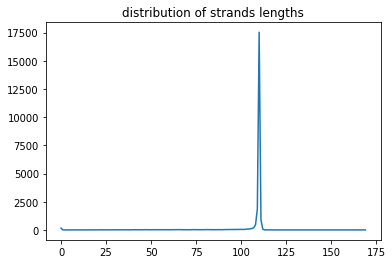

In [161]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range(len(hist)), hist)
plt.title('distribution of strands lengths')
plt.show()

In [162]:
print('percentage of failed = ', (len(reads) - sum(hist))/len(reads) * 100)

percentage of failed =  7.384


In [163]:
print(hist)

[160, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 2, 3, 1, 2, 3, 3, 6, 2, 3, 10, 7, 8, 4, 7, 8, 11, 6, 12, 9, 7, 7, 6, 10, 11, 13, 12, 7, 15, 16, 15, 15, 10, 22, 12, 17, 21, 17, 13, 12, 21, 15, 15, 18, 19, 12, 19, 16, 19, 16, 20, 19, 21, 18, 28, 22, 21, 20, 23, 16, 19, 13, 27, 24, 17, 17, 18, 23, 22, 19, 31, 21, 19, 24, 20, 24, 22, 23, 19, 28, 30, 31, 29, 30, 33, 30, 37, 34, 42, 52, 36, 53, 61, 81, 91, 127, 191, 471, 1857, 17523, 901, 65, 3, 4, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
